In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys, cv2, glob, os, time
import pandas as pd 
import io
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten,Activation
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
import matplotlib.pyplot as plt

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding


In [2]:
dataUN=pd.read_csv('UNSW_NB15_testing-set.csv')
dataUN1=pd.read_csv('UNSW_NB15_training-set.csv')

dataI=pd.read_csv('IoT Network Intrusion Dataset.csv')

In [3]:
dataF=dataUN.append(dataUN1,ignore_index = True) 

C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\1098381135.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataF=dataUN.append(dataUN1,ignore_index = True)


In [4]:
dataF[:2]

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   

   label  
0      0  
1      0  

[2 rows x 45 columns]

In [5]:
dataI[:2]

Flow_ID           Src_IP  Src_Port  \
0  192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1   192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   

         Dst_IP  Dst_Port  Protocol               Timestamp  Flow_Duration  \
0  192.168.0.16     10101        17  25/07/2019 03:25:53 AM             75   
1  192.168.0.13       554         6  26/05/2019 10:11:06 PM           5310   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  Active_Max  Active_Min  \
0             1             1  ...         0.0         0.0         0.0   
1             1             2  ...         0.0         0.0         0.0   

   Idle_Mean     Idle_Std  Idle_Max  Idle_Min    Label    Cat  \
0       75.0     0.000000      75.0      75.0  Anomaly  Mirai   
1     2655.0  2261.327486    4254.0    1056.0  Anomaly    DoS   

             Sub_Cat  
0  Mirai-Ackflooding  
1    DoS-Synflooding  

[2 rows x 86 columns]

In [6]:
from collections import Counter
Counter(dataF['label'])

Counter({0: 93000, 1: 164673})

In [7]:
from collections import Counter
Counter(dataI['Label'])

Counter({'Anomaly': 585710, 'Normal': 40073})

In [8]:
dataF1=dataF.loc[dataF['label'] == 0]
print(len(dataF1))
dataF2=dataF.loc[dataF['label'] == 1]
print(len(dataF2))

93000
164673


In [9]:
from collections import Counter
Counter(dataI["Label"])

Counter({'Anomaly': 585710, 'Normal': 40073})

In [10]:
dataF.rename(columns = {'label':'Label'}, inplace = True)
dataF.rename(columns = {'attack_cat':'Sub_Cat'}, inplace = True)

In [11]:
DataITarget=dataI[["Label","Cat","Sub_Cat"]]

dataIFeatures=dataI.drop(["Label","Cat","Sub_Cat"], axis=1)

DataFTarget=dataF[["Sub_Cat","Label"]]

dataFFeatures=dataF.drop(["Sub_Cat","Label"], axis=1)

In [12]:
DataITarget["Sub_Cat"]=DataITarget["Sub_Cat"].replace('Normal','Normal_I')

C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\4285179342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataITarget["Sub_Cat"]=DataITarget["Sub_Cat"].replace('Normal','Normal_I')


In [13]:
from collections import Counter
Counter(DataITarget["Label"])

Counter({'Anomaly': 585710, 'Normal': 40073})

In [14]:
from collections import Counter
Counter(DataFTarget["Label"])

Counter({0: 93000, 1: 164673})

In [15]:
DataFTarget['Label']=DataFTarget['Label']. replace([0,1], ['Normal','Anomaly'])

C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\2780207215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFTarget['Label']=DataFTarget['Label']. replace([0,1], ['Normal','Anomaly'])


In [16]:
from collections import Counter
Counter(DataFTarget["Label"])

Counter({'Normal': 93000, 'Anomaly': 164673})

In [17]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

dataIFeatures=dataIFeatures.apply(LabelEncoder().fit_transform)

In [18]:
dataFFeatures=dataFFeatures.apply(LabelEncoder().fit_transform)

In [19]:
dataFFeatures

id    dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0           0  20146    113        0      4      5      4     104      41   
1           1  53096    113        0      4     13     38     355    5629   
2           2  92449    113        0      4      7     16     157    3860   
3           3  93289    113        3      4     11     12     298     305   
4           4  39276    113        0      4      9      6     246      69   
...       ...    ...    ...      ...    ...    ...    ...     ...     ...   
257668  82327      5    119        0      5      1      0      25       0   
257669  82328  79556    113        0      4     19      8    4758      89   
257670  82329      0      6        0      5      0      0       2       0   
257671  82330      0      6        0      5      0      0       2       0   
257672  82331      9    119        0      5      1      0      25       0   

          rate  ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
0        75594  ...           0                 0                 0   
1        77008  ...           0                 0                 0   
2        12916  ...           1                 0                 0   
3        12015  ...           1                 0                 0   
4        54059  ...           1                 1                 0   
...        ...  ...         ...               ...               ...   
257668  115757  ...           1                 0                 0   
257669   35525  ...           1                 0                 0   
257670       0  ...           0                 0                 0   
257671       0  ...           0                 0                 0   
257672  115749  ...           0                 0                 0   

        ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0                    0             0           0                 0   
1                    1             0           0                 0   
2                    2             0           0                 0   
3                    2             1           1                 0   
4                   39             0           0                 0   
...                ...           ...         ...               ...   
257668               1             0           0                 0   
257669               0             0           0                 0   
257670               0             0           0                 0   
257671               0             0           0                 0   
257672               0             0           0                 0   

        ct_src_ltm  ct_srv_dst  is_sm_ips_ports  
0                0           0                0  
1                0           5                0  
2                1           5                0  
3                1           0                0  
4                1          38                0  
...            ...         ...              ...  
257668           1           0                0  
257669           2           1                0  
257670           0           0                1  
257671           0           0                1  
257672           0           0                0  

[257673 rows x 43 columns]

In [20]:
#dataFFeatures=dataFFeatures.drop(['pca-one','pca-two'], axis=1)

In [21]:
len(dataIFeatures)

625783

ETC


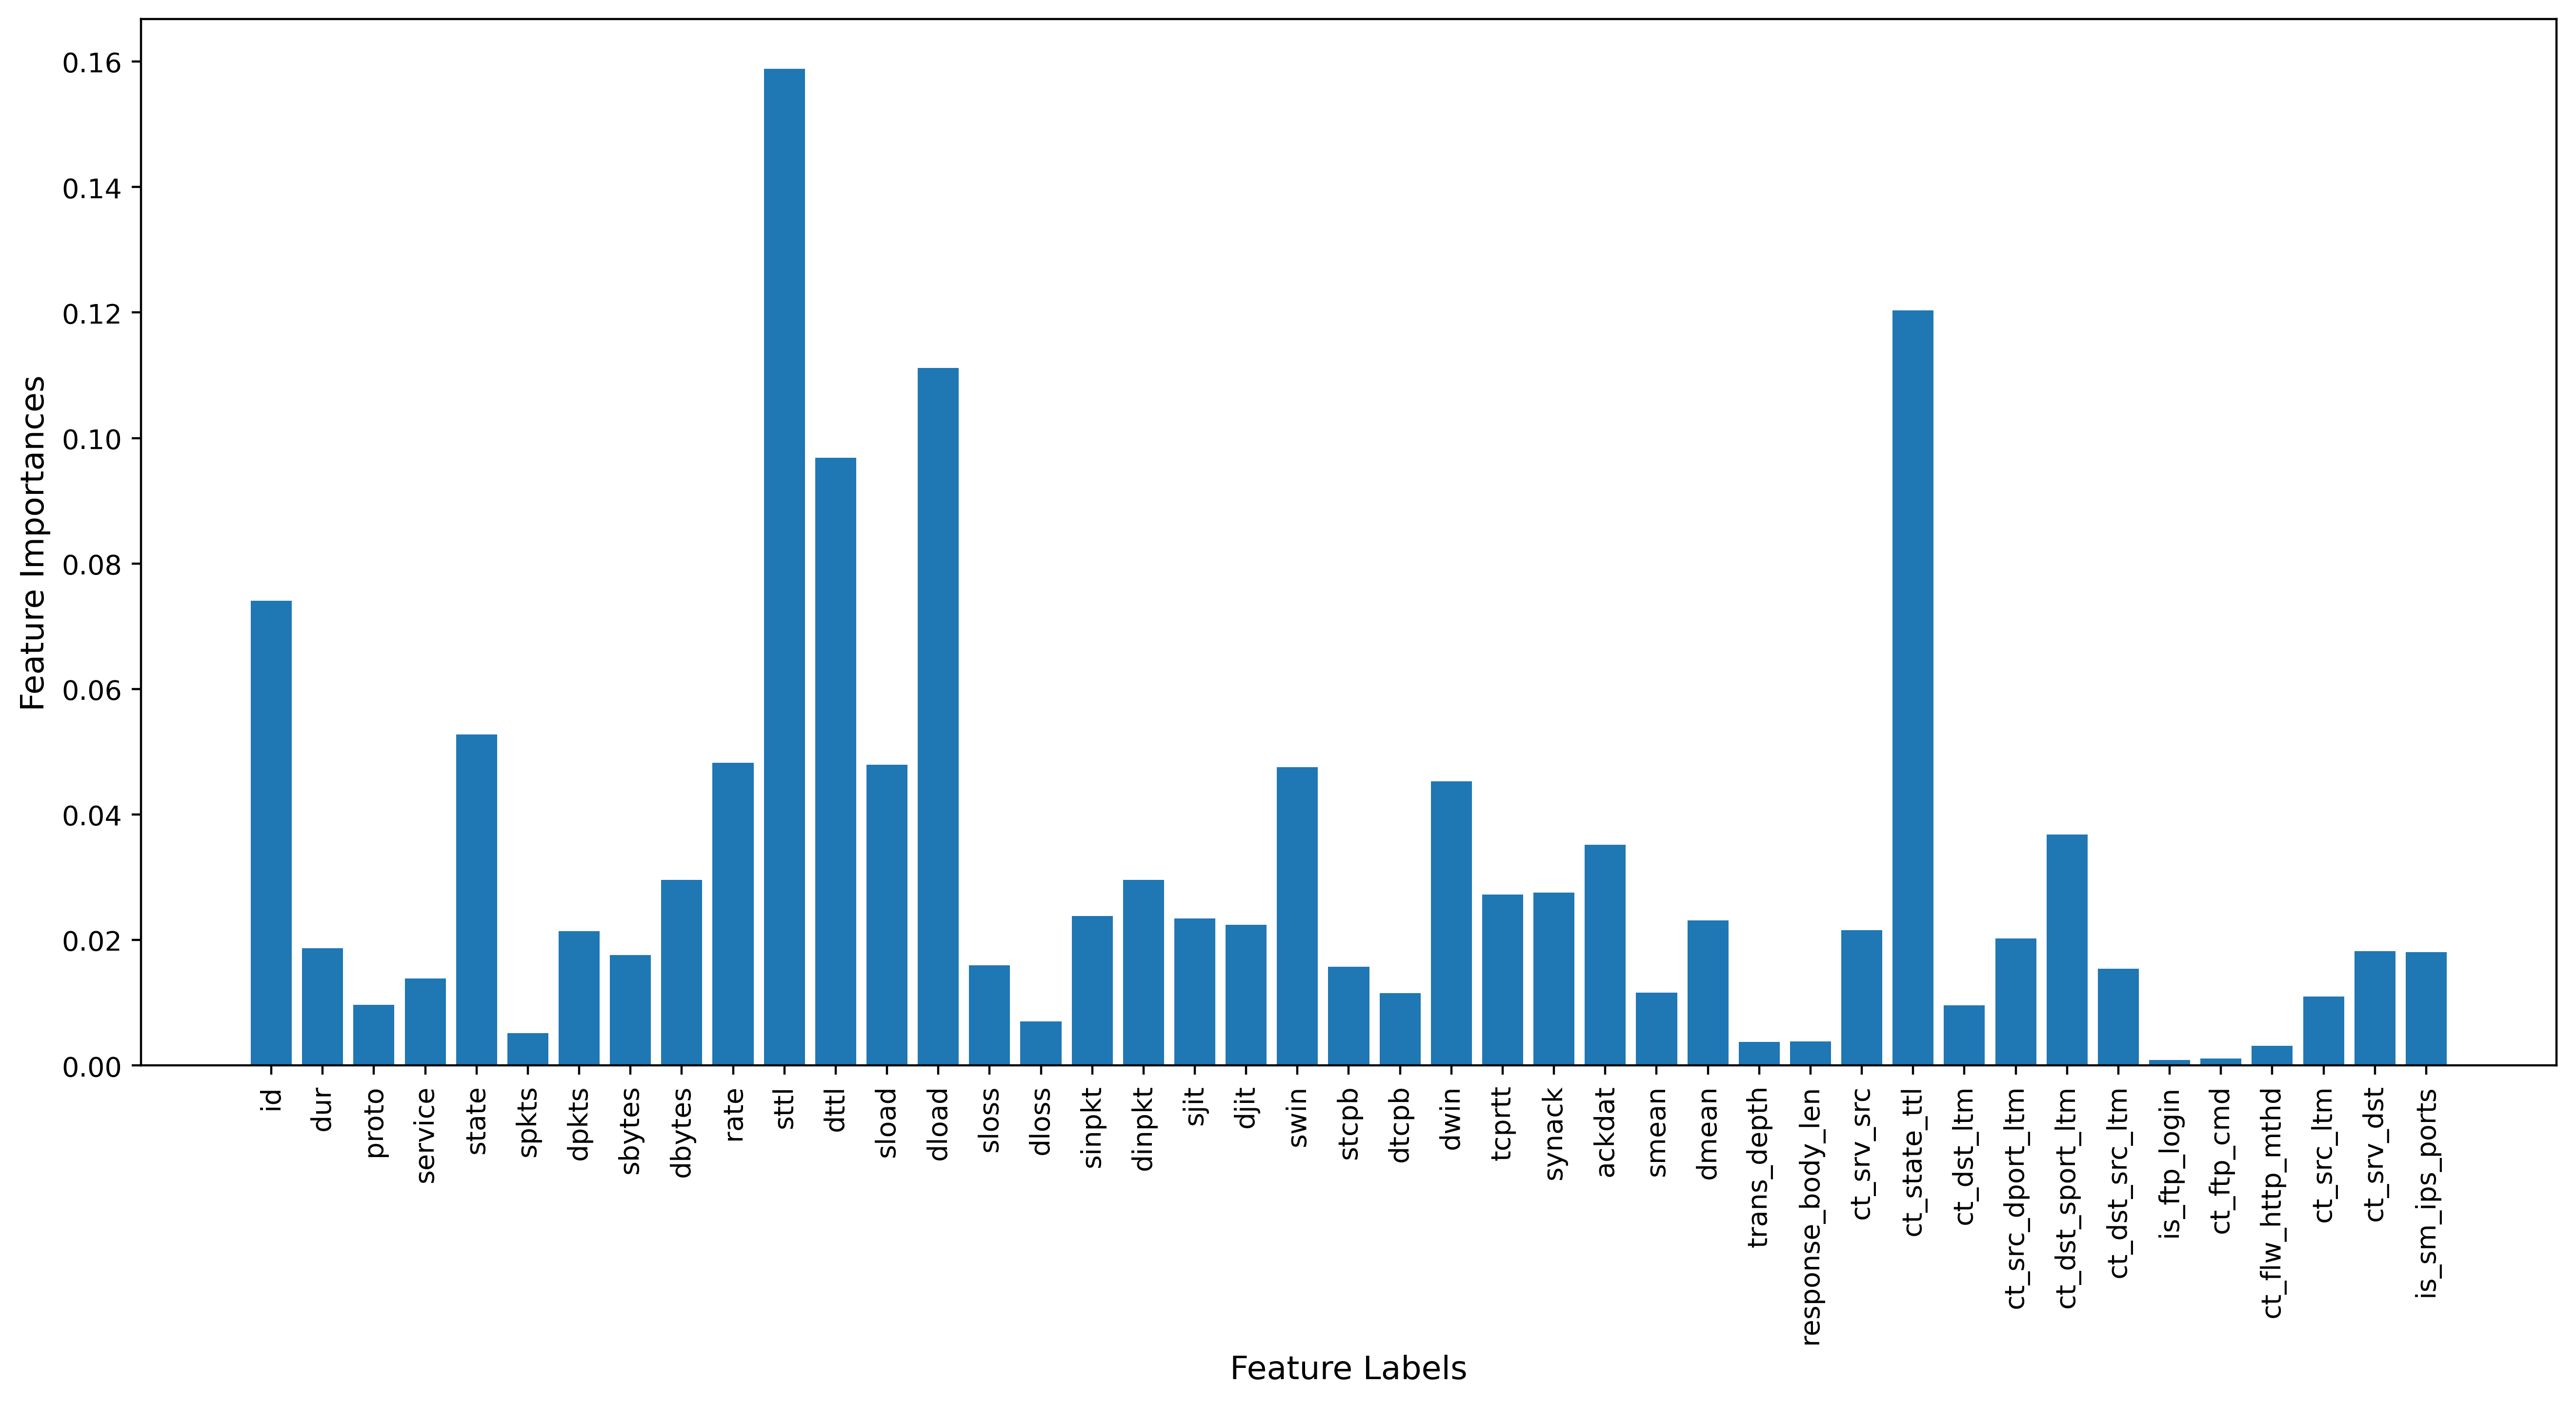

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=30)

X =dataFFeatures

y =  DataFTarget["Label"]
# Training the model
dt.fit(X, y)

# Computing the importance of each feature
feature_importance = dt.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in dt.estimators_], axis = 0)
plt.figure(figsize=(13,7),dpi=400)
plt.xticks(rotation=90)
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels',fontsize=12)
plt.ylabel('Feature Importances',fontsize=12)


plt.tight_layout(pad=0)
plt.savefig('FeatureImp1.pdf')
plt.show()

In [23]:
featuresimpF=[]
for i in range (len(X.columns)):
    if feature_importance_normalized[i]>0.02:
        featuresimpF.append(X.columns[i])
len(featuresimpF)        

23

ETC


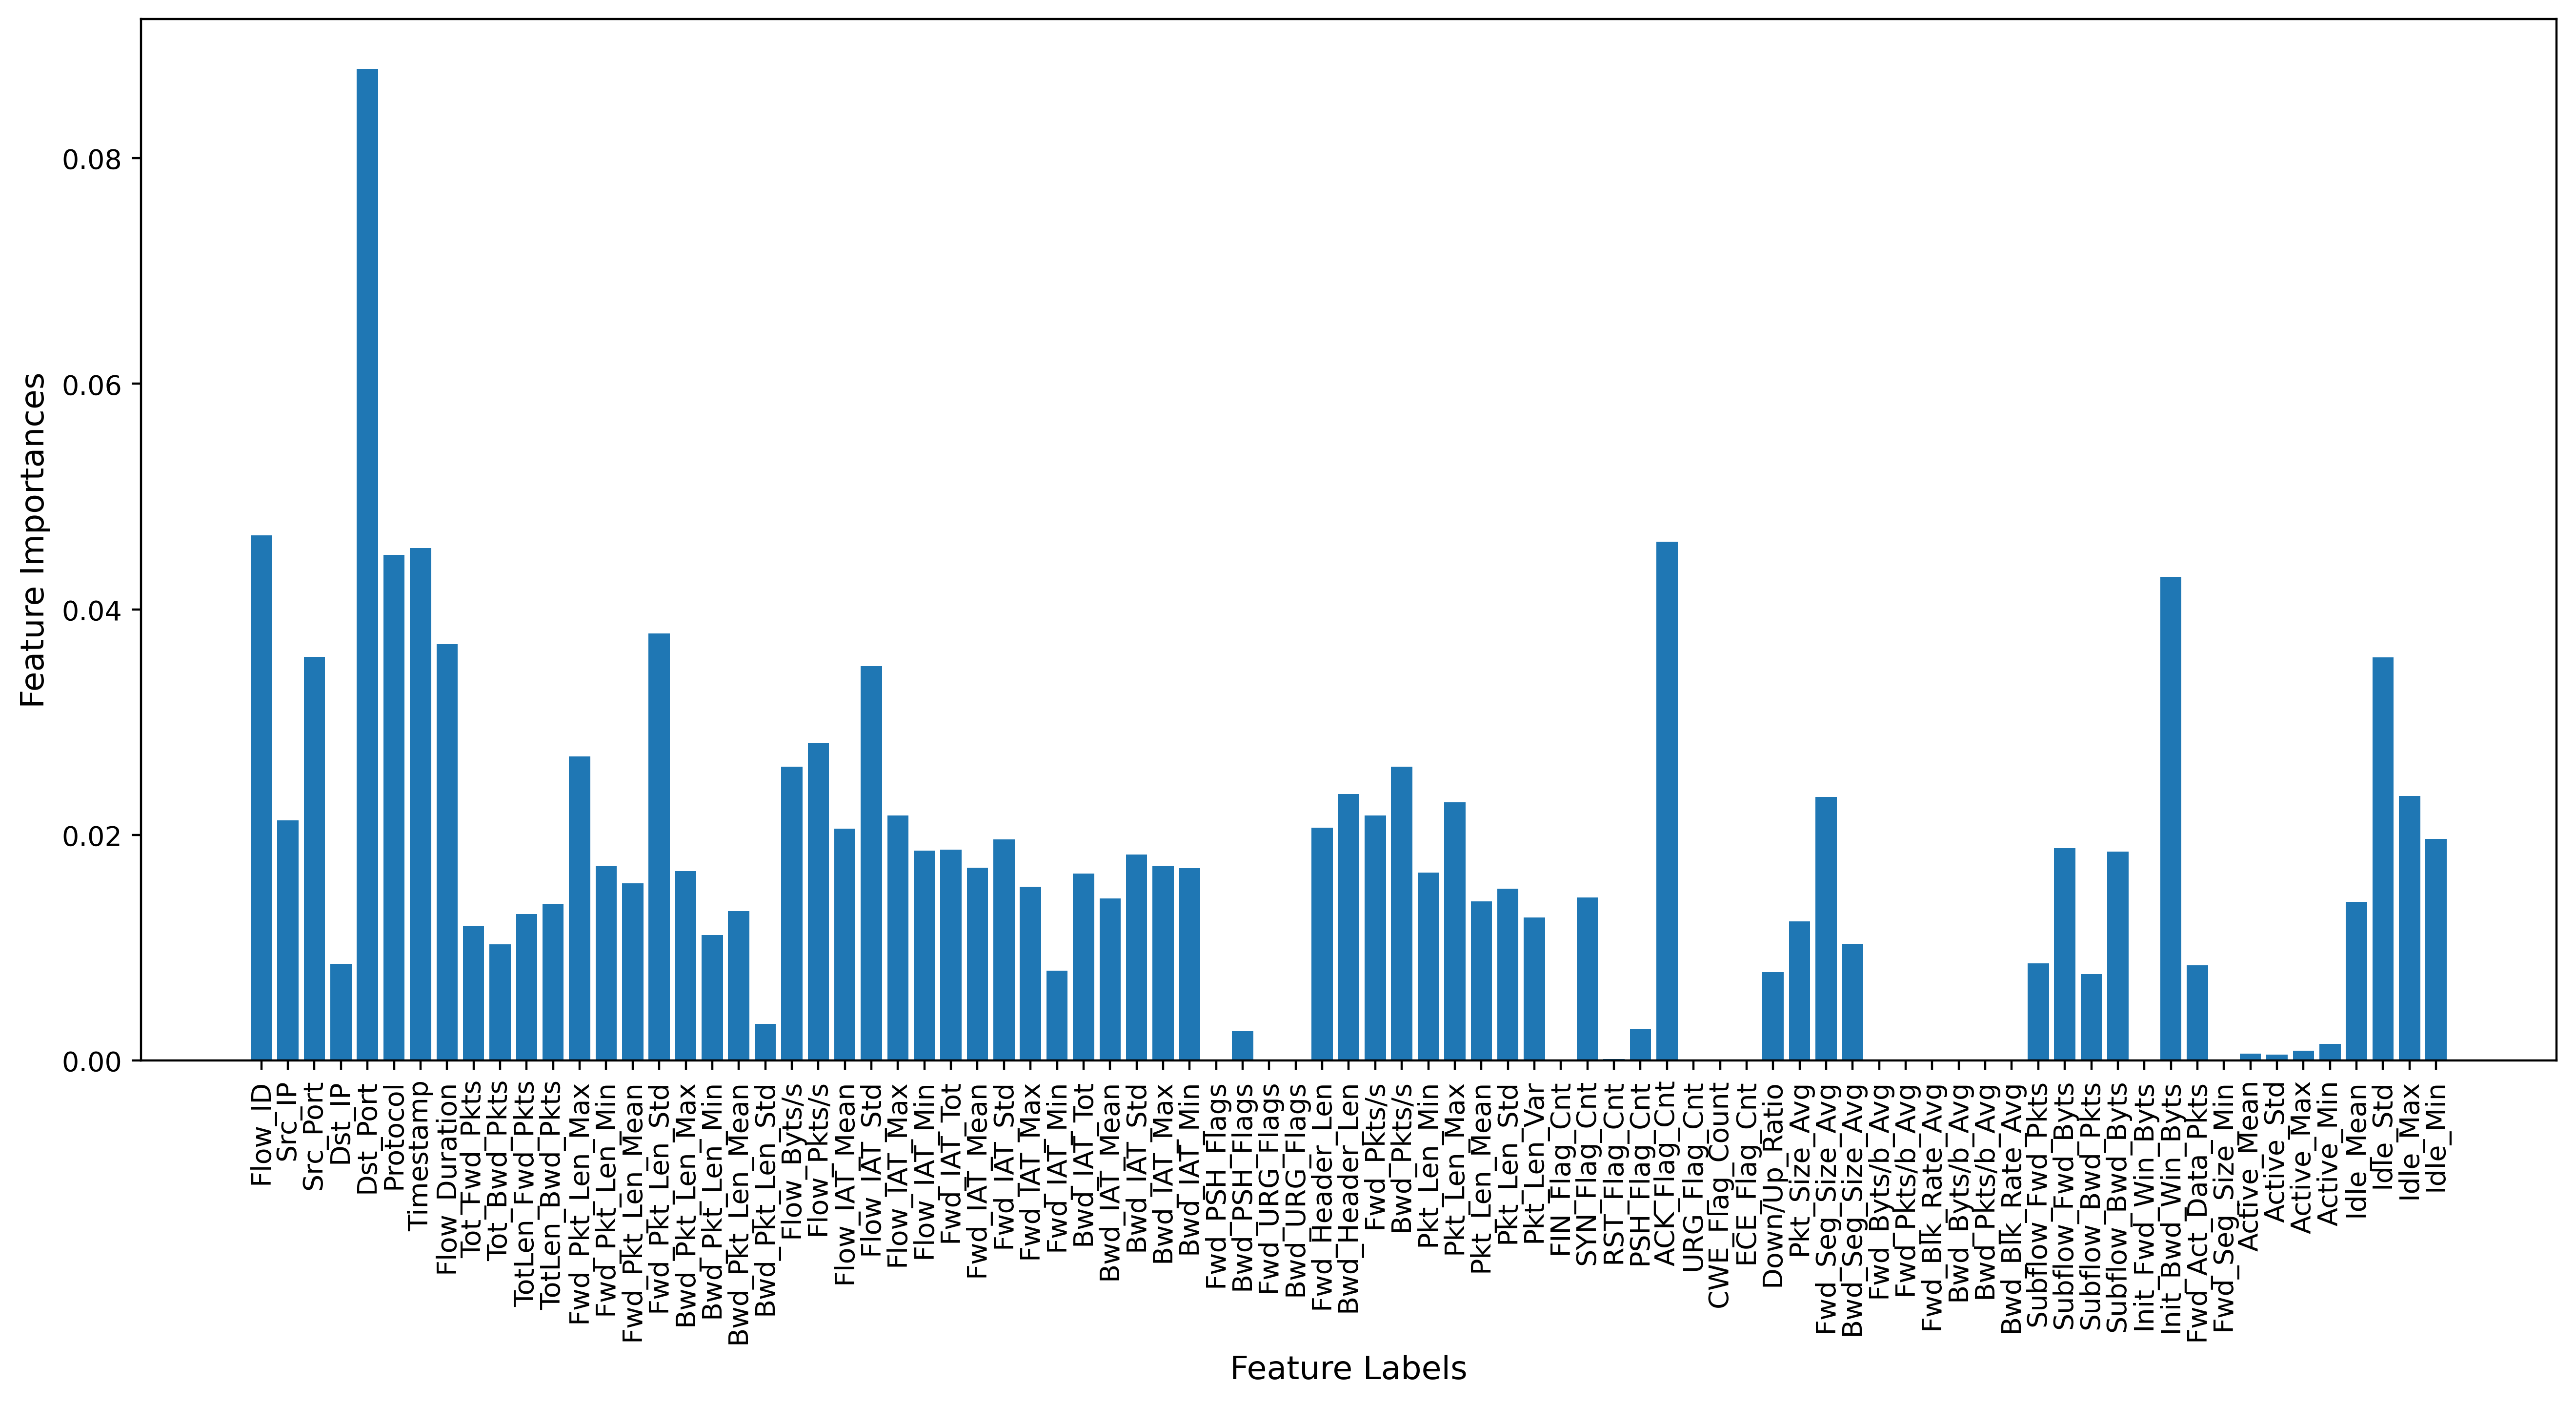

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=30)

X =dataIFeatures

y =  DataITarget["Label"]
# Training the model
dt.fit(X, y)

# Computing the importance of each feature
feature_importance = dt.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in dt.estimators_], axis = 0)
plt.figure(figsize=(13,7),dpi=400)
plt.xticks(rotation=90)
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels',fontsize=12)
plt.ylabel('Feature Importances',fontsize=12)


plt.tight_layout(pad=0)
plt.savefig('FeatureImp.pdf')
plt.show()

In [25]:
featuresimp=[]
for i in range (len(X.columns)):
    if feature_importance_normalized[i]>0.02:
        featuresimp.append(X.columns[i])
len(featuresimp)       

24

In [26]:
dataIFeatures= dataIFeatures[featuresimp[:20]]

In [27]:
dataFFeatures= dataFFeatures[featuresimpF[:20]]

In [28]:
dataFFeatures

id  state  dpkts  dbytes    rate  sttl  dttl   sload  dload  \
0           0      4      4      41   75594    10     8   55212  53560   
1           1      4     38    5629   77008     7     6   36182  89784   
2           2      4     16    3860   12916     7     6    2322  73984   
3           3      4     12     305   12015     7     6    5621  25877   
4           4      4      6      69   54059    11     6   36860  32853   
...       ...    ...    ...     ...     ...   ...   ...     ...    ...   
257668  82327      5      0       0  115757    11     0  118450      0   
257669  82328      4      8      89   35525    11     6   83028  12230   
257670  82329      5      0       0       0     0     0       0      0   
257671  82330      5      0       0       0     0     0       0      0   
257672  82331      5      0       0  115749    11     0  118287      0   

        sinpkt  dinpkt    sjit    djit  swin  dwin  tcprtt  synack  ackdat  \
0        38221   26755   12139   12505    21    18       0       0       0   
1        56660   31225   17660  100036    21    18       0       0       0   
2       109569   81545  114118  113716    21    18   23094   23404   16576   
3       104156   74664   25977  107287    21    18       0       0       0   
4        55169   65933   53781   54105    21    18   29300   28980   21110   
...        ...     ...     ...     ...   ...   ...     ...     ...     ...   
257668       5       0       0       0     0     0       0       0       0   
257669   60907   95729   81480   76786    21    18   45182   43613   30921   
257670  114216       0       0       0     0     0       0       0       0   
257671  114219       0    2829       0     0     0       0       0       0   
257672       9       0       0       0     0     0       0       0       0   

        dmean  ct_srv_src  
0           4           0  
1        1065          42  
2         784           6  
3          25           0  
4           6          42  
...       ...         ...  
257668      0           0  
257669      5           0  
257670      0           0  
257671      0           0  
257672      0           0  

[257673 rows x 20 columns]

In [29]:
a=[]
for i in range(20):
    a.append(i)

In [30]:
dataIFeatures.columns=a
dataFFeatures.columns=a

In [31]:
newfeatures=dataFFeatures.append(dataIFeatures,ignore_index = True)
newtarget=DataFTarget["Label"].append(DataITarget["Label"],ignore_index = True)

C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\2545604781.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newfeatures=dataFFeatures.append(dataIFeatures,ignore_index = True)
C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\2545604781.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newtarget=DataFTarget["Label"].append(DataITarget["Label"],ignore_index = True)


In [61]:
len(newtarget)

883456

In [62]:
from collections import Counter
Counter(newtarget)

Counter({'Normal': 133073, 'Anomaly': 750383})

In [63]:
dataFFeatures['target']=DataFTarget["Label"]

In [64]:


dataF9=dataFFeatures.loc[newfeatures['target'] == "Normal"]
print(len(dataF9))
dataF10=dataFFeatures.loc[newfeatures['target'] == "Anomaly"]
print(len(dataF10))

133073
750383


In [39]:
dataF9.columns = dataF9.columns.astype(str)
dataF10.columns = dataF10.columns.astype(str)

In [40]:
def dimRed(df):
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    #replace the lable with 1
    Mini=df
    i=0
    features=df.drop('target',axis=1)
    target=df['target']
    #find distance
    svd = PCA(n_components=2)
    #prepare transform on dataset
    svd.fit(features)
    pca_result = svd.transform(features)
    df['pca-one'] = pca_result[:,0]
    df['pca-two'] = pca_result[:,1] 
    #create datafram of distance
    Z=df[['pca-one','pca-two']]
    Z['target']=target
    #create dumy dataframe of original values
    Mini=Mini.drop(['pca-one','pca-two'], axis=1)
    #Z=X.loc[X['attack_cat'] == 1]
    Z=Z.reset_index()
    Mini=Mini.reset_index()
    Mini=Mini.drop('index', axis=1)
    print(Z.shape)
    print(Mini.shape)
    return Z, Mini


In [41]:
dataF9['target'] = dataF9['target'].map({'Normal':0})

C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\2103554628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataF9['target'] = dataF9['target'].map({'Normal':0})


In [271]:
dataF9

0  1    2     3       4   5  6       7       8      9  ...  \
36001    36001  4    6    82   28280   4  1   78944   13772  70399  ...   
86254    86254  5    0     0       0   0  0       0       0      0  ...   
20002    20002  4   49  5218  108306   4  1  107037  111727   7802  ...   
205383   30042  4   18  3513   49777   4  1   50891   77646  77798  ...   
36722    36722  4   18  1159  114113   4  1  116633  104039   1441  ...   
...        ... ..  ...   ...     ...  .. ..     ...     ...    ...  ...   
102709  102709  4    8    89   37375  11  6   22145   29351  74974  ...   
75514    75514  4   12   257   47597  11  6   23401   47026  72602  ...   
32422    32422  4  278  8257   83939   4  1   62186   94430  36853  ...   
199227   23886  2    4    76   83782   4  1   77086   69208  29450  ...   
20613    20613  4   49  5218  102814   4  1  100927  108032  12626  ...   

            11      12  13  14     15     16     17    18  19  target  
36001    91657   85744  21  18    152    101     75    14   0       0  
86254        0       0   0   0      0      0      0     0   0       0  
20002    10807   20713  21  18    185    145     64   613   2       0  
205383  103019  110605  21  18   1423   1209     71   525   0       0  
36722     3290    1161  21  18     83     55     52    97  11       0  
...        ...     ...  ..  ..    ...    ...    ...   ...  ..     ...  
102709   81739   61482  21  18  16349  11903  20259     5   3       0  
75514    69091   42908  21  18  37986  31949  32095    18   1       0  
32422   103727  108241  21  18    333    280     77  1211  12       0  
199227    7373   12343   0   0      0      0      0    37   8       0  
20613    17799   33252  21  18    169    124     69   613   4       0  

[65042 rows x 21 columns]

In [42]:
Z, Mini=dimRed(dataF9)

from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import pairwise_distances
arr=[]
import math
import statistics
# l will suppot to generate data more than its acutal lenght
l=0
for i in range(71673):
    print(i)
    if(l<len(dataF9)):    
        print(dataF9.shape)
        print(Z.shape)
        print(Mini.shape)
        print(l)
        Z['distance']=0
        Z['distance']=pairwise_distances(Z[i:i+1],Z[:]).reshape(-1)
        #distance measure
        #for j in range(len(Z)):
           # Z['distance'][j]=math.dist([Z['pca-one'][l], Z['pca-one'][l]],[Z['pca-two'][j], Z['pca-two'][j]])
        #get the points and to measure the smilarlty
        #P1=Mini.iloc[Z['distance'][l:].idxmin(),l]
        #P2=Mini.iloc[l]
        a=[]
        #for k in range(len(P1)):
            #a.append(statistics.mean([P1[k],P2[k]]))
        #    a.append((P1[k]+P2[k])/2)
        a=Mini.iloc[[Z['distance'][l+1:].idxmin(),Z['distance'][l+1:].nsmallest(2).index[1],l]].mean(axis=0)
        arr.append(a)
        l=l+1

    else:
        Genrated=pd.DataFrame(arr)
        print(Genrated)
        new_header = Mini.columns #grab the first row for the header
        Genrated.columns = new_header #set the header row as the df header
        Genrated['target']=Genrated['target']
        dataF9=dataF9.drop(['pca-one','pca-two'], axis=1)
        dataF9=Genrated.append(dataF9,ignore_index = True)
        #print(dataF9)
        print(dataF9.shape)
        Z, Mini=dimRed(dataF9)
        dataF9=dataF9.reset_index()
        dataF9=dataF9.drop('index',axis=1)
        arr.clear()
        l=0
        
Genrated=pd.DataFrame(arr)
new_header = Mini.columns #grab the first row for the header
Genrated.columns = new_header #set the header row as the df header
Genrated['target']=Genrated['target'].astype(int)
dataF9=dataF9.drop(['pca-one','pca-two'], axis=1)
dataF9=Genrated.append(dataF9,ignore_index = True)

C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\3994028085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca-one'] = pca_result[:,0]
C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\3994028085.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca-two'] = pca_result[:,1]
C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\3994028085.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

(93000, 4)
(93000, 21)
0
(93000, 23)
(93000, 4)
(93000, 21)
0
1
(93000, 23)
(93000, 5)
(93000, 21)
1
2
(93000, 23)
(93000, 5)
(93000, 21)
2
3
(93000, 23)
(93000, 5)
(93000, 21)
3
4
(93000, 23)
(93000, 5)
(93000, 21)
4
5
(93000, 23)
(93000, 5)
(93000, 21)
5
6
(93000, 23)
(93000, 5)
(93000, 21)
6
7
(93000, 23)
(93000, 5)
(93000, 21)
7
8
(93000, 23)
(93000, 5)
(93000, 21)
8
9
(93000, 23)
(93000, 5)
(93000, 21)
9
10
(93000, 23)
(93000, 5)
(93000, 21)
10
11
(93000, 23)
(93000, 5)
(93000, 21)
11
12
(93000, 23)
(93000, 5)
(93000, 21)
12
13
(93000, 23)
(93000, 5)
(93000, 21)
13
14
(93000, 23)
(93000, 5)
(93000, 21)
14
15
(93000, 23)
(93000, 5)
(93000, 21)
15
16
(93000, 23)
(93000, 5)
(93000, 21)
16
17
(93000, 23)
(93000, 5)
(93000, 21)
17
18
(93000, 23)
(93000, 5)
(93000, 21)
18
19
(93000, 23)
(93000, 5)
(93000, 21)
19
20
(93000, 23)
(93000, 5)
(93000, 21)
20
21
(93000, 23)
(93000, 5)
(93000, 21)
21
22
(93000, 23)
(93000, 5)
(93000, 21)
22
23
(93000, 23)
(93000, 5)
(93000, 21)
23
24
(93000, 23

202
(93000, 23)
(93000, 5)
(93000, 21)
202
203
(93000, 23)
(93000, 5)
(93000, 21)
203
204
(93000, 23)
(93000, 5)
(93000, 21)
204
205
(93000, 23)
(93000, 5)
(93000, 21)
205
206
(93000, 23)
(93000, 5)
(93000, 21)
206
207
(93000, 23)
(93000, 5)
(93000, 21)
207
208
(93000, 23)
(93000, 5)
(93000, 21)
208
209
(93000, 23)
(93000, 5)
(93000, 21)
209
210
(93000, 23)
(93000, 5)
(93000, 21)
210
211
(93000, 23)
(93000, 5)
(93000, 21)
211
212
(93000, 23)
(93000, 5)
(93000, 21)
212
213
(93000, 23)
(93000, 5)
(93000, 21)
213
214
(93000, 23)
(93000, 5)
(93000, 21)
214
215
(93000, 23)
(93000, 5)
(93000, 21)
215
216
(93000, 23)
(93000, 5)
(93000, 21)
216
217
(93000, 23)
(93000, 5)
(93000, 21)
217
218
(93000, 23)
(93000, 5)
(93000, 21)
218
219
(93000, 23)
(93000, 5)
(93000, 21)
219
220
(93000, 23)
(93000, 5)
(93000, 21)
220
221
(93000, 23)
(93000, 5)
(93000, 21)
221
222
(93000, 23)
(93000, 5)
(93000, 21)
222
223
(93000, 23)
(93000, 5)
(93000, 21)
223
224
(93000, 23)
(93000, 5)
(93000, 21)
224
225
(93000,

413
(93000, 23)
(93000, 5)
(93000, 21)
413
414
(93000, 23)
(93000, 5)
(93000, 21)
414
415
(93000, 23)
(93000, 5)
(93000, 21)
415
416
(93000, 23)
(93000, 5)
(93000, 21)
416
417
(93000, 23)
(93000, 5)
(93000, 21)
417
418
(93000, 23)
(93000, 5)
(93000, 21)
418
419
(93000, 23)
(93000, 5)
(93000, 21)
419
420
(93000, 23)
(93000, 5)
(93000, 21)
420
421
(93000, 23)
(93000, 5)
(93000, 21)
421
422
(93000, 23)
(93000, 5)
(93000, 21)
422
423
(93000, 23)
(93000, 5)
(93000, 21)
423
424
(93000, 23)
(93000, 5)
(93000, 21)
424
425
(93000, 23)
(93000, 5)
(93000, 21)
425
426
(93000, 23)
(93000, 5)
(93000, 21)
426
427
(93000, 23)
(93000, 5)
(93000, 21)
427
428
(93000, 23)
(93000, 5)
(93000, 21)
428
429
(93000, 23)
(93000, 5)
(93000, 21)
429
430
(93000, 23)
(93000, 5)
(93000, 21)
430
431
(93000, 23)
(93000, 5)
(93000, 21)
431
432
(93000, 23)
(93000, 5)
(93000, 21)
432
433
(93000, 23)
(93000, 5)
(93000, 21)
433
434
(93000, 23)
(93000, 5)
(93000, 21)
434
435
(93000, 23)
(93000, 5)
(93000, 21)
435
436
(93000,

618
(93000, 23)
(93000, 5)
(93000, 21)
618
619
(93000, 23)
(93000, 5)
(93000, 21)
619
620
(93000, 23)
(93000, 5)
(93000, 21)
620
621
(93000, 23)
(93000, 5)
(93000, 21)
621
622
(93000, 23)
(93000, 5)
(93000, 21)
622
623
(93000, 23)
(93000, 5)
(93000, 21)
623
624
(93000, 23)
(93000, 5)
(93000, 21)
624
625
(93000, 23)
(93000, 5)
(93000, 21)
625
626
(93000, 23)
(93000, 5)
(93000, 21)
626
627
(93000, 23)
(93000, 5)
(93000, 21)
627
628
(93000, 23)
(93000, 5)
(93000, 21)
628
629
(93000, 23)
(93000, 5)
(93000, 21)
629
630
(93000, 23)
(93000, 5)
(93000, 21)
630
631
(93000, 23)
(93000, 5)
(93000, 21)
631
632
(93000, 23)
(93000, 5)
(93000, 21)
632
633
(93000, 23)
(93000, 5)
(93000, 21)
633
634
(93000, 23)
(93000, 5)
(93000, 21)
634
635
(93000, 23)
(93000, 5)
(93000, 21)
635
636
(93000, 23)
(93000, 5)
(93000, 21)
636
637
(93000, 23)
(93000, 5)
(93000, 21)
637
638
(93000, 23)
(93000, 5)
(93000, 21)
638
639
(93000, 23)
(93000, 5)
(93000, 21)
639
640
(93000, 23)
(93000, 5)
(93000, 21)
640
641
(93000,

818
(93000, 23)
(93000, 5)
(93000, 21)
818
819
(93000, 23)
(93000, 5)
(93000, 21)
819
820
(93000, 23)
(93000, 5)
(93000, 21)
820
821
(93000, 23)
(93000, 5)
(93000, 21)
821
822
(93000, 23)
(93000, 5)
(93000, 21)
822
823
(93000, 23)
(93000, 5)
(93000, 21)
823
824
(93000, 23)
(93000, 5)
(93000, 21)
824
825
(93000, 23)
(93000, 5)
(93000, 21)
825
826
(93000, 23)
(93000, 5)
(93000, 21)
826
827
(93000, 23)
(93000, 5)
(93000, 21)
827
828
(93000, 23)
(93000, 5)
(93000, 21)
828
829
(93000, 23)
(93000, 5)
(93000, 21)
829
830
(93000, 23)
(93000, 5)
(93000, 21)
830
831
(93000, 23)
(93000, 5)
(93000, 21)
831
832
(93000, 23)
(93000, 5)
(93000, 21)
832
833
(93000, 23)
(93000, 5)
(93000, 21)
833
834
(93000, 23)
(93000, 5)
(93000, 21)
834
835
(93000, 23)
(93000, 5)
(93000, 21)
835
836
(93000, 23)
(93000, 5)
(93000, 21)
836
837
(93000, 23)
(93000, 5)
(93000, 21)
837
838
(93000, 23)
(93000, 5)
(93000, 21)
838
839
(93000, 23)
(93000, 5)
(93000, 21)
839
840
(93000, 23)
(93000, 5)
(93000, 21)
840
841
(93000,

1023
(93000, 23)
(93000, 5)
(93000, 21)
1023
1024
(93000, 23)
(93000, 5)
(93000, 21)
1024
1025
(93000, 23)
(93000, 5)
(93000, 21)
1025
1026
(93000, 23)
(93000, 5)
(93000, 21)
1026
1027
(93000, 23)
(93000, 5)
(93000, 21)
1027
1028
(93000, 23)
(93000, 5)
(93000, 21)
1028
1029
(93000, 23)
(93000, 5)
(93000, 21)
1029
1030
(93000, 23)
(93000, 5)
(93000, 21)
1030
1031
(93000, 23)
(93000, 5)
(93000, 21)
1031
1032
(93000, 23)
(93000, 5)
(93000, 21)
1032
1033
(93000, 23)
(93000, 5)
(93000, 21)
1033
1034
(93000, 23)
(93000, 5)
(93000, 21)
1034
1035
(93000, 23)
(93000, 5)
(93000, 21)
1035
1036
(93000, 23)
(93000, 5)
(93000, 21)
1036
1037
(93000, 23)
(93000, 5)
(93000, 21)
1037
1038
(93000, 23)
(93000, 5)
(93000, 21)
1038
1039
(93000, 23)
(93000, 5)
(93000, 21)
1039
1040
(93000, 23)
(93000, 5)
(93000, 21)
1040
1041
(93000, 23)
(93000, 5)
(93000, 21)
1041
1042
(93000, 23)
(93000, 5)
(93000, 21)
1042
1043
(93000, 23)
(93000, 5)
(93000, 21)
1043
1044
(93000, 23)
(93000, 5)
(93000, 21)
1044
1045
(9300

1226
(93000, 23)
(93000, 5)
(93000, 21)
1226
1227
(93000, 23)
(93000, 5)
(93000, 21)
1227
1228
(93000, 23)
(93000, 5)
(93000, 21)
1228
1229
(93000, 23)
(93000, 5)
(93000, 21)
1229
1230
(93000, 23)
(93000, 5)
(93000, 21)
1230
1231
(93000, 23)
(93000, 5)
(93000, 21)
1231
1232
(93000, 23)
(93000, 5)
(93000, 21)
1232
1233
(93000, 23)
(93000, 5)
(93000, 21)
1233
1234
(93000, 23)
(93000, 5)
(93000, 21)
1234
1235
(93000, 23)
(93000, 5)
(93000, 21)
1235
1236
(93000, 23)
(93000, 5)
(93000, 21)
1236
1237
(93000, 23)
(93000, 5)
(93000, 21)
1237
1238
(93000, 23)
(93000, 5)
(93000, 21)
1238
1239
(93000, 23)
(93000, 5)
(93000, 21)
1239
1240
(93000, 23)
(93000, 5)
(93000, 21)
1240
1241
(93000, 23)
(93000, 5)
(93000, 21)
1241
1242
(93000, 23)
(93000, 5)
(93000, 21)
1242
1243
(93000, 23)
(93000, 5)
(93000, 21)
1243
1244
(93000, 23)
(93000, 5)
(93000, 21)
1244
1245
(93000, 23)
(93000, 5)
(93000, 21)
1245
1246
(93000, 23)
(93000, 5)
(93000, 21)
1246
1247
(93000, 23)
(93000, 5)
(93000, 21)
1247
1248
(9300

1427
(93000, 23)
(93000, 5)
(93000, 21)
1427
1428
(93000, 23)
(93000, 5)
(93000, 21)
1428
1429
(93000, 23)
(93000, 5)
(93000, 21)
1429
1430
(93000, 23)
(93000, 5)
(93000, 21)
1430
1431
(93000, 23)
(93000, 5)
(93000, 21)
1431
1432
(93000, 23)
(93000, 5)
(93000, 21)
1432
1433
(93000, 23)
(93000, 5)
(93000, 21)
1433
1434
(93000, 23)
(93000, 5)
(93000, 21)
1434
1435
(93000, 23)
(93000, 5)
(93000, 21)
1435
1436
(93000, 23)
(93000, 5)
(93000, 21)
1436
1437
(93000, 23)
(93000, 5)
(93000, 21)
1437
1438
(93000, 23)
(93000, 5)
(93000, 21)
1438
1439
(93000, 23)
(93000, 5)
(93000, 21)
1439
1440
(93000, 23)
(93000, 5)
(93000, 21)
1440
1441
(93000, 23)
(93000, 5)
(93000, 21)
1441
1442
(93000, 23)
(93000, 5)
(93000, 21)
1442
1443
(93000, 23)
(93000, 5)
(93000, 21)
1443
1444
(93000, 23)
(93000, 5)
(93000, 21)
1444
1445
(93000, 23)
(93000, 5)
(93000, 21)
1445
1446
(93000, 23)
(93000, 5)
(93000, 21)
1446
1447
(93000, 23)
(93000, 5)
(93000, 21)
1447
1448
(93000, 23)
(93000, 5)
(93000, 21)
1448
1449
(9300

1613
(93000, 23)
(93000, 5)
(93000, 21)
1613
1614
(93000, 23)
(93000, 5)
(93000, 21)
1614
1615
(93000, 23)
(93000, 5)
(93000, 21)
1615
1616
(93000, 23)
(93000, 5)
(93000, 21)
1616
1617
(93000, 23)
(93000, 5)
(93000, 21)
1617
1618
(93000, 23)
(93000, 5)
(93000, 21)
1618
1619
(93000, 23)
(93000, 5)
(93000, 21)
1619
1620
(93000, 23)
(93000, 5)
(93000, 21)
1620
1621
(93000, 23)
(93000, 5)
(93000, 21)
1621
1622
(93000, 23)
(93000, 5)
(93000, 21)
1622
1623
(93000, 23)
(93000, 5)
(93000, 21)
1623
1624
(93000, 23)
(93000, 5)
(93000, 21)
1624
1625
(93000, 23)
(93000, 5)
(93000, 21)
1625
1626
(93000, 23)
(93000, 5)
(93000, 21)
1626
1627
(93000, 23)
(93000, 5)
(93000, 21)
1627
1628
(93000, 23)
(93000, 5)
(93000, 21)
1628
1629
(93000, 23)
(93000, 5)
(93000, 21)
1629
1630
(93000, 23)
(93000, 5)
(93000, 21)
1630
1631
(93000, 23)
(93000, 5)
(93000, 21)
1631
1632
(93000, 23)
(93000, 5)
(93000, 21)
1632
1633
(93000, 23)
(93000, 5)
(93000, 21)
1633
1634
(93000, 23)
(93000, 5)
(93000, 21)
1634
1635
(9300

1812
(93000, 23)
(93000, 5)
(93000, 21)
1812
1813
(93000, 23)
(93000, 5)
(93000, 21)
1813
1814
(93000, 23)
(93000, 5)
(93000, 21)
1814
1815
(93000, 23)
(93000, 5)
(93000, 21)
1815
1816
(93000, 23)
(93000, 5)
(93000, 21)
1816
1817
(93000, 23)
(93000, 5)
(93000, 21)
1817
1818
(93000, 23)
(93000, 5)
(93000, 21)
1818
1819
(93000, 23)
(93000, 5)
(93000, 21)
1819
1820
(93000, 23)
(93000, 5)
(93000, 21)
1820
1821
(93000, 23)
(93000, 5)
(93000, 21)
1821
1822
(93000, 23)
(93000, 5)
(93000, 21)
1822
1823
(93000, 23)
(93000, 5)
(93000, 21)
1823
1824
(93000, 23)
(93000, 5)
(93000, 21)
1824
1825
(93000, 23)
(93000, 5)
(93000, 21)
1825
1826
(93000, 23)
(93000, 5)
(93000, 21)
1826
1827
(93000, 23)
(93000, 5)
(93000, 21)
1827
1828
(93000, 23)
(93000, 5)
(93000, 21)
1828
1829
(93000, 23)
(93000, 5)
(93000, 21)
1829
1830
(93000, 23)
(93000, 5)
(93000, 21)
1830
1831
(93000, 23)
(93000, 5)
(93000, 21)
1831
1832
(93000, 23)
(93000, 5)
(93000, 21)
1832
1833
(93000, 23)
(93000, 5)
(93000, 21)
1833
1834
(9300

2017
(93000, 23)
(93000, 5)
(93000, 21)
2017
2018
(93000, 23)
(93000, 5)
(93000, 21)
2018
2019
(93000, 23)
(93000, 5)
(93000, 21)
2019
2020
(93000, 23)
(93000, 5)
(93000, 21)
2020
2021
(93000, 23)
(93000, 5)
(93000, 21)
2021
2022
(93000, 23)
(93000, 5)
(93000, 21)
2022
2023
(93000, 23)
(93000, 5)
(93000, 21)
2023
2024
(93000, 23)
(93000, 5)
(93000, 21)
2024
2025
(93000, 23)
(93000, 5)
(93000, 21)
2025
2026
(93000, 23)
(93000, 5)
(93000, 21)
2026
2027
(93000, 23)
(93000, 5)
(93000, 21)
2027
2028
(93000, 23)
(93000, 5)
(93000, 21)
2028
2029
(93000, 23)
(93000, 5)
(93000, 21)
2029
2030
(93000, 23)
(93000, 5)
(93000, 21)
2030
2031
(93000, 23)
(93000, 5)
(93000, 21)
2031
2032
(93000, 23)
(93000, 5)
(93000, 21)
2032
2033
(93000, 23)
(93000, 5)
(93000, 21)
2033
2034
(93000, 23)
(93000, 5)
(93000, 21)
2034
2035
(93000, 23)
(93000, 5)
(93000, 21)
2035
2036
(93000, 23)
(93000, 5)
(93000, 21)
2036
2037
(93000, 23)
(93000, 5)
(93000, 21)
2037
2038
(93000, 23)
(93000, 5)
(93000, 21)
2038
2039
(9300

2215
(93000, 23)
(93000, 5)
(93000, 21)
2215
2216
(93000, 23)
(93000, 5)
(93000, 21)
2216
2217
(93000, 23)
(93000, 5)
(93000, 21)
2217
2218
(93000, 23)
(93000, 5)
(93000, 21)
2218
2219
(93000, 23)
(93000, 5)
(93000, 21)
2219
2220
(93000, 23)
(93000, 5)
(93000, 21)
2220
2221
(93000, 23)
(93000, 5)
(93000, 21)
2221
2222
(93000, 23)
(93000, 5)
(93000, 21)
2222
2223
(93000, 23)
(93000, 5)
(93000, 21)
2223
2224
(93000, 23)
(93000, 5)
(93000, 21)
2224
2225
(93000, 23)
(93000, 5)
(93000, 21)
2225
2226
(93000, 23)
(93000, 5)
(93000, 21)
2226
2227
(93000, 23)
(93000, 5)
(93000, 21)
2227
2228
(93000, 23)
(93000, 5)
(93000, 21)
2228
2229
(93000, 23)
(93000, 5)
(93000, 21)
2229
2230
(93000, 23)
(93000, 5)
(93000, 21)
2230
2231
(93000, 23)
(93000, 5)
(93000, 21)
2231
2232
(93000, 23)
(93000, 5)
(93000, 21)
2232
2233
(93000, 23)
(93000, 5)
(93000, 21)
2233
2234
(93000, 23)
(93000, 5)
(93000, 21)
2234
2235
(93000, 23)
(93000, 5)
(93000, 21)
2235
2236
(93000, 23)
(93000, 5)
(93000, 21)
2236
2237
(9300

2408
(93000, 23)
(93000, 5)
(93000, 21)
2408
2409
(93000, 23)
(93000, 5)
(93000, 21)
2409
2410
(93000, 23)
(93000, 5)
(93000, 21)
2410
2411
(93000, 23)
(93000, 5)
(93000, 21)
2411
2412
(93000, 23)
(93000, 5)
(93000, 21)
2412
2413
(93000, 23)
(93000, 5)
(93000, 21)
2413
2414
(93000, 23)
(93000, 5)
(93000, 21)
2414
2415
(93000, 23)
(93000, 5)
(93000, 21)
2415
2416
(93000, 23)
(93000, 5)
(93000, 21)
2416
2417
(93000, 23)
(93000, 5)
(93000, 21)
2417
2418
(93000, 23)
(93000, 5)
(93000, 21)
2418
2419
(93000, 23)
(93000, 5)
(93000, 21)
2419
2420
(93000, 23)
(93000, 5)
(93000, 21)
2420
2421
(93000, 23)
(93000, 5)
(93000, 21)
2421
2422
(93000, 23)
(93000, 5)
(93000, 21)
2422
2423
(93000, 23)
(93000, 5)
(93000, 21)
2423
2424
(93000, 23)
(93000, 5)
(93000, 21)
2424
2425
(93000, 23)
(93000, 5)
(93000, 21)
2425
2426
(93000, 23)
(93000, 5)
(93000, 21)
2426
2427
(93000, 23)
(93000, 5)
(93000, 21)
2427
2428
(93000, 23)
(93000, 5)
(93000, 21)
2428
2429
(93000, 23)
(93000, 5)
(93000, 21)
2429
2430
(9300

2600
(93000, 23)
(93000, 5)
(93000, 21)
2600
2601
(93000, 23)
(93000, 5)
(93000, 21)
2601
2602
(93000, 23)
(93000, 5)
(93000, 21)
2602
2603
(93000, 23)
(93000, 5)
(93000, 21)
2603
2604
(93000, 23)
(93000, 5)
(93000, 21)
2604
2605
(93000, 23)
(93000, 5)
(93000, 21)
2605
2606
(93000, 23)
(93000, 5)
(93000, 21)
2606
2607
(93000, 23)
(93000, 5)
(93000, 21)
2607
2608
(93000, 23)
(93000, 5)
(93000, 21)
2608
2609
(93000, 23)
(93000, 5)
(93000, 21)
2609
2610
(93000, 23)
(93000, 5)
(93000, 21)
2610
2611
(93000, 23)
(93000, 5)
(93000, 21)
2611
2612
(93000, 23)
(93000, 5)
(93000, 21)
2612
2613
(93000, 23)
(93000, 5)
(93000, 21)
2613
2614
(93000, 23)
(93000, 5)
(93000, 21)
2614
2615
(93000, 23)
(93000, 5)
(93000, 21)
2615
2616
(93000, 23)
(93000, 5)
(93000, 21)
2616
2617
(93000, 23)
(93000, 5)
(93000, 21)
2617
2618
(93000, 23)
(93000, 5)
(93000, 21)
2618
2619
(93000, 23)
(93000, 5)
(93000, 21)
2619
2620
(93000, 23)
(93000, 5)
(93000, 21)
2620
2621
(93000, 23)
(93000, 5)
(93000, 21)
2621
2622
(9300

2797
(93000, 23)
(93000, 5)
(93000, 21)
2797
2798
(93000, 23)
(93000, 5)
(93000, 21)
2798
2799
(93000, 23)
(93000, 5)
(93000, 21)
2799
2800
(93000, 23)
(93000, 5)
(93000, 21)
2800
2801
(93000, 23)
(93000, 5)
(93000, 21)
2801
2802
(93000, 23)
(93000, 5)
(93000, 21)
2802
2803
(93000, 23)
(93000, 5)
(93000, 21)
2803
2804
(93000, 23)
(93000, 5)
(93000, 21)
2804
2805
(93000, 23)
(93000, 5)
(93000, 21)
2805
2806
(93000, 23)
(93000, 5)
(93000, 21)
2806
2807
(93000, 23)
(93000, 5)
(93000, 21)
2807
2808
(93000, 23)
(93000, 5)
(93000, 21)
2808
2809
(93000, 23)
(93000, 5)
(93000, 21)
2809
2810
(93000, 23)
(93000, 5)
(93000, 21)
2810
2811
(93000, 23)
(93000, 5)
(93000, 21)
2811
2812
(93000, 23)
(93000, 5)
(93000, 21)
2812
2813
(93000, 23)
(93000, 5)
(93000, 21)
2813
2814
(93000, 23)
(93000, 5)
(93000, 21)
2814
2815
(93000, 23)
(93000, 5)
(93000, 21)
2815
2816
(93000, 23)
(93000, 5)
(93000, 21)
2816
2817
(93000, 23)
(93000, 5)
(93000, 21)
2817
2818
(93000, 23)
(93000, 5)
(93000, 21)
2818
2819
(9300

2980
(93000, 23)
(93000, 5)
(93000, 21)
2980
2981
(93000, 23)
(93000, 5)
(93000, 21)
2981
2982
(93000, 23)
(93000, 5)
(93000, 21)
2982
2983
(93000, 23)
(93000, 5)
(93000, 21)
2983
2984
(93000, 23)
(93000, 5)
(93000, 21)
2984
2985
(93000, 23)
(93000, 5)
(93000, 21)
2985
2986
(93000, 23)
(93000, 5)
(93000, 21)
2986
2987
(93000, 23)
(93000, 5)
(93000, 21)
2987
2988
(93000, 23)
(93000, 5)
(93000, 21)
2988
2989
(93000, 23)
(93000, 5)
(93000, 21)
2989
2990
(93000, 23)
(93000, 5)
(93000, 21)
2990
2991
(93000, 23)
(93000, 5)
(93000, 21)
2991
2992
(93000, 23)
(93000, 5)
(93000, 21)
2992
2993
(93000, 23)
(93000, 5)
(93000, 21)
2993
2994
(93000, 23)
(93000, 5)
(93000, 21)
2994
2995
(93000, 23)
(93000, 5)
(93000, 21)
2995
2996
(93000, 23)
(93000, 5)
(93000, 21)
2996
2997
(93000, 23)
(93000, 5)
(93000, 21)
2997
2998
(93000, 23)
(93000, 5)
(93000, 21)
2998
2999
(93000, 23)
(93000, 5)
(93000, 21)
2999
3000
(93000, 23)
(93000, 5)
(93000, 21)
3000
3001
(93000, 23)
(93000, 5)
(93000, 21)
3001
3002
(9300

3176
(93000, 23)
(93000, 5)
(93000, 21)
3176
3177
(93000, 23)
(93000, 5)
(93000, 21)
3177
3178
(93000, 23)
(93000, 5)
(93000, 21)
3178
3179
(93000, 23)
(93000, 5)
(93000, 21)
3179
3180
(93000, 23)
(93000, 5)
(93000, 21)
3180
3181
(93000, 23)
(93000, 5)
(93000, 21)
3181
3182
(93000, 23)
(93000, 5)
(93000, 21)
3182
3183
(93000, 23)
(93000, 5)
(93000, 21)
3183
3184
(93000, 23)
(93000, 5)
(93000, 21)
3184
3185
(93000, 23)
(93000, 5)
(93000, 21)
3185
3186
(93000, 23)
(93000, 5)
(93000, 21)
3186
3187
(93000, 23)
(93000, 5)
(93000, 21)
3187
3188
(93000, 23)
(93000, 5)
(93000, 21)
3188
3189
(93000, 23)
(93000, 5)
(93000, 21)
3189
3190
(93000, 23)
(93000, 5)
(93000, 21)
3190
3191
(93000, 23)
(93000, 5)
(93000, 21)
3191
3192
(93000, 23)
(93000, 5)
(93000, 21)
3192
3193
(93000, 23)
(93000, 5)
(93000, 21)
3193
3194
(93000, 23)
(93000, 5)
(93000, 21)
3194
3195
(93000, 23)
(93000, 5)
(93000, 21)
3195
3196
(93000, 23)
(93000, 5)
(93000, 21)
3196
3197
(93000, 23)
(93000, 5)
(93000, 21)
3197
3198
(9300

3376
(93000, 23)
(93000, 5)
(93000, 21)
3376
3377
(93000, 23)
(93000, 5)
(93000, 21)
3377
3378
(93000, 23)
(93000, 5)
(93000, 21)
3378
3379
(93000, 23)
(93000, 5)
(93000, 21)
3379
3380
(93000, 23)
(93000, 5)
(93000, 21)
3380
3381
(93000, 23)
(93000, 5)
(93000, 21)
3381
3382
(93000, 23)
(93000, 5)
(93000, 21)
3382
3383
(93000, 23)
(93000, 5)
(93000, 21)
3383
3384
(93000, 23)
(93000, 5)
(93000, 21)
3384
3385
(93000, 23)
(93000, 5)
(93000, 21)
3385
3386
(93000, 23)
(93000, 5)
(93000, 21)
3386
3387
(93000, 23)
(93000, 5)
(93000, 21)
3387
3388
(93000, 23)
(93000, 5)
(93000, 21)
3388
3389
(93000, 23)
(93000, 5)
(93000, 21)
3389
3390
(93000, 23)
(93000, 5)
(93000, 21)
3390
3391
(93000, 23)
(93000, 5)
(93000, 21)
3391
3392
(93000, 23)
(93000, 5)
(93000, 21)
3392
3393
(93000, 23)
(93000, 5)
(93000, 21)
3393
3394
(93000, 23)
(93000, 5)
(93000, 21)
3394
3395
(93000, 23)
(93000, 5)
(93000, 21)
3395
3396
(93000, 23)
(93000, 5)
(93000, 21)
3396
3397
(93000, 23)
(93000, 5)
(93000, 21)
3397
3398
(9300

3570
(93000, 23)
(93000, 5)
(93000, 21)
3570
3571
(93000, 23)
(93000, 5)
(93000, 21)
3571
3572
(93000, 23)
(93000, 5)
(93000, 21)
3572
3573
(93000, 23)
(93000, 5)
(93000, 21)
3573
3574
(93000, 23)
(93000, 5)
(93000, 21)
3574
3575
(93000, 23)
(93000, 5)
(93000, 21)
3575
3576
(93000, 23)
(93000, 5)
(93000, 21)
3576
3577
(93000, 23)
(93000, 5)
(93000, 21)
3577
3578
(93000, 23)
(93000, 5)
(93000, 21)
3578
3579
(93000, 23)
(93000, 5)
(93000, 21)
3579
3580
(93000, 23)
(93000, 5)
(93000, 21)
3580
3581
(93000, 23)
(93000, 5)
(93000, 21)
3581
3582
(93000, 23)
(93000, 5)
(93000, 21)
3582
3583
(93000, 23)
(93000, 5)
(93000, 21)
3583
3584
(93000, 23)
(93000, 5)
(93000, 21)
3584
3585
(93000, 23)
(93000, 5)
(93000, 21)
3585
3586
(93000, 23)
(93000, 5)
(93000, 21)
3586
3587
(93000, 23)
(93000, 5)
(93000, 21)
3587
3588
(93000, 23)
(93000, 5)
(93000, 21)
3588
3589
(93000, 23)
(93000, 5)
(93000, 21)
3589
3590
(93000, 23)
(93000, 5)
(93000, 21)
3590
3591
(93000, 23)
(93000, 5)
(93000, 21)
3591
3592
(9300

3768
(93000, 23)
(93000, 5)
(93000, 21)
3768
3769
(93000, 23)
(93000, 5)
(93000, 21)
3769
3770
(93000, 23)
(93000, 5)
(93000, 21)
3770
3771
(93000, 23)
(93000, 5)
(93000, 21)
3771
3772
(93000, 23)
(93000, 5)
(93000, 21)
3772
3773
(93000, 23)
(93000, 5)
(93000, 21)
3773
3774
(93000, 23)
(93000, 5)
(93000, 21)
3774
3775
(93000, 23)
(93000, 5)
(93000, 21)
3775
3776
(93000, 23)
(93000, 5)
(93000, 21)
3776
3777
(93000, 23)
(93000, 5)
(93000, 21)
3777
3778
(93000, 23)
(93000, 5)
(93000, 21)
3778
3779
(93000, 23)
(93000, 5)
(93000, 21)
3779
3780
(93000, 23)
(93000, 5)
(93000, 21)
3780
3781
(93000, 23)
(93000, 5)
(93000, 21)
3781
3782
(93000, 23)
(93000, 5)
(93000, 21)
3782
3783
(93000, 23)
(93000, 5)
(93000, 21)
3783
3784
(93000, 23)
(93000, 5)
(93000, 21)
3784
3785
(93000, 23)
(93000, 5)
(93000, 21)
3785
3786
(93000, 23)
(93000, 5)
(93000, 21)
3786
3787
(93000, 23)
(93000, 5)
(93000, 21)
3787
3788
(93000, 23)
(93000, 5)
(93000, 21)
3788
3789
(93000, 23)
(93000, 5)
(93000, 21)
3789
3790
(9300

3955
(93000, 23)
(93000, 5)
(93000, 21)
3955
3956
(93000, 23)
(93000, 5)
(93000, 21)
3956
3957
(93000, 23)
(93000, 5)
(93000, 21)
3957
3958
(93000, 23)
(93000, 5)
(93000, 21)
3958
3959
(93000, 23)
(93000, 5)
(93000, 21)
3959
3960
(93000, 23)
(93000, 5)
(93000, 21)
3960
3961
(93000, 23)
(93000, 5)
(93000, 21)
3961
3962
(93000, 23)
(93000, 5)
(93000, 21)
3962
3963
(93000, 23)
(93000, 5)
(93000, 21)
3963
3964
(93000, 23)
(93000, 5)
(93000, 21)
3964
3965
(93000, 23)
(93000, 5)
(93000, 21)
3965
3966
(93000, 23)
(93000, 5)
(93000, 21)
3966
3967
(93000, 23)
(93000, 5)
(93000, 21)
3967
3968
(93000, 23)
(93000, 5)
(93000, 21)
3968
3969
(93000, 23)
(93000, 5)
(93000, 21)
3969
3970
(93000, 23)
(93000, 5)
(93000, 21)
3970
3971
(93000, 23)
(93000, 5)
(93000, 21)
3971
3972
(93000, 23)
(93000, 5)
(93000, 21)
3972
3973
(93000, 23)
(93000, 5)
(93000, 21)
3973
3974
(93000, 23)
(93000, 5)
(93000, 21)
3974
3975
(93000, 23)
(93000, 5)
(93000, 21)
3975
3976
(93000, 23)
(93000, 5)
(93000, 21)
3976
3977
(9300

4152
(93000, 23)
(93000, 5)
(93000, 21)
4152
4153
(93000, 23)
(93000, 5)
(93000, 21)
4153
4154
(93000, 23)
(93000, 5)
(93000, 21)
4154
4155
(93000, 23)
(93000, 5)
(93000, 21)
4155
4156
(93000, 23)
(93000, 5)
(93000, 21)
4156
4157
(93000, 23)
(93000, 5)
(93000, 21)
4157
4158
(93000, 23)
(93000, 5)
(93000, 21)
4158
4159
(93000, 23)
(93000, 5)
(93000, 21)
4159
4160
(93000, 23)
(93000, 5)
(93000, 21)
4160
4161
(93000, 23)
(93000, 5)
(93000, 21)
4161
4162
(93000, 23)
(93000, 5)
(93000, 21)
4162
4163
(93000, 23)
(93000, 5)
(93000, 21)
4163
4164
(93000, 23)
(93000, 5)
(93000, 21)
4164
4165
(93000, 23)
(93000, 5)
(93000, 21)
4165
4166
(93000, 23)
(93000, 5)
(93000, 21)
4166
4167
(93000, 23)
(93000, 5)
(93000, 21)
4167
4168
(93000, 23)
(93000, 5)
(93000, 21)
4168
4169
(93000, 23)
(93000, 5)
(93000, 21)
4169
4170
(93000, 23)
(93000, 5)
(93000, 21)
4170
4171
(93000, 23)
(93000, 5)
(93000, 21)
4171
4172
(93000, 23)
(93000, 5)
(93000, 21)
4172
4173
(93000, 23)
(93000, 5)
(93000, 21)
4173
4174
(9300

4344
(93000, 23)
(93000, 5)
(93000, 21)
4344
4345
(93000, 23)
(93000, 5)
(93000, 21)
4345
4346
(93000, 23)
(93000, 5)
(93000, 21)
4346
4347
(93000, 23)
(93000, 5)
(93000, 21)
4347
4348
(93000, 23)
(93000, 5)
(93000, 21)
4348
4349
(93000, 23)
(93000, 5)
(93000, 21)
4349
4350
(93000, 23)
(93000, 5)
(93000, 21)
4350
4351
(93000, 23)
(93000, 5)
(93000, 21)
4351
4352
(93000, 23)
(93000, 5)
(93000, 21)
4352
4353
(93000, 23)
(93000, 5)
(93000, 21)
4353
4354
(93000, 23)
(93000, 5)
(93000, 21)
4354
4355
(93000, 23)
(93000, 5)
(93000, 21)
4355
4356
(93000, 23)
(93000, 5)
(93000, 21)
4356
4357
(93000, 23)
(93000, 5)
(93000, 21)
4357
4358
(93000, 23)
(93000, 5)
(93000, 21)
4358
4359
(93000, 23)
(93000, 5)
(93000, 21)
4359
4360
(93000, 23)
(93000, 5)
(93000, 21)
4360
4361
(93000, 23)
(93000, 5)
(93000, 21)
4361
4362
(93000, 23)
(93000, 5)
(93000, 21)
4362
4363
(93000, 23)
(93000, 5)
(93000, 21)
4363
4364
(93000, 23)
(93000, 5)
(93000, 21)
4364
4365
(93000, 23)
(93000, 5)
(93000, 21)
4365
4366
(9300

4532
(93000, 23)
(93000, 5)
(93000, 21)
4532
4533
(93000, 23)
(93000, 5)
(93000, 21)
4533
4534
(93000, 23)
(93000, 5)
(93000, 21)
4534
4535
(93000, 23)
(93000, 5)
(93000, 21)
4535
4536
(93000, 23)
(93000, 5)
(93000, 21)
4536
4537
(93000, 23)
(93000, 5)
(93000, 21)
4537
4538
(93000, 23)
(93000, 5)
(93000, 21)
4538
4539
(93000, 23)
(93000, 5)
(93000, 21)
4539
4540
(93000, 23)
(93000, 5)
(93000, 21)
4540
4541
(93000, 23)
(93000, 5)
(93000, 21)
4541
4542
(93000, 23)
(93000, 5)
(93000, 21)
4542
4543
(93000, 23)
(93000, 5)
(93000, 21)
4543
4544
(93000, 23)
(93000, 5)
(93000, 21)
4544
4545
(93000, 23)
(93000, 5)
(93000, 21)
4545
4546
(93000, 23)
(93000, 5)
(93000, 21)
4546
4547
(93000, 23)
(93000, 5)
(93000, 21)
4547
4548
(93000, 23)
(93000, 5)
(93000, 21)
4548
4549
(93000, 23)
(93000, 5)
(93000, 21)
4549
4550
(93000, 23)
(93000, 5)
(93000, 21)
4550
4551
(93000, 23)
(93000, 5)
(93000, 21)
4551
4552
(93000, 23)
(93000, 5)
(93000, 21)
4552
4553
(93000, 23)
(93000, 5)
(93000, 21)
4553
4554
(9300

4727
(93000, 23)
(93000, 5)
(93000, 21)
4727
4728
(93000, 23)
(93000, 5)
(93000, 21)
4728
4729
(93000, 23)
(93000, 5)
(93000, 21)
4729
4730
(93000, 23)
(93000, 5)
(93000, 21)
4730
4731
(93000, 23)
(93000, 5)
(93000, 21)
4731
4732
(93000, 23)
(93000, 5)
(93000, 21)
4732
4733
(93000, 23)
(93000, 5)
(93000, 21)
4733
4734
(93000, 23)
(93000, 5)
(93000, 21)
4734
4735
(93000, 23)
(93000, 5)
(93000, 21)
4735
4736
(93000, 23)
(93000, 5)
(93000, 21)
4736
4737
(93000, 23)
(93000, 5)
(93000, 21)
4737
4738
(93000, 23)
(93000, 5)
(93000, 21)
4738
4739
(93000, 23)
(93000, 5)
(93000, 21)
4739
4740
(93000, 23)
(93000, 5)
(93000, 21)
4740
4741
(93000, 23)
(93000, 5)
(93000, 21)
4741
4742
(93000, 23)
(93000, 5)
(93000, 21)
4742
4743
(93000, 23)
(93000, 5)
(93000, 21)
4743
4744
(93000, 23)
(93000, 5)
(93000, 21)
4744
4745
(93000, 23)
(93000, 5)
(93000, 21)
4745
4746
(93000, 23)
(93000, 5)
(93000, 21)
4746
4747
(93000, 23)
(93000, 5)
(93000, 21)
4747
4748
(93000, 23)
(93000, 5)
(93000, 21)
4748
4749
(9300

4926
(93000, 23)
(93000, 5)
(93000, 21)
4926
4927
(93000, 23)
(93000, 5)
(93000, 21)
4927
4928
(93000, 23)
(93000, 5)
(93000, 21)
4928
4929
(93000, 23)
(93000, 5)
(93000, 21)
4929
4930
(93000, 23)
(93000, 5)
(93000, 21)
4930
4931
(93000, 23)
(93000, 5)
(93000, 21)
4931
4932
(93000, 23)
(93000, 5)
(93000, 21)
4932
4933
(93000, 23)
(93000, 5)
(93000, 21)
4933
4934
(93000, 23)
(93000, 5)
(93000, 21)
4934
4935
(93000, 23)
(93000, 5)
(93000, 21)
4935
4936
(93000, 23)
(93000, 5)
(93000, 21)
4936
4937
(93000, 23)
(93000, 5)
(93000, 21)
4937
4938
(93000, 23)
(93000, 5)
(93000, 21)
4938
4939
(93000, 23)
(93000, 5)
(93000, 21)
4939
4940
(93000, 23)
(93000, 5)
(93000, 21)
4940
4941
(93000, 23)
(93000, 5)
(93000, 21)
4941
4942
(93000, 23)
(93000, 5)
(93000, 21)
4942
4943
(93000, 23)
(93000, 5)
(93000, 21)
4943
4944
(93000, 23)
(93000, 5)
(93000, 21)
4944
4945
(93000, 23)
(93000, 5)
(93000, 21)
4945
4946
(93000, 23)
(93000, 5)
(93000, 21)
4946
4947
(93000, 23)
(93000, 5)
(93000, 21)
4947
4948
(9300

5109
(93000, 23)
(93000, 5)
(93000, 21)
5109
5110
(93000, 23)
(93000, 5)
(93000, 21)
5110
5111
(93000, 23)
(93000, 5)
(93000, 21)
5111
5112
(93000, 23)
(93000, 5)
(93000, 21)
5112
5113
(93000, 23)
(93000, 5)
(93000, 21)
5113
5114
(93000, 23)
(93000, 5)
(93000, 21)
5114
5115
(93000, 23)
(93000, 5)
(93000, 21)
5115
5116
(93000, 23)
(93000, 5)
(93000, 21)
5116
5117
(93000, 23)
(93000, 5)
(93000, 21)
5117
5118
(93000, 23)
(93000, 5)
(93000, 21)
5118
5119
(93000, 23)
(93000, 5)
(93000, 21)
5119
5120
(93000, 23)
(93000, 5)
(93000, 21)
5120
5121
(93000, 23)
(93000, 5)
(93000, 21)
5121
5122
(93000, 23)
(93000, 5)
(93000, 21)
5122
5123
(93000, 23)
(93000, 5)
(93000, 21)
5123
5124
(93000, 23)
(93000, 5)
(93000, 21)
5124
5125
(93000, 23)
(93000, 5)
(93000, 21)
5125
5126
(93000, 23)
(93000, 5)
(93000, 21)
5126
5127
(93000, 23)
(93000, 5)
(93000, 21)
5127
5128
(93000, 23)
(93000, 5)
(93000, 21)
5128
5129
(93000, 23)
(93000, 5)
(93000, 21)
5129
5130
(93000, 23)
(93000, 5)
(93000, 21)
5130
5131
(9300

5298
(93000, 23)
(93000, 5)
(93000, 21)
5298
5299
(93000, 23)
(93000, 5)
(93000, 21)
5299
5300
(93000, 23)
(93000, 5)
(93000, 21)
5300
5301
(93000, 23)
(93000, 5)
(93000, 21)
5301
5302
(93000, 23)
(93000, 5)
(93000, 21)
5302
5303
(93000, 23)
(93000, 5)
(93000, 21)
5303
5304
(93000, 23)
(93000, 5)
(93000, 21)
5304
5305
(93000, 23)
(93000, 5)
(93000, 21)
5305
5306
(93000, 23)
(93000, 5)
(93000, 21)
5306
5307
(93000, 23)
(93000, 5)
(93000, 21)
5307
5308
(93000, 23)
(93000, 5)
(93000, 21)
5308
5309
(93000, 23)
(93000, 5)
(93000, 21)
5309
5310
(93000, 23)
(93000, 5)
(93000, 21)
5310
5311
(93000, 23)
(93000, 5)
(93000, 21)
5311
5312
(93000, 23)
(93000, 5)
(93000, 21)
5312
5313
(93000, 23)
(93000, 5)
(93000, 21)
5313
5314
(93000, 23)
(93000, 5)
(93000, 21)
5314
5315
(93000, 23)
(93000, 5)
(93000, 21)
5315
5316
(93000, 23)
(93000, 5)
(93000, 21)
5316
5317
(93000, 23)
(93000, 5)
(93000, 21)
5317
5318
(93000, 23)
(93000, 5)
(93000, 21)
5318
5319
(93000, 23)
(93000, 5)
(93000, 21)
5319
5320
(9300

5481
(93000, 23)
(93000, 5)
(93000, 21)
5481
5482
(93000, 23)
(93000, 5)
(93000, 21)
5482
5483
(93000, 23)
(93000, 5)
(93000, 21)
5483
5484
(93000, 23)
(93000, 5)
(93000, 21)
5484
5485
(93000, 23)
(93000, 5)
(93000, 21)
5485
5486
(93000, 23)
(93000, 5)
(93000, 21)
5486
5487
(93000, 23)
(93000, 5)
(93000, 21)
5487
5488
(93000, 23)
(93000, 5)
(93000, 21)
5488
5489
(93000, 23)
(93000, 5)
(93000, 21)
5489
5490
(93000, 23)
(93000, 5)
(93000, 21)
5490
5491
(93000, 23)
(93000, 5)
(93000, 21)
5491
5492
(93000, 23)
(93000, 5)
(93000, 21)
5492
5493
(93000, 23)
(93000, 5)
(93000, 21)
5493
5494
(93000, 23)
(93000, 5)
(93000, 21)
5494
5495
(93000, 23)
(93000, 5)
(93000, 21)
5495
5496
(93000, 23)
(93000, 5)
(93000, 21)
5496
5497
(93000, 23)
(93000, 5)
(93000, 21)
5497
5498
(93000, 23)
(93000, 5)
(93000, 21)
5498
5499
(93000, 23)
(93000, 5)
(93000, 21)
5499
5500
(93000, 23)
(93000, 5)
(93000, 21)
5500
5501
(93000, 23)
(93000, 5)
(93000, 21)
5501
5502
(93000, 23)
(93000, 5)
(93000, 21)
5502
5503
(9300

5684
(93000, 23)
(93000, 5)
(93000, 21)
5684
5685
(93000, 23)
(93000, 5)
(93000, 21)
5685
5686
(93000, 23)
(93000, 5)
(93000, 21)
5686
5687
(93000, 23)
(93000, 5)
(93000, 21)
5687
5688
(93000, 23)
(93000, 5)
(93000, 21)
5688
5689
(93000, 23)
(93000, 5)
(93000, 21)
5689
5690
(93000, 23)
(93000, 5)
(93000, 21)
5690
5691
(93000, 23)
(93000, 5)
(93000, 21)
5691
5692
(93000, 23)
(93000, 5)
(93000, 21)
5692
5693
(93000, 23)
(93000, 5)
(93000, 21)
5693
5694
(93000, 23)
(93000, 5)
(93000, 21)
5694
5695
(93000, 23)
(93000, 5)
(93000, 21)
5695
5696
(93000, 23)
(93000, 5)
(93000, 21)
5696
5697
(93000, 23)
(93000, 5)
(93000, 21)
5697
5698
(93000, 23)
(93000, 5)
(93000, 21)
5698
5699
(93000, 23)
(93000, 5)
(93000, 21)
5699
5700
(93000, 23)
(93000, 5)
(93000, 21)
5700
5701
(93000, 23)
(93000, 5)
(93000, 21)
5701
5702
(93000, 23)
(93000, 5)
(93000, 21)
5702
5703
(93000, 23)
(93000, 5)
(93000, 21)
5703
5704
(93000, 23)
(93000, 5)
(93000, 21)
5704
5705
(93000, 23)
(93000, 5)
(93000, 21)
5705
5706
(9300

5871
(93000, 23)
(93000, 5)
(93000, 21)
5871
5872
(93000, 23)
(93000, 5)
(93000, 21)
5872
5873
(93000, 23)
(93000, 5)
(93000, 21)
5873
5874
(93000, 23)
(93000, 5)
(93000, 21)
5874
5875
(93000, 23)
(93000, 5)
(93000, 21)
5875
5876
(93000, 23)
(93000, 5)
(93000, 21)
5876
5877
(93000, 23)
(93000, 5)
(93000, 21)
5877
5878
(93000, 23)
(93000, 5)
(93000, 21)
5878
5879
(93000, 23)
(93000, 5)
(93000, 21)
5879
5880
(93000, 23)
(93000, 5)
(93000, 21)
5880
5881
(93000, 23)
(93000, 5)
(93000, 21)
5881
5882
(93000, 23)
(93000, 5)
(93000, 21)
5882
5883
(93000, 23)
(93000, 5)
(93000, 21)
5883
5884
(93000, 23)
(93000, 5)
(93000, 21)
5884
5885
(93000, 23)
(93000, 5)
(93000, 21)
5885
5886
(93000, 23)
(93000, 5)
(93000, 21)
5886
5887
(93000, 23)
(93000, 5)
(93000, 21)
5887
5888
(93000, 23)
(93000, 5)
(93000, 21)
5888
5889
(93000, 23)
(93000, 5)
(93000, 21)
5889
5890
(93000, 23)
(93000, 5)
(93000, 21)
5890
5891
(93000, 23)
(93000, 5)
(93000, 21)
5891
5892
(93000, 23)
(93000, 5)
(93000, 21)
5892
5893
(9300

6063
(93000, 23)
(93000, 5)
(93000, 21)
6063
6064
(93000, 23)
(93000, 5)
(93000, 21)
6064
6065
(93000, 23)
(93000, 5)
(93000, 21)
6065
6066
(93000, 23)
(93000, 5)
(93000, 21)
6066
6067
(93000, 23)
(93000, 5)
(93000, 21)
6067
6068
(93000, 23)
(93000, 5)
(93000, 21)
6068
6069
(93000, 23)
(93000, 5)
(93000, 21)
6069
6070
(93000, 23)
(93000, 5)
(93000, 21)
6070
6071
(93000, 23)
(93000, 5)
(93000, 21)
6071
6072
(93000, 23)
(93000, 5)
(93000, 21)
6072
6073
(93000, 23)
(93000, 5)
(93000, 21)
6073
6074
(93000, 23)
(93000, 5)
(93000, 21)
6074
6075
(93000, 23)
(93000, 5)
(93000, 21)
6075
6076
(93000, 23)
(93000, 5)
(93000, 21)
6076
6077
(93000, 23)
(93000, 5)
(93000, 21)
6077
6078
(93000, 23)
(93000, 5)
(93000, 21)
6078
6079
(93000, 23)
(93000, 5)
(93000, 21)
6079
6080
(93000, 23)
(93000, 5)
(93000, 21)
6080
6081
(93000, 23)
(93000, 5)
(93000, 21)
6081
6082
(93000, 23)
(93000, 5)
(93000, 21)
6082
6083
(93000, 23)
(93000, 5)
(93000, 21)
6083
6084
(93000, 23)
(93000, 5)
(93000, 21)
6084
6085
(9300

6254
(93000, 23)
(93000, 5)
(93000, 21)
6254
6255
(93000, 23)
(93000, 5)
(93000, 21)
6255
6256
(93000, 23)
(93000, 5)
(93000, 21)
6256
6257
(93000, 23)
(93000, 5)
(93000, 21)
6257
6258
(93000, 23)
(93000, 5)
(93000, 21)
6258
6259
(93000, 23)
(93000, 5)
(93000, 21)
6259
6260
(93000, 23)
(93000, 5)
(93000, 21)
6260
6261
(93000, 23)
(93000, 5)
(93000, 21)
6261
6262
(93000, 23)
(93000, 5)
(93000, 21)
6262
6263
(93000, 23)
(93000, 5)
(93000, 21)
6263
6264
(93000, 23)
(93000, 5)
(93000, 21)
6264
6265
(93000, 23)
(93000, 5)
(93000, 21)
6265
6266
(93000, 23)
(93000, 5)
(93000, 21)
6266
6267
(93000, 23)
(93000, 5)
(93000, 21)
6267
6268
(93000, 23)
(93000, 5)
(93000, 21)
6268
6269
(93000, 23)
(93000, 5)
(93000, 21)
6269
6270
(93000, 23)
(93000, 5)
(93000, 21)
6270
6271
(93000, 23)
(93000, 5)
(93000, 21)
6271
6272
(93000, 23)
(93000, 5)
(93000, 21)
6272
6273
(93000, 23)
(93000, 5)
(93000, 21)
6273
6274
(93000, 23)
(93000, 5)
(93000, 21)
6274
6275
(93000, 23)
(93000, 5)
(93000, 21)
6275
6276
(9300

6444
(93000, 23)
(93000, 5)
(93000, 21)
6444
6445
(93000, 23)
(93000, 5)
(93000, 21)
6445
6446
(93000, 23)
(93000, 5)
(93000, 21)
6446
6447
(93000, 23)
(93000, 5)
(93000, 21)
6447
6448
(93000, 23)
(93000, 5)
(93000, 21)
6448
6449
(93000, 23)
(93000, 5)
(93000, 21)
6449
6450
(93000, 23)
(93000, 5)
(93000, 21)
6450
6451
(93000, 23)
(93000, 5)
(93000, 21)
6451
6452
(93000, 23)
(93000, 5)
(93000, 21)
6452
6453
(93000, 23)
(93000, 5)
(93000, 21)
6453
6454
(93000, 23)
(93000, 5)
(93000, 21)
6454
6455
(93000, 23)
(93000, 5)
(93000, 21)
6455
6456
(93000, 23)
(93000, 5)
(93000, 21)
6456
6457
(93000, 23)
(93000, 5)
(93000, 21)
6457
6458
(93000, 23)
(93000, 5)
(93000, 21)
6458
6459
(93000, 23)
(93000, 5)
(93000, 21)
6459
6460
(93000, 23)
(93000, 5)
(93000, 21)
6460
6461
(93000, 23)
(93000, 5)
(93000, 21)
6461
6462
(93000, 23)
(93000, 5)
(93000, 21)
6462
6463
(93000, 23)
(93000, 5)
(93000, 21)
6463
6464
(93000, 23)
(93000, 5)
(93000, 21)
6464
6465
(93000, 23)
(93000, 5)
(93000, 21)
6465
6466
(9300

6646
(93000, 23)
(93000, 5)
(93000, 21)
6646
6647
(93000, 23)
(93000, 5)
(93000, 21)
6647
6648
(93000, 23)
(93000, 5)
(93000, 21)
6648
6649
(93000, 23)
(93000, 5)
(93000, 21)
6649
6650
(93000, 23)
(93000, 5)
(93000, 21)
6650
6651
(93000, 23)
(93000, 5)
(93000, 21)
6651
6652
(93000, 23)
(93000, 5)
(93000, 21)
6652
6653
(93000, 23)
(93000, 5)
(93000, 21)
6653
6654
(93000, 23)
(93000, 5)
(93000, 21)
6654
6655
(93000, 23)
(93000, 5)
(93000, 21)
6655
6656
(93000, 23)
(93000, 5)
(93000, 21)
6656
6657
(93000, 23)
(93000, 5)
(93000, 21)
6657
6658
(93000, 23)
(93000, 5)
(93000, 21)
6658
6659
(93000, 23)
(93000, 5)
(93000, 21)
6659
6660
(93000, 23)
(93000, 5)
(93000, 21)
6660
6661
(93000, 23)
(93000, 5)
(93000, 21)
6661
6662
(93000, 23)
(93000, 5)
(93000, 21)
6662
6663
(93000, 23)
(93000, 5)
(93000, 21)
6663
6664
(93000, 23)
(93000, 5)
(93000, 21)
6664
6665
(93000, 23)
(93000, 5)
(93000, 21)
6665
6666
(93000, 23)
(93000, 5)
(93000, 21)
6666
6667
(93000, 23)
(93000, 5)
(93000, 21)
6667
6668
(9300

6835
(93000, 23)
(93000, 5)
(93000, 21)
6835
6836
(93000, 23)
(93000, 5)
(93000, 21)
6836
6837
(93000, 23)
(93000, 5)
(93000, 21)
6837
6838
(93000, 23)
(93000, 5)
(93000, 21)
6838
6839
(93000, 23)
(93000, 5)
(93000, 21)
6839
6840
(93000, 23)
(93000, 5)
(93000, 21)
6840
6841
(93000, 23)
(93000, 5)
(93000, 21)
6841
6842
(93000, 23)
(93000, 5)
(93000, 21)
6842
6843
(93000, 23)
(93000, 5)
(93000, 21)
6843
6844
(93000, 23)
(93000, 5)
(93000, 21)
6844
6845
(93000, 23)
(93000, 5)
(93000, 21)
6845
6846
(93000, 23)
(93000, 5)
(93000, 21)
6846
6847
(93000, 23)
(93000, 5)
(93000, 21)
6847
6848
(93000, 23)
(93000, 5)
(93000, 21)
6848
6849
(93000, 23)
(93000, 5)
(93000, 21)
6849
6850
(93000, 23)
(93000, 5)
(93000, 21)
6850
6851
(93000, 23)
(93000, 5)
(93000, 21)
6851
6852
(93000, 23)
(93000, 5)
(93000, 21)
6852
6853
(93000, 23)
(93000, 5)
(93000, 21)
6853
6854
(93000, 23)
(93000, 5)
(93000, 21)
6854
6855
(93000, 23)
(93000, 5)
(93000, 21)
6855
6856
(93000, 23)
(93000, 5)
(93000, 21)
6856
6857
(9300

7022
(93000, 23)
(93000, 5)
(93000, 21)
7022
7023
(93000, 23)
(93000, 5)
(93000, 21)
7023
7024
(93000, 23)
(93000, 5)
(93000, 21)
7024
7025
(93000, 23)
(93000, 5)
(93000, 21)
7025
7026
(93000, 23)
(93000, 5)
(93000, 21)
7026
7027
(93000, 23)
(93000, 5)
(93000, 21)
7027
7028
(93000, 23)
(93000, 5)
(93000, 21)
7028
7029
(93000, 23)
(93000, 5)
(93000, 21)
7029
7030
(93000, 23)
(93000, 5)
(93000, 21)
7030
7031
(93000, 23)
(93000, 5)
(93000, 21)
7031
7032
(93000, 23)
(93000, 5)
(93000, 21)
7032
7033
(93000, 23)
(93000, 5)
(93000, 21)
7033
7034
(93000, 23)
(93000, 5)
(93000, 21)
7034
7035
(93000, 23)
(93000, 5)
(93000, 21)
7035
7036
(93000, 23)
(93000, 5)
(93000, 21)
7036
7037
(93000, 23)
(93000, 5)
(93000, 21)
7037
7038
(93000, 23)
(93000, 5)
(93000, 21)
7038
7039
(93000, 23)
(93000, 5)
(93000, 21)
7039
7040
(93000, 23)
(93000, 5)
(93000, 21)
7040
7041
(93000, 23)
(93000, 5)
(93000, 21)
7041
7042
(93000, 23)
(93000, 5)
(93000, 21)
7042
7043
(93000, 23)
(93000, 5)
(93000, 21)
7043
7044
(9300

7217
(93000, 23)
(93000, 5)
(93000, 21)
7217
7218
(93000, 23)
(93000, 5)
(93000, 21)
7218
7219
(93000, 23)
(93000, 5)
(93000, 21)
7219
7220
(93000, 23)
(93000, 5)
(93000, 21)
7220
7221
(93000, 23)
(93000, 5)
(93000, 21)
7221
7222
(93000, 23)
(93000, 5)
(93000, 21)
7222
7223
(93000, 23)
(93000, 5)
(93000, 21)
7223
7224
(93000, 23)
(93000, 5)
(93000, 21)
7224
7225
(93000, 23)
(93000, 5)
(93000, 21)
7225
7226
(93000, 23)
(93000, 5)
(93000, 21)
7226
7227
(93000, 23)
(93000, 5)
(93000, 21)
7227
7228
(93000, 23)
(93000, 5)
(93000, 21)
7228
7229
(93000, 23)
(93000, 5)
(93000, 21)
7229
7230
(93000, 23)
(93000, 5)
(93000, 21)
7230
7231
(93000, 23)
(93000, 5)
(93000, 21)
7231
7232
(93000, 23)
(93000, 5)
(93000, 21)
7232
7233
(93000, 23)
(93000, 5)
(93000, 21)
7233
7234
(93000, 23)
(93000, 5)
(93000, 21)
7234
7235
(93000, 23)
(93000, 5)
(93000, 21)
7235
7236
(93000, 23)
(93000, 5)
(93000, 21)
7236
7237
(93000, 23)
(93000, 5)
(93000, 21)
7237
7238
(93000, 23)
(93000, 5)
(93000, 21)
7238
7239
(9300

7405
(93000, 23)
(93000, 5)
(93000, 21)
7405
7406
(93000, 23)
(93000, 5)
(93000, 21)
7406
7407
(93000, 23)
(93000, 5)
(93000, 21)
7407
7408
(93000, 23)
(93000, 5)
(93000, 21)
7408
7409
(93000, 23)
(93000, 5)
(93000, 21)
7409
7410
(93000, 23)
(93000, 5)
(93000, 21)
7410
7411
(93000, 23)
(93000, 5)
(93000, 21)
7411
7412
(93000, 23)
(93000, 5)
(93000, 21)
7412
7413
(93000, 23)
(93000, 5)
(93000, 21)
7413
7414
(93000, 23)
(93000, 5)
(93000, 21)
7414
7415
(93000, 23)
(93000, 5)
(93000, 21)
7415
7416
(93000, 23)
(93000, 5)
(93000, 21)
7416
7417
(93000, 23)
(93000, 5)
(93000, 21)
7417
7418
(93000, 23)
(93000, 5)
(93000, 21)
7418
7419
(93000, 23)
(93000, 5)
(93000, 21)
7419
7420
(93000, 23)
(93000, 5)
(93000, 21)
7420
7421
(93000, 23)
(93000, 5)
(93000, 21)
7421
7422
(93000, 23)
(93000, 5)
(93000, 21)
7422
7423
(93000, 23)
(93000, 5)
(93000, 21)
7423
7424
(93000, 23)
(93000, 5)
(93000, 21)
7424
7425
(93000, 23)
(93000, 5)
(93000, 21)
7425
7426
(93000, 23)
(93000, 5)
(93000, 21)
7426
7427
(9300

7591
(93000, 23)
(93000, 5)
(93000, 21)
7591
7592
(93000, 23)
(93000, 5)
(93000, 21)
7592
7593
(93000, 23)
(93000, 5)
(93000, 21)
7593
7594
(93000, 23)
(93000, 5)
(93000, 21)
7594
7595
(93000, 23)
(93000, 5)
(93000, 21)
7595
7596
(93000, 23)
(93000, 5)
(93000, 21)
7596
7597
(93000, 23)
(93000, 5)
(93000, 21)
7597
7598
(93000, 23)
(93000, 5)
(93000, 21)
7598
7599
(93000, 23)
(93000, 5)
(93000, 21)
7599
7600
(93000, 23)
(93000, 5)
(93000, 21)
7600
7601
(93000, 23)
(93000, 5)
(93000, 21)
7601
7602
(93000, 23)
(93000, 5)
(93000, 21)
7602
7603
(93000, 23)
(93000, 5)
(93000, 21)
7603
7604
(93000, 23)
(93000, 5)
(93000, 21)
7604
7605
(93000, 23)
(93000, 5)
(93000, 21)
7605
7606
(93000, 23)
(93000, 5)
(93000, 21)
7606
7607
(93000, 23)
(93000, 5)
(93000, 21)
7607
7608
(93000, 23)
(93000, 5)
(93000, 21)
7608
7609
(93000, 23)
(93000, 5)
(93000, 21)
7609
7610
(93000, 23)
(93000, 5)
(93000, 21)
7610
7611
(93000, 23)
(93000, 5)
(93000, 21)
7611
7612
(93000, 23)
(93000, 5)
(93000, 21)
7612
7613
(9300

7776
(93000, 23)
(93000, 5)
(93000, 21)
7776
7777
(93000, 23)
(93000, 5)
(93000, 21)
7777
7778
(93000, 23)
(93000, 5)
(93000, 21)
7778
7779
(93000, 23)
(93000, 5)
(93000, 21)
7779
7780
(93000, 23)
(93000, 5)
(93000, 21)
7780
7781
(93000, 23)
(93000, 5)
(93000, 21)
7781
7782
(93000, 23)
(93000, 5)
(93000, 21)
7782
7783
(93000, 23)
(93000, 5)
(93000, 21)
7783
7784
(93000, 23)
(93000, 5)
(93000, 21)
7784
7785
(93000, 23)
(93000, 5)
(93000, 21)
7785
7786
(93000, 23)
(93000, 5)
(93000, 21)
7786
7787
(93000, 23)
(93000, 5)
(93000, 21)
7787
7788
(93000, 23)
(93000, 5)
(93000, 21)
7788
7789
(93000, 23)
(93000, 5)
(93000, 21)
7789
7790
(93000, 23)
(93000, 5)
(93000, 21)
7790
7791
(93000, 23)
(93000, 5)
(93000, 21)
7791
7792
(93000, 23)
(93000, 5)
(93000, 21)
7792
7793
(93000, 23)
(93000, 5)
(93000, 21)
7793
7794
(93000, 23)
(93000, 5)
(93000, 21)
7794
7795
(93000, 23)
(93000, 5)
(93000, 21)
7795
7796
(93000, 23)
(93000, 5)
(93000, 21)
7796
7797
(93000, 23)
(93000, 5)
(93000, 21)
7797
7798
(9300

7973
(93000, 23)
(93000, 5)
(93000, 21)
7973
7974
(93000, 23)
(93000, 5)
(93000, 21)
7974
7975
(93000, 23)
(93000, 5)
(93000, 21)
7975
7976
(93000, 23)
(93000, 5)
(93000, 21)
7976
7977
(93000, 23)
(93000, 5)
(93000, 21)
7977
7978
(93000, 23)
(93000, 5)
(93000, 21)
7978
7979
(93000, 23)
(93000, 5)
(93000, 21)
7979
7980
(93000, 23)
(93000, 5)
(93000, 21)
7980
7981
(93000, 23)
(93000, 5)
(93000, 21)
7981
7982
(93000, 23)
(93000, 5)
(93000, 21)
7982
7983
(93000, 23)
(93000, 5)
(93000, 21)
7983
7984
(93000, 23)
(93000, 5)
(93000, 21)
7984
7985
(93000, 23)
(93000, 5)
(93000, 21)
7985
7986
(93000, 23)
(93000, 5)
(93000, 21)
7986
7987
(93000, 23)
(93000, 5)
(93000, 21)
7987
7988
(93000, 23)
(93000, 5)
(93000, 21)
7988
7989
(93000, 23)
(93000, 5)
(93000, 21)
7989
7990
(93000, 23)
(93000, 5)
(93000, 21)
7990
7991
(93000, 23)
(93000, 5)
(93000, 21)
7991
7992
(93000, 23)
(93000, 5)
(93000, 21)
7992
7993
(93000, 23)
(93000, 5)
(93000, 21)
7993
7994
(93000, 23)
(93000, 5)
(93000, 21)
7994
7995
(9300

8164
(93000, 23)
(93000, 5)
(93000, 21)
8164
8165
(93000, 23)
(93000, 5)
(93000, 21)
8165
8166
(93000, 23)
(93000, 5)
(93000, 21)
8166
8167
(93000, 23)
(93000, 5)
(93000, 21)
8167
8168
(93000, 23)
(93000, 5)
(93000, 21)
8168
8169
(93000, 23)
(93000, 5)
(93000, 21)
8169
8170
(93000, 23)
(93000, 5)
(93000, 21)
8170
8171
(93000, 23)
(93000, 5)
(93000, 21)
8171
8172
(93000, 23)
(93000, 5)
(93000, 21)
8172
8173
(93000, 23)
(93000, 5)
(93000, 21)
8173
8174
(93000, 23)
(93000, 5)
(93000, 21)
8174
8175
(93000, 23)
(93000, 5)
(93000, 21)
8175
8176
(93000, 23)
(93000, 5)
(93000, 21)
8176
8177
(93000, 23)
(93000, 5)
(93000, 21)
8177
8178
(93000, 23)
(93000, 5)
(93000, 21)
8178
8179
(93000, 23)
(93000, 5)
(93000, 21)
8179
8180
(93000, 23)
(93000, 5)
(93000, 21)
8180
8181
(93000, 23)
(93000, 5)
(93000, 21)
8181
8182
(93000, 23)
(93000, 5)
(93000, 21)
8182
8183
(93000, 23)
(93000, 5)
(93000, 21)
8183
8184
(93000, 23)
(93000, 5)
(93000, 21)
8184
8185
(93000, 23)
(93000, 5)
(93000, 21)
8185
8186
(9300

8367
(93000, 23)
(93000, 5)
(93000, 21)
8367
8368
(93000, 23)
(93000, 5)
(93000, 21)
8368
8369
(93000, 23)
(93000, 5)
(93000, 21)
8369
8370
(93000, 23)
(93000, 5)
(93000, 21)
8370
8371
(93000, 23)
(93000, 5)
(93000, 21)
8371
8372
(93000, 23)
(93000, 5)
(93000, 21)
8372
8373
(93000, 23)
(93000, 5)
(93000, 21)
8373
8374
(93000, 23)
(93000, 5)
(93000, 21)
8374
8375
(93000, 23)
(93000, 5)
(93000, 21)
8375
8376
(93000, 23)
(93000, 5)
(93000, 21)
8376
8377
(93000, 23)
(93000, 5)
(93000, 21)
8377
8378
(93000, 23)
(93000, 5)
(93000, 21)
8378
8379
(93000, 23)
(93000, 5)
(93000, 21)
8379
8380
(93000, 23)
(93000, 5)
(93000, 21)
8380
8381
(93000, 23)
(93000, 5)
(93000, 21)
8381
8382
(93000, 23)
(93000, 5)
(93000, 21)
8382
8383
(93000, 23)
(93000, 5)
(93000, 21)
8383
8384
(93000, 23)
(93000, 5)
(93000, 21)
8384
8385
(93000, 23)
(93000, 5)
(93000, 21)
8385
8386
(93000, 23)
(93000, 5)
(93000, 21)
8386
8387
(93000, 23)
(93000, 5)
(93000, 21)
8387
8388
(93000, 23)
(93000, 5)
(93000, 21)
8388
8389
(9300

8551
(93000, 23)
(93000, 5)
(93000, 21)
8551
8552
(93000, 23)
(93000, 5)
(93000, 21)
8552
8553
(93000, 23)
(93000, 5)
(93000, 21)
8553
8554
(93000, 23)
(93000, 5)
(93000, 21)
8554
8555
(93000, 23)
(93000, 5)
(93000, 21)
8555
8556
(93000, 23)
(93000, 5)
(93000, 21)
8556
8557
(93000, 23)
(93000, 5)
(93000, 21)
8557
8558
(93000, 23)
(93000, 5)
(93000, 21)
8558
8559
(93000, 23)
(93000, 5)
(93000, 21)
8559
8560
(93000, 23)
(93000, 5)
(93000, 21)
8560
8561
(93000, 23)
(93000, 5)
(93000, 21)
8561
8562
(93000, 23)
(93000, 5)
(93000, 21)
8562
8563
(93000, 23)
(93000, 5)
(93000, 21)
8563
8564
(93000, 23)
(93000, 5)
(93000, 21)
8564
8565
(93000, 23)
(93000, 5)
(93000, 21)
8565
8566
(93000, 23)
(93000, 5)
(93000, 21)
8566
8567
(93000, 23)
(93000, 5)
(93000, 21)
8567
8568
(93000, 23)
(93000, 5)
(93000, 21)
8568
8569
(93000, 23)
(93000, 5)
(93000, 21)
8569
8570
(93000, 23)
(93000, 5)
(93000, 21)
8570
8571
(93000, 23)
(93000, 5)
(93000, 21)
8571
8572
(93000, 23)
(93000, 5)
(93000, 21)
8572
8573
(9300

8747
(93000, 23)
(93000, 5)
(93000, 21)
8747
8748
(93000, 23)
(93000, 5)
(93000, 21)
8748
8749
(93000, 23)
(93000, 5)
(93000, 21)
8749
8750
(93000, 23)
(93000, 5)
(93000, 21)
8750
8751
(93000, 23)
(93000, 5)
(93000, 21)
8751
8752
(93000, 23)
(93000, 5)
(93000, 21)
8752
8753
(93000, 23)
(93000, 5)
(93000, 21)
8753
8754
(93000, 23)
(93000, 5)
(93000, 21)
8754
8755
(93000, 23)
(93000, 5)
(93000, 21)
8755
8756
(93000, 23)
(93000, 5)
(93000, 21)
8756
8757
(93000, 23)
(93000, 5)
(93000, 21)
8757
8758
(93000, 23)
(93000, 5)
(93000, 21)
8758
8759
(93000, 23)
(93000, 5)
(93000, 21)
8759
8760
(93000, 23)
(93000, 5)
(93000, 21)
8760
8761
(93000, 23)
(93000, 5)
(93000, 21)
8761
8762
(93000, 23)
(93000, 5)
(93000, 21)
8762
8763
(93000, 23)
(93000, 5)
(93000, 21)
8763
8764
(93000, 23)
(93000, 5)
(93000, 21)
8764
8765
(93000, 23)
(93000, 5)
(93000, 21)
8765
8766
(93000, 23)
(93000, 5)
(93000, 21)
8766
8767
(93000, 23)
(93000, 5)
(93000, 21)
8767
8768
(93000, 23)
(93000, 5)
(93000, 21)
8768
8769
(9300

8933
(93000, 23)
(93000, 5)
(93000, 21)
8933
8934
(93000, 23)
(93000, 5)
(93000, 21)
8934
8935
(93000, 23)
(93000, 5)
(93000, 21)
8935
8936
(93000, 23)
(93000, 5)
(93000, 21)
8936
8937
(93000, 23)
(93000, 5)
(93000, 21)
8937
8938
(93000, 23)
(93000, 5)
(93000, 21)
8938
8939
(93000, 23)
(93000, 5)
(93000, 21)
8939
8940
(93000, 23)
(93000, 5)
(93000, 21)
8940
8941
(93000, 23)
(93000, 5)
(93000, 21)
8941
8942
(93000, 23)
(93000, 5)
(93000, 21)
8942
8943
(93000, 23)
(93000, 5)
(93000, 21)
8943
8944
(93000, 23)
(93000, 5)
(93000, 21)
8944
8945
(93000, 23)
(93000, 5)
(93000, 21)
8945
8946
(93000, 23)
(93000, 5)
(93000, 21)
8946
8947
(93000, 23)
(93000, 5)
(93000, 21)
8947
8948
(93000, 23)
(93000, 5)
(93000, 21)
8948
8949
(93000, 23)
(93000, 5)
(93000, 21)
8949
8950
(93000, 23)
(93000, 5)
(93000, 21)
8950
8951
(93000, 23)
(93000, 5)
(93000, 21)
8951
8952
(93000, 23)
(93000, 5)
(93000, 21)
8952
8953
(93000, 23)
(93000, 5)
(93000, 21)
8953
8954
(93000, 23)
(93000, 5)
(93000, 21)
8954
8955
(9300

9129
(93000, 23)
(93000, 5)
(93000, 21)
9129
9130
(93000, 23)
(93000, 5)
(93000, 21)
9130
9131
(93000, 23)
(93000, 5)
(93000, 21)
9131
9132
(93000, 23)
(93000, 5)
(93000, 21)
9132
9133
(93000, 23)
(93000, 5)
(93000, 21)
9133
9134
(93000, 23)
(93000, 5)
(93000, 21)
9134
9135
(93000, 23)
(93000, 5)
(93000, 21)
9135
9136
(93000, 23)
(93000, 5)
(93000, 21)
9136
9137
(93000, 23)
(93000, 5)
(93000, 21)
9137
9138
(93000, 23)
(93000, 5)
(93000, 21)
9138
9139
(93000, 23)
(93000, 5)
(93000, 21)
9139
9140
(93000, 23)
(93000, 5)
(93000, 21)
9140
9141
(93000, 23)
(93000, 5)
(93000, 21)
9141
9142
(93000, 23)
(93000, 5)
(93000, 21)
9142
9143
(93000, 23)
(93000, 5)
(93000, 21)
9143
9144
(93000, 23)
(93000, 5)
(93000, 21)
9144
9145
(93000, 23)
(93000, 5)
(93000, 21)
9145
9146
(93000, 23)
(93000, 5)
(93000, 21)
9146
9147
(93000, 23)
(93000, 5)
(93000, 21)
9147
9148
(93000, 23)
(93000, 5)
(93000, 21)
9148
9149
(93000, 23)
(93000, 5)
(93000, 21)
9149
9150
(93000, 23)
(93000, 5)
(93000, 21)
9150
9151
(9300

9332
(93000, 23)
(93000, 5)
(93000, 21)
9332
9333
(93000, 23)
(93000, 5)
(93000, 21)
9333
9334
(93000, 23)
(93000, 5)
(93000, 21)
9334
9335
(93000, 23)
(93000, 5)
(93000, 21)
9335
9336
(93000, 23)
(93000, 5)
(93000, 21)
9336
9337
(93000, 23)
(93000, 5)
(93000, 21)
9337
9338
(93000, 23)
(93000, 5)
(93000, 21)
9338
9339
(93000, 23)
(93000, 5)
(93000, 21)
9339
9340
(93000, 23)
(93000, 5)
(93000, 21)
9340
9341
(93000, 23)
(93000, 5)
(93000, 21)
9341
9342
(93000, 23)
(93000, 5)
(93000, 21)
9342
9343
(93000, 23)
(93000, 5)
(93000, 21)
9343
9344
(93000, 23)
(93000, 5)
(93000, 21)
9344
9345
(93000, 23)
(93000, 5)
(93000, 21)
9345
9346
(93000, 23)
(93000, 5)
(93000, 21)
9346
9347
(93000, 23)
(93000, 5)
(93000, 21)
9347
9348
(93000, 23)
(93000, 5)
(93000, 21)
9348
9349
(93000, 23)
(93000, 5)
(93000, 21)
9349
9350
(93000, 23)
(93000, 5)
(93000, 21)
9350
9351
(93000, 23)
(93000, 5)
(93000, 21)
9351
9352
(93000, 23)
(93000, 5)
(93000, 21)
9352
9353
(93000, 23)
(93000, 5)
(93000, 21)
9353
9354
(9300

9525
(93000, 23)
(93000, 5)
(93000, 21)
9525
9526
(93000, 23)
(93000, 5)
(93000, 21)
9526
9527
(93000, 23)
(93000, 5)
(93000, 21)
9527
9528
(93000, 23)
(93000, 5)
(93000, 21)
9528
9529
(93000, 23)
(93000, 5)
(93000, 21)
9529
9530
(93000, 23)
(93000, 5)
(93000, 21)
9530
9531
(93000, 23)
(93000, 5)
(93000, 21)
9531
9532
(93000, 23)
(93000, 5)
(93000, 21)
9532
9533
(93000, 23)
(93000, 5)
(93000, 21)
9533
9534
(93000, 23)
(93000, 5)
(93000, 21)
9534
9535
(93000, 23)
(93000, 5)
(93000, 21)
9535
9536
(93000, 23)
(93000, 5)
(93000, 21)
9536
9537
(93000, 23)
(93000, 5)
(93000, 21)
9537
9538
(93000, 23)
(93000, 5)
(93000, 21)
9538
9539
(93000, 23)
(93000, 5)
(93000, 21)
9539
9540
(93000, 23)
(93000, 5)
(93000, 21)
9540
9541
(93000, 23)
(93000, 5)
(93000, 21)
9541
9542
(93000, 23)
(93000, 5)
(93000, 21)
9542
9543
(93000, 23)
(93000, 5)
(93000, 21)
9543
9544
(93000, 23)
(93000, 5)
(93000, 21)
9544
9545
(93000, 23)
(93000, 5)
(93000, 21)
9545
9546
(93000, 23)
(93000, 5)
(93000, 21)
9546
9547
(9300

9723
(93000, 23)
(93000, 5)
(93000, 21)
9723
9724
(93000, 23)
(93000, 5)
(93000, 21)
9724
9725
(93000, 23)
(93000, 5)
(93000, 21)
9725
9726
(93000, 23)
(93000, 5)
(93000, 21)
9726
9727
(93000, 23)
(93000, 5)
(93000, 21)
9727
9728
(93000, 23)
(93000, 5)
(93000, 21)
9728
9729
(93000, 23)
(93000, 5)
(93000, 21)
9729
9730
(93000, 23)
(93000, 5)
(93000, 21)
9730
9731
(93000, 23)
(93000, 5)
(93000, 21)
9731
9732
(93000, 23)
(93000, 5)
(93000, 21)
9732
9733
(93000, 23)
(93000, 5)
(93000, 21)
9733
9734
(93000, 23)
(93000, 5)
(93000, 21)
9734
9735
(93000, 23)
(93000, 5)
(93000, 21)
9735
9736
(93000, 23)
(93000, 5)
(93000, 21)
9736
9737
(93000, 23)
(93000, 5)
(93000, 21)
9737
9738
(93000, 23)
(93000, 5)
(93000, 21)
9738
9739
(93000, 23)
(93000, 5)
(93000, 21)
9739
9740
(93000, 23)
(93000, 5)
(93000, 21)
9740
9741
(93000, 23)
(93000, 5)
(93000, 21)
9741
9742
(93000, 23)
(93000, 5)
(93000, 21)
9742
9743
(93000, 23)
(93000, 5)
(93000, 21)
9743
9744
(93000, 23)
(93000, 5)
(93000, 21)
9744
9745
(9300

9909
(93000, 23)
(93000, 5)
(93000, 21)
9909
9910
(93000, 23)
(93000, 5)
(93000, 21)
9910
9911
(93000, 23)
(93000, 5)
(93000, 21)
9911
9912
(93000, 23)
(93000, 5)
(93000, 21)
9912
9913
(93000, 23)
(93000, 5)
(93000, 21)
9913
9914
(93000, 23)
(93000, 5)
(93000, 21)
9914
9915
(93000, 23)
(93000, 5)
(93000, 21)
9915
9916
(93000, 23)
(93000, 5)
(93000, 21)
9916
9917
(93000, 23)
(93000, 5)
(93000, 21)
9917
9918
(93000, 23)
(93000, 5)
(93000, 21)
9918
9919
(93000, 23)
(93000, 5)
(93000, 21)
9919
9920
(93000, 23)
(93000, 5)
(93000, 21)
9920
9921
(93000, 23)
(93000, 5)
(93000, 21)
9921
9922
(93000, 23)
(93000, 5)
(93000, 21)
9922
9923
(93000, 23)
(93000, 5)
(93000, 21)
9923
9924
(93000, 23)
(93000, 5)
(93000, 21)
9924
9925
(93000, 23)
(93000, 5)
(93000, 21)
9925
9926
(93000, 23)
(93000, 5)
(93000, 21)
9926
9927
(93000, 23)
(93000, 5)
(93000, 21)
9927
9928
(93000, 23)
(93000, 5)
(93000, 21)
9928
9929
(93000, 23)
(93000, 5)
(93000, 21)
9929
9930
(93000, 23)
(93000, 5)
(93000, 21)
9930
9931
(9300

10095
(93000, 23)
(93000, 5)
(93000, 21)
10095
10096
(93000, 23)
(93000, 5)
(93000, 21)
10096
10097
(93000, 23)
(93000, 5)
(93000, 21)
10097
10098
(93000, 23)
(93000, 5)
(93000, 21)
10098
10099
(93000, 23)
(93000, 5)
(93000, 21)
10099
10100
(93000, 23)
(93000, 5)
(93000, 21)
10100
10101
(93000, 23)
(93000, 5)
(93000, 21)
10101
10102
(93000, 23)
(93000, 5)
(93000, 21)
10102
10103
(93000, 23)
(93000, 5)
(93000, 21)
10103
10104
(93000, 23)
(93000, 5)
(93000, 21)
10104
10105
(93000, 23)
(93000, 5)
(93000, 21)
10105
10106
(93000, 23)
(93000, 5)
(93000, 21)
10106
10107
(93000, 23)
(93000, 5)
(93000, 21)
10107
10108
(93000, 23)
(93000, 5)
(93000, 21)
10108
10109
(93000, 23)
(93000, 5)
(93000, 21)
10109
10110
(93000, 23)
(93000, 5)
(93000, 21)
10110
10111
(93000, 23)
(93000, 5)
(93000, 21)
10111
10112
(93000, 23)
(93000, 5)
(93000, 21)
10112
10113
(93000, 23)
(93000, 5)
(93000, 21)
10113
10114
(93000, 23)
(93000, 5)
(93000, 21)
10114
10115
(93000, 23)
(93000, 5)
(93000, 21)
10115
10116
(93000,

10277
(93000, 23)
(93000, 5)
(93000, 21)
10277
10278
(93000, 23)
(93000, 5)
(93000, 21)
10278
10279
(93000, 23)
(93000, 5)
(93000, 21)
10279
10280
(93000, 23)
(93000, 5)
(93000, 21)
10280
10281
(93000, 23)
(93000, 5)
(93000, 21)
10281
10282
(93000, 23)
(93000, 5)
(93000, 21)
10282
10283
(93000, 23)
(93000, 5)
(93000, 21)
10283
10284
(93000, 23)
(93000, 5)
(93000, 21)
10284
10285
(93000, 23)
(93000, 5)
(93000, 21)
10285
10286
(93000, 23)
(93000, 5)
(93000, 21)
10286
10287
(93000, 23)
(93000, 5)
(93000, 21)
10287
10288
(93000, 23)
(93000, 5)
(93000, 21)
10288
10289
(93000, 23)
(93000, 5)
(93000, 21)
10289
10290
(93000, 23)
(93000, 5)
(93000, 21)
10290
10291
(93000, 23)
(93000, 5)
(93000, 21)
10291
10292
(93000, 23)
(93000, 5)
(93000, 21)
10292
10293
(93000, 23)
(93000, 5)
(93000, 21)
10293
10294
(93000, 23)
(93000, 5)
(93000, 21)
10294
10295
(93000, 23)
(93000, 5)
(93000, 21)
10295
10296
(93000, 23)
(93000, 5)
(93000, 21)
10296
10297
(93000, 23)
(93000, 5)
(93000, 21)
10297
10298
(93000,

10470
(93000, 23)
(93000, 5)
(93000, 21)
10470
10471
(93000, 23)
(93000, 5)
(93000, 21)
10471
10472
(93000, 23)
(93000, 5)
(93000, 21)
10472
10473
(93000, 23)
(93000, 5)
(93000, 21)
10473
10474
(93000, 23)
(93000, 5)
(93000, 21)
10474
10475
(93000, 23)
(93000, 5)
(93000, 21)
10475
10476
(93000, 23)
(93000, 5)
(93000, 21)
10476
10477
(93000, 23)
(93000, 5)
(93000, 21)
10477
10478
(93000, 23)
(93000, 5)
(93000, 21)
10478
10479
(93000, 23)
(93000, 5)
(93000, 21)
10479
10480
(93000, 23)
(93000, 5)
(93000, 21)
10480
10481
(93000, 23)
(93000, 5)
(93000, 21)
10481
10482
(93000, 23)
(93000, 5)
(93000, 21)
10482
10483
(93000, 23)
(93000, 5)
(93000, 21)
10483
10484
(93000, 23)
(93000, 5)
(93000, 21)
10484
10485
(93000, 23)
(93000, 5)
(93000, 21)
10485
10486
(93000, 23)
(93000, 5)
(93000, 21)
10486
10487
(93000, 23)
(93000, 5)
(93000, 21)
10487
10488
(93000, 23)
(93000, 5)
(93000, 21)
10488
10489
(93000, 23)
(93000, 5)
(93000, 21)
10489
10490
(93000, 23)
(93000, 5)
(93000, 21)
10490
10491
(93000,

10650
(93000, 23)
(93000, 5)
(93000, 21)
10650
10651
(93000, 23)
(93000, 5)
(93000, 21)
10651
10652
(93000, 23)
(93000, 5)
(93000, 21)
10652
10653
(93000, 23)
(93000, 5)
(93000, 21)
10653
10654
(93000, 23)
(93000, 5)
(93000, 21)
10654
10655
(93000, 23)
(93000, 5)
(93000, 21)
10655
10656
(93000, 23)
(93000, 5)
(93000, 21)
10656
10657
(93000, 23)
(93000, 5)
(93000, 21)
10657
10658
(93000, 23)
(93000, 5)
(93000, 21)
10658
10659
(93000, 23)
(93000, 5)
(93000, 21)
10659
10660
(93000, 23)
(93000, 5)
(93000, 21)
10660
10661
(93000, 23)
(93000, 5)
(93000, 21)
10661
10662
(93000, 23)
(93000, 5)
(93000, 21)
10662
10663
(93000, 23)
(93000, 5)
(93000, 21)
10663
10664
(93000, 23)
(93000, 5)
(93000, 21)
10664
10665
(93000, 23)
(93000, 5)
(93000, 21)
10665
10666
(93000, 23)
(93000, 5)
(93000, 21)
10666
10667
(93000, 23)
(93000, 5)
(93000, 21)
10667
10668
(93000, 23)
(93000, 5)
(93000, 21)
10668
10669
(93000, 23)
(93000, 5)
(93000, 21)
10669
10670
(93000, 23)
(93000, 5)
(93000, 21)
10670
10671
(93000,

10842
(93000, 23)
(93000, 5)
(93000, 21)
10842
10843
(93000, 23)
(93000, 5)
(93000, 21)
10843
10844
(93000, 23)
(93000, 5)
(93000, 21)
10844
10845
(93000, 23)
(93000, 5)
(93000, 21)
10845
10846
(93000, 23)
(93000, 5)
(93000, 21)
10846
10847
(93000, 23)
(93000, 5)
(93000, 21)
10847
10848
(93000, 23)
(93000, 5)
(93000, 21)
10848
10849
(93000, 23)
(93000, 5)
(93000, 21)
10849
10850
(93000, 23)
(93000, 5)
(93000, 21)
10850
10851
(93000, 23)
(93000, 5)
(93000, 21)
10851
10852
(93000, 23)
(93000, 5)
(93000, 21)
10852
10853
(93000, 23)
(93000, 5)
(93000, 21)
10853
10854
(93000, 23)
(93000, 5)
(93000, 21)
10854
10855
(93000, 23)
(93000, 5)
(93000, 21)
10855
10856
(93000, 23)
(93000, 5)
(93000, 21)
10856
10857
(93000, 23)
(93000, 5)
(93000, 21)
10857
10858
(93000, 23)
(93000, 5)
(93000, 21)
10858
10859
(93000, 23)
(93000, 5)
(93000, 21)
10859
10860
(93000, 23)
(93000, 5)
(93000, 21)
10860
10861
(93000, 23)
(93000, 5)
(93000, 21)
10861
10862
(93000, 23)
(93000, 5)
(93000, 21)
10862
10863
(93000,

11037
(93000, 23)
(93000, 5)
(93000, 21)
11037
11038
(93000, 23)
(93000, 5)
(93000, 21)
11038
11039
(93000, 23)
(93000, 5)
(93000, 21)
11039
11040
(93000, 23)
(93000, 5)
(93000, 21)
11040
11041
(93000, 23)
(93000, 5)
(93000, 21)
11041
11042
(93000, 23)
(93000, 5)
(93000, 21)
11042
11043
(93000, 23)
(93000, 5)
(93000, 21)
11043
11044
(93000, 23)
(93000, 5)
(93000, 21)
11044
11045
(93000, 23)
(93000, 5)
(93000, 21)
11045
11046
(93000, 23)
(93000, 5)
(93000, 21)
11046
11047
(93000, 23)
(93000, 5)
(93000, 21)
11047
11048
(93000, 23)
(93000, 5)
(93000, 21)
11048
11049
(93000, 23)
(93000, 5)
(93000, 21)
11049
11050
(93000, 23)
(93000, 5)
(93000, 21)
11050
11051
(93000, 23)
(93000, 5)
(93000, 21)
11051
11052
(93000, 23)
(93000, 5)
(93000, 21)
11052
11053
(93000, 23)
(93000, 5)
(93000, 21)
11053
11054
(93000, 23)
(93000, 5)
(93000, 21)
11054
11055
(93000, 23)
(93000, 5)
(93000, 21)
11055
11056
(93000, 23)
(93000, 5)
(93000, 21)
11056
11057
(93000, 23)
(93000, 5)
(93000, 21)
11057
11058
(93000,

11229
(93000, 23)
(93000, 5)
(93000, 21)
11229
11230
(93000, 23)
(93000, 5)
(93000, 21)
11230
11231
(93000, 23)
(93000, 5)
(93000, 21)
11231
11232
(93000, 23)
(93000, 5)
(93000, 21)
11232
11233
(93000, 23)
(93000, 5)
(93000, 21)
11233
11234
(93000, 23)
(93000, 5)
(93000, 21)
11234
11235
(93000, 23)
(93000, 5)
(93000, 21)
11235
11236
(93000, 23)
(93000, 5)
(93000, 21)
11236
11237
(93000, 23)
(93000, 5)
(93000, 21)
11237
11238
(93000, 23)
(93000, 5)
(93000, 21)
11238
11239
(93000, 23)
(93000, 5)
(93000, 21)
11239
11240
(93000, 23)
(93000, 5)
(93000, 21)
11240
11241
(93000, 23)
(93000, 5)
(93000, 21)
11241
11242
(93000, 23)
(93000, 5)
(93000, 21)
11242
11243
(93000, 23)
(93000, 5)
(93000, 21)
11243
11244
(93000, 23)
(93000, 5)
(93000, 21)
11244
11245
(93000, 23)
(93000, 5)
(93000, 21)
11245
11246
(93000, 23)
(93000, 5)
(93000, 21)
11246
11247
(93000, 23)
(93000, 5)
(93000, 21)
11247
11248
(93000, 23)
(93000, 5)
(93000, 21)
11248
11249
(93000, 23)
(93000, 5)
(93000, 21)
11249
11250
(93000,

11404
(93000, 23)
(93000, 5)
(93000, 21)
11404
11405
(93000, 23)
(93000, 5)
(93000, 21)
11405
11406
(93000, 23)
(93000, 5)
(93000, 21)
11406
11407
(93000, 23)
(93000, 5)
(93000, 21)
11407
11408
(93000, 23)
(93000, 5)
(93000, 21)
11408
11409
(93000, 23)
(93000, 5)
(93000, 21)
11409
11410
(93000, 23)
(93000, 5)
(93000, 21)
11410
11411
(93000, 23)
(93000, 5)
(93000, 21)
11411
11412
(93000, 23)
(93000, 5)
(93000, 21)
11412
11413
(93000, 23)
(93000, 5)
(93000, 21)
11413
11414
(93000, 23)
(93000, 5)
(93000, 21)
11414
11415
(93000, 23)
(93000, 5)
(93000, 21)
11415
11416
(93000, 23)
(93000, 5)
(93000, 21)
11416
11417
(93000, 23)
(93000, 5)
(93000, 21)
11417
11418
(93000, 23)
(93000, 5)
(93000, 21)
11418
11419
(93000, 23)
(93000, 5)
(93000, 21)
11419
11420
(93000, 23)
(93000, 5)
(93000, 21)
11420
11421
(93000, 23)
(93000, 5)
(93000, 21)
11421
11422
(93000, 23)
(93000, 5)
(93000, 21)
11422
11423
(93000, 23)
(93000, 5)
(93000, 21)
11423
11424
(93000, 23)
(93000, 5)
(93000, 21)
11424
11425
(93000,

11594
(93000, 23)
(93000, 5)
(93000, 21)
11594
11595
(93000, 23)
(93000, 5)
(93000, 21)
11595
11596
(93000, 23)
(93000, 5)
(93000, 21)
11596
11597
(93000, 23)
(93000, 5)
(93000, 21)
11597
11598
(93000, 23)
(93000, 5)
(93000, 21)
11598
11599
(93000, 23)
(93000, 5)
(93000, 21)
11599
11600
(93000, 23)
(93000, 5)
(93000, 21)
11600
11601
(93000, 23)
(93000, 5)
(93000, 21)
11601
11602
(93000, 23)
(93000, 5)
(93000, 21)
11602
11603
(93000, 23)
(93000, 5)
(93000, 21)
11603
11604
(93000, 23)
(93000, 5)
(93000, 21)
11604
11605
(93000, 23)
(93000, 5)
(93000, 21)
11605
11606
(93000, 23)
(93000, 5)
(93000, 21)
11606
11607
(93000, 23)
(93000, 5)
(93000, 21)
11607
11608
(93000, 23)
(93000, 5)
(93000, 21)
11608
11609
(93000, 23)
(93000, 5)
(93000, 21)
11609
11610
(93000, 23)
(93000, 5)
(93000, 21)
11610
11611
(93000, 23)
(93000, 5)
(93000, 21)
11611
11612
(93000, 23)
(93000, 5)
(93000, 21)
11612
11613
(93000, 23)
(93000, 5)
(93000, 21)
11613
11614
(93000, 23)
(93000, 5)
(93000, 21)
11614
11615
(93000,

11785
(93000, 23)
(93000, 5)
(93000, 21)
11785
11786
(93000, 23)
(93000, 5)
(93000, 21)
11786
11787
(93000, 23)
(93000, 5)
(93000, 21)
11787
11788
(93000, 23)
(93000, 5)
(93000, 21)
11788
11789
(93000, 23)
(93000, 5)
(93000, 21)
11789
11790
(93000, 23)
(93000, 5)
(93000, 21)
11790
11791
(93000, 23)
(93000, 5)
(93000, 21)
11791
11792
(93000, 23)
(93000, 5)
(93000, 21)
11792
11793
(93000, 23)
(93000, 5)
(93000, 21)
11793
11794
(93000, 23)
(93000, 5)
(93000, 21)
11794
11795
(93000, 23)
(93000, 5)
(93000, 21)
11795
11796
(93000, 23)
(93000, 5)
(93000, 21)
11796
11797
(93000, 23)
(93000, 5)
(93000, 21)
11797
11798
(93000, 23)
(93000, 5)
(93000, 21)
11798
11799
(93000, 23)
(93000, 5)
(93000, 21)
11799
11800
(93000, 23)
(93000, 5)
(93000, 21)
11800
11801
(93000, 23)
(93000, 5)
(93000, 21)
11801
11802
(93000, 23)
(93000, 5)
(93000, 21)
11802
11803
(93000, 23)
(93000, 5)
(93000, 21)
11803
11804
(93000, 23)
(93000, 5)
(93000, 21)
11804
11805
(93000, 23)
(93000, 5)
(93000, 21)
11805
11806
(93000,

11965
(93000, 23)
(93000, 5)
(93000, 21)
11965
11966
(93000, 23)
(93000, 5)
(93000, 21)
11966
11967
(93000, 23)
(93000, 5)
(93000, 21)
11967
11968
(93000, 23)
(93000, 5)
(93000, 21)
11968
11969
(93000, 23)
(93000, 5)
(93000, 21)
11969
11970
(93000, 23)
(93000, 5)
(93000, 21)
11970
11971
(93000, 23)
(93000, 5)
(93000, 21)
11971
11972
(93000, 23)
(93000, 5)
(93000, 21)
11972
11973
(93000, 23)
(93000, 5)
(93000, 21)
11973
11974
(93000, 23)
(93000, 5)
(93000, 21)
11974
11975
(93000, 23)
(93000, 5)
(93000, 21)
11975
11976
(93000, 23)
(93000, 5)
(93000, 21)
11976
11977
(93000, 23)
(93000, 5)
(93000, 21)
11977
11978
(93000, 23)
(93000, 5)
(93000, 21)
11978
11979
(93000, 23)
(93000, 5)
(93000, 21)
11979
11980
(93000, 23)
(93000, 5)
(93000, 21)
11980
11981
(93000, 23)
(93000, 5)
(93000, 21)
11981
11982
(93000, 23)
(93000, 5)
(93000, 21)
11982
11983
(93000, 23)
(93000, 5)
(93000, 21)
11983
11984
(93000, 23)
(93000, 5)
(93000, 21)
11984
11985
(93000, 23)
(93000, 5)
(93000, 21)
11985
11986
(93000,

12150
(93000, 23)
(93000, 5)
(93000, 21)
12150
12151
(93000, 23)
(93000, 5)
(93000, 21)
12151
12152
(93000, 23)
(93000, 5)
(93000, 21)
12152
12153
(93000, 23)
(93000, 5)
(93000, 21)
12153
12154
(93000, 23)
(93000, 5)
(93000, 21)
12154
12155
(93000, 23)
(93000, 5)
(93000, 21)
12155
12156
(93000, 23)
(93000, 5)
(93000, 21)
12156
12157
(93000, 23)
(93000, 5)
(93000, 21)
12157
12158
(93000, 23)
(93000, 5)
(93000, 21)
12158
12159
(93000, 23)
(93000, 5)
(93000, 21)
12159
12160
(93000, 23)
(93000, 5)
(93000, 21)
12160
12161
(93000, 23)
(93000, 5)
(93000, 21)
12161
12162
(93000, 23)
(93000, 5)
(93000, 21)
12162
12163
(93000, 23)
(93000, 5)
(93000, 21)
12163
12164
(93000, 23)
(93000, 5)
(93000, 21)
12164
12165
(93000, 23)
(93000, 5)
(93000, 21)
12165
12166
(93000, 23)
(93000, 5)
(93000, 21)
12166
12167
(93000, 23)
(93000, 5)
(93000, 21)
12167
12168
(93000, 23)
(93000, 5)
(93000, 21)
12168
12169
(93000, 23)
(93000, 5)
(93000, 21)
12169
12170
(93000, 23)
(93000, 5)
(93000, 21)
12170
12171
(93000,

12333
(93000, 23)
(93000, 5)
(93000, 21)
12333
12334
(93000, 23)
(93000, 5)
(93000, 21)
12334
12335
(93000, 23)
(93000, 5)
(93000, 21)
12335
12336
(93000, 23)
(93000, 5)
(93000, 21)
12336
12337
(93000, 23)
(93000, 5)
(93000, 21)
12337
12338
(93000, 23)
(93000, 5)
(93000, 21)
12338
12339
(93000, 23)
(93000, 5)
(93000, 21)
12339
12340
(93000, 23)
(93000, 5)
(93000, 21)
12340
12341
(93000, 23)
(93000, 5)
(93000, 21)
12341
12342
(93000, 23)
(93000, 5)
(93000, 21)
12342
12343
(93000, 23)
(93000, 5)
(93000, 21)
12343
12344
(93000, 23)
(93000, 5)
(93000, 21)
12344
12345
(93000, 23)
(93000, 5)
(93000, 21)
12345
12346
(93000, 23)
(93000, 5)
(93000, 21)
12346
12347
(93000, 23)
(93000, 5)
(93000, 21)
12347
12348
(93000, 23)
(93000, 5)
(93000, 21)
12348
12349
(93000, 23)
(93000, 5)
(93000, 21)
12349
12350
(93000, 23)
(93000, 5)
(93000, 21)
12350
12351
(93000, 23)
(93000, 5)
(93000, 21)
12351
12352
(93000, 23)
(93000, 5)
(93000, 21)
12352
12353
(93000, 23)
(93000, 5)
(93000, 21)
12353
12354
(93000,

12519
(93000, 23)
(93000, 5)
(93000, 21)
12519
12520
(93000, 23)
(93000, 5)
(93000, 21)
12520
12521
(93000, 23)
(93000, 5)
(93000, 21)
12521
12522
(93000, 23)
(93000, 5)
(93000, 21)
12522
12523
(93000, 23)
(93000, 5)
(93000, 21)
12523
12524
(93000, 23)
(93000, 5)
(93000, 21)
12524
12525
(93000, 23)
(93000, 5)
(93000, 21)
12525
12526
(93000, 23)
(93000, 5)
(93000, 21)
12526
12527
(93000, 23)
(93000, 5)
(93000, 21)
12527
12528
(93000, 23)
(93000, 5)
(93000, 21)
12528
12529
(93000, 23)
(93000, 5)
(93000, 21)
12529
12530
(93000, 23)
(93000, 5)
(93000, 21)
12530
12531
(93000, 23)
(93000, 5)
(93000, 21)
12531
12532
(93000, 23)
(93000, 5)
(93000, 21)
12532
12533
(93000, 23)
(93000, 5)
(93000, 21)
12533
12534
(93000, 23)
(93000, 5)
(93000, 21)
12534
12535
(93000, 23)
(93000, 5)
(93000, 21)
12535
12536
(93000, 23)
(93000, 5)
(93000, 21)
12536
12537
(93000, 23)
(93000, 5)
(93000, 21)
12537
12538
(93000, 23)
(93000, 5)
(93000, 21)
12538
12539
(93000, 23)
(93000, 5)
(93000, 21)
12539
12540
(93000,

12700
(93000, 23)
(93000, 5)
(93000, 21)
12700
12701
(93000, 23)
(93000, 5)
(93000, 21)
12701
12702
(93000, 23)
(93000, 5)
(93000, 21)
12702
12703
(93000, 23)
(93000, 5)
(93000, 21)
12703
12704
(93000, 23)
(93000, 5)
(93000, 21)
12704
12705
(93000, 23)
(93000, 5)
(93000, 21)
12705
12706
(93000, 23)
(93000, 5)
(93000, 21)
12706
12707
(93000, 23)
(93000, 5)
(93000, 21)
12707
12708
(93000, 23)
(93000, 5)
(93000, 21)
12708
12709
(93000, 23)
(93000, 5)
(93000, 21)
12709
12710
(93000, 23)
(93000, 5)
(93000, 21)
12710
12711
(93000, 23)
(93000, 5)
(93000, 21)
12711
12712
(93000, 23)
(93000, 5)
(93000, 21)
12712
12713
(93000, 23)
(93000, 5)
(93000, 21)
12713
12714
(93000, 23)
(93000, 5)
(93000, 21)
12714
12715
(93000, 23)
(93000, 5)
(93000, 21)
12715
12716
(93000, 23)
(93000, 5)
(93000, 21)
12716
12717
(93000, 23)
(93000, 5)
(93000, 21)
12717
12718
(93000, 23)
(93000, 5)
(93000, 21)
12718
12719
(93000, 23)
(93000, 5)
(93000, 21)
12719
12720
(93000, 23)
(93000, 5)
(93000, 21)
12720
12721
(93000,

12891
(93000, 23)
(93000, 5)
(93000, 21)
12891
12892
(93000, 23)
(93000, 5)
(93000, 21)
12892
12893
(93000, 23)
(93000, 5)
(93000, 21)
12893
12894
(93000, 23)
(93000, 5)
(93000, 21)
12894
12895
(93000, 23)
(93000, 5)
(93000, 21)
12895
12896
(93000, 23)
(93000, 5)
(93000, 21)
12896
12897
(93000, 23)
(93000, 5)
(93000, 21)
12897
12898
(93000, 23)
(93000, 5)
(93000, 21)
12898
12899
(93000, 23)
(93000, 5)
(93000, 21)
12899
12900
(93000, 23)
(93000, 5)
(93000, 21)
12900
12901
(93000, 23)
(93000, 5)
(93000, 21)
12901
12902
(93000, 23)
(93000, 5)
(93000, 21)
12902
12903
(93000, 23)
(93000, 5)
(93000, 21)
12903
12904
(93000, 23)
(93000, 5)
(93000, 21)
12904
12905
(93000, 23)
(93000, 5)
(93000, 21)
12905
12906
(93000, 23)
(93000, 5)
(93000, 21)
12906
12907
(93000, 23)
(93000, 5)
(93000, 21)
12907
12908
(93000, 23)
(93000, 5)
(93000, 21)
12908
12909
(93000, 23)
(93000, 5)
(93000, 21)
12909
12910
(93000, 23)
(93000, 5)
(93000, 21)
12910
12911
(93000, 23)
(93000, 5)
(93000, 21)
12911
12912
(93000,

13080
(93000, 23)
(93000, 5)
(93000, 21)
13080
13081
(93000, 23)
(93000, 5)
(93000, 21)
13081
13082
(93000, 23)
(93000, 5)
(93000, 21)
13082
13083
(93000, 23)
(93000, 5)
(93000, 21)
13083
13084
(93000, 23)
(93000, 5)
(93000, 21)
13084
13085
(93000, 23)
(93000, 5)
(93000, 21)
13085
13086
(93000, 23)
(93000, 5)
(93000, 21)
13086
13087
(93000, 23)
(93000, 5)
(93000, 21)
13087
13088
(93000, 23)
(93000, 5)
(93000, 21)
13088
13089
(93000, 23)
(93000, 5)
(93000, 21)
13089
13090
(93000, 23)
(93000, 5)
(93000, 21)
13090
13091
(93000, 23)
(93000, 5)
(93000, 21)
13091
13092
(93000, 23)
(93000, 5)
(93000, 21)
13092
13093
(93000, 23)
(93000, 5)
(93000, 21)
13093
13094
(93000, 23)
(93000, 5)
(93000, 21)
13094
13095
(93000, 23)
(93000, 5)
(93000, 21)
13095
13096
(93000, 23)
(93000, 5)
(93000, 21)
13096
13097
(93000, 23)
(93000, 5)
(93000, 21)
13097
13098
(93000, 23)
(93000, 5)
(93000, 21)
13098
13099
(93000, 23)
(93000, 5)
(93000, 21)
13099
13100
(93000, 23)
(93000, 5)
(93000, 21)
13100
13101
(93000,

13270
(93000, 23)
(93000, 5)
(93000, 21)
13270
13271
(93000, 23)
(93000, 5)
(93000, 21)
13271
13272
(93000, 23)
(93000, 5)
(93000, 21)
13272
13273
(93000, 23)
(93000, 5)
(93000, 21)
13273
13274
(93000, 23)
(93000, 5)
(93000, 21)
13274
13275
(93000, 23)
(93000, 5)
(93000, 21)
13275
13276
(93000, 23)
(93000, 5)
(93000, 21)
13276
13277
(93000, 23)
(93000, 5)
(93000, 21)
13277
13278
(93000, 23)
(93000, 5)
(93000, 21)
13278
13279
(93000, 23)
(93000, 5)
(93000, 21)
13279
13280
(93000, 23)
(93000, 5)
(93000, 21)
13280
13281
(93000, 23)
(93000, 5)
(93000, 21)
13281
13282
(93000, 23)
(93000, 5)
(93000, 21)
13282
13283
(93000, 23)
(93000, 5)
(93000, 21)
13283
13284
(93000, 23)
(93000, 5)
(93000, 21)
13284
13285
(93000, 23)
(93000, 5)
(93000, 21)
13285
13286
(93000, 23)
(93000, 5)
(93000, 21)
13286
13287
(93000, 23)
(93000, 5)
(93000, 21)
13287
13288
(93000, 23)
(93000, 5)
(93000, 21)
13288
13289
(93000, 23)
(93000, 5)
(93000, 21)
13289
13290
(93000, 23)
(93000, 5)
(93000, 21)
13290
13291
(93000,

13462
(93000, 23)
(93000, 5)
(93000, 21)
13462
13463
(93000, 23)
(93000, 5)
(93000, 21)
13463
13464
(93000, 23)
(93000, 5)
(93000, 21)
13464
13465
(93000, 23)
(93000, 5)
(93000, 21)
13465
13466
(93000, 23)
(93000, 5)
(93000, 21)
13466
13467
(93000, 23)
(93000, 5)
(93000, 21)
13467
13468
(93000, 23)
(93000, 5)
(93000, 21)
13468
13469
(93000, 23)
(93000, 5)
(93000, 21)
13469
13470
(93000, 23)
(93000, 5)
(93000, 21)
13470
13471
(93000, 23)
(93000, 5)
(93000, 21)
13471
13472
(93000, 23)
(93000, 5)
(93000, 21)
13472
13473
(93000, 23)
(93000, 5)
(93000, 21)
13473
13474
(93000, 23)
(93000, 5)
(93000, 21)
13474
13475
(93000, 23)
(93000, 5)
(93000, 21)
13475
13476
(93000, 23)
(93000, 5)
(93000, 21)
13476
13477
(93000, 23)
(93000, 5)
(93000, 21)
13477
13478
(93000, 23)
(93000, 5)
(93000, 21)
13478
13479
(93000, 23)
(93000, 5)
(93000, 21)
13479
13480
(93000, 23)
(93000, 5)
(93000, 21)
13480
13481
(93000, 23)
(93000, 5)
(93000, 21)
13481
13482
(93000, 23)
(93000, 5)
(93000, 21)
13482
13483
(93000,

13656
(93000, 23)
(93000, 5)
(93000, 21)
13656
13657
(93000, 23)
(93000, 5)
(93000, 21)
13657
13658
(93000, 23)
(93000, 5)
(93000, 21)
13658
13659
(93000, 23)
(93000, 5)
(93000, 21)
13659
13660
(93000, 23)
(93000, 5)
(93000, 21)
13660
13661
(93000, 23)
(93000, 5)
(93000, 21)
13661
13662
(93000, 23)
(93000, 5)
(93000, 21)
13662
13663
(93000, 23)
(93000, 5)
(93000, 21)
13663
13664
(93000, 23)
(93000, 5)
(93000, 21)
13664
13665
(93000, 23)
(93000, 5)
(93000, 21)
13665
13666
(93000, 23)
(93000, 5)
(93000, 21)
13666
13667
(93000, 23)
(93000, 5)
(93000, 21)
13667
13668
(93000, 23)
(93000, 5)
(93000, 21)
13668
13669
(93000, 23)
(93000, 5)
(93000, 21)
13669
13670
(93000, 23)
(93000, 5)
(93000, 21)
13670
13671
(93000, 23)
(93000, 5)
(93000, 21)
13671
13672
(93000, 23)
(93000, 5)
(93000, 21)
13672
13673
(93000, 23)
(93000, 5)
(93000, 21)
13673
13674
(93000, 23)
(93000, 5)
(93000, 21)
13674
13675
(93000, 23)
(93000, 5)
(93000, 21)
13675
13676
(93000, 23)
(93000, 5)
(93000, 21)
13676
13677
(93000,

13854
(93000, 23)
(93000, 5)
(93000, 21)
13854
13855
(93000, 23)
(93000, 5)
(93000, 21)
13855
13856
(93000, 23)
(93000, 5)
(93000, 21)
13856
13857
(93000, 23)
(93000, 5)
(93000, 21)
13857
13858
(93000, 23)
(93000, 5)
(93000, 21)
13858
13859
(93000, 23)
(93000, 5)
(93000, 21)
13859
13860
(93000, 23)
(93000, 5)
(93000, 21)
13860
13861
(93000, 23)
(93000, 5)
(93000, 21)
13861
13862
(93000, 23)
(93000, 5)
(93000, 21)
13862
13863
(93000, 23)
(93000, 5)
(93000, 21)
13863
13864
(93000, 23)
(93000, 5)
(93000, 21)
13864
13865
(93000, 23)
(93000, 5)
(93000, 21)
13865
13866
(93000, 23)
(93000, 5)
(93000, 21)
13866
13867
(93000, 23)
(93000, 5)
(93000, 21)
13867
13868
(93000, 23)
(93000, 5)
(93000, 21)
13868
13869
(93000, 23)
(93000, 5)
(93000, 21)
13869
13870
(93000, 23)
(93000, 5)
(93000, 21)
13870
13871
(93000, 23)
(93000, 5)
(93000, 21)
13871
13872
(93000, 23)
(93000, 5)
(93000, 21)
13872
13873
(93000, 23)
(93000, 5)
(93000, 21)
13873
13874
(93000, 23)
(93000, 5)
(93000, 21)
13874
13875
(93000,

14041
(93000, 23)
(93000, 5)
(93000, 21)
14041
14042
(93000, 23)
(93000, 5)
(93000, 21)
14042
14043
(93000, 23)
(93000, 5)
(93000, 21)
14043
14044
(93000, 23)
(93000, 5)
(93000, 21)
14044
14045
(93000, 23)
(93000, 5)
(93000, 21)
14045
14046
(93000, 23)
(93000, 5)
(93000, 21)
14046
14047
(93000, 23)
(93000, 5)
(93000, 21)
14047
14048
(93000, 23)
(93000, 5)
(93000, 21)
14048
14049
(93000, 23)
(93000, 5)
(93000, 21)
14049
14050
(93000, 23)
(93000, 5)
(93000, 21)
14050
14051
(93000, 23)
(93000, 5)
(93000, 21)
14051
14052
(93000, 23)
(93000, 5)
(93000, 21)
14052
14053
(93000, 23)
(93000, 5)
(93000, 21)
14053
14054
(93000, 23)
(93000, 5)
(93000, 21)
14054
14055
(93000, 23)
(93000, 5)
(93000, 21)
14055
14056
(93000, 23)
(93000, 5)
(93000, 21)
14056
14057
(93000, 23)
(93000, 5)
(93000, 21)
14057
14058
(93000, 23)
(93000, 5)
(93000, 21)
14058
14059
(93000, 23)
(93000, 5)
(93000, 21)
14059
14060
(93000, 23)
(93000, 5)
(93000, 21)
14060
14061
(93000, 23)
(93000, 5)
(93000, 21)
14061
14062
(93000,

14218
(93000, 23)
(93000, 5)
(93000, 21)
14218
14219
(93000, 23)
(93000, 5)
(93000, 21)
14219
14220
(93000, 23)
(93000, 5)
(93000, 21)
14220
14221
(93000, 23)
(93000, 5)
(93000, 21)
14221
14222
(93000, 23)
(93000, 5)
(93000, 21)
14222
14223
(93000, 23)
(93000, 5)
(93000, 21)
14223
14224
(93000, 23)
(93000, 5)
(93000, 21)
14224
14225
(93000, 23)
(93000, 5)
(93000, 21)
14225
14226
(93000, 23)
(93000, 5)
(93000, 21)
14226
14227
(93000, 23)
(93000, 5)
(93000, 21)
14227
14228
(93000, 23)
(93000, 5)
(93000, 21)
14228
14229
(93000, 23)
(93000, 5)
(93000, 21)
14229
14230
(93000, 23)
(93000, 5)
(93000, 21)
14230
14231
(93000, 23)
(93000, 5)
(93000, 21)
14231
14232
(93000, 23)
(93000, 5)
(93000, 21)
14232
14233
(93000, 23)
(93000, 5)
(93000, 21)
14233
14234
(93000, 23)
(93000, 5)
(93000, 21)
14234
14235
(93000, 23)
(93000, 5)
(93000, 21)
14235
14236
(93000, 23)
(93000, 5)
(93000, 21)
14236
14237
(93000, 23)
(93000, 5)
(93000, 21)
14237
14238
(93000, 23)
(93000, 5)
(93000, 21)
14238
14239
(93000,

14403
(93000, 23)
(93000, 5)
(93000, 21)
14403
14404
(93000, 23)
(93000, 5)
(93000, 21)
14404
14405
(93000, 23)
(93000, 5)
(93000, 21)
14405
14406
(93000, 23)
(93000, 5)
(93000, 21)
14406
14407
(93000, 23)
(93000, 5)
(93000, 21)
14407
14408
(93000, 23)
(93000, 5)
(93000, 21)
14408
14409
(93000, 23)
(93000, 5)
(93000, 21)
14409
14410
(93000, 23)
(93000, 5)
(93000, 21)
14410
14411
(93000, 23)
(93000, 5)
(93000, 21)
14411
14412
(93000, 23)
(93000, 5)
(93000, 21)
14412
14413
(93000, 23)
(93000, 5)
(93000, 21)
14413
14414
(93000, 23)
(93000, 5)
(93000, 21)
14414
14415
(93000, 23)
(93000, 5)
(93000, 21)
14415
14416
(93000, 23)
(93000, 5)
(93000, 21)
14416
14417
(93000, 23)
(93000, 5)
(93000, 21)
14417
14418
(93000, 23)
(93000, 5)
(93000, 21)
14418
14419
(93000, 23)
(93000, 5)
(93000, 21)
14419
14420
(93000, 23)
(93000, 5)
(93000, 21)
14420
14421
(93000, 23)
(93000, 5)
(93000, 21)
14421
14422
(93000, 23)
(93000, 5)
(93000, 21)
14422
14423
(93000, 23)
(93000, 5)
(93000, 21)
14423
14424
(93000,

14595
(93000, 23)
(93000, 5)
(93000, 21)
14595
14596
(93000, 23)
(93000, 5)
(93000, 21)
14596
14597
(93000, 23)
(93000, 5)
(93000, 21)
14597
14598
(93000, 23)
(93000, 5)
(93000, 21)
14598
14599
(93000, 23)
(93000, 5)
(93000, 21)
14599
14600
(93000, 23)
(93000, 5)
(93000, 21)
14600
14601
(93000, 23)
(93000, 5)
(93000, 21)
14601
14602
(93000, 23)
(93000, 5)
(93000, 21)
14602
14603
(93000, 23)
(93000, 5)
(93000, 21)
14603
14604
(93000, 23)
(93000, 5)
(93000, 21)
14604
14605
(93000, 23)
(93000, 5)
(93000, 21)
14605
14606
(93000, 23)
(93000, 5)
(93000, 21)
14606
14607
(93000, 23)
(93000, 5)
(93000, 21)
14607
14608
(93000, 23)
(93000, 5)
(93000, 21)
14608
14609
(93000, 23)
(93000, 5)
(93000, 21)
14609
14610
(93000, 23)
(93000, 5)
(93000, 21)
14610
14611
(93000, 23)
(93000, 5)
(93000, 21)
14611
14612
(93000, 23)
(93000, 5)
(93000, 21)
14612
14613
(93000, 23)
(93000, 5)
(93000, 21)
14613
14614
(93000, 23)
(93000, 5)
(93000, 21)
14614
14615
(93000, 23)
(93000, 5)
(93000, 21)
14615
14616
(93000,

14786
(93000, 23)
(93000, 5)
(93000, 21)
14786
14787
(93000, 23)
(93000, 5)
(93000, 21)
14787
14788
(93000, 23)
(93000, 5)
(93000, 21)
14788
14789
(93000, 23)
(93000, 5)
(93000, 21)
14789
14790
(93000, 23)
(93000, 5)
(93000, 21)
14790
14791
(93000, 23)
(93000, 5)
(93000, 21)
14791
14792
(93000, 23)
(93000, 5)
(93000, 21)
14792
14793
(93000, 23)
(93000, 5)
(93000, 21)
14793
14794
(93000, 23)
(93000, 5)
(93000, 21)
14794
14795
(93000, 23)
(93000, 5)
(93000, 21)
14795
14796
(93000, 23)
(93000, 5)
(93000, 21)
14796
14797
(93000, 23)
(93000, 5)
(93000, 21)
14797
14798
(93000, 23)
(93000, 5)
(93000, 21)
14798
14799
(93000, 23)
(93000, 5)
(93000, 21)
14799
14800
(93000, 23)
(93000, 5)
(93000, 21)
14800
14801
(93000, 23)
(93000, 5)
(93000, 21)
14801
14802
(93000, 23)
(93000, 5)
(93000, 21)
14802
14803
(93000, 23)
(93000, 5)
(93000, 21)
14803
14804
(93000, 23)
(93000, 5)
(93000, 21)
14804
14805
(93000, 23)
(93000, 5)
(93000, 21)
14805
14806
(93000, 23)
(93000, 5)
(93000, 21)
14806
14807
(93000,

14983
(93000, 23)
(93000, 5)
(93000, 21)
14983
14984
(93000, 23)
(93000, 5)
(93000, 21)
14984
14985
(93000, 23)
(93000, 5)
(93000, 21)
14985
14986
(93000, 23)
(93000, 5)
(93000, 21)
14986
14987
(93000, 23)
(93000, 5)
(93000, 21)
14987
14988
(93000, 23)
(93000, 5)
(93000, 21)
14988
14989
(93000, 23)
(93000, 5)
(93000, 21)
14989
14990
(93000, 23)
(93000, 5)
(93000, 21)
14990
14991
(93000, 23)
(93000, 5)
(93000, 21)
14991
14992
(93000, 23)
(93000, 5)
(93000, 21)
14992
14993
(93000, 23)
(93000, 5)
(93000, 21)
14993
14994
(93000, 23)
(93000, 5)
(93000, 21)
14994
14995
(93000, 23)
(93000, 5)
(93000, 21)
14995
14996
(93000, 23)
(93000, 5)
(93000, 21)
14996
14997
(93000, 23)
(93000, 5)
(93000, 21)
14997
14998
(93000, 23)
(93000, 5)
(93000, 21)
14998
14999
(93000, 23)
(93000, 5)
(93000, 21)
14999
15000
(93000, 23)
(93000, 5)
(93000, 21)
15000
15001
(93000, 23)
(93000, 5)
(93000, 21)
15001
15002
(93000, 23)
(93000, 5)
(93000, 21)
15002
15003
(93000, 23)
(93000, 5)
(93000, 21)
15003
15004
(93000,

15179
(93000, 23)
(93000, 5)
(93000, 21)
15179
15180
(93000, 23)
(93000, 5)
(93000, 21)
15180
15181
(93000, 23)
(93000, 5)
(93000, 21)
15181
15182
(93000, 23)
(93000, 5)
(93000, 21)
15182
15183
(93000, 23)
(93000, 5)
(93000, 21)
15183
15184
(93000, 23)
(93000, 5)
(93000, 21)
15184
15185
(93000, 23)
(93000, 5)
(93000, 21)
15185
15186
(93000, 23)
(93000, 5)
(93000, 21)
15186
15187
(93000, 23)
(93000, 5)
(93000, 21)
15187
15188
(93000, 23)
(93000, 5)
(93000, 21)
15188
15189
(93000, 23)
(93000, 5)
(93000, 21)
15189
15190
(93000, 23)
(93000, 5)
(93000, 21)
15190
15191
(93000, 23)
(93000, 5)
(93000, 21)
15191
15192
(93000, 23)
(93000, 5)
(93000, 21)
15192
15193
(93000, 23)
(93000, 5)
(93000, 21)
15193
15194
(93000, 23)
(93000, 5)
(93000, 21)
15194
15195
(93000, 23)
(93000, 5)
(93000, 21)
15195
15196
(93000, 23)
(93000, 5)
(93000, 21)
15196
15197
(93000, 23)
(93000, 5)
(93000, 21)
15197
15198
(93000, 23)
(93000, 5)
(93000, 21)
15198
15199
(93000, 23)
(93000, 5)
(93000, 21)
15199
15200
(93000,

15376
(93000, 23)
(93000, 5)
(93000, 21)
15376
15377
(93000, 23)
(93000, 5)
(93000, 21)
15377
15378
(93000, 23)
(93000, 5)
(93000, 21)
15378
15379
(93000, 23)
(93000, 5)
(93000, 21)
15379
15380
(93000, 23)
(93000, 5)
(93000, 21)
15380
15381
(93000, 23)
(93000, 5)
(93000, 21)
15381
15382
(93000, 23)
(93000, 5)
(93000, 21)
15382
15383
(93000, 23)
(93000, 5)
(93000, 21)
15383
15384
(93000, 23)
(93000, 5)
(93000, 21)
15384
15385
(93000, 23)
(93000, 5)
(93000, 21)
15385
15386
(93000, 23)
(93000, 5)
(93000, 21)
15386
15387
(93000, 23)
(93000, 5)
(93000, 21)
15387
15388
(93000, 23)
(93000, 5)
(93000, 21)
15388
15389
(93000, 23)
(93000, 5)
(93000, 21)
15389
15390
(93000, 23)
(93000, 5)
(93000, 21)
15390
15391
(93000, 23)
(93000, 5)
(93000, 21)
15391
15392
(93000, 23)
(93000, 5)
(93000, 21)
15392
15393
(93000, 23)
(93000, 5)
(93000, 21)
15393
15394
(93000, 23)
(93000, 5)
(93000, 21)
15394
15395
(93000, 23)
(93000, 5)
(93000, 21)
15395
15396
(93000, 23)
(93000, 5)
(93000, 21)
15396
15397
(93000,

15576
(93000, 23)
(93000, 5)
(93000, 21)
15576
15577
(93000, 23)
(93000, 5)
(93000, 21)
15577
15578
(93000, 23)
(93000, 5)
(93000, 21)
15578
15579
(93000, 23)
(93000, 5)
(93000, 21)
15579
15580
(93000, 23)
(93000, 5)
(93000, 21)
15580
15581
(93000, 23)
(93000, 5)
(93000, 21)
15581
15582
(93000, 23)
(93000, 5)
(93000, 21)
15582
15583
(93000, 23)
(93000, 5)
(93000, 21)
15583
15584
(93000, 23)
(93000, 5)
(93000, 21)
15584
15585
(93000, 23)
(93000, 5)
(93000, 21)
15585
15586
(93000, 23)
(93000, 5)
(93000, 21)
15586
15587
(93000, 23)
(93000, 5)
(93000, 21)
15587
15588
(93000, 23)
(93000, 5)
(93000, 21)
15588
15589
(93000, 23)
(93000, 5)
(93000, 21)
15589
15590
(93000, 23)
(93000, 5)
(93000, 21)
15590
15591
(93000, 23)
(93000, 5)
(93000, 21)
15591
15592
(93000, 23)
(93000, 5)
(93000, 21)
15592
15593
(93000, 23)
(93000, 5)
(93000, 21)
15593
15594
(93000, 23)
(93000, 5)
(93000, 21)
15594
15595
(93000, 23)
(93000, 5)
(93000, 21)
15595
15596
(93000, 23)
(93000, 5)
(93000, 21)
15596
15597
(93000,

15766
(93000, 23)
(93000, 5)
(93000, 21)
15766
15767
(93000, 23)
(93000, 5)
(93000, 21)
15767
15768
(93000, 23)
(93000, 5)
(93000, 21)
15768
15769
(93000, 23)
(93000, 5)
(93000, 21)
15769
15770
(93000, 23)
(93000, 5)
(93000, 21)
15770
15771
(93000, 23)
(93000, 5)
(93000, 21)
15771
15772
(93000, 23)
(93000, 5)
(93000, 21)
15772
15773
(93000, 23)
(93000, 5)
(93000, 21)
15773
15774
(93000, 23)
(93000, 5)
(93000, 21)
15774
15775
(93000, 23)
(93000, 5)
(93000, 21)
15775
15776
(93000, 23)
(93000, 5)
(93000, 21)
15776
15777
(93000, 23)
(93000, 5)
(93000, 21)
15777
15778
(93000, 23)
(93000, 5)
(93000, 21)
15778
15779
(93000, 23)
(93000, 5)
(93000, 21)
15779
15780
(93000, 23)
(93000, 5)
(93000, 21)
15780
15781
(93000, 23)
(93000, 5)
(93000, 21)
15781
15782
(93000, 23)
(93000, 5)
(93000, 21)
15782
15783
(93000, 23)
(93000, 5)
(93000, 21)
15783
15784
(93000, 23)
(93000, 5)
(93000, 21)
15784
15785
(93000, 23)
(93000, 5)
(93000, 21)
15785
15786
(93000, 23)
(93000, 5)
(93000, 21)
15786
15787
(93000,

15947
(93000, 23)
(93000, 5)
(93000, 21)
15947
15948
(93000, 23)
(93000, 5)
(93000, 21)
15948
15949
(93000, 23)
(93000, 5)
(93000, 21)
15949
15950
(93000, 23)
(93000, 5)
(93000, 21)
15950
15951
(93000, 23)
(93000, 5)
(93000, 21)
15951
15952
(93000, 23)
(93000, 5)
(93000, 21)
15952
15953
(93000, 23)
(93000, 5)
(93000, 21)
15953
15954
(93000, 23)
(93000, 5)
(93000, 21)
15954
15955
(93000, 23)
(93000, 5)
(93000, 21)
15955
15956
(93000, 23)
(93000, 5)
(93000, 21)
15956
15957
(93000, 23)
(93000, 5)
(93000, 21)
15957
15958
(93000, 23)
(93000, 5)
(93000, 21)
15958
15959
(93000, 23)
(93000, 5)
(93000, 21)
15959
15960
(93000, 23)
(93000, 5)
(93000, 21)
15960
15961
(93000, 23)
(93000, 5)
(93000, 21)
15961
15962
(93000, 23)
(93000, 5)
(93000, 21)
15962
15963
(93000, 23)
(93000, 5)
(93000, 21)
15963
15964
(93000, 23)
(93000, 5)
(93000, 21)
15964
15965
(93000, 23)
(93000, 5)
(93000, 21)
15965
15966
(93000, 23)
(93000, 5)
(93000, 21)
15966
15967
(93000, 23)
(93000, 5)
(93000, 21)
15967
15968
(93000,

16133
(93000, 23)
(93000, 5)
(93000, 21)
16133
16134
(93000, 23)
(93000, 5)
(93000, 21)
16134
16135
(93000, 23)
(93000, 5)
(93000, 21)
16135
16136
(93000, 23)
(93000, 5)
(93000, 21)
16136
16137
(93000, 23)
(93000, 5)
(93000, 21)
16137
16138
(93000, 23)
(93000, 5)
(93000, 21)
16138
16139
(93000, 23)
(93000, 5)
(93000, 21)
16139
16140
(93000, 23)
(93000, 5)
(93000, 21)
16140
16141
(93000, 23)
(93000, 5)
(93000, 21)
16141
16142
(93000, 23)
(93000, 5)
(93000, 21)
16142
16143
(93000, 23)
(93000, 5)
(93000, 21)
16143
16144
(93000, 23)
(93000, 5)
(93000, 21)
16144
16145
(93000, 23)
(93000, 5)
(93000, 21)
16145
16146
(93000, 23)
(93000, 5)
(93000, 21)
16146
16147
(93000, 23)
(93000, 5)
(93000, 21)
16147
16148
(93000, 23)
(93000, 5)
(93000, 21)
16148
16149
(93000, 23)
(93000, 5)
(93000, 21)
16149
16150
(93000, 23)
(93000, 5)
(93000, 21)
16150
16151
(93000, 23)
(93000, 5)
(93000, 21)
16151
16152
(93000, 23)
(93000, 5)
(93000, 21)
16152
16153
(93000, 23)
(93000, 5)
(93000, 21)
16153
16154
(93000,

16317
(93000, 23)
(93000, 5)
(93000, 21)
16317
16318
(93000, 23)
(93000, 5)
(93000, 21)
16318
16319
(93000, 23)
(93000, 5)
(93000, 21)
16319
16320
(93000, 23)
(93000, 5)
(93000, 21)
16320
16321
(93000, 23)
(93000, 5)
(93000, 21)
16321
16322
(93000, 23)
(93000, 5)
(93000, 21)
16322
16323
(93000, 23)
(93000, 5)
(93000, 21)
16323
16324
(93000, 23)
(93000, 5)
(93000, 21)
16324
16325
(93000, 23)
(93000, 5)
(93000, 21)
16325
16326
(93000, 23)
(93000, 5)
(93000, 21)
16326
16327
(93000, 23)
(93000, 5)
(93000, 21)
16327
16328
(93000, 23)
(93000, 5)
(93000, 21)
16328
16329
(93000, 23)
(93000, 5)
(93000, 21)
16329
16330
(93000, 23)
(93000, 5)
(93000, 21)
16330
16331
(93000, 23)
(93000, 5)
(93000, 21)
16331
16332
(93000, 23)
(93000, 5)
(93000, 21)
16332
16333
(93000, 23)
(93000, 5)
(93000, 21)
16333
16334
(93000, 23)
(93000, 5)
(93000, 21)
16334
16335
(93000, 23)
(93000, 5)
(93000, 21)
16335
16336
(93000, 23)
(93000, 5)
(93000, 21)
16336
16337
(93000, 23)
(93000, 5)
(93000, 21)
16337
16338
(93000,

16492
(93000, 23)
(93000, 5)
(93000, 21)
16492
16493
(93000, 23)
(93000, 5)
(93000, 21)
16493
16494
(93000, 23)
(93000, 5)
(93000, 21)
16494
16495
(93000, 23)
(93000, 5)
(93000, 21)
16495
16496
(93000, 23)
(93000, 5)
(93000, 21)
16496
16497
(93000, 23)
(93000, 5)
(93000, 21)
16497
16498
(93000, 23)
(93000, 5)
(93000, 21)
16498
16499
(93000, 23)
(93000, 5)
(93000, 21)
16499
16500
(93000, 23)
(93000, 5)
(93000, 21)
16500
16501
(93000, 23)
(93000, 5)
(93000, 21)
16501
16502
(93000, 23)
(93000, 5)
(93000, 21)
16502
16503
(93000, 23)
(93000, 5)
(93000, 21)
16503
16504
(93000, 23)
(93000, 5)
(93000, 21)
16504
16505
(93000, 23)
(93000, 5)
(93000, 21)
16505
16506
(93000, 23)
(93000, 5)
(93000, 21)
16506
16507
(93000, 23)
(93000, 5)
(93000, 21)
16507
16508
(93000, 23)
(93000, 5)
(93000, 21)
16508
16509
(93000, 23)
(93000, 5)
(93000, 21)
16509
16510
(93000, 23)
(93000, 5)
(93000, 21)
16510
16511
(93000, 23)
(93000, 5)
(93000, 21)
16511
16512
(93000, 23)
(93000, 5)
(93000, 21)
16512
16513
(93000,

16675
(93000, 23)
(93000, 5)
(93000, 21)
16675
16676
(93000, 23)
(93000, 5)
(93000, 21)
16676
16677
(93000, 23)
(93000, 5)
(93000, 21)
16677
16678
(93000, 23)
(93000, 5)
(93000, 21)
16678
16679
(93000, 23)
(93000, 5)
(93000, 21)
16679
16680
(93000, 23)
(93000, 5)
(93000, 21)
16680
16681
(93000, 23)
(93000, 5)
(93000, 21)
16681
16682
(93000, 23)
(93000, 5)
(93000, 21)
16682
16683
(93000, 23)
(93000, 5)
(93000, 21)
16683
16684
(93000, 23)
(93000, 5)
(93000, 21)
16684
16685
(93000, 23)
(93000, 5)
(93000, 21)
16685
16686
(93000, 23)
(93000, 5)
(93000, 21)
16686
16687
(93000, 23)
(93000, 5)
(93000, 21)
16687
16688
(93000, 23)
(93000, 5)
(93000, 21)
16688
16689
(93000, 23)
(93000, 5)
(93000, 21)
16689
16690
(93000, 23)
(93000, 5)
(93000, 21)
16690
16691
(93000, 23)
(93000, 5)
(93000, 21)
16691
16692
(93000, 23)
(93000, 5)
(93000, 21)
16692
16693
(93000, 23)
(93000, 5)
(93000, 21)
16693
16694
(93000, 23)
(93000, 5)
(93000, 21)
16694
16695
(93000, 23)
(93000, 5)
(93000, 21)
16695
16696
(93000,

16862
(93000, 23)
(93000, 5)
(93000, 21)
16862
16863
(93000, 23)
(93000, 5)
(93000, 21)
16863
16864
(93000, 23)
(93000, 5)
(93000, 21)
16864
16865
(93000, 23)
(93000, 5)
(93000, 21)
16865
16866
(93000, 23)
(93000, 5)
(93000, 21)
16866
16867
(93000, 23)
(93000, 5)
(93000, 21)
16867
16868
(93000, 23)
(93000, 5)
(93000, 21)
16868
16869
(93000, 23)
(93000, 5)
(93000, 21)
16869
16870
(93000, 23)
(93000, 5)
(93000, 21)
16870
16871
(93000, 23)
(93000, 5)
(93000, 21)
16871
16872
(93000, 23)
(93000, 5)
(93000, 21)
16872
16873
(93000, 23)
(93000, 5)
(93000, 21)
16873
16874
(93000, 23)
(93000, 5)
(93000, 21)
16874
16875
(93000, 23)
(93000, 5)
(93000, 21)
16875
16876
(93000, 23)
(93000, 5)
(93000, 21)
16876
16877
(93000, 23)
(93000, 5)
(93000, 21)
16877
16878
(93000, 23)
(93000, 5)
(93000, 21)
16878
16879
(93000, 23)
(93000, 5)
(93000, 21)
16879
16880
(93000, 23)
(93000, 5)
(93000, 21)
16880
16881
(93000, 23)
(93000, 5)
(93000, 21)
16881
16882
(93000, 23)
(93000, 5)
(93000, 21)
16882
16883
(93000,

17042
(93000, 23)
(93000, 5)
(93000, 21)
17042
17043
(93000, 23)
(93000, 5)
(93000, 21)
17043
17044
(93000, 23)
(93000, 5)
(93000, 21)
17044
17045
(93000, 23)
(93000, 5)
(93000, 21)
17045
17046
(93000, 23)
(93000, 5)
(93000, 21)
17046
17047
(93000, 23)
(93000, 5)
(93000, 21)
17047
17048
(93000, 23)
(93000, 5)
(93000, 21)
17048
17049
(93000, 23)
(93000, 5)
(93000, 21)
17049
17050
(93000, 23)
(93000, 5)
(93000, 21)
17050
17051
(93000, 23)
(93000, 5)
(93000, 21)
17051
17052
(93000, 23)
(93000, 5)
(93000, 21)
17052
17053
(93000, 23)
(93000, 5)
(93000, 21)
17053
17054
(93000, 23)
(93000, 5)
(93000, 21)
17054
17055
(93000, 23)
(93000, 5)
(93000, 21)
17055
17056
(93000, 23)
(93000, 5)
(93000, 21)
17056
17057
(93000, 23)
(93000, 5)
(93000, 21)
17057
17058
(93000, 23)
(93000, 5)
(93000, 21)
17058
17059
(93000, 23)
(93000, 5)
(93000, 21)
17059
17060
(93000, 23)
(93000, 5)
(93000, 21)
17060
17061
(93000, 23)
(93000, 5)
(93000, 21)
17061
17062
(93000, 23)
(93000, 5)
(93000, 21)
17062
17063
(93000,

17237
(93000, 23)
(93000, 5)
(93000, 21)
17237
17238
(93000, 23)
(93000, 5)
(93000, 21)
17238
17239
(93000, 23)
(93000, 5)
(93000, 21)
17239
17240
(93000, 23)
(93000, 5)
(93000, 21)
17240
17241
(93000, 23)
(93000, 5)
(93000, 21)
17241
17242
(93000, 23)
(93000, 5)
(93000, 21)
17242
17243
(93000, 23)
(93000, 5)
(93000, 21)
17243
17244
(93000, 23)
(93000, 5)
(93000, 21)
17244
17245
(93000, 23)
(93000, 5)
(93000, 21)
17245
17246
(93000, 23)
(93000, 5)
(93000, 21)
17246
17247
(93000, 23)
(93000, 5)
(93000, 21)
17247
17248
(93000, 23)
(93000, 5)
(93000, 21)
17248
17249
(93000, 23)
(93000, 5)
(93000, 21)
17249
17250
(93000, 23)
(93000, 5)
(93000, 21)
17250
17251
(93000, 23)
(93000, 5)
(93000, 21)
17251
17252
(93000, 23)
(93000, 5)
(93000, 21)
17252
17253
(93000, 23)
(93000, 5)
(93000, 21)
17253
17254
(93000, 23)
(93000, 5)
(93000, 21)
17254
17255
(93000, 23)
(93000, 5)
(93000, 21)
17255
17256
(93000, 23)
(93000, 5)
(93000, 21)
17256
17257
(93000, 23)
(93000, 5)
(93000, 21)
17257
17258
(93000,

17418
(93000, 23)
(93000, 5)
(93000, 21)
17418
17419
(93000, 23)
(93000, 5)
(93000, 21)
17419
17420
(93000, 23)
(93000, 5)
(93000, 21)
17420
17421
(93000, 23)
(93000, 5)
(93000, 21)
17421
17422
(93000, 23)
(93000, 5)
(93000, 21)
17422
17423
(93000, 23)
(93000, 5)
(93000, 21)
17423
17424
(93000, 23)
(93000, 5)
(93000, 21)
17424
17425
(93000, 23)
(93000, 5)
(93000, 21)
17425
17426
(93000, 23)
(93000, 5)
(93000, 21)
17426
17427
(93000, 23)
(93000, 5)
(93000, 21)
17427
17428
(93000, 23)
(93000, 5)
(93000, 21)
17428
17429
(93000, 23)
(93000, 5)
(93000, 21)
17429
17430
(93000, 23)
(93000, 5)
(93000, 21)
17430
17431
(93000, 23)
(93000, 5)
(93000, 21)
17431
17432
(93000, 23)
(93000, 5)
(93000, 21)
17432
17433
(93000, 23)
(93000, 5)
(93000, 21)
17433
17434
(93000, 23)
(93000, 5)
(93000, 21)
17434
17435
(93000, 23)
(93000, 5)
(93000, 21)
17435
17436
(93000, 23)
(93000, 5)
(93000, 21)
17436
17437
(93000, 23)
(93000, 5)
(93000, 21)
17437
17438
(93000, 23)
(93000, 5)
(93000, 21)
17438
17439
(93000,

17596
(93000, 23)
(93000, 5)
(93000, 21)
17596
17597
(93000, 23)
(93000, 5)
(93000, 21)
17597
17598
(93000, 23)
(93000, 5)
(93000, 21)
17598
17599
(93000, 23)
(93000, 5)
(93000, 21)
17599
17600
(93000, 23)
(93000, 5)
(93000, 21)
17600
17601
(93000, 23)
(93000, 5)
(93000, 21)
17601
17602
(93000, 23)
(93000, 5)
(93000, 21)
17602
17603
(93000, 23)
(93000, 5)
(93000, 21)
17603
17604
(93000, 23)
(93000, 5)
(93000, 21)
17604
17605
(93000, 23)
(93000, 5)
(93000, 21)
17605
17606
(93000, 23)
(93000, 5)
(93000, 21)
17606
17607
(93000, 23)
(93000, 5)
(93000, 21)
17607
17608
(93000, 23)
(93000, 5)
(93000, 21)
17608
17609
(93000, 23)
(93000, 5)
(93000, 21)
17609
17610
(93000, 23)
(93000, 5)
(93000, 21)
17610
17611
(93000, 23)
(93000, 5)
(93000, 21)
17611
17612
(93000, 23)
(93000, 5)
(93000, 21)
17612
17613
(93000, 23)
(93000, 5)
(93000, 21)
17613
17614
(93000, 23)
(93000, 5)
(93000, 21)
17614
17615
(93000, 23)
(93000, 5)
(93000, 21)
17615
17616
(93000, 23)
(93000, 5)
(93000, 21)
17616
17617
(93000,

17771
(93000, 23)
(93000, 5)
(93000, 21)
17771
17772
(93000, 23)
(93000, 5)
(93000, 21)
17772
17773
(93000, 23)
(93000, 5)
(93000, 21)
17773
17774
(93000, 23)
(93000, 5)
(93000, 21)
17774
17775
(93000, 23)
(93000, 5)
(93000, 21)
17775
17776
(93000, 23)
(93000, 5)
(93000, 21)
17776
17777
(93000, 23)
(93000, 5)
(93000, 21)
17777
17778
(93000, 23)
(93000, 5)
(93000, 21)
17778
17779
(93000, 23)
(93000, 5)
(93000, 21)
17779
17780
(93000, 23)
(93000, 5)
(93000, 21)
17780
17781
(93000, 23)
(93000, 5)
(93000, 21)
17781
17782
(93000, 23)
(93000, 5)
(93000, 21)
17782
17783
(93000, 23)
(93000, 5)
(93000, 21)
17783
17784
(93000, 23)
(93000, 5)
(93000, 21)
17784
17785
(93000, 23)
(93000, 5)
(93000, 21)
17785
17786
(93000, 23)
(93000, 5)
(93000, 21)
17786
17787
(93000, 23)
(93000, 5)
(93000, 21)
17787
17788
(93000, 23)
(93000, 5)
(93000, 21)
17788
17789
(93000, 23)
(93000, 5)
(93000, 21)
17789
17790
(93000, 23)
(93000, 5)
(93000, 21)
17790
17791
(93000, 23)
(93000, 5)
(93000, 21)
17791
17792
(93000,

17953
(93000, 23)
(93000, 5)
(93000, 21)
17953
17954
(93000, 23)
(93000, 5)
(93000, 21)
17954
17955
(93000, 23)
(93000, 5)
(93000, 21)
17955
17956
(93000, 23)
(93000, 5)
(93000, 21)
17956
17957
(93000, 23)
(93000, 5)
(93000, 21)
17957
17958
(93000, 23)
(93000, 5)
(93000, 21)
17958
17959
(93000, 23)
(93000, 5)
(93000, 21)
17959
17960
(93000, 23)
(93000, 5)
(93000, 21)
17960
17961
(93000, 23)
(93000, 5)
(93000, 21)
17961
17962
(93000, 23)
(93000, 5)
(93000, 21)
17962
17963
(93000, 23)
(93000, 5)
(93000, 21)
17963
17964
(93000, 23)
(93000, 5)
(93000, 21)
17964
17965
(93000, 23)
(93000, 5)
(93000, 21)
17965
17966
(93000, 23)
(93000, 5)
(93000, 21)
17966
17967
(93000, 23)
(93000, 5)
(93000, 21)
17967
17968
(93000, 23)
(93000, 5)
(93000, 21)
17968
17969
(93000, 23)
(93000, 5)
(93000, 21)
17969
17970
(93000, 23)
(93000, 5)
(93000, 21)
17970
17971
(93000, 23)
(93000, 5)
(93000, 21)
17971
17972
(93000, 23)
(93000, 5)
(93000, 21)
17972
17973
(93000, 23)
(93000, 5)
(93000, 21)
17973
17974
(93000,

18130
(93000, 23)
(93000, 5)
(93000, 21)
18130
18131
(93000, 23)
(93000, 5)
(93000, 21)
18131
18132
(93000, 23)
(93000, 5)
(93000, 21)
18132
18133
(93000, 23)
(93000, 5)
(93000, 21)
18133
18134
(93000, 23)
(93000, 5)
(93000, 21)
18134
18135
(93000, 23)
(93000, 5)
(93000, 21)
18135
18136
(93000, 23)
(93000, 5)
(93000, 21)
18136
18137
(93000, 23)
(93000, 5)
(93000, 21)
18137
18138
(93000, 23)
(93000, 5)
(93000, 21)
18138
18139
(93000, 23)
(93000, 5)
(93000, 21)
18139
18140
(93000, 23)
(93000, 5)
(93000, 21)
18140
18141
(93000, 23)
(93000, 5)
(93000, 21)
18141
18142
(93000, 23)
(93000, 5)
(93000, 21)
18142
18143
(93000, 23)
(93000, 5)
(93000, 21)
18143
18144
(93000, 23)
(93000, 5)
(93000, 21)
18144
18145
(93000, 23)
(93000, 5)
(93000, 21)
18145
18146
(93000, 23)
(93000, 5)
(93000, 21)
18146
18147
(93000, 23)
(93000, 5)
(93000, 21)
18147
18148
(93000, 23)
(93000, 5)
(93000, 21)
18148
18149
(93000, 23)
(93000, 5)
(93000, 21)
18149
18150
(93000, 23)
(93000, 5)
(93000, 21)
18150
18151
(93000,

18308
(93000, 23)
(93000, 5)
(93000, 21)
18308
18309
(93000, 23)
(93000, 5)
(93000, 21)
18309
18310
(93000, 23)
(93000, 5)
(93000, 21)
18310
18311
(93000, 23)
(93000, 5)
(93000, 21)
18311
18312
(93000, 23)
(93000, 5)
(93000, 21)
18312
18313
(93000, 23)
(93000, 5)
(93000, 21)
18313
18314
(93000, 23)
(93000, 5)
(93000, 21)
18314
18315
(93000, 23)
(93000, 5)
(93000, 21)
18315
18316
(93000, 23)
(93000, 5)
(93000, 21)
18316
18317
(93000, 23)
(93000, 5)
(93000, 21)
18317
18318
(93000, 23)
(93000, 5)
(93000, 21)
18318
18319
(93000, 23)
(93000, 5)
(93000, 21)
18319
18320
(93000, 23)
(93000, 5)
(93000, 21)
18320
18321
(93000, 23)
(93000, 5)
(93000, 21)
18321
18322
(93000, 23)
(93000, 5)
(93000, 21)
18322
18323
(93000, 23)
(93000, 5)
(93000, 21)
18323
18324
(93000, 23)
(93000, 5)
(93000, 21)
18324
18325
(93000, 23)
(93000, 5)
(93000, 21)
18325
18326
(93000, 23)
(93000, 5)
(93000, 21)
18326
18327
(93000, 23)
(93000, 5)
(93000, 21)
18327
18328
(93000, 23)
(93000, 5)
(93000, 21)
18328
18329
(93000,

18496
(93000, 23)
(93000, 5)
(93000, 21)
18496
18497
(93000, 23)
(93000, 5)
(93000, 21)
18497
18498
(93000, 23)
(93000, 5)
(93000, 21)
18498
18499
(93000, 23)
(93000, 5)
(93000, 21)
18499
18500
(93000, 23)
(93000, 5)
(93000, 21)
18500
18501
(93000, 23)
(93000, 5)
(93000, 21)
18501
18502
(93000, 23)
(93000, 5)
(93000, 21)
18502
18503
(93000, 23)
(93000, 5)
(93000, 21)
18503
18504
(93000, 23)
(93000, 5)
(93000, 21)
18504
18505
(93000, 23)
(93000, 5)
(93000, 21)
18505
18506
(93000, 23)
(93000, 5)
(93000, 21)
18506
18507
(93000, 23)
(93000, 5)
(93000, 21)
18507
18508
(93000, 23)
(93000, 5)
(93000, 21)
18508
18509
(93000, 23)
(93000, 5)
(93000, 21)
18509
18510
(93000, 23)
(93000, 5)
(93000, 21)
18510
18511
(93000, 23)
(93000, 5)
(93000, 21)
18511
18512
(93000, 23)
(93000, 5)
(93000, 21)
18512
18513
(93000, 23)
(93000, 5)
(93000, 21)
18513
18514
(93000, 23)
(93000, 5)
(93000, 21)
18514
18515
(93000, 23)
(93000, 5)
(93000, 21)
18515
18516
(93000, 23)
(93000, 5)
(93000, 21)
18516
18517
(93000,

18675
(93000, 23)
(93000, 5)
(93000, 21)
18675
18676
(93000, 23)
(93000, 5)
(93000, 21)
18676
18677
(93000, 23)
(93000, 5)
(93000, 21)
18677
18678
(93000, 23)
(93000, 5)
(93000, 21)
18678
18679
(93000, 23)
(93000, 5)
(93000, 21)
18679
18680
(93000, 23)
(93000, 5)
(93000, 21)
18680
18681
(93000, 23)
(93000, 5)
(93000, 21)
18681
18682
(93000, 23)
(93000, 5)
(93000, 21)
18682
18683
(93000, 23)
(93000, 5)
(93000, 21)
18683
18684
(93000, 23)
(93000, 5)
(93000, 21)
18684
18685
(93000, 23)
(93000, 5)
(93000, 21)
18685
18686
(93000, 23)
(93000, 5)
(93000, 21)
18686
18687
(93000, 23)
(93000, 5)
(93000, 21)
18687
18688
(93000, 23)
(93000, 5)
(93000, 21)
18688
18689
(93000, 23)
(93000, 5)
(93000, 21)
18689
18690
(93000, 23)
(93000, 5)
(93000, 21)
18690
18691
(93000, 23)
(93000, 5)
(93000, 21)
18691
18692
(93000, 23)
(93000, 5)
(93000, 21)
18692
18693
(93000, 23)
(93000, 5)
(93000, 21)
18693
18694
(93000, 23)
(93000, 5)
(93000, 21)
18694
18695
(93000, 23)
(93000, 5)
(93000, 21)
18695
18696
(93000,

18868
(93000, 23)
(93000, 5)
(93000, 21)
18868
18869
(93000, 23)
(93000, 5)
(93000, 21)
18869
18870
(93000, 23)
(93000, 5)
(93000, 21)
18870
18871
(93000, 23)
(93000, 5)
(93000, 21)
18871
18872
(93000, 23)
(93000, 5)
(93000, 21)
18872
18873
(93000, 23)
(93000, 5)
(93000, 21)
18873
18874
(93000, 23)
(93000, 5)
(93000, 21)
18874
18875
(93000, 23)
(93000, 5)
(93000, 21)
18875
18876
(93000, 23)
(93000, 5)
(93000, 21)
18876
18877
(93000, 23)
(93000, 5)
(93000, 21)
18877
18878
(93000, 23)
(93000, 5)
(93000, 21)
18878
18879
(93000, 23)
(93000, 5)
(93000, 21)
18879
18880
(93000, 23)
(93000, 5)
(93000, 21)
18880
18881
(93000, 23)
(93000, 5)
(93000, 21)
18881
18882
(93000, 23)
(93000, 5)
(93000, 21)
18882
18883
(93000, 23)
(93000, 5)
(93000, 21)
18883
18884
(93000, 23)
(93000, 5)
(93000, 21)
18884
18885
(93000, 23)
(93000, 5)
(93000, 21)
18885
18886
(93000, 23)
(93000, 5)
(93000, 21)
18886
18887
(93000, 23)
(93000, 5)
(93000, 21)
18887
18888
(93000, 23)
(93000, 5)
(93000, 21)
18888
18889
(93000,

19055
(93000, 23)
(93000, 5)
(93000, 21)
19055
19056
(93000, 23)
(93000, 5)
(93000, 21)
19056
19057
(93000, 23)
(93000, 5)
(93000, 21)
19057
19058
(93000, 23)
(93000, 5)
(93000, 21)
19058
19059
(93000, 23)
(93000, 5)
(93000, 21)
19059
19060
(93000, 23)
(93000, 5)
(93000, 21)
19060
19061
(93000, 23)
(93000, 5)
(93000, 21)
19061
19062
(93000, 23)
(93000, 5)
(93000, 21)
19062
19063
(93000, 23)
(93000, 5)
(93000, 21)
19063
19064
(93000, 23)
(93000, 5)
(93000, 21)
19064
19065
(93000, 23)
(93000, 5)
(93000, 21)
19065
19066
(93000, 23)
(93000, 5)
(93000, 21)
19066
19067
(93000, 23)
(93000, 5)
(93000, 21)
19067
19068
(93000, 23)
(93000, 5)
(93000, 21)
19068
19069
(93000, 23)
(93000, 5)
(93000, 21)
19069
19070
(93000, 23)
(93000, 5)
(93000, 21)
19070
19071
(93000, 23)
(93000, 5)
(93000, 21)
19071
19072
(93000, 23)
(93000, 5)
(93000, 21)
19072
19073
(93000, 23)
(93000, 5)
(93000, 21)
19073
19074
(93000, 23)
(93000, 5)
(93000, 21)
19074
19075
(93000, 23)
(93000, 5)
(93000, 21)
19075
19076
(93000,

19240
(93000, 23)
(93000, 5)
(93000, 21)
19240
19241
(93000, 23)
(93000, 5)
(93000, 21)
19241
19242
(93000, 23)
(93000, 5)
(93000, 21)
19242
19243
(93000, 23)
(93000, 5)
(93000, 21)
19243
19244
(93000, 23)
(93000, 5)
(93000, 21)
19244
19245
(93000, 23)
(93000, 5)
(93000, 21)
19245
19246
(93000, 23)
(93000, 5)
(93000, 21)
19246
19247
(93000, 23)
(93000, 5)
(93000, 21)
19247
19248
(93000, 23)
(93000, 5)
(93000, 21)
19248
19249
(93000, 23)
(93000, 5)
(93000, 21)
19249
19250
(93000, 23)
(93000, 5)
(93000, 21)
19250
19251
(93000, 23)
(93000, 5)
(93000, 21)
19251
19252
(93000, 23)
(93000, 5)
(93000, 21)
19252
19253
(93000, 23)
(93000, 5)
(93000, 21)
19253
19254
(93000, 23)
(93000, 5)
(93000, 21)
19254
19255
(93000, 23)
(93000, 5)
(93000, 21)
19255
19256
(93000, 23)
(93000, 5)
(93000, 21)
19256
19257
(93000, 23)
(93000, 5)
(93000, 21)
19257
19258
(93000, 23)
(93000, 5)
(93000, 21)
19258
19259
(93000, 23)
(93000, 5)
(93000, 21)
19259
19260
(93000, 23)
(93000, 5)
(93000, 21)
19260
19261
(93000,

19420
(93000, 23)
(93000, 5)
(93000, 21)
19420
19421
(93000, 23)
(93000, 5)
(93000, 21)
19421
19422
(93000, 23)
(93000, 5)
(93000, 21)
19422
19423
(93000, 23)
(93000, 5)
(93000, 21)
19423
19424
(93000, 23)
(93000, 5)
(93000, 21)
19424
19425
(93000, 23)
(93000, 5)
(93000, 21)
19425
19426
(93000, 23)
(93000, 5)
(93000, 21)
19426
19427
(93000, 23)
(93000, 5)
(93000, 21)
19427
19428
(93000, 23)
(93000, 5)
(93000, 21)
19428
19429
(93000, 23)
(93000, 5)
(93000, 21)
19429
19430
(93000, 23)
(93000, 5)
(93000, 21)
19430
19431
(93000, 23)
(93000, 5)
(93000, 21)
19431
19432
(93000, 23)
(93000, 5)
(93000, 21)
19432
19433
(93000, 23)
(93000, 5)
(93000, 21)
19433
19434
(93000, 23)
(93000, 5)
(93000, 21)
19434
19435
(93000, 23)
(93000, 5)
(93000, 21)
19435
19436
(93000, 23)
(93000, 5)
(93000, 21)
19436
19437
(93000, 23)
(93000, 5)
(93000, 21)
19437
19438
(93000, 23)
(93000, 5)
(93000, 21)
19438
19439
(93000, 23)
(93000, 5)
(93000, 21)
19439
19440
(93000, 23)
(93000, 5)
(93000, 21)
19440
19441
(93000,

19606
(93000, 23)
(93000, 5)
(93000, 21)
19606
19607
(93000, 23)
(93000, 5)
(93000, 21)
19607
19608
(93000, 23)
(93000, 5)
(93000, 21)
19608
19609
(93000, 23)
(93000, 5)
(93000, 21)
19609
19610
(93000, 23)
(93000, 5)
(93000, 21)
19610
19611
(93000, 23)
(93000, 5)
(93000, 21)
19611
19612
(93000, 23)
(93000, 5)
(93000, 21)
19612
19613
(93000, 23)
(93000, 5)
(93000, 21)
19613
19614
(93000, 23)
(93000, 5)
(93000, 21)
19614
19615
(93000, 23)
(93000, 5)
(93000, 21)
19615
19616
(93000, 23)
(93000, 5)
(93000, 21)
19616
19617
(93000, 23)
(93000, 5)
(93000, 21)
19617
19618
(93000, 23)
(93000, 5)
(93000, 21)
19618
19619
(93000, 23)
(93000, 5)
(93000, 21)
19619
19620
(93000, 23)
(93000, 5)
(93000, 21)
19620
19621
(93000, 23)
(93000, 5)
(93000, 21)
19621
19622
(93000, 23)
(93000, 5)
(93000, 21)
19622
19623
(93000, 23)
(93000, 5)
(93000, 21)
19623
19624
(93000, 23)
(93000, 5)
(93000, 21)
19624
19625
(93000, 23)
(93000, 5)
(93000, 21)
19625
19626
(93000, 23)
(93000, 5)
(93000, 21)
19626
19627
(93000,

19791
(93000, 23)
(93000, 5)
(93000, 21)
19791
19792
(93000, 23)
(93000, 5)
(93000, 21)
19792
19793
(93000, 23)
(93000, 5)
(93000, 21)
19793
19794
(93000, 23)
(93000, 5)
(93000, 21)
19794
19795
(93000, 23)
(93000, 5)
(93000, 21)
19795
19796
(93000, 23)
(93000, 5)
(93000, 21)
19796
19797
(93000, 23)
(93000, 5)
(93000, 21)
19797
19798
(93000, 23)
(93000, 5)
(93000, 21)
19798
19799
(93000, 23)
(93000, 5)
(93000, 21)
19799
19800
(93000, 23)
(93000, 5)
(93000, 21)
19800
19801
(93000, 23)
(93000, 5)
(93000, 21)
19801
19802
(93000, 23)
(93000, 5)
(93000, 21)
19802
19803
(93000, 23)
(93000, 5)
(93000, 21)
19803
19804
(93000, 23)
(93000, 5)
(93000, 21)
19804
19805
(93000, 23)
(93000, 5)
(93000, 21)
19805
19806
(93000, 23)
(93000, 5)
(93000, 21)
19806
19807
(93000, 23)
(93000, 5)
(93000, 21)
19807
19808
(93000, 23)
(93000, 5)
(93000, 21)
19808
19809
(93000, 23)
(93000, 5)
(93000, 21)
19809
19810
(93000, 23)
(93000, 5)
(93000, 21)
19810
19811
(93000, 23)
(93000, 5)
(93000, 21)
19811
19812
(93000,

19985
(93000, 23)
(93000, 5)
(93000, 21)
19985
19986
(93000, 23)
(93000, 5)
(93000, 21)
19986
19987
(93000, 23)
(93000, 5)
(93000, 21)
19987
19988
(93000, 23)
(93000, 5)
(93000, 21)
19988
19989
(93000, 23)
(93000, 5)
(93000, 21)
19989
19990
(93000, 23)
(93000, 5)
(93000, 21)
19990
19991
(93000, 23)
(93000, 5)
(93000, 21)
19991
19992
(93000, 23)
(93000, 5)
(93000, 21)
19992
19993
(93000, 23)
(93000, 5)
(93000, 21)
19993
19994
(93000, 23)
(93000, 5)
(93000, 21)
19994
19995
(93000, 23)
(93000, 5)
(93000, 21)
19995
19996
(93000, 23)
(93000, 5)
(93000, 21)
19996
19997
(93000, 23)
(93000, 5)
(93000, 21)
19997
19998
(93000, 23)
(93000, 5)
(93000, 21)
19998
19999
(93000, 23)
(93000, 5)
(93000, 21)
19999
20000
(93000, 23)
(93000, 5)
(93000, 21)
20000
20001
(93000, 23)
(93000, 5)
(93000, 21)
20001
20002
(93000, 23)
(93000, 5)
(93000, 21)
20002
20003
(93000, 23)
(93000, 5)
(93000, 21)
20003
20004
(93000, 23)
(93000, 5)
(93000, 21)
20004
20005
(93000, 23)
(93000, 5)
(93000, 21)
20005
20006
(93000,

20173
(93000, 23)
(93000, 5)
(93000, 21)
20173
20174
(93000, 23)
(93000, 5)
(93000, 21)
20174
20175
(93000, 23)
(93000, 5)
(93000, 21)
20175
20176
(93000, 23)
(93000, 5)
(93000, 21)
20176
20177
(93000, 23)
(93000, 5)
(93000, 21)
20177
20178
(93000, 23)
(93000, 5)
(93000, 21)
20178
20179
(93000, 23)
(93000, 5)
(93000, 21)
20179
20180
(93000, 23)
(93000, 5)
(93000, 21)
20180
20181
(93000, 23)
(93000, 5)
(93000, 21)
20181
20182
(93000, 23)
(93000, 5)
(93000, 21)
20182
20183
(93000, 23)
(93000, 5)
(93000, 21)
20183
20184
(93000, 23)
(93000, 5)
(93000, 21)
20184
20185
(93000, 23)
(93000, 5)
(93000, 21)
20185
20186
(93000, 23)
(93000, 5)
(93000, 21)
20186
20187
(93000, 23)
(93000, 5)
(93000, 21)
20187
20188
(93000, 23)
(93000, 5)
(93000, 21)
20188
20189
(93000, 23)
(93000, 5)
(93000, 21)
20189
20190
(93000, 23)
(93000, 5)
(93000, 21)
20190
20191
(93000, 23)
(93000, 5)
(93000, 21)
20191
20192
(93000, 23)
(93000, 5)
(93000, 21)
20192
20193
(93000, 23)
(93000, 5)
(93000, 21)
20193
20194
(93000,

20359
(93000, 23)
(93000, 5)
(93000, 21)
20359
20360
(93000, 23)
(93000, 5)
(93000, 21)
20360
20361
(93000, 23)
(93000, 5)
(93000, 21)
20361
20362
(93000, 23)
(93000, 5)
(93000, 21)
20362
20363
(93000, 23)
(93000, 5)
(93000, 21)
20363
20364
(93000, 23)
(93000, 5)
(93000, 21)
20364
20365
(93000, 23)
(93000, 5)
(93000, 21)
20365
20366
(93000, 23)
(93000, 5)
(93000, 21)
20366
20367
(93000, 23)
(93000, 5)
(93000, 21)
20367
20368
(93000, 23)
(93000, 5)
(93000, 21)
20368
20369
(93000, 23)
(93000, 5)
(93000, 21)
20369
20370
(93000, 23)
(93000, 5)
(93000, 21)
20370
20371
(93000, 23)
(93000, 5)
(93000, 21)
20371
20372
(93000, 23)
(93000, 5)
(93000, 21)
20372
20373
(93000, 23)
(93000, 5)
(93000, 21)
20373
20374
(93000, 23)
(93000, 5)
(93000, 21)
20374
20375
(93000, 23)
(93000, 5)
(93000, 21)
20375
20376
(93000, 23)
(93000, 5)
(93000, 21)
20376
20377
(93000, 23)
(93000, 5)
(93000, 21)
20377
20378
(93000, 23)
(93000, 5)
(93000, 21)
20378
20379
(93000, 23)
(93000, 5)
(93000, 21)
20379
20380
(93000,

20544
(93000, 23)
(93000, 5)
(93000, 21)
20544
20545
(93000, 23)
(93000, 5)
(93000, 21)
20545
20546
(93000, 23)
(93000, 5)
(93000, 21)
20546
20547
(93000, 23)
(93000, 5)
(93000, 21)
20547
20548
(93000, 23)
(93000, 5)
(93000, 21)
20548
20549
(93000, 23)
(93000, 5)
(93000, 21)
20549
20550
(93000, 23)
(93000, 5)
(93000, 21)
20550
20551
(93000, 23)
(93000, 5)
(93000, 21)
20551
20552
(93000, 23)
(93000, 5)
(93000, 21)
20552
20553
(93000, 23)
(93000, 5)
(93000, 21)
20553
20554
(93000, 23)
(93000, 5)
(93000, 21)
20554
20555
(93000, 23)
(93000, 5)
(93000, 21)
20555
20556
(93000, 23)
(93000, 5)
(93000, 21)
20556
20557
(93000, 23)
(93000, 5)
(93000, 21)
20557
20558
(93000, 23)
(93000, 5)
(93000, 21)
20558
20559
(93000, 23)
(93000, 5)
(93000, 21)
20559
20560
(93000, 23)
(93000, 5)
(93000, 21)
20560
20561
(93000, 23)
(93000, 5)
(93000, 21)
20561
20562
(93000, 23)
(93000, 5)
(93000, 21)
20562
20563
(93000, 23)
(93000, 5)
(93000, 21)
20563
20564
(93000, 23)
(93000, 5)
(93000, 21)
20564
20565
(93000,

20724
(93000, 23)
(93000, 5)
(93000, 21)
20724
20725
(93000, 23)
(93000, 5)
(93000, 21)
20725
20726
(93000, 23)
(93000, 5)
(93000, 21)
20726
20727
(93000, 23)
(93000, 5)
(93000, 21)
20727
20728
(93000, 23)
(93000, 5)
(93000, 21)
20728
20729
(93000, 23)
(93000, 5)
(93000, 21)
20729
20730
(93000, 23)
(93000, 5)
(93000, 21)
20730
20731
(93000, 23)
(93000, 5)
(93000, 21)
20731
20732
(93000, 23)
(93000, 5)
(93000, 21)
20732
20733
(93000, 23)
(93000, 5)
(93000, 21)
20733
20734
(93000, 23)
(93000, 5)
(93000, 21)
20734
20735
(93000, 23)
(93000, 5)
(93000, 21)
20735
20736
(93000, 23)
(93000, 5)
(93000, 21)
20736
20737
(93000, 23)
(93000, 5)
(93000, 21)
20737
20738
(93000, 23)
(93000, 5)
(93000, 21)
20738
20739
(93000, 23)
(93000, 5)
(93000, 21)
20739
20740
(93000, 23)
(93000, 5)
(93000, 21)
20740
20741
(93000, 23)
(93000, 5)
(93000, 21)
20741
20742
(93000, 23)
(93000, 5)
(93000, 21)
20742
20743
(93000, 23)
(93000, 5)
(93000, 21)
20743
20744
(93000, 23)
(93000, 5)
(93000, 21)
20744
20745
(93000,

20907
(93000, 23)
(93000, 5)
(93000, 21)
20907
20908
(93000, 23)
(93000, 5)
(93000, 21)
20908
20909
(93000, 23)
(93000, 5)
(93000, 21)
20909
20910
(93000, 23)
(93000, 5)
(93000, 21)
20910
20911
(93000, 23)
(93000, 5)
(93000, 21)
20911
20912
(93000, 23)
(93000, 5)
(93000, 21)
20912
20913
(93000, 23)
(93000, 5)
(93000, 21)
20913
20914
(93000, 23)
(93000, 5)
(93000, 21)
20914
20915
(93000, 23)
(93000, 5)
(93000, 21)
20915
20916
(93000, 23)
(93000, 5)
(93000, 21)
20916
20917
(93000, 23)
(93000, 5)
(93000, 21)
20917
20918
(93000, 23)
(93000, 5)
(93000, 21)
20918
20919
(93000, 23)
(93000, 5)
(93000, 21)
20919
20920
(93000, 23)
(93000, 5)
(93000, 21)
20920
20921
(93000, 23)
(93000, 5)
(93000, 21)
20921
20922
(93000, 23)
(93000, 5)
(93000, 21)
20922
20923
(93000, 23)
(93000, 5)
(93000, 21)
20923
20924
(93000, 23)
(93000, 5)
(93000, 21)
20924
20925
(93000, 23)
(93000, 5)
(93000, 21)
20925
20926
(93000, 23)
(93000, 5)
(93000, 21)
20926
20927
(93000, 23)
(93000, 5)
(93000, 21)
20927
20928
(93000,

21088
(93000, 23)
(93000, 5)
(93000, 21)
21088
21089
(93000, 23)
(93000, 5)
(93000, 21)
21089
21090
(93000, 23)
(93000, 5)
(93000, 21)
21090
21091
(93000, 23)
(93000, 5)
(93000, 21)
21091
21092
(93000, 23)
(93000, 5)
(93000, 21)
21092
21093
(93000, 23)
(93000, 5)
(93000, 21)
21093
21094
(93000, 23)
(93000, 5)
(93000, 21)
21094
21095
(93000, 23)
(93000, 5)
(93000, 21)
21095
21096
(93000, 23)
(93000, 5)
(93000, 21)
21096
21097
(93000, 23)
(93000, 5)
(93000, 21)
21097
21098
(93000, 23)
(93000, 5)
(93000, 21)
21098
21099
(93000, 23)
(93000, 5)
(93000, 21)
21099
21100
(93000, 23)
(93000, 5)
(93000, 21)
21100
21101
(93000, 23)
(93000, 5)
(93000, 21)
21101
21102
(93000, 23)
(93000, 5)
(93000, 21)
21102
21103
(93000, 23)
(93000, 5)
(93000, 21)
21103
21104
(93000, 23)
(93000, 5)
(93000, 21)
21104
21105
(93000, 23)
(93000, 5)
(93000, 21)
21105
21106
(93000, 23)
(93000, 5)
(93000, 21)
21106
21107
(93000, 23)
(93000, 5)
(93000, 21)
21107
21108
(93000, 23)
(93000, 5)
(93000, 21)
21108
21109
(93000,

21274
(93000, 23)
(93000, 5)
(93000, 21)
21274
21275
(93000, 23)
(93000, 5)
(93000, 21)
21275
21276
(93000, 23)
(93000, 5)
(93000, 21)
21276
21277
(93000, 23)
(93000, 5)
(93000, 21)
21277
21278
(93000, 23)
(93000, 5)
(93000, 21)
21278
21279
(93000, 23)
(93000, 5)
(93000, 21)
21279
21280
(93000, 23)
(93000, 5)
(93000, 21)
21280
21281
(93000, 23)
(93000, 5)
(93000, 21)
21281
21282
(93000, 23)
(93000, 5)
(93000, 21)
21282
21283
(93000, 23)
(93000, 5)
(93000, 21)
21283
21284
(93000, 23)
(93000, 5)
(93000, 21)
21284
21285
(93000, 23)
(93000, 5)
(93000, 21)
21285
21286
(93000, 23)
(93000, 5)
(93000, 21)
21286
21287
(93000, 23)
(93000, 5)
(93000, 21)
21287
21288
(93000, 23)
(93000, 5)
(93000, 21)
21288
21289
(93000, 23)
(93000, 5)
(93000, 21)
21289
21290
(93000, 23)
(93000, 5)
(93000, 21)
21290
21291
(93000, 23)
(93000, 5)
(93000, 21)
21291
21292
(93000, 23)
(93000, 5)
(93000, 21)
21292
21293
(93000, 23)
(93000, 5)
(93000, 21)
21293
21294
(93000, 23)
(93000, 5)
(93000, 21)
21294
21295
(93000,

21465
(93000, 23)
(93000, 5)
(93000, 21)
21465
21466
(93000, 23)
(93000, 5)
(93000, 21)
21466
21467
(93000, 23)
(93000, 5)
(93000, 21)
21467
21468
(93000, 23)
(93000, 5)
(93000, 21)
21468
21469
(93000, 23)
(93000, 5)
(93000, 21)
21469
21470
(93000, 23)
(93000, 5)
(93000, 21)
21470
21471
(93000, 23)
(93000, 5)
(93000, 21)
21471
21472
(93000, 23)
(93000, 5)
(93000, 21)
21472
21473
(93000, 23)
(93000, 5)
(93000, 21)
21473
21474
(93000, 23)
(93000, 5)
(93000, 21)
21474
21475
(93000, 23)
(93000, 5)
(93000, 21)
21475
21476
(93000, 23)
(93000, 5)
(93000, 21)
21476
21477
(93000, 23)
(93000, 5)
(93000, 21)
21477
21478
(93000, 23)
(93000, 5)
(93000, 21)
21478
21479
(93000, 23)
(93000, 5)
(93000, 21)
21479
21480
(93000, 23)
(93000, 5)
(93000, 21)
21480
21481
(93000, 23)
(93000, 5)
(93000, 21)
21481
21482
(93000, 23)
(93000, 5)
(93000, 21)
21482
21483
(93000, 23)
(93000, 5)
(93000, 21)
21483
21484
(93000, 23)
(93000, 5)
(93000, 21)
21484
21485
(93000, 23)
(93000, 5)
(93000, 21)
21485
21486
(93000,

21642
(93000, 23)
(93000, 5)
(93000, 21)
21642
21643
(93000, 23)
(93000, 5)
(93000, 21)
21643
21644
(93000, 23)
(93000, 5)
(93000, 21)
21644
21645
(93000, 23)
(93000, 5)
(93000, 21)
21645
21646
(93000, 23)
(93000, 5)
(93000, 21)
21646
21647
(93000, 23)
(93000, 5)
(93000, 21)
21647
21648
(93000, 23)
(93000, 5)
(93000, 21)
21648
21649
(93000, 23)
(93000, 5)
(93000, 21)
21649
21650
(93000, 23)
(93000, 5)
(93000, 21)
21650
21651
(93000, 23)
(93000, 5)
(93000, 21)
21651
21652
(93000, 23)
(93000, 5)
(93000, 21)
21652
21653
(93000, 23)
(93000, 5)
(93000, 21)
21653
21654
(93000, 23)
(93000, 5)
(93000, 21)
21654
21655
(93000, 23)
(93000, 5)
(93000, 21)
21655
21656
(93000, 23)
(93000, 5)
(93000, 21)
21656
21657
(93000, 23)
(93000, 5)
(93000, 21)
21657
21658
(93000, 23)
(93000, 5)
(93000, 21)
21658
21659
(93000, 23)
(93000, 5)
(93000, 21)
21659
21660
(93000, 23)
(93000, 5)
(93000, 21)
21660
21661
(93000, 23)
(93000, 5)
(93000, 21)
21661
21662
(93000, 23)
(93000, 5)
(93000, 21)
21662
21663
(93000,

21821
(93000, 23)
(93000, 5)
(93000, 21)
21821
21822
(93000, 23)
(93000, 5)
(93000, 21)
21822
21823
(93000, 23)
(93000, 5)
(93000, 21)
21823
21824
(93000, 23)
(93000, 5)
(93000, 21)
21824
21825
(93000, 23)
(93000, 5)
(93000, 21)
21825
21826
(93000, 23)
(93000, 5)
(93000, 21)
21826
21827
(93000, 23)
(93000, 5)
(93000, 21)
21827
21828
(93000, 23)
(93000, 5)
(93000, 21)
21828
21829
(93000, 23)
(93000, 5)
(93000, 21)
21829
21830
(93000, 23)
(93000, 5)
(93000, 21)
21830
21831
(93000, 23)
(93000, 5)
(93000, 21)
21831
21832
(93000, 23)
(93000, 5)
(93000, 21)
21832
21833
(93000, 23)
(93000, 5)
(93000, 21)
21833
21834
(93000, 23)
(93000, 5)
(93000, 21)
21834
21835
(93000, 23)
(93000, 5)
(93000, 21)
21835
21836
(93000, 23)
(93000, 5)
(93000, 21)
21836
21837
(93000, 23)
(93000, 5)
(93000, 21)
21837
21838
(93000, 23)
(93000, 5)
(93000, 21)
21838
21839
(93000, 23)
(93000, 5)
(93000, 21)
21839
21840
(93000, 23)
(93000, 5)
(93000, 21)
21840
21841
(93000, 23)
(93000, 5)
(93000, 21)
21841
21842
(93000,

22005
(93000, 23)
(93000, 5)
(93000, 21)
22005
22006
(93000, 23)
(93000, 5)
(93000, 21)
22006
22007
(93000, 23)
(93000, 5)
(93000, 21)
22007
22008
(93000, 23)
(93000, 5)
(93000, 21)
22008
22009
(93000, 23)
(93000, 5)
(93000, 21)
22009
22010
(93000, 23)
(93000, 5)
(93000, 21)
22010
22011
(93000, 23)
(93000, 5)
(93000, 21)
22011
22012
(93000, 23)
(93000, 5)
(93000, 21)
22012
22013
(93000, 23)
(93000, 5)
(93000, 21)
22013
22014
(93000, 23)
(93000, 5)
(93000, 21)
22014
22015
(93000, 23)
(93000, 5)
(93000, 21)
22015
22016
(93000, 23)
(93000, 5)
(93000, 21)
22016
22017
(93000, 23)
(93000, 5)
(93000, 21)
22017
22018
(93000, 23)
(93000, 5)
(93000, 21)
22018
22019
(93000, 23)
(93000, 5)
(93000, 21)
22019
22020
(93000, 23)
(93000, 5)
(93000, 21)
22020
22021
(93000, 23)
(93000, 5)
(93000, 21)
22021
22022
(93000, 23)
(93000, 5)
(93000, 21)
22022
22023
(93000, 23)
(93000, 5)
(93000, 21)
22023
22024
(93000, 23)
(93000, 5)
(93000, 21)
22024
22025
(93000, 23)
(93000, 5)
(93000, 21)
22025
22026
(93000,

22186
(93000, 23)
(93000, 5)
(93000, 21)
22186
22187
(93000, 23)
(93000, 5)
(93000, 21)
22187
22188
(93000, 23)
(93000, 5)
(93000, 21)
22188
22189
(93000, 23)
(93000, 5)
(93000, 21)
22189
22190
(93000, 23)
(93000, 5)
(93000, 21)
22190
22191
(93000, 23)
(93000, 5)
(93000, 21)
22191
22192
(93000, 23)
(93000, 5)
(93000, 21)
22192
22193
(93000, 23)
(93000, 5)
(93000, 21)
22193
22194
(93000, 23)
(93000, 5)
(93000, 21)
22194
22195
(93000, 23)
(93000, 5)
(93000, 21)
22195
22196
(93000, 23)
(93000, 5)
(93000, 21)
22196
22197
(93000, 23)
(93000, 5)
(93000, 21)
22197
22198
(93000, 23)
(93000, 5)
(93000, 21)
22198
22199
(93000, 23)
(93000, 5)
(93000, 21)
22199
22200
(93000, 23)
(93000, 5)
(93000, 21)
22200
22201
(93000, 23)
(93000, 5)
(93000, 21)
22201
22202
(93000, 23)
(93000, 5)
(93000, 21)
22202
22203
(93000, 23)
(93000, 5)
(93000, 21)
22203
22204
(93000, 23)
(93000, 5)
(93000, 21)
22204
22205
(93000, 23)
(93000, 5)
(93000, 21)
22205
22206
(93000, 23)
(93000, 5)
(93000, 21)
22206
22207
(93000,

22364
(93000, 23)
(93000, 5)
(93000, 21)
22364
22365
(93000, 23)
(93000, 5)
(93000, 21)
22365
22366
(93000, 23)
(93000, 5)
(93000, 21)
22366
22367
(93000, 23)
(93000, 5)
(93000, 21)
22367
22368
(93000, 23)
(93000, 5)
(93000, 21)
22368
22369
(93000, 23)
(93000, 5)
(93000, 21)
22369
22370
(93000, 23)
(93000, 5)
(93000, 21)
22370
22371
(93000, 23)
(93000, 5)
(93000, 21)
22371
22372
(93000, 23)
(93000, 5)
(93000, 21)
22372
22373
(93000, 23)
(93000, 5)
(93000, 21)
22373
22374
(93000, 23)
(93000, 5)
(93000, 21)
22374
22375
(93000, 23)
(93000, 5)
(93000, 21)
22375
22376
(93000, 23)
(93000, 5)
(93000, 21)
22376
22377
(93000, 23)
(93000, 5)
(93000, 21)
22377
22378
(93000, 23)
(93000, 5)
(93000, 21)
22378
22379
(93000, 23)
(93000, 5)
(93000, 21)
22379
22380
(93000, 23)
(93000, 5)
(93000, 21)
22380
22381
(93000, 23)
(93000, 5)
(93000, 21)
22381
22382
(93000, 23)
(93000, 5)
(93000, 21)
22382
22383
(93000, 23)
(93000, 5)
(93000, 21)
22383
22384
(93000, 23)
(93000, 5)
(93000, 21)
22384
22385
(93000,

22541
(93000, 23)
(93000, 5)
(93000, 21)
22541
22542
(93000, 23)
(93000, 5)
(93000, 21)
22542
22543
(93000, 23)
(93000, 5)
(93000, 21)
22543
22544
(93000, 23)
(93000, 5)
(93000, 21)
22544
22545
(93000, 23)
(93000, 5)
(93000, 21)
22545
22546
(93000, 23)
(93000, 5)
(93000, 21)
22546
22547
(93000, 23)
(93000, 5)
(93000, 21)
22547
22548
(93000, 23)
(93000, 5)
(93000, 21)
22548
22549
(93000, 23)
(93000, 5)
(93000, 21)
22549
22550
(93000, 23)
(93000, 5)
(93000, 21)
22550
22551
(93000, 23)
(93000, 5)
(93000, 21)
22551
22552
(93000, 23)
(93000, 5)
(93000, 21)
22552
22553
(93000, 23)
(93000, 5)
(93000, 21)
22553
22554
(93000, 23)
(93000, 5)
(93000, 21)
22554
22555
(93000, 23)
(93000, 5)
(93000, 21)
22555
22556
(93000, 23)
(93000, 5)
(93000, 21)
22556
22557
(93000, 23)
(93000, 5)
(93000, 21)
22557
22558
(93000, 23)
(93000, 5)
(93000, 21)
22558
22559
(93000, 23)
(93000, 5)
(93000, 21)
22559
22560
(93000, 23)
(93000, 5)
(93000, 21)
22560
22561
(93000, 23)
(93000, 5)
(93000, 21)
22561
22562
(93000,

22725
(93000, 23)
(93000, 5)
(93000, 21)
22725
22726
(93000, 23)
(93000, 5)
(93000, 21)
22726
22727
(93000, 23)
(93000, 5)
(93000, 21)
22727
22728
(93000, 23)
(93000, 5)
(93000, 21)
22728
22729
(93000, 23)
(93000, 5)
(93000, 21)
22729
22730
(93000, 23)
(93000, 5)
(93000, 21)
22730
22731
(93000, 23)
(93000, 5)
(93000, 21)
22731
22732
(93000, 23)
(93000, 5)
(93000, 21)
22732
22733
(93000, 23)
(93000, 5)
(93000, 21)
22733
22734
(93000, 23)
(93000, 5)
(93000, 21)
22734
22735
(93000, 23)
(93000, 5)
(93000, 21)
22735
22736
(93000, 23)
(93000, 5)
(93000, 21)
22736
22737
(93000, 23)
(93000, 5)
(93000, 21)
22737
22738
(93000, 23)
(93000, 5)
(93000, 21)
22738
22739
(93000, 23)
(93000, 5)
(93000, 21)
22739
22740
(93000, 23)
(93000, 5)
(93000, 21)
22740
22741
(93000, 23)
(93000, 5)
(93000, 21)
22741
22742
(93000, 23)
(93000, 5)
(93000, 21)
22742
22743
(93000, 23)
(93000, 5)
(93000, 21)
22743
22744
(93000, 23)
(93000, 5)
(93000, 21)
22744
22745
(93000, 23)
(93000, 5)
(93000, 21)
22745
22746
(93000,

22905
(93000, 23)
(93000, 5)
(93000, 21)
22905
22906
(93000, 23)
(93000, 5)
(93000, 21)
22906
22907
(93000, 23)
(93000, 5)
(93000, 21)
22907
22908
(93000, 23)
(93000, 5)
(93000, 21)
22908
22909
(93000, 23)
(93000, 5)
(93000, 21)
22909
22910
(93000, 23)
(93000, 5)
(93000, 21)
22910
22911
(93000, 23)
(93000, 5)
(93000, 21)
22911
22912
(93000, 23)
(93000, 5)
(93000, 21)
22912
22913
(93000, 23)
(93000, 5)
(93000, 21)
22913
22914
(93000, 23)
(93000, 5)
(93000, 21)
22914
22915
(93000, 23)
(93000, 5)
(93000, 21)
22915
22916
(93000, 23)
(93000, 5)
(93000, 21)
22916
22917
(93000, 23)
(93000, 5)
(93000, 21)
22917
22918
(93000, 23)
(93000, 5)
(93000, 21)
22918
22919
(93000, 23)
(93000, 5)
(93000, 21)
22919
22920
(93000, 23)
(93000, 5)
(93000, 21)
22920
22921
(93000, 23)
(93000, 5)
(93000, 21)
22921
22922
(93000, 23)
(93000, 5)
(93000, 21)
22922
22923
(93000, 23)
(93000, 5)
(93000, 21)
22923
22924
(93000, 23)
(93000, 5)
(93000, 21)
22924
22925
(93000, 23)
(93000, 5)
(93000, 21)
22925
22926
(93000,

23084
(93000, 23)
(93000, 5)
(93000, 21)
23084
23085
(93000, 23)
(93000, 5)
(93000, 21)
23085
23086
(93000, 23)
(93000, 5)
(93000, 21)
23086
23087
(93000, 23)
(93000, 5)
(93000, 21)
23087
23088
(93000, 23)
(93000, 5)
(93000, 21)
23088
23089
(93000, 23)
(93000, 5)
(93000, 21)
23089
23090
(93000, 23)
(93000, 5)
(93000, 21)
23090
23091
(93000, 23)
(93000, 5)
(93000, 21)
23091
23092
(93000, 23)
(93000, 5)
(93000, 21)
23092
23093
(93000, 23)
(93000, 5)
(93000, 21)
23093
23094
(93000, 23)
(93000, 5)
(93000, 21)
23094
23095
(93000, 23)
(93000, 5)
(93000, 21)
23095
23096
(93000, 23)
(93000, 5)
(93000, 21)
23096
23097
(93000, 23)
(93000, 5)
(93000, 21)
23097
23098
(93000, 23)
(93000, 5)
(93000, 21)
23098
23099
(93000, 23)
(93000, 5)
(93000, 21)
23099
23100
(93000, 23)
(93000, 5)
(93000, 21)
23100
23101
(93000, 23)
(93000, 5)
(93000, 21)
23101
23102
(93000, 23)
(93000, 5)
(93000, 21)
23102
23103
(93000, 23)
(93000, 5)
(93000, 21)
23103
23104
(93000, 23)
(93000, 5)
(93000, 21)
23104
23105
(93000,

23268
(93000, 23)
(93000, 5)
(93000, 21)
23268
23269
(93000, 23)
(93000, 5)
(93000, 21)
23269
23270
(93000, 23)
(93000, 5)
(93000, 21)
23270
23271
(93000, 23)
(93000, 5)
(93000, 21)
23271
23272
(93000, 23)
(93000, 5)
(93000, 21)
23272
23273
(93000, 23)
(93000, 5)
(93000, 21)
23273
23274
(93000, 23)
(93000, 5)
(93000, 21)
23274
23275
(93000, 23)
(93000, 5)
(93000, 21)
23275
23276
(93000, 23)
(93000, 5)
(93000, 21)
23276
23277
(93000, 23)
(93000, 5)
(93000, 21)
23277
23278
(93000, 23)
(93000, 5)
(93000, 21)
23278
23279
(93000, 23)
(93000, 5)
(93000, 21)
23279
23280
(93000, 23)
(93000, 5)
(93000, 21)
23280
23281
(93000, 23)
(93000, 5)
(93000, 21)
23281
23282
(93000, 23)
(93000, 5)
(93000, 21)
23282
23283
(93000, 23)
(93000, 5)
(93000, 21)
23283
23284
(93000, 23)
(93000, 5)
(93000, 21)
23284
23285
(93000, 23)
(93000, 5)
(93000, 21)
23285
23286
(93000, 23)
(93000, 5)
(93000, 21)
23286
23287
(93000, 23)
(93000, 5)
(93000, 21)
23287
23288
(93000, 23)
(93000, 5)
(93000, 21)
23288
23289
(93000,

23452
(93000, 23)
(93000, 5)
(93000, 21)
23452
23453
(93000, 23)
(93000, 5)
(93000, 21)
23453
23454
(93000, 23)
(93000, 5)
(93000, 21)
23454
23455
(93000, 23)
(93000, 5)
(93000, 21)
23455
23456
(93000, 23)
(93000, 5)
(93000, 21)
23456
23457
(93000, 23)
(93000, 5)
(93000, 21)
23457
23458
(93000, 23)
(93000, 5)
(93000, 21)
23458
23459
(93000, 23)
(93000, 5)
(93000, 21)
23459
23460
(93000, 23)
(93000, 5)
(93000, 21)
23460
23461
(93000, 23)
(93000, 5)
(93000, 21)
23461
23462
(93000, 23)
(93000, 5)
(93000, 21)
23462
23463
(93000, 23)
(93000, 5)
(93000, 21)
23463
23464
(93000, 23)
(93000, 5)
(93000, 21)
23464
23465
(93000, 23)
(93000, 5)
(93000, 21)
23465
23466
(93000, 23)
(93000, 5)
(93000, 21)
23466
23467
(93000, 23)
(93000, 5)
(93000, 21)
23467
23468
(93000, 23)
(93000, 5)
(93000, 21)
23468
23469
(93000, 23)
(93000, 5)
(93000, 21)
23469
23470
(93000, 23)
(93000, 5)
(93000, 21)
23470
23471
(93000, 23)
(93000, 5)
(93000, 21)
23471
23472
(93000, 23)
(93000, 5)
(93000, 21)
23472
23473
(93000,

23645
(93000, 23)
(93000, 5)
(93000, 21)
23645
23646
(93000, 23)
(93000, 5)
(93000, 21)
23646
23647
(93000, 23)
(93000, 5)
(93000, 21)
23647
23648
(93000, 23)
(93000, 5)
(93000, 21)
23648
23649
(93000, 23)
(93000, 5)
(93000, 21)
23649
23650
(93000, 23)
(93000, 5)
(93000, 21)
23650
23651
(93000, 23)
(93000, 5)
(93000, 21)
23651
23652
(93000, 23)
(93000, 5)
(93000, 21)
23652
23653
(93000, 23)
(93000, 5)
(93000, 21)
23653
23654
(93000, 23)
(93000, 5)
(93000, 21)
23654
23655
(93000, 23)
(93000, 5)
(93000, 21)
23655
23656
(93000, 23)
(93000, 5)
(93000, 21)
23656
23657
(93000, 23)
(93000, 5)
(93000, 21)
23657
23658
(93000, 23)
(93000, 5)
(93000, 21)
23658
23659
(93000, 23)
(93000, 5)
(93000, 21)
23659
23660
(93000, 23)
(93000, 5)
(93000, 21)
23660
23661
(93000, 23)
(93000, 5)
(93000, 21)
23661
23662
(93000, 23)
(93000, 5)
(93000, 21)
23662
23663
(93000, 23)
(93000, 5)
(93000, 21)
23663
23664
(93000, 23)
(93000, 5)
(93000, 21)
23664
23665
(93000, 23)
(93000, 5)
(93000, 21)
23665
23666
(93000,

23830
(93000, 23)
(93000, 5)
(93000, 21)
23830
23831
(93000, 23)
(93000, 5)
(93000, 21)
23831
23832
(93000, 23)
(93000, 5)
(93000, 21)
23832
23833
(93000, 23)
(93000, 5)
(93000, 21)
23833
23834
(93000, 23)
(93000, 5)
(93000, 21)
23834
23835
(93000, 23)
(93000, 5)
(93000, 21)
23835
23836
(93000, 23)
(93000, 5)
(93000, 21)
23836
23837
(93000, 23)
(93000, 5)
(93000, 21)
23837
23838
(93000, 23)
(93000, 5)
(93000, 21)
23838
23839
(93000, 23)
(93000, 5)
(93000, 21)
23839
23840
(93000, 23)
(93000, 5)
(93000, 21)
23840
23841
(93000, 23)
(93000, 5)
(93000, 21)
23841
23842
(93000, 23)
(93000, 5)
(93000, 21)
23842
23843
(93000, 23)
(93000, 5)
(93000, 21)
23843
23844
(93000, 23)
(93000, 5)
(93000, 21)
23844
23845
(93000, 23)
(93000, 5)
(93000, 21)
23845
23846
(93000, 23)
(93000, 5)
(93000, 21)
23846
23847
(93000, 23)
(93000, 5)
(93000, 21)
23847
23848
(93000, 23)
(93000, 5)
(93000, 21)
23848
23849
(93000, 23)
(93000, 5)
(93000, 21)
23849
23850
(93000, 23)
(93000, 5)
(93000, 21)
23850
23851
(93000,

24007
(93000, 23)
(93000, 5)
(93000, 21)
24007
24008
(93000, 23)
(93000, 5)
(93000, 21)
24008
24009
(93000, 23)
(93000, 5)
(93000, 21)
24009
24010
(93000, 23)
(93000, 5)
(93000, 21)
24010
24011
(93000, 23)
(93000, 5)
(93000, 21)
24011
24012
(93000, 23)
(93000, 5)
(93000, 21)
24012
24013
(93000, 23)
(93000, 5)
(93000, 21)
24013
24014
(93000, 23)
(93000, 5)
(93000, 21)
24014
24015
(93000, 23)
(93000, 5)
(93000, 21)
24015
24016
(93000, 23)
(93000, 5)
(93000, 21)
24016
24017
(93000, 23)
(93000, 5)
(93000, 21)
24017
24018
(93000, 23)
(93000, 5)
(93000, 21)
24018
24019
(93000, 23)
(93000, 5)
(93000, 21)
24019
24020
(93000, 23)
(93000, 5)
(93000, 21)
24020
24021
(93000, 23)
(93000, 5)
(93000, 21)
24021
24022
(93000, 23)
(93000, 5)
(93000, 21)
24022
24023
(93000, 23)
(93000, 5)
(93000, 21)
24023
24024
(93000, 23)
(93000, 5)
(93000, 21)
24024
24025
(93000, 23)
(93000, 5)
(93000, 21)
24025
24026
(93000, 23)
(93000, 5)
(93000, 21)
24026
24027
(93000, 23)
(93000, 5)
(93000, 21)
24027
24028
(93000,

24192
(93000, 23)
(93000, 5)
(93000, 21)
24192
24193
(93000, 23)
(93000, 5)
(93000, 21)
24193
24194
(93000, 23)
(93000, 5)
(93000, 21)
24194
24195
(93000, 23)
(93000, 5)
(93000, 21)
24195
24196
(93000, 23)
(93000, 5)
(93000, 21)
24196
24197
(93000, 23)
(93000, 5)
(93000, 21)
24197
24198
(93000, 23)
(93000, 5)
(93000, 21)
24198
24199
(93000, 23)
(93000, 5)
(93000, 21)
24199
24200
(93000, 23)
(93000, 5)
(93000, 21)
24200
24201
(93000, 23)
(93000, 5)
(93000, 21)
24201
24202
(93000, 23)
(93000, 5)
(93000, 21)
24202
24203
(93000, 23)
(93000, 5)
(93000, 21)
24203
24204
(93000, 23)
(93000, 5)
(93000, 21)
24204
24205
(93000, 23)
(93000, 5)
(93000, 21)
24205
24206
(93000, 23)
(93000, 5)
(93000, 21)
24206
24207
(93000, 23)
(93000, 5)
(93000, 21)
24207
24208
(93000, 23)
(93000, 5)
(93000, 21)
24208
24209
(93000, 23)
(93000, 5)
(93000, 21)
24209
24210
(93000, 23)
(93000, 5)
(93000, 21)
24210
24211
(93000, 23)
(93000, 5)
(93000, 21)
24211
24212
(93000, 23)
(93000, 5)
(93000, 21)
24212
24213
(93000,

24376
(93000, 23)
(93000, 5)
(93000, 21)
24376
24377
(93000, 23)
(93000, 5)
(93000, 21)
24377
24378
(93000, 23)
(93000, 5)
(93000, 21)
24378
24379
(93000, 23)
(93000, 5)
(93000, 21)
24379
24380
(93000, 23)
(93000, 5)
(93000, 21)
24380
24381
(93000, 23)
(93000, 5)
(93000, 21)
24381
24382
(93000, 23)
(93000, 5)
(93000, 21)
24382
24383
(93000, 23)
(93000, 5)
(93000, 21)
24383
24384
(93000, 23)
(93000, 5)
(93000, 21)
24384
24385
(93000, 23)
(93000, 5)
(93000, 21)
24385
24386
(93000, 23)
(93000, 5)
(93000, 21)
24386
24387
(93000, 23)
(93000, 5)
(93000, 21)
24387
24388
(93000, 23)
(93000, 5)
(93000, 21)
24388
24389
(93000, 23)
(93000, 5)
(93000, 21)
24389
24390
(93000, 23)
(93000, 5)
(93000, 21)
24390
24391
(93000, 23)
(93000, 5)
(93000, 21)
24391
24392
(93000, 23)
(93000, 5)
(93000, 21)
24392
24393
(93000, 23)
(93000, 5)
(93000, 21)
24393
24394
(93000, 23)
(93000, 5)
(93000, 21)
24394
24395
(93000, 23)
(93000, 5)
(93000, 21)
24395
24396
(93000, 23)
(93000, 5)
(93000, 21)
24396
24397
(93000,

24561
(93000, 23)
(93000, 5)
(93000, 21)
24561
24562
(93000, 23)
(93000, 5)
(93000, 21)
24562
24563
(93000, 23)
(93000, 5)
(93000, 21)
24563
24564
(93000, 23)
(93000, 5)
(93000, 21)
24564
24565
(93000, 23)
(93000, 5)
(93000, 21)
24565
24566
(93000, 23)
(93000, 5)
(93000, 21)
24566
24567
(93000, 23)
(93000, 5)
(93000, 21)
24567
24568
(93000, 23)
(93000, 5)
(93000, 21)
24568
24569
(93000, 23)
(93000, 5)
(93000, 21)
24569
24570
(93000, 23)
(93000, 5)
(93000, 21)
24570
24571
(93000, 23)
(93000, 5)
(93000, 21)
24571
24572
(93000, 23)
(93000, 5)
(93000, 21)
24572
24573
(93000, 23)
(93000, 5)
(93000, 21)
24573
24574
(93000, 23)
(93000, 5)
(93000, 21)
24574
24575
(93000, 23)
(93000, 5)
(93000, 21)
24575
24576
(93000, 23)
(93000, 5)
(93000, 21)
24576
24577
(93000, 23)
(93000, 5)
(93000, 21)
24577
24578
(93000, 23)
(93000, 5)
(93000, 21)
24578
24579
(93000, 23)
(93000, 5)
(93000, 21)
24579
24580
(93000, 23)
(93000, 5)
(93000, 21)
24580
24581
(93000, 23)
(93000, 5)
(93000, 21)
24581
24582
(93000,

24745
(93000, 23)
(93000, 5)
(93000, 21)
24745
24746
(93000, 23)
(93000, 5)
(93000, 21)
24746
24747
(93000, 23)
(93000, 5)
(93000, 21)
24747
24748
(93000, 23)
(93000, 5)
(93000, 21)
24748
24749
(93000, 23)
(93000, 5)
(93000, 21)
24749
24750
(93000, 23)
(93000, 5)
(93000, 21)
24750
24751
(93000, 23)
(93000, 5)
(93000, 21)
24751
24752
(93000, 23)
(93000, 5)
(93000, 21)
24752
24753
(93000, 23)
(93000, 5)
(93000, 21)
24753
24754
(93000, 23)
(93000, 5)
(93000, 21)
24754
24755
(93000, 23)
(93000, 5)
(93000, 21)
24755
24756
(93000, 23)
(93000, 5)
(93000, 21)
24756
24757
(93000, 23)
(93000, 5)
(93000, 21)
24757
24758
(93000, 23)
(93000, 5)
(93000, 21)
24758
24759
(93000, 23)
(93000, 5)
(93000, 21)
24759
24760
(93000, 23)
(93000, 5)
(93000, 21)
24760
24761
(93000, 23)
(93000, 5)
(93000, 21)
24761
24762
(93000, 23)
(93000, 5)
(93000, 21)
24762
24763
(93000, 23)
(93000, 5)
(93000, 21)
24763
24764
(93000, 23)
(93000, 5)
(93000, 21)
24764
24765
(93000, 23)
(93000, 5)
(93000, 21)
24765
24766
(93000,

24933
(93000, 23)
(93000, 5)
(93000, 21)
24933
24934
(93000, 23)
(93000, 5)
(93000, 21)
24934
24935
(93000, 23)
(93000, 5)
(93000, 21)
24935
24936
(93000, 23)
(93000, 5)
(93000, 21)
24936
24937
(93000, 23)
(93000, 5)
(93000, 21)
24937
24938
(93000, 23)
(93000, 5)
(93000, 21)
24938
24939
(93000, 23)
(93000, 5)
(93000, 21)
24939
24940
(93000, 23)
(93000, 5)
(93000, 21)
24940
24941
(93000, 23)
(93000, 5)
(93000, 21)
24941
24942
(93000, 23)
(93000, 5)
(93000, 21)
24942
24943
(93000, 23)
(93000, 5)
(93000, 21)
24943
24944
(93000, 23)
(93000, 5)
(93000, 21)
24944
24945
(93000, 23)
(93000, 5)
(93000, 21)
24945
24946
(93000, 23)
(93000, 5)
(93000, 21)
24946
24947
(93000, 23)
(93000, 5)
(93000, 21)
24947
24948
(93000, 23)
(93000, 5)
(93000, 21)
24948
24949
(93000, 23)
(93000, 5)
(93000, 21)
24949
24950
(93000, 23)
(93000, 5)
(93000, 21)
24950
24951
(93000, 23)
(93000, 5)
(93000, 21)
24951
24952
(93000, 23)
(93000, 5)
(93000, 21)
24952
24953
(93000, 23)
(93000, 5)
(93000, 21)
24953
24954
(93000,

25118
(93000, 23)
(93000, 5)
(93000, 21)
25118
25119
(93000, 23)
(93000, 5)
(93000, 21)
25119
25120
(93000, 23)
(93000, 5)
(93000, 21)
25120
25121
(93000, 23)
(93000, 5)
(93000, 21)
25121
25122
(93000, 23)
(93000, 5)
(93000, 21)
25122
25123
(93000, 23)
(93000, 5)
(93000, 21)
25123
25124
(93000, 23)
(93000, 5)
(93000, 21)
25124
25125
(93000, 23)
(93000, 5)
(93000, 21)
25125
25126
(93000, 23)
(93000, 5)
(93000, 21)
25126
25127
(93000, 23)
(93000, 5)
(93000, 21)
25127
25128
(93000, 23)
(93000, 5)
(93000, 21)
25128
25129
(93000, 23)
(93000, 5)
(93000, 21)
25129
25130
(93000, 23)
(93000, 5)
(93000, 21)
25130
25131
(93000, 23)
(93000, 5)
(93000, 21)
25131
25132
(93000, 23)
(93000, 5)
(93000, 21)
25132
25133
(93000, 23)
(93000, 5)
(93000, 21)
25133
25134
(93000, 23)
(93000, 5)
(93000, 21)
25134
25135
(93000, 23)
(93000, 5)
(93000, 21)
25135
25136
(93000, 23)
(93000, 5)
(93000, 21)
25136
25137
(93000, 23)
(93000, 5)
(93000, 21)
25137
25138
(93000, 23)
(93000, 5)
(93000, 21)
25138
25139
(93000,

25298
(93000, 23)
(93000, 5)
(93000, 21)
25298
25299
(93000, 23)
(93000, 5)
(93000, 21)
25299
25300
(93000, 23)
(93000, 5)
(93000, 21)
25300
25301
(93000, 23)
(93000, 5)
(93000, 21)
25301
25302
(93000, 23)
(93000, 5)
(93000, 21)
25302
25303
(93000, 23)
(93000, 5)
(93000, 21)
25303
25304
(93000, 23)
(93000, 5)
(93000, 21)
25304
25305
(93000, 23)
(93000, 5)
(93000, 21)
25305
25306
(93000, 23)
(93000, 5)
(93000, 21)
25306
25307
(93000, 23)
(93000, 5)
(93000, 21)
25307
25308
(93000, 23)
(93000, 5)
(93000, 21)
25308
25309
(93000, 23)
(93000, 5)
(93000, 21)
25309
25310
(93000, 23)
(93000, 5)
(93000, 21)
25310
25311
(93000, 23)
(93000, 5)
(93000, 21)
25311
25312
(93000, 23)
(93000, 5)
(93000, 21)
25312
25313
(93000, 23)
(93000, 5)
(93000, 21)
25313
25314
(93000, 23)
(93000, 5)
(93000, 21)
25314
25315
(93000, 23)
(93000, 5)
(93000, 21)
25315
25316
(93000, 23)
(93000, 5)
(93000, 21)
25316
25317
(93000, 23)
(93000, 5)
(93000, 21)
25317
25318
(93000, 23)
(93000, 5)
(93000, 21)
25318
25319
(93000,

25483
(93000, 23)
(93000, 5)
(93000, 21)
25483
25484
(93000, 23)
(93000, 5)
(93000, 21)
25484
25485
(93000, 23)
(93000, 5)
(93000, 21)
25485
25486
(93000, 23)
(93000, 5)
(93000, 21)
25486
25487
(93000, 23)
(93000, 5)
(93000, 21)
25487
25488
(93000, 23)
(93000, 5)
(93000, 21)
25488
25489
(93000, 23)
(93000, 5)
(93000, 21)
25489
25490
(93000, 23)
(93000, 5)
(93000, 21)
25490
25491
(93000, 23)
(93000, 5)
(93000, 21)
25491
25492
(93000, 23)
(93000, 5)
(93000, 21)
25492
25493
(93000, 23)
(93000, 5)
(93000, 21)
25493
25494
(93000, 23)
(93000, 5)
(93000, 21)
25494
25495
(93000, 23)
(93000, 5)
(93000, 21)
25495
25496
(93000, 23)
(93000, 5)
(93000, 21)
25496
25497
(93000, 23)
(93000, 5)
(93000, 21)
25497
25498
(93000, 23)
(93000, 5)
(93000, 21)
25498
25499
(93000, 23)
(93000, 5)
(93000, 21)
25499
25500
(93000, 23)
(93000, 5)
(93000, 21)
25500
25501
(93000, 23)
(93000, 5)
(93000, 21)
25501
25502
(93000, 23)
(93000, 5)
(93000, 21)
25502
25503
(93000, 23)
(93000, 5)
(93000, 21)
25503
25504
(93000,

25675
(93000, 23)
(93000, 5)
(93000, 21)
25675
25676
(93000, 23)
(93000, 5)
(93000, 21)
25676
25677
(93000, 23)
(93000, 5)
(93000, 21)
25677
25678
(93000, 23)
(93000, 5)
(93000, 21)
25678
25679
(93000, 23)
(93000, 5)
(93000, 21)
25679
25680
(93000, 23)
(93000, 5)
(93000, 21)
25680
25681
(93000, 23)
(93000, 5)
(93000, 21)
25681
25682
(93000, 23)
(93000, 5)
(93000, 21)
25682
25683
(93000, 23)
(93000, 5)
(93000, 21)
25683
25684
(93000, 23)
(93000, 5)
(93000, 21)
25684
25685
(93000, 23)
(93000, 5)
(93000, 21)
25685
25686
(93000, 23)
(93000, 5)
(93000, 21)
25686
25687
(93000, 23)
(93000, 5)
(93000, 21)
25687
25688
(93000, 23)
(93000, 5)
(93000, 21)
25688
25689
(93000, 23)
(93000, 5)
(93000, 21)
25689
25690
(93000, 23)
(93000, 5)
(93000, 21)
25690
25691
(93000, 23)
(93000, 5)
(93000, 21)
25691
25692
(93000, 23)
(93000, 5)
(93000, 21)
25692
25693
(93000, 23)
(93000, 5)
(93000, 21)
25693
25694
(93000, 23)
(93000, 5)
(93000, 21)
25694
25695
(93000, 23)
(93000, 5)
(93000, 21)
25695
25696
(93000,

25868
(93000, 23)
(93000, 5)
(93000, 21)
25868
25869
(93000, 23)
(93000, 5)
(93000, 21)
25869
25870
(93000, 23)
(93000, 5)
(93000, 21)
25870
25871
(93000, 23)
(93000, 5)
(93000, 21)
25871
25872
(93000, 23)
(93000, 5)
(93000, 21)
25872
25873
(93000, 23)
(93000, 5)
(93000, 21)
25873
25874
(93000, 23)
(93000, 5)
(93000, 21)
25874
25875
(93000, 23)
(93000, 5)
(93000, 21)
25875
25876
(93000, 23)
(93000, 5)
(93000, 21)
25876
25877
(93000, 23)
(93000, 5)
(93000, 21)
25877
25878
(93000, 23)
(93000, 5)
(93000, 21)
25878
25879
(93000, 23)
(93000, 5)
(93000, 21)
25879
25880
(93000, 23)
(93000, 5)
(93000, 21)
25880
25881
(93000, 23)
(93000, 5)
(93000, 21)
25881
25882
(93000, 23)
(93000, 5)
(93000, 21)
25882
25883
(93000, 23)
(93000, 5)
(93000, 21)
25883
25884
(93000, 23)
(93000, 5)
(93000, 21)
25884
25885
(93000, 23)
(93000, 5)
(93000, 21)
25885
25886
(93000, 23)
(93000, 5)
(93000, 21)
25886
25887
(93000, 23)
(93000, 5)
(93000, 21)
25887
25888
(93000, 23)
(93000, 5)
(93000, 21)
25888
25889
(93000,

26056
(93000, 23)
(93000, 5)
(93000, 21)
26056
26057
(93000, 23)
(93000, 5)
(93000, 21)
26057
26058
(93000, 23)
(93000, 5)
(93000, 21)
26058
26059
(93000, 23)
(93000, 5)
(93000, 21)
26059
26060
(93000, 23)
(93000, 5)
(93000, 21)
26060
26061
(93000, 23)
(93000, 5)
(93000, 21)
26061
26062
(93000, 23)
(93000, 5)
(93000, 21)
26062
26063
(93000, 23)
(93000, 5)
(93000, 21)
26063
26064
(93000, 23)
(93000, 5)
(93000, 21)
26064
26065
(93000, 23)
(93000, 5)
(93000, 21)
26065
26066
(93000, 23)
(93000, 5)
(93000, 21)
26066
26067
(93000, 23)
(93000, 5)
(93000, 21)
26067
26068
(93000, 23)
(93000, 5)
(93000, 21)
26068
26069
(93000, 23)
(93000, 5)
(93000, 21)
26069
26070
(93000, 23)
(93000, 5)
(93000, 21)
26070
26071
(93000, 23)
(93000, 5)
(93000, 21)
26071
26072
(93000, 23)
(93000, 5)
(93000, 21)
26072
26073
(93000, 23)
(93000, 5)
(93000, 21)
26073
26074
(93000, 23)
(93000, 5)
(93000, 21)
26074
26075
(93000, 23)
(93000, 5)
(93000, 21)
26075
26076
(93000, 23)
(93000, 5)
(93000, 21)
26076
26077
(93000,

26242
(93000, 23)
(93000, 5)
(93000, 21)
26242
26243
(93000, 23)
(93000, 5)
(93000, 21)
26243
26244
(93000, 23)
(93000, 5)
(93000, 21)
26244
26245
(93000, 23)
(93000, 5)
(93000, 21)
26245
26246
(93000, 23)
(93000, 5)
(93000, 21)
26246
26247
(93000, 23)
(93000, 5)
(93000, 21)
26247
26248
(93000, 23)
(93000, 5)
(93000, 21)
26248
26249
(93000, 23)
(93000, 5)
(93000, 21)
26249
26250
(93000, 23)
(93000, 5)
(93000, 21)
26250
26251
(93000, 23)
(93000, 5)
(93000, 21)
26251
26252
(93000, 23)
(93000, 5)
(93000, 21)
26252
26253
(93000, 23)
(93000, 5)
(93000, 21)
26253
26254
(93000, 23)
(93000, 5)
(93000, 21)
26254
26255
(93000, 23)
(93000, 5)
(93000, 21)
26255
26256
(93000, 23)
(93000, 5)
(93000, 21)
26256
26257
(93000, 23)
(93000, 5)
(93000, 21)
26257
26258
(93000, 23)
(93000, 5)
(93000, 21)
26258
26259
(93000, 23)
(93000, 5)
(93000, 21)
26259
26260
(93000, 23)
(93000, 5)
(93000, 21)
26260
26261
(93000, 23)
(93000, 5)
(93000, 21)
26261
26262
(93000, 23)
(93000, 5)
(93000, 21)
26262
26263
(93000,

26431
(93000, 23)
(93000, 5)
(93000, 21)
26431
26432
(93000, 23)
(93000, 5)
(93000, 21)
26432
26433
(93000, 23)
(93000, 5)
(93000, 21)
26433
26434
(93000, 23)
(93000, 5)
(93000, 21)
26434
26435
(93000, 23)
(93000, 5)
(93000, 21)
26435
26436
(93000, 23)
(93000, 5)
(93000, 21)
26436
26437
(93000, 23)
(93000, 5)
(93000, 21)
26437
26438
(93000, 23)
(93000, 5)
(93000, 21)
26438
26439
(93000, 23)
(93000, 5)
(93000, 21)
26439
26440
(93000, 23)
(93000, 5)
(93000, 21)
26440
26441
(93000, 23)
(93000, 5)
(93000, 21)
26441
26442
(93000, 23)
(93000, 5)
(93000, 21)
26442
26443
(93000, 23)
(93000, 5)
(93000, 21)
26443
26444
(93000, 23)
(93000, 5)
(93000, 21)
26444
26445
(93000, 23)
(93000, 5)
(93000, 21)
26445
26446
(93000, 23)
(93000, 5)
(93000, 21)
26446
26447
(93000, 23)
(93000, 5)
(93000, 21)
26447
26448
(93000, 23)
(93000, 5)
(93000, 21)
26448
26449
(93000, 23)
(93000, 5)
(93000, 21)
26449
26450
(93000, 23)
(93000, 5)
(93000, 21)
26450
26451
(93000, 23)
(93000, 5)
(93000, 21)
26451
26452
(93000,

26617
(93000, 23)
(93000, 5)
(93000, 21)
26617
26618
(93000, 23)
(93000, 5)
(93000, 21)
26618
26619
(93000, 23)
(93000, 5)
(93000, 21)
26619
26620
(93000, 23)
(93000, 5)
(93000, 21)
26620
26621
(93000, 23)
(93000, 5)
(93000, 21)
26621
26622
(93000, 23)
(93000, 5)
(93000, 21)
26622
26623
(93000, 23)
(93000, 5)
(93000, 21)
26623
26624
(93000, 23)
(93000, 5)
(93000, 21)
26624
26625
(93000, 23)
(93000, 5)
(93000, 21)
26625
26626
(93000, 23)
(93000, 5)
(93000, 21)
26626
26627
(93000, 23)
(93000, 5)
(93000, 21)
26627
26628
(93000, 23)
(93000, 5)
(93000, 21)
26628
26629
(93000, 23)
(93000, 5)
(93000, 21)
26629
26630
(93000, 23)
(93000, 5)
(93000, 21)
26630
26631
(93000, 23)
(93000, 5)
(93000, 21)
26631
26632
(93000, 23)
(93000, 5)
(93000, 21)
26632
26633
(93000, 23)
(93000, 5)
(93000, 21)
26633
26634
(93000, 23)
(93000, 5)
(93000, 21)
26634
26635
(93000, 23)
(93000, 5)
(93000, 21)
26635
26636
(93000, 23)
(93000, 5)
(93000, 21)
26636
26637
(93000, 23)
(93000, 5)
(93000, 21)
26637
26638
(93000,

26805
(93000, 23)
(93000, 5)
(93000, 21)
26805
26806
(93000, 23)
(93000, 5)
(93000, 21)
26806
26807
(93000, 23)
(93000, 5)
(93000, 21)
26807
26808
(93000, 23)
(93000, 5)
(93000, 21)
26808
26809
(93000, 23)
(93000, 5)
(93000, 21)
26809
26810
(93000, 23)
(93000, 5)
(93000, 21)
26810
26811
(93000, 23)
(93000, 5)
(93000, 21)
26811
26812
(93000, 23)
(93000, 5)
(93000, 21)
26812
26813
(93000, 23)
(93000, 5)
(93000, 21)
26813
26814
(93000, 23)
(93000, 5)
(93000, 21)
26814
26815
(93000, 23)
(93000, 5)
(93000, 21)
26815
26816
(93000, 23)
(93000, 5)
(93000, 21)
26816
26817
(93000, 23)
(93000, 5)
(93000, 21)
26817
26818
(93000, 23)
(93000, 5)
(93000, 21)
26818
26819
(93000, 23)
(93000, 5)
(93000, 21)
26819
26820
(93000, 23)
(93000, 5)
(93000, 21)
26820
26821
(93000, 23)
(93000, 5)
(93000, 21)
26821
26822
(93000, 23)
(93000, 5)
(93000, 21)
26822
26823
(93000, 23)
(93000, 5)
(93000, 21)
26823
26824
(93000, 23)
(93000, 5)
(93000, 21)
26824
26825
(93000, 23)
(93000, 5)
(93000, 21)
26825
26826
(93000,

26985
(93000, 23)
(93000, 5)
(93000, 21)
26985
26986
(93000, 23)
(93000, 5)
(93000, 21)
26986
26987
(93000, 23)
(93000, 5)
(93000, 21)
26987
26988
(93000, 23)
(93000, 5)
(93000, 21)
26988
26989
(93000, 23)
(93000, 5)
(93000, 21)
26989
26990
(93000, 23)
(93000, 5)
(93000, 21)
26990
26991
(93000, 23)
(93000, 5)
(93000, 21)
26991
26992
(93000, 23)
(93000, 5)
(93000, 21)
26992
26993
(93000, 23)
(93000, 5)
(93000, 21)
26993
26994
(93000, 23)
(93000, 5)
(93000, 21)
26994
26995
(93000, 23)
(93000, 5)
(93000, 21)
26995
26996
(93000, 23)
(93000, 5)
(93000, 21)
26996
26997
(93000, 23)
(93000, 5)
(93000, 21)
26997
26998
(93000, 23)
(93000, 5)
(93000, 21)
26998
26999
(93000, 23)
(93000, 5)
(93000, 21)
26999
27000
(93000, 23)
(93000, 5)
(93000, 21)
27000
27001
(93000, 23)
(93000, 5)
(93000, 21)
27001
27002
(93000, 23)
(93000, 5)
(93000, 21)
27002
27003
(93000, 23)
(93000, 5)
(93000, 21)
27003
27004
(93000, 23)
(93000, 5)
(93000, 21)
27004
27005
(93000, 23)
(93000, 5)
(93000, 21)
27005
27006
(93000,

27166
(93000, 23)
(93000, 5)
(93000, 21)
27166
27167
(93000, 23)
(93000, 5)
(93000, 21)
27167
27168
(93000, 23)
(93000, 5)
(93000, 21)
27168
27169
(93000, 23)
(93000, 5)
(93000, 21)
27169
27170
(93000, 23)
(93000, 5)
(93000, 21)
27170
27171
(93000, 23)
(93000, 5)
(93000, 21)
27171
27172
(93000, 23)
(93000, 5)
(93000, 21)
27172
27173
(93000, 23)
(93000, 5)
(93000, 21)
27173
27174
(93000, 23)
(93000, 5)
(93000, 21)
27174
27175
(93000, 23)
(93000, 5)
(93000, 21)
27175
27176
(93000, 23)
(93000, 5)
(93000, 21)
27176
27177
(93000, 23)
(93000, 5)
(93000, 21)
27177
27178
(93000, 23)
(93000, 5)
(93000, 21)
27178
27179
(93000, 23)
(93000, 5)
(93000, 21)
27179
27180
(93000, 23)
(93000, 5)
(93000, 21)
27180
27181
(93000, 23)
(93000, 5)
(93000, 21)
27181
27182
(93000, 23)
(93000, 5)
(93000, 21)
27182
27183
(93000, 23)
(93000, 5)
(93000, 21)
27183
27184
(93000, 23)
(93000, 5)
(93000, 21)
27184
27185
(93000, 23)
(93000, 5)
(93000, 21)
27185
27186
(93000, 23)
(93000, 5)
(93000, 21)
27186
27187
(93000,

27346
(93000, 23)
(93000, 5)
(93000, 21)
27346
27347
(93000, 23)
(93000, 5)
(93000, 21)
27347
27348
(93000, 23)
(93000, 5)
(93000, 21)
27348
27349
(93000, 23)
(93000, 5)
(93000, 21)
27349
27350
(93000, 23)
(93000, 5)
(93000, 21)
27350
27351
(93000, 23)
(93000, 5)
(93000, 21)
27351
27352
(93000, 23)
(93000, 5)
(93000, 21)
27352
27353
(93000, 23)
(93000, 5)
(93000, 21)
27353
27354
(93000, 23)
(93000, 5)
(93000, 21)
27354
27355
(93000, 23)
(93000, 5)
(93000, 21)
27355
27356
(93000, 23)
(93000, 5)
(93000, 21)
27356
27357
(93000, 23)
(93000, 5)
(93000, 21)
27357
27358
(93000, 23)
(93000, 5)
(93000, 21)
27358
27359
(93000, 23)
(93000, 5)
(93000, 21)
27359
27360
(93000, 23)
(93000, 5)
(93000, 21)
27360
27361
(93000, 23)
(93000, 5)
(93000, 21)
27361
27362
(93000, 23)
(93000, 5)
(93000, 21)
27362
27363
(93000, 23)
(93000, 5)
(93000, 21)
27363
27364
(93000, 23)
(93000, 5)
(93000, 21)
27364
27365
(93000, 23)
(93000, 5)
(93000, 21)
27365
27366
(93000, 23)
(93000, 5)
(93000, 21)
27366
27367
(93000,

27538
(93000, 23)
(93000, 5)
(93000, 21)
27538
27539
(93000, 23)
(93000, 5)
(93000, 21)
27539
27540
(93000, 23)
(93000, 5)
(93000, 21)
27540
27541
(93000, 23)
(93000, 5)
(93000, 21)
27541
27542
(93000, 23)
(93000, 5)
(93000, 21)
27542
27543
(93000, 23)
(93000, 5)
(93000, 21)
27543
27544
(93000, 23)
(93000, 5)
(93000, 21)
27544
27545
(93000, 23)
(93000, 5)
(93000, 21)
27545
27546
(93000, 23)
(93000, 5)
(93000, 21)
27546
27547
(93000, 23)
(93000, 5)
(93000, 21)
27547
27548
(93000, 23)
(93000, 5)
(93000, 21)
27548
27549
(93000, 23)
(93000, 5)
(93000, 21)
27549
27550
(93000, 23)
(93000, 5)
(93000, 21)
27550
27551
(93000, 23)
(93000, 5)
(93000, 21)
27551
27552
(93000, 23)
(93000, 5)
(93000, 21)
27552
27553
(93000, 23)
(93000, 5)
(93000, 21)
27553
27554
(93000, 23)
(93000, 5)
(93000, 21)
27554
27555
(93000, 23)
(93000, 5)
(93000, 21)
27555
27556
(93000, 23)
(93000, 5)
(93000, 21)
27556
27557
(93000, 23)
(93000, 5)
(93000, 21)
27557
27558
(93000, 23)
(93000, 5)
(93000, 21)
27558
27559
(93000,

27728
(93000, 23)
(93000, 5)
(93000, 21)
27728
27729
(93000, 23)
(93000, 5)
(93000, 21)
27729
27730
(93000, 23)
(93000, 5)
(93000, 21)
27730
27731
(93000, 23)
(93000, 5)
(93000, 21)
27731
27732
(93000, 23)
(93000, 5)
(93000, 21)
27732
27733
(93000, 23)
(93000, 5)
(93000, 21)
27733
27734
(93000, 23)
(93000, 5)
(93000, 21)
27734
27735
(93000, 23)
(93000, 5)
(93000, 21)
27735
27736
(93000, 23)
(93000, 5)
(93000, 21)
27736
27737
(93000, 23)
(93000, 5)
(93000, 21)
27737
27738
(93000, 23)
(93000, 5)
(93000, 21)
27738
27739
(93000, 23)
(93000, 5)
(93000, 21)
27739
27740
(93000, 23)
(93000, 5)
(93000, 21)
27740
27741
(93000, 23)
(93000, 5)
(93000, 21)
27741
27742
(93000, 23)
(93000, 5)
(93000, 21)
27742
27743
(93000, 23)
(93000, 5)
(93000, 21)
27743
27744
(93000, 23)
(93000, 5)
(93000, 21)
27744
27745
(93000, 23)
(93000, 5)
(93000, 21)
27745
27746
(93000, 23)
(93000, 5)
(93000, 21)
27746
27747
(93000, 23)
(93000, 5)
(93000, 21)
27747
27748
(93000, 23)
(93000, 5)
(93000, 21)
27748
27749
(93000,

27912
(93000, 23)
(93000, 5)
(93000, 21)
27912
27913
(93000, 23)
(93000, 5)
(93000, 21)
27913
27914
(93000, 23)
(93000, 5)
(93000, 21)
27914
27915
(93000, 23)
(93000, 5)
(93000, 21)
27915
27916
(93000, 23)
(93000, 5)
(93000, 21)
27916
27917
(93000, 23)
(93000, 5)
(93000, 21)
27917
27918
(93000, 23)
(93000, 5)
(93000, 21)
27918
27919
(93000, 23)
(93000, 5)
(93000, 21)
27919
27920
(93000, 23)
(93000, 5)
(93000, 21)
27920
27921
(93000, 23)
(93000, 5)
(93000, 21)
27921
27922
(93000, 23)
(93000, 5)
(93000, 21)
27922
27923
(93000, 23)
(93000, 5)
(93000, 21)
27923
27924
(93000, 23)
(93000, 5)
(93000, 21)
27924
27925
(93000, 23)
(93000, 5)
(93000, 21)
27925
27926
(93000, 23)
(93000, 5)
(93000, 21)
27926
27927
(93000, 23)
(93000, 5)
(93000, 21)
27927
27928
(93000, 23)
(93000, 5)
(93000, 21)
27928
27929
(93000, 23)
(93000, 5)
(93000, 21)
27929
27930
(93000, 23)
(93000, 5)
(93000, 21)
27930
27931
(93000, 23)
(93000, 5)
(93000, 21)
27931
27932
(93000, 23)
(93000, 5)
(93000, 21)
27932
27933
(93000,

28106
(93000, 23)
(93000, 5)
(93000, 21)
28106
28107
(93000, 23)
(93000, 5)
(93000, 21)
28107
28108
(93000, 23)
(93000, 5)
(93000, 21)
28108
28109
(93000, 23)
(93000, 5)
(93000, 21)
28109
28110
(93000, 23)
(93000, 5)
(93000, 21)
28110
28111
(93000, 23)
(93000, 5)
(93000, 21)
28111
28112
(93000, 23)
(93000, 5)
(93000, 21)
28112
28113
(93000, 23)
(93000, 5)
(93000, 21)
28113
28114
(93000, 23)
(93000, 5)
(93000, 21)
28114
28115
(93000, 23)
(93000, 5)
(93000, 21)
28115
28116
(93000, 23)
(93000, 5)
(93000, 21)
28116
28117
(93000, 23)
(93000, 5)
(93000, 21)
28117
28118
(93000, 23)
(93000, 5)
(93000, 21)
28118
28119
(93000, 23)
(93000, 5)
(93000, 21)
28119
28120
(93000, 23)
(93000, 5)
(93000, 21)
28120
28121
(93000, 23)
(93000, 5)
(93000, 21)
28121
28122
(93000, 23)
(93000, 5)
(93000, 21)
28122
28123
(93000, 23)
(93000, 5)
(93000, 21)
28123
28124
(93000, 23)
(93000, 5)
(93000, 21)
28124
28125
(93000, 23)
(93000, 5)
(93000, 21)
28125
28126
(93000, 23)
(93000, 5)
(93000, 21)
28126
28127
(93000,

28297
(93000, 23)
(93000, 5)
(93000, 21)
28297
28298
(93000, 23)
(93000, 5)
(93000, 21)
28298
28299
(93000, 23)
(93000, 5)
(93000, 21)
28299
28300
(93000, 23)
(93000, 5)
(93000, 21)
28300
28301
(93000, 23)
(93000, 5)
(93000, 21)
28301
28302
(93000, 23)
(93000, 5)
(93000, 21)
28302
28303
(93000, 23)
(93000, 5)
(93000, 21)
28303
28304
(93000, 23)
(93000, 5)
(93000, 21)
28304
28305
(93000, 23)
(93000, 5)
(93000, 21)
28305
28306
(93000, 23)
(93000, 5)
(93000, 21)
28306
28307
(93000, 23)
(93000, 5)
(93000, 21)
28307
28308
(93000, 23)
(93000, 5)
(93000, 21)
28308
28309
(93000, 23)
(93000, 5)
(93000, 21)
28309
28310
(93000, 23)
(93000, 5)
(93000, 21)
28310
28311
(93000, 23)
(93000, 5)
(93000, 21)
28311
28312
(93000, 23)
(93000, 5)
(93000, 21)
28312
28313
(93000, 23)
(93000, 5)
(93000, 21)
28313
28314
(93000, 23)
(93000, 5)
(93000, 21)
28314
28315
(93000, 23)
(93000, 5)
(93000, 21)
28315
28316
(93000, 23)
(93000, 5)
(93000, 21)
28316
28317
(93000, 23)
(93000, 5)
(93000, 21)
28317
28318
(93000,

28487
(93000, 23)
(93000, 5)
(93000, 21)
28487
28488
(93000, 23)
(93000, 5)
(93000, 21)
28488
28489
(93000, 23)
(93000, 5)
(93000, 21)
28489
28490
(93000, 23)
(93000, 5)
(93000, 21)
28490
28491
(93000, 23)
(93000, 5)
(93000, 21)
28491
28492
(93000, 23)
(93000, 5)
(93000, 21)
28492
28493
(93000, 23)
(93000, 5)
(93000, 21)
28493
28494
(93000, 23)
(93000, 5)
(93000, 21)
28494
28495
(93000, 23)
(93000, 5)
(93000, 21)
28495
28496
(93000, 23)
(93000, 5)
(93000, 21)
28496
28497
(93000, 23)
(93000, 5)
(93000, 21)
28497
28498
(93000, 23)
(93000, 5)
(93000, 21)
28498
28499
(93000, 23)
(93000, 5)
(93000, 21)
28499
28500
(93000, 23)
(93000, 5)
(93000, 21)
28500
28501
(93000, 23)
(93000, 5)
(93000, 21)
28501
28502
(93000, 23)
(93000, 5)
(93000, 21)
28502
28503
(93000, 23)
(93000, 5)
(93000, 21)
28503
28504
(93000, 23)
(93000, 5)
(93000, 21)
28504
28505
(93000, 23)
(93000, 5)
(93000, 21)
28505
28506
(93000, 23)
(93000, 5)
(93000, 21)
28506
28507
(93000, 23)
(93000, 5)
(93000, 21)
28507
28508
(93000,

28678
(93000, 23)
(93000, 5)
(93000, 21)
28678
28679
(93000, 23)
(93000, 5)
(93000, 21)
28679
28680
(93000, 23)
(93000, 5)
(93000, 21)
28680
28681
(93000, 23)
(93000, 5)
(93000, 21)
28681
28682
(93000, 23)
(93000, 5)
(93000, 21)
28682
28683
(93000, 23)
(93000, 5)
(93000, 21)
28683
28684
(93000, 23)
(93000, 5)
(93000, 21)
28684
28685
(93000, 23)
(93000, 5)
(93000, 21)
28685
28686
(93000, 23)
(93000, 5)
(93000, 21)
28686
28687
(93000, 23)
(93000, 5)
(93000, 21)
28687
28688
(93000, 23)
(93000, 5)
(93000, 21)
28688
28689
(93000, 23)
(93000, 5)
(93000, 21)
28689
28690
(93000, 23)
(93000, 5)
(93000, 21)
28690
28691
(93000, 23)
(93000, 5)
(93000, 21)
28691
28692
(93000, 23)
(93000, 5)
(93000, 21)
28692
28693
(93000, 23)
(93000, 5)
(93000, 21)
28693
28694
(93000, 23)
(93000, 5)
(93000, 21)
28694
28695
(93000, 23)
(93000, 5)
(93000, 21)
28695
28696
(93000, 23)
(93000, 5)
(93000, 21)
28696
28697
(93000, 23)
(93000, 5)
(93000, 21)
28697
28698
(93000, 23)
(93000, 5)
(93000, 21)
28698
28699
(93000,

28861
(93000, 23)
(93000, 5)
(93000, 21)
28861
28862
(93000, 23)
(93000, 5)
(93000, 21)
28862
28863
(93000, 23)
(93000, 5)
(93000, 21)
28863
28864
(93000, 23)
(93000, 5)
(93000, 21)
28864
28865
(93000, 23)
(93000, 5)
(93000, 21)
28865
28866
(93000, 23)
(93000, 5)
(93000, 21)
28866
28867
(93000, 23)
(93000, 5)
(93000, 21)
28867
28868
(93000, 23)
(93000, 5)
(93000, 21)
28868
28869
(93000, 23)
(93000, 5)
(93000, 21)
28869
28870
(93000, 23)
(93000, 5)
(93000, 21)
28870
28871
(93000, 23)
(93000, 5)
(93000, 21)
28871
28872
(93000, 23)
(93000, 5)
(93000, 21)
28872
28873
(93000, 23)
(93000, 5)
(93000, 21)
28873
28874
(93000, 23)
(93000, 5)
(93000, 21)
28874
28875
(93000, 23)
(93000, 5)
(93000, 21)
28875
28876
(93000, 23)
(93000, 5)
(93000, 21)
28876
28877
(93000, 23)
(93000, 5)
(93000, 21)
28877
28878
(93000, 23)
(93000, 5)
(93000, 21)
28878
28879
(93000, 23)
(93000, 5)
(93000, 21)
28879
28880
(93000, 23)
(93000, 5)
(93000, 21)
28880
28881
(93000, 23)
(93000, 5)
(93000, 21)
28881
28882
(93000,

29053
(93000, 23)
(93000, 5)
(93000, 21)
29053
29054
(93000, 23)
(93000, 5)
(93000, 21)
29054
29055
(93000, 23)
(93000, 5)
(93000, 21)
29055
29056
(93000, 23)
(93000, 5)
(93000, 21)
29056
29057
(93000, 23)
(93000, 5)
(93000, 21)
29057
29058
(93000, 23)
(93000, 5)
(93000, 21)
29058
29059
(93000, 23)
(93000, 5)
(93000, 21)
29059
29060
(93000, 23)
(93000, 5)
(93000, 21)
29060
29061
(93000, 23)
(93000, 5)
(93000, 21)
29061
29062
(93000, 23)
(93000, 5)
(93000, 21)
29062
29063
(93000, 23)
(93000, 5)
(93000, 21)
29063
29064
(93000, 23)
(93000, 5)
(93000, 21)
29064
29065
(93000, 23)
(93000, 5)
(93000, 21)
29065
29066
(93000, 23)
(93000, 5)
(93000, 21)
29066
29067
(93000, 23)
(93000, 5)
(93000, 21)
29067
29068
(93000, 23)
(93000, 5)
(93000, 21)
29068
29069
(93000, 23)
(93000, 5)
(93000, 21)
29069
29070
(93000, 23)
(93000, 5)
(93000, 21)
29070
29071
(93000, 23)
(93000, 5)
(93000, 21)
29071
29072
(93000, 23)
(93000, 5)
(93000, 21)
29072
29073
(93000, 23)
(93000, 5)
(93000, 21)
29073
29074
(93000,

29230
(93000, 23)
(93000, 5)
(93000, 21)
29230
29231
(93000, 23)
(93000, 5)
(93000, 21)
29231
29232
(93000, 23)
(93000, 5)
(93000, 21)
29232
29233
(93000, 23)
(93000, 5)
(93000, 21)
29233
29234
(93000, 23)
(93000, 5)
(93000, 21)
29234
29235
(93000, 23)
(93000, 5)
(93000, 21)
29235
29236
(93000, 23)
(93000, 5)
(93000, 21)
29236
29237
(93000, 23)
(93000, 5)
(93000, 21)
29237
29238
(93000, 23)
(93000, 5)
(93000, 21)
29238
29239
(93000, 23)
(93000, 5)
(93000, 21)
29239
29240
(93000, 23)
(93000, 5)
(93000, 21)
29240
29241
(93000, 23)
(93000, 5)
(93000, 21)
29241
29242
(93000, 23)
(93000, 5)
(93000, 21)
29242
29243
(93000, 23)
(93000, 5)
(93000, 21)
29243
29244
(93000, 23)
(93000, 5)
(93000, 21)
29244
29245
(93000, 23)
(93000, 5)
(93000, 21)
29245
29246
(93000, 23)
(93000, 5)
(93000, 21)
29246
29247
(93000, 23)
(93000, 5)
(93000, 21)
29247
29248
(93000, 23)
(93000, 5)
(93000, 21)
29248
29249
(93000, 23)
(93000, 5)
(93000, 21)
29249
29250
(93000, 23)
(93000, 5)
(93000, 21)
29250
29251
(93000,

29406
(93000, 23)
(93000, 5)
(93000, 21)
29406
29407
(93000, 23)
(93000, 5)
(93000, 21)
29407
29408
(93000, 23)
(93000, 5)
(93000, 21)
29408
29409
(93000, 23)
(93000, 5)
(93000, 21)
29409
29410
(93000, 23)
(93000, 5)
(93000, 21)
29410
29411
(93000, 23)
(93000, 5)
(93000, 21)
29411
29412
(93000, 23)
(93000, 5)
(93000, 21)
29412
29413
(93000, 23)
(93000, 5)
(93000, 21)
29413
29414
(93000, 23)
(93000, 5)
(93000, 21)
29414
29415
(93000, 23)
(93000, 5)
(93000, 21)
29415
29416
(93000, 23)
(93000, 5)
(93000, 21)
29416
29417
(93000, 23)
(93000, 5)
(93000, 21)
29417
29418
(93000, 23)
(93000, 5)
(93000, 21)
29418
29419
(93000, 23)
(93000, 5)
(93000, 21)
29419
29420
(93000, 23)
(93000, 5)
(93000, 21)
29420
29421
(93000, 23)
(93000, 5)
(93000, 21)
29421
29422
(93000, 23)
(93000, 5)
(93000, 21)
29422
29423
(93000, 23)
(93000, 5)
(93000, 21)
29423
29424
(93000, 23)
(93000, 5)
(93000, 21)
29424
29425
(93000, 23)
(93000, 5)
(93000, 21)
29425
29426
(93000, 23)
(93000, 5)
(93000, 21)
29426
29427
(93000,

29586
(93000, 23)
(93000, 5)
(93000, 21)
29586
29587
(93000, 23)
(93000, 5)
(93000, 21)
29587
29588
(93000, 23)
(93000, 5)
(93000, 21)
29588
29589
(93000, 23)
(93000, 5)
(93000, 21)
29589
29590
(93000, 23)
(93000, 5)
(93000, 21)
29590
29591
(93000, 23)
(93000, 5)
(93000, 21)
29591
29592
(93000, 23)
(93000, 5)
(93000, 21)
29592
29593
(93000, 23)
(93000, 5)
(93000, 21)
29593
29594
(93000, 23)
(93000, 5)
(93000, 21)
29594
29595
(93000, 23)
(93000, 5)
(93000, 21)
29595
29596
(93000, 23)
(93000, 5)
(93000, 21)
29596
29597
(93000, 23)
(93000, 5)
(93000, 21)
29597
29598
(93000, 23)
(93000, 5)
(93000, 21)
29598
29599
(93000, 23)
(93000, 5)
(93000, 21)
29599
29600
(93000, 23)
(93000, 5)
(93000, 21)
29600
29601
(93000, 23)
(93000, 5)
(93000, 21)
29601
29602
(93000, 23)
(93000, 5)
(93000, 21)
29602
29603
(93000, 23)
(93000, 5)
(93000, 21)
29603
29604
(93000, 23)
(93000, 5)
(93000, 21)
29604
29605
(93000, 23)
(93000, 5)
(93000, 21)
29605
29606
(93000, 23)
(93000, 5)
(93000, 21)
29606
29607
(93000,

29780
(93000, 23)
(93000, 5)
(93000, 21)
29780
29781
(93000, 23)
(93000, 5)
(93000, 21)
29781
29782
(93000, 23)
(93000, 5)
(93000, 21)
29782
29783
(93000, 23)
(93000, 5)
(93000, 21)
29783
29784
(93000, 23)
(93000, 5)
(93000, 21)
29784
29785
(93000, 23)
(93000, 5)
(93000, 21)
29785
29786
(93000, 23)
(93000, 5)
(93000, 21)
29786
29787
(93000, 23)
(93000, 5)
(93000, 21)
29787
29788
(93000, 23)
(93000, 5)
(93000, 21)
29788
29789
(93000, 23)
(93000, 5)
(93000, 21)
29789
29790
(93000, 23)
(93000, 5)
(93000, 21)
29790
29791
(93000, 23)
(93000, 5)
(93000, 21)
29791
29792
(93000, 23)
(93000, 5)
(93000, 21)
29792
29793
(93000, 23)
(93000, 5)
(93000, 21)
29793
29794
(93000, 23)
(93000, 5)
(93000, 21)
29794
29795
(93000, 23)
(93000, 5)
(93000, 21)
29795
29796
(93000, 23)
(93000, 5)
(93000, 21)
29796
29797
(93000, 23)
(93000, 5)
(93000, 21)
29797
29798
(93000, 23)
(93000, 5)
(93000, 21)
29798
29799
(93000, 23)
(93000, 5)
(93000, 21)
29799
29800
(93000, 23)
(93000, 5)
(93000, 21)
29800
29801
(93000,

29960
(93000, 23)
(93000, 5)
(93000, 21)
29960
29961
(93000, 23)
(93000, 5)
(93000, 21)
29961
29962
(93000, 23)
(93000, 5)
(93000, 21)
29962
29963
(93000, 23)
(93000, 5)
(93000, 21)
29963
29964
(93000, 23)
(93000, 5)
(93000, 21)
29964
29965
(93000, 23)
(93000, 5)
(93000, 21)
29965
29966
(93000, 23)
(93000, 5)
(93000, 21)
29966
29967
(93000, 23)
(93000, 5)
(93000, 21)
29967
29968
(93000, 23)
(93000, 5)
(93000, 21)
29968
29969
(93000, 23)
(93000, 5)
(93000, 21)
29969
29970
(93000, 23)
(93000, 5)
(93000, 21)
29970
29971
(93000, 23)
(93000, 5)
(93000, 21)
29971
29972
(93000, 23)
(93000, 5)
(93000, 21)
29972
29973
(93000, 23)
(93000, 5)
(93000, 21)
29973
29974
(93000, 23)
(93000, 5)
(93000, 21)
29974
29975
(93000, 23)
(93000, 5)
(93000, 21)
29975
29976
(93000, 23)
(93000, 5)
(93000, 21)
29976
29977
(93000, 23)
(93000, 5)
(93000, 21)
29977
29978
(93000, 23)
(93000, 5)
(93000, 21)
29978
29979
(93000, 23)
(93000, 5)
(93000, 21)
29979
29980
(93000, 23)
(93000, 5)
(93000, 21)
29980
29981
(93000,

30135
(93000, 23)
(93000, 5)
(93000, 21)
30135
30136
(93000, 23)
(93000, 5)
(93000, 21)
30136
30137
(93000, 23)
(93000, 5)
(93000, 21)
30137
30138
(93000, 23)
(93000, 5)
(93000, 21)
30138
30139
(93000, 23)
(93000, 5)
(93000, 21)
30139
30140
(93000, 23)
(93000, 5)
(93000, 21)
30140
30141
(93000, 23)
(93000, 5)
(93000, 21)
30141
30142
(93000, 23)
(93000, 5)
(93000, 21)
30142
30143
(93000, 23)
(93000, 5)
(93000, 21)
30143
30144
(93000, 23)
(93000, 5)
(93000, 21)
30144
30145
(93000, 23)
(93000, 5)
(93000, 21)
30145
30146
(93000, 23)
(93000, 5)
(93000, 21)
30146
30147
(93000, 23)
(93000, 5)
(93000, 21)
30147
30148
(93000, 23)
(93000, 5)
(93000, 21)
30148
30149
(93000, 23)
(93000, 5)
(93000, 21)
30149
30150
(93000, 23)
(93000, 5)
(93000, 21)
30150
30151
(93000, 23)
(93000, 5)
(93000, 21)
30151
30152
(93000, 23)
(93000, 5)
(93000, 21)
30152
30153
(93000, 23)
(93000, 5)
(93000, 21)
30153
30154
(93000, 23)
(93000, 5)
(93000, 21)
30154
30155
(93000, 23)
(93000, 5)
(93000, 21)
30155
30156
(93000,

30310
(93000, 23)
(93000, 5)
(93000, 21)
30310
30311
(93000, 23)
(93000, 5)
(93000, 21)
30311
30312
(93000, 23)
(93000, 5)
(93000, 21)
30312
30313
(93000, 23)
(93000, 5)
(93000, 21)
30313
30314
(93000, 23)
(93000, 5)
(93000, 21)
30314
30315
(93000, 23)
(93000, 5)
(93000, 21)
30315
30316
(93000, 23)
(93000, 5)
(93000, 21)
30316
30317
(93000, 23)
(93000, 5)
(93000, 21)
30317
30318
(93000, 23)
(93000, 5)
(93000, 21)
30318
30319
(93000, 23)
(93000, 5)
(93000, 21)
30319
30320
(93000, 23)
(93000, 5)
(93000, 21)
30320
30321
(93000, 23)
(93000, 5)
(93000, 21)
30321
30322
(93000, 23)
(93000, 5)
(93000, 21)
30322
30323
(93000, 23)
(93000, 5)
(93000, 21)
30323
30324
(93000, 23)
(93000, 5)
(93000, 21)
30324
30325
(93000, 23)
(93000, 5)
(93000, 21)
30325
30326
(93000, 23)
(93000, 5)
(93000, 21)
30326
30327
(93000, 23)
(93000, 5)
(93000, 21)
30327
30328
(93000, 23)
(93000, 5)
(93000, 21)
30328
30329
(93000, 23)
(93000, 5)
(93000, 21)
30329
30330
(93000, 23)
(93000, 5)
(93000, 21)
30330
30331
(93000,

30506
(93000, 23)
(93000, 5)
(93000, 21)
30506
30507
(93000, 23)
(93000, 5)
(93000, 21)
30507
30508
(93000, 23)
(93000, 5)
(93000, 21)
30508
30509
(93000, 23)
(93000, 5)
(93000, 21)
30509
30510
(93000, 23)
(93000, 5)
(93000, 21)
30510
30511
(93000, 23)
(93000, 5)
(93000, 21)
30511
30512
(93000, 23)
(93000, 5)
(93000, 21)
30512
30513
(93000, 23)
(93000, 5)
(93000, 21)
30513
30514
(93000, 23)
(93000, 5)
(93000, 21)
30514
30515
(93000, 23)
(93000, 5)
(93000, 21)
30515
30516
(93000, 23)
(93000, 5)
(93000, 21)
30516
30517
(93000, 23)
(93000, 5)
(93000, 21)
30517
30518
(93000, 23)
(93000, 5)
(93000, 21)
30518
30519
(93000, 23)
(93000, 5)
(93000, 21)
30519
30520
(93000, 23)
(93000, 5)
(93000, 21)
30520
30521
(93000, 23)
(93000, 5)
(93000, 21)
30521
30522
(93000, 23)
(93000, 5)
(93000, 21)
30522
30523
(93000, 23)
(93000, 5)
(93000, 21)
30523
30524
(93000, 23)
(93000, 5)
(93000, 21)
30524
30525
(93000, 23)
(93000, 5)
(93000, 21)
30525
30526
(93000, 23)
(93000, 5)
(93000, 21)
30526
30527
(93000,

30685
(93000, 23)
(93000, 5)
(93000, 21)
30685
30686
(93000, 23)
(93000, 5)
(93000, 21)
30686
30687
(93000, 23)
(93000, 5)
(93000, 21)
30687
30688
(93000, 23)
(93000, 5)
(93000, 21)
30688
30689
(93000, 23)
(93000, 5)
(93000, 21)
30689
30690
(93000, 23)
(93000, 5)
(93000, 21)
30690
30691
(93000, 23)
(93000, 5)
(93000, 21)
30691
30692
(93000, 23)
(93000, 5)
(93000, 21)
30692
30693
(93000, 23)
(93000, 5)
(93000, 21)
30693
30694
(93000, 23)
(93000, 5)
(93000, 21)
30694
30695
(93000, 23)
(93000, 5)
(93000, 21)
30695
30696
(93000, 23)
(93000, 5)
(93000, 21)
30696
30697
(93000, 23)
(93000, 5)
(93000, 21)
30697
30698
(93000, 23)
(93000, 5)
(93000, 21)
30698
30699
(93000, 23)
(93000, 5)
(93000, 21)
30699
30700
(93000, 23)
(93000, 5)
(93000, 21)
30700
30701
(93000, 23)
(93000, 5)
(93000, 21)
30701
30702
(93000, 23)
(93000, 5)
(93000, 21)
30702
30703
(93000, 23)
(93000, 5)
(93000, 21)
30703
30704
(93000, 23)
(93000, 5)
(93000, 21)
30704
30705
(93000, 23)
(93000, 5)
(93000, 21)
30705
30706
(93000,

30862
(93000, 23)
(93000, 5)
(93000, 21)
30862
30863
(93000, 23)
(93000, 5)
(93000, 21)
30863
30864
(93000, 23)
(93000, 5)
(93000, 21)
30864
30865
(93000, 23)
(93000, 5)
(93000, 21)
30865
30866
(93000, 23)
(93000, 5)
(93000, 21)
30866
30867
(93000, 23)
(93000, 5)
(93000, 21)
30867
30868
(93000, 23)
(93000, 5)
(93000, 21)
30868
30869
(93000, 23)
(93000, 5)
(93000, 21)
30869
30870
(93000, 23)
(93000, 5)
(93000, 21)
30870
30871
(93000, 23)
(93000, 5)
(93000, 21)
30871
30872
(93000, 23)
(93000, 5)
(93000, 21)
30872
30873
(93000, 23)
(93000, 5)
(93000, 21)
30873
30874
(93000, 23)
(93000, 5)
(93000, 21)
30874
30875
(93000, 23)
(93000, 5)
(93000, 21)
30875
30876
(93000, 23)
(93000, 5)
(93000, 21)
30876
30877
(93000, 23)
(93000, 5)
(93000, 21)
30877
30878
(93000, 23)
(93000, 5)
(93000, 21)
30878
30879
(93000, 23)
(93000, 5)
(93000, 21)
30879
30880
(93000, 23)
(93000, 5)
(93000, 21)
30880
30881
(93000, 23)
(93000, 5)
(93000, 21)
30881
30882
(93000, 23)
(93000, 5)
(93000, 21)
30882
30883
(93000,

31055
(93000, 23)
(93000, 5)
(93000, 21)
31055
31056
(93000, 23)
(93000, 5)
(93000, 21)
31056
31057
(93000, 23)
(93000, 5)
(93000, 21)
31057
31058
(93000, 23)
(93000, 5)
(93000, 21)
31058
31059
(93000, 23)
(93000, 5)
(93000, 21)
31059
31060
(93000, 23)
(93000, 5)
(93000, 21)
31060
31061
(93000, 23)
(93000, 5)
(93000, 21)
31061
31062
(93000, 23)
(93000, 5)
(93000, 21)
31062
31063
(93000, 23)
(93000, 5)
(93000, 21)
31063
31064
(93000, 23)
(93000, 5)
(93000, 21)
31064
31065
(93000, 23)
(93000, 5)
(93000, 21)
31065
31066
(93000, 23)
(93000, 5)
(93000, 21)
31066
31067
(93000, 23)
(93000, 5)
(93000, 21)
31067
31068
(93000, 23)
(93000, 5)
(93000, 21)
31068
31069
(93000, 23)
(93000, 5)
(93000, 21)
31069
31070
(93000, 23)
(93000, 5)
(93000, 21)
31070
31071
(93000, 23)
(93000, 5)
(93000, 21)
31071
31072
(93000, 23)
(93000, 5)
(93000, 21)
31072
31073
(93000, 23)
(93000, 5)
(93000, 21)
31073
31074
(93000, 23)
(93000, 5)
(93000, 21)
31074
31075
(93000, 23)
(93000, 5)
(93000, 21)
31075
31076
(93000,

31239
(93000, 23)
(93000, 5)
(93000, 21)
31239
31240
(93000, 23)
(93000, 5)
(93000, 21)
31240
31241
(93000, 23)
(93000, 5)
(93000, 21)
31241
31242
(93000, 23)
(93000, 5)
(93000, 21)
31242
31243
(93000, 23)
(93000, 5)
(93000, 21)
31243
31244
(93000, 23)
(93000, 5)
(93000, 21)
31244
31245
(93000, 23)
(93000, 5)
(93000, 21)
31245
31246
(93000, 23)
(93000, 5)
(93000, 21)
31246
31247
(93000, 23)
(93000, 5)
(93000, 21)
31247
31248
(93000, 23)
(93000, 5)
(93000, 21)
31248
31249
(93000, 23)
(93000, 5)
(93000, 21)
31249
31250
(93000, 23)
(93000, 5)
(93000, 21)
31250
31251
(93000, 23)
(93000, 5)
(93000, 21)
31251
31252
(93000, 23)
(93000, 5)
(93000, 21)
31252
31253
(93000, 23)
(93000, 5)
(93000, 21)
31253
31254
(93000, 23)
(93000, 5)
(93000, 21)
31254
31255
(93000, 23)
(93000, 5)
(93000, 21)
31255
31256
(93000, 23)
(93000, 5)
(93000, 21)
31256
31257
(93000, 23)
(93000, 5)
(93000, 21)
31257
31258
(93000, 23)
(93000, 5)
(93000, 21)
31258
31259
(93000, 23)
(93000, 5)
(93000, 21)
31259
31260
(93000,

31416
(93000, 23)
(93000, 5)
(93000, 21)
31416
31417
(93000, 23)
(93000, 5)
(93000, 21)
31417
31418
(93000, 23)
(93000, 5)
(93000, 21)
31418
31419
(93000, 23)
(93000, 5)
(93000, 21)
31419
31420
(93000, 23)
(93000, 5)
(93000, 21)
31420
31421
(93000, 23)
(93000, 5)
(93000, 21)
31421
31422
(93000, 23)
(93000, 5)
(93000, 21)
31422
31423
(93000, 23)
(93000, 5)
(93000, 21)
31423
31424
(93000, 23)
(93000, 5)
(93000, 21)
31424
31425
(93000, 23)
(93000, 5)
(93000, 21)
31425
31426
(93000, 23)
(93000, 5)
(93000, 21)
31426
31427
(93000, 23)
(93000, 5)
(93000, 21)
31427
31428
(93000, 23)
(93000, 5)
(93000, 21)
31428
31429
(93000, 23)
(93000, 5)
(93000, 21)
31429
31430
(93000, 23)
(93000, 5)
(93000, 21)
31430
31431
(93000, 23)
(93000, 5)
(93000, 21)
31431
31432
(93000, 23)
(93000, 5)
(93000, 21)
31432
31433
(93000, 23)
(93000, 5)
(93000, 21)
31433
31434
(93000, 23)
(93000, 5)
(93000, 21)
31434
31435
(93000, 23)
(93000, 5)
(93000, 21)
31435
31436
(93000, 23)
(93000, 5)
(93000, 21)
31436
31437
(93000,

31598
(93000, 23)
(93000, 5)
(93000, 21)
31598
31599
(93000, 23)
(93000, 5)
(93000, 21)
31599
31600
(93000, 23)
(93000, 5)
(93000, 21)
31600
31601
(93000, 23)
(93000, 5)
(93000, 21)
31601
31602
(93000, 23)
(93000, 5)
(93000, 21)
31602
31603
(93000, 23)
(93000, 5)
(93000, 21)
31603
31604
(93000, 23)
(93000, 5)
(93000, 21)
31604
31605
(93000, 23)
(93000, 5)
(93000, 21)
31605
31606
(93000, 23)
(93000, 5)
(93000, 21)
31606
31607
(93000, 23)
(93000, 5)
(93000, 21)
31607
31608
(93000, 23)
(93000, 5)
(93000, 21)
31608
31609
(93000, 23)
(93000, 5)
(93000, 21)
31609
31610
(93000, 23)
(93000, 5)
(93000, 21)
31610
31611
(93000, 23)
(93000, 5)
(93000, 21)
31611
31612
(93000, 23)
(93000, 5)
(93000, 21)
31612
31613
(93000, 23)
(93000, 5)
(93000, 21)
31613
31614
(93000, 23)
(93000, 5)
(93000, 21)
31614
31615
(93000, 23)
(93000, 5)
(93000, 21)
31615
31616
(93000, 23)
(93000, 5)
(93000, 21)
31616
31617
(93000, 23)
(93000, 5)
(93000, 21)
31617
31618
(93000, 23)
(93000, 5)
(93000, 21)
31618
31619
(93000,

31779
(93000, 23)
(93000, 5)
(93000, 21)
31779
31780
(93000, 23)
(93000, 5)
(93000, 21)
31780
31781
(93000, 23)
(93000, 5)
(93000, 21)
31781
31782
(93000, 23)
(93000, 5)
(93000, 21)
31782
31783
(93000, 23)
(93000, 5)
(93000, 21)
31783
31784
(93000, 23)
(93000, 5)
(93000, 21)
31784
31785
(93000, 23)
(93000, 5)
(93000, 21)
31785
31786
(93000, 23)
(93000, 5)
(93000, 21)
31786
31787
(93000, 23)
(93000, 5)
(93000, 21)
31787
31788
(93000, 23)
(93000, 5)
(93000, 21)
31788
31789
(93000, 23)
(93000, 5)
(93000, 21)
31789
31790
(93000, 23)
(93000, 5)
(93000, 21)
31790
31791
(93000, 23)
(93000, 5)
(93000, 21)
31791
31792
(93000, 23)
(93000, 5)
(93000, 21)
31792
31793
(93000, 23)
(93000, 5)
(93000, 21)
31793
31794
(93000, 23)
(93000, 5)
(93000, 21)
31794
31795
(93000, 23)
(93000, 5)
(93000, 21)
31795
31796
(93000, 23)
(93000, 5)
(93000, 21)
31796
31797
(93000, 23)
(93000, 5)
(93000, 21)
31797
31798
(93000, 23)
(93000, 5)
(93000, 21)
31798
31799
(93000, 23)
(93000, 5)
(93000, 21)
31799
31800
(93000,

31957
(93000, 23)
(93000, 5)
(93000, 21)
31957
31958
(93000, 23)
(93000, 5)
(93000, 21)
31958
31959
(93000, 23)
(93000, 5)
(93000, 21)
31959
31960
(93000, 23)
(93000, 5)
(93000, 21)
31960
31961
(93000, 23)
(93000, 5)
(93000, 21)
31961
31962
(93000, 23)
(93000, 5)
(93000, 21)
31962
31963
(93000, 23)
(93000, 5)
(93000, 21)
31963
31964
(93000, 23)
(93000, 5)
(93000, 21)
31964
31965
(93000, 23)
(93000, 5)
(93000, 21)
31965
31966
(93000, 23)
(93000, 5)
(93000, 21)
31966
31967
(93000, 23)
(93000, 5)
(93000, 21)
31967
31968
(93000, 23)
(93000, 5)
(93000, 21)
31968
31969
(93000, 23)
(93000, 5)
(93000, 21)
31969
31970
(93000, 23)
(93000, 5)
(93000, 21)
31970
31971
(93000, 23)
(93000, 5)
(93000, 21)
31971
31972
(93000, 23)
(93000, 5)
(93000, 21)
31972
31973
(93000, 23)
(93000, 5)
(93000, 21)
31973
31974
(93000, 23)
(93000, 5)
(93000, 21)
31974
31975
(93000, 23)
(93000, 5)
(93000, 21)
31975
31976
(93000, 23)
(93000, 5)
(93000, 21)
31976
31977
(93000, 23)
(93000, 5)
(93000, 21)
31977
31978
(93000,

32135
(93000, 23)
(93000, 5)
(93000, 21)
32135
32136
(93000, 23)
(93000, 5)
(93000, 21)
32136
32137
(93000, 23)
(93000, 5)
(93000, 21)
32137
32138
(93000, 23)
(93000, 5)
(93000, 21)
32138
32139
(93000, 23)
(93000, 5)
(93000, 21)
32139
32140
(93000, 23)
(93000, 5)
(93000, 21)
32140
32141
(93000, 23)
(93000, 5)
(93000, 21)
32141
32142
(93000, 23)
(93000, 5)
(93000, 21)
32142
32143
(93000, 23)
(93000, 5)
(93000, 21)
32143
32144
(93000, 23)
(93000, 5)
(93000, 21)
32144
32145
(93000, 23)
(93000, 5)
(93000, 21)
32145
32146
(93000, 23)
(93000, 5)
(93000, 21)
32146
32147
(93000, 23)
(93000, 5)
(93000, 21)
32147
32148
(93000, 23)
(93000, 5)
(93000, 21)
32148
32149
(93000, 23)
(93000, 5)
(93000, 21)
32149
32150
(93000, 23)
(93000, 5)
(93000, 21)
32150
32151
(93000, 23)
(93000, 5)
(93000, 21)
32151
32152
(93000, 23)
(93000, 5)
(93000, 21)
32152
32153
(93000, 23)
(93000, 5)
(93000, 21)
32153
32154
(93000, 23)
(93000, 5)
(93000, 21)
32154
32155
(93000, 23)
(93000, 5)
(93000, 21)
32155
32156
(93000,

32317
(93000, 23)
(93000, 5)
(93000, 21)
32317
32318
(93000, 23)
(93000, 5)
(93000, 21)
32318
32319
(93000, 23)
(93000, 5)
(93000, 21)
32319
32320
(93000, 23)
(93000, 5)
(93000, 21)
32320
32321
(93000, 23)
(93000, 5)
(93000, 21)
32321
32322
(93000, 23)
(93000, 5)
(93000, 21)
32322
32323
(93000, 23)
(93000, 5)
(93000, 21)
32323
32324
(93000, 23)
(93000, 5)
(93000, 21)
32324
32325
(93000, 23)
(93000, 5)
(93000, 21)
32325
32326
(93000, 23)
(93000, 5)
(93000, 21)
32326
32327
(93000, 23)
(93000, 5)
(93000, 21)
32327
32328
(93000, 23)
(93000, 5)
(93000, 21)
32328
32329
(93000, 23)
(93000, 5)
(93000, 21)
32329
32330
(93000, 23)
(93000, 5)
(93000, 21)
32330
32331
(93000, 23)
(93000, 5)
(93000, 21)
32331
32332
(93000, 23)
(93000, 5)
(93000, 21)
32332
32333
(93000, 23)
(93000, 5)
(93000, 21)
32333
32334
(93000, 23)
(93000, 5)
(93000, 21)
32334
32335
(93000, 23)
(93000, 5)
(93000, 21)
32335
32336
(93000, 23)
(93000, 5)
(93000, 21)
32336
32337
(93000, 23)
(93000, 5)
(93000, 21)
32337
32338
(93000,

32497
(93000, 23)
(93000, 5)
(93000, 21)
32497
32498
(93000, 23)
(93000, 5)
(93000, 21)
32498
32499
(93000, 23)
(93000, 5)
(93000, 21)
32499
32500
(93000, 23)
(93000, 5)
(93000, 21)
32500
32501
(93000, 23)
(93000, 5)
(93000, 21)
32501
32502
(93000, 23)
(93000, 5)
(93000, 21)
32502
32503
(93000, 23)
(93000, 5)
(93000, 21)
32503
32504
(93000, 23)
(93000, 5)
(93000, 21)
32504
32505
(93000, 23)
(93000, 5)
(93000, 21)
32505
32506
(93000, 23)
(93000, 5)
(93000, 21)
32506
32507
(93000, 23)
(93000, 5)
(93000, 21)
32507
32508
(93000, 23)
(93000, 5)
(93000, 21)
32508
32509
(93000, 23)
(93000, 5)
(93000, 21)
32509
32510
(93000, 23)
(93000, 5)
(93000, 21)
32510
32511
(93000, 23)
(93000, 5)
(93000, 21)
32511
32512
(93000, 23)
(93000, 5)
(93000, 21)
32512
32513
(93000, 23)
(93000, 5)
(93000, 21)
32513
32514
(93000, 23)
(93000, 5)
(93000, 21)
32514
32515
(93000, 23)
(93000, 5)
(93000, 21)
32515
32516
(93000, 23)
(93000, 5)
(93000, 21)
32516
32517
(93000, 23)
(93000, 5)
(93000, 21)
32517
32518
(93000,

32679
(93000, 23)
(93000, 5)
(93000, 21)
32679
32680
(93000, 23)
(93000, 5)
(93000, 21)
32680
32681
(93000, 23)
(93000, 5)
(93000, 21)
32681
32682
(93000, 23)
(93000, 5)
(93000, 21)
32682
32683
(93000, 23)
(93000, 5)
(93000, 21)
32683
32684
(93000, 23)
(93000, 5)
(93000, 21)
32684
32685
(93000, 23)
(93000, 5)
(93000, 21)
32685
32686
(93000, 23)
(93000, 5)
(93000, 21)
32686
32687
(93000, 23)
(93000, 5)
(93000, 21)
32687
32688
(93000, 23)
(93000, 5)
(93000, 21)
32688
32689
(93000, 23)
(93000, 5)
(93000, 21)
32689
32690
(93000, 23)
(93000, 5)
(93000, 21)
32690
32691
(93000, 23)
(93000, 5)
(93000, 21)
32691
32692
(93000, 23)
(93000, 5)
(93000, 21)
32692
32693
(93000, 23)
(93000, 5)
(93000, 21)
32693
32694
(93000, 23)
(93000, 5)
(93000, 21)
32694
32695
(93000, 23)
(93000, 5)
(93000, 21)
32695
32696
(93000, 23)
(93000, 5)
(93000, 21)
32696
32697
(93000, 23)
(93000, 5)
(93000, 21)
32697
32698
(93000, 23)
(93000, 5)
(93000, 21)
32698
32699
(93000, 23)
(93000, 5)
(93000, 21)
32699
32700
(93000,

32858
(93000, 23)
(93000, 5)
(93000, 21)
32858
32859
(93000, 23)
(93000, 5)
(93000, 21)
32859
32860
(93000, 23)
(93000, 5)
(93000, 21)
32860
32861
(93000, 23)
(93000, 5)
(93000, 21)
32861
32862
(93000, 23)
(93000, 5)
(93000, 21)
32862
32863
(93000, 23)
(93000, 5)
(93000, 21)
32863
32864
(93000, 23)
(93000, 5)
(93000, 21)
32864
32865
(93000, 23)
(93000, 5)
(93000, 21)
32865
32866
(93000, 23)
(93000, 5)
(93000, 21)
32866
32867
(93000, 23)
(93000, 5)
(93000, 21)
32867
32868
(93000, 23)
(93000, 5)
(93000, 21)
32868
32869
(93000, 23)
(93000, 5)
(93000, 21)
32869
32870
(93000, 23)
(93000, 5)
(93000, 21)
32870
32871
(93000, 23)
(93000, 5)
(93000, 21)
32871
32872
(93000, 23)
(93000, 5)
(93000, 21)
32872
32873
(93000, 23)
(93000, 5)
(93000, 21)
32873
32874
(93000, 23)
(93000, 5)
(93000, 21)
32874
32875
(93000, 23)
(93000, 5)
(93000, 21)
32875
32876
(93000, 23)
(93000, 5)
(93000, 21)
32876
32877
(93000, 23)
(93000, 5)
(93000, 21)
32877
32878
(93000, 23)
(93000, 5)
(93000, 21)
32878
32879
(93000,

33034
(93000, 23)
(93000, 5)
(93000, 21)
33034
33035
(93000, 23)
(93000, 5)
(93000, 21)
33035
33036
(93000, 23)
(93000, 5)
(93000, 21)
33036
33037
(93000, 23)
(93000, 5)
(93000, 21)
33037
33038
(93000, 23)
(93000, 5)
(93000, 21)
33038
33039
(93000, 23)
(93000, 5)
(93000, 21)
33039
33040
(93000, 23)
(93000, 5)
(93000, 21)
33040
33041
(93000, 23)
(93000, 5)
(93000, 21)
33041
33042
(93000, 23)
(93000, 5)
(93000, 21)
33042
33043
(93000, 23)
(93000, 5)
(93000, 21)
33043
33044
(93000, 23)
(93000, 5)
(93000, 21)
33044
33045
(93000, 23)
(93000, 5)
(93000, 21)
33045
33046
(93000, 23)
(93000, 5)
(93000, 21)
33046
33047
(93000, 23)
(93000, 5)
(93000, 21)
33047
33048
(93000, 23)
(93000, 5)
(93000, 21)
33048
33049
(93000, 23)
(93000, 5)
(93000, 21)
33049
33050
(93000, 23)
(93000, 5)
(93000, 21)
33050
33051
(93000, 23)
(93000, 5)
(93000, 21)
33051
33052
(93000, 23)
(93000, 5)
(93000, 21)
33052
33053
(93000, 23)
(93000, 5)
(93000, 21)
33053
33054
(93000, 23)
(93000, 5)
(93000, 21)
33054
33055
(93000,

33225
(93000, 23)
(93000, 5)
(93000, 21)
33225
33226
(93000, 23)
(93000, 5)
(93000, 21)
33226
33227
(93000, 23)
(93000, 5)
(93000, 21)
33227
33228
(93000, 23)
(93000, 5)
(93000, 21)
33228
33229
(93000, 23)
(93000, 5)
(93000, 21)
33229
33230
(93000, 23)
(93000, 5)
(93000, 21)
33230
33231
(93000, 23)
(93000, 5)
(93000, 21)
33231
33232
(93000, 23)
(93000, 5)
(93000, 21)
33232
33233
(93000, 23)
(93000, 5)
(93000, 21)
33233
33234
(93000, 23)
(93000, 5)
(93000, 21)
33234
33235
(93000, 23)
(93000, 5)
(93000, 21)
33235
33236
(93000, 23)
(93000, 5)
(93000, 21)
33236
33237
(93000, 23)
(93000, 5)
(93000, 21)
33237
33238
(93000, 23)
(93000, 5)
(93000, 21)
33238
33239
(93000, 23)
(93000, 5)
(93000, 21)
33239
33240
(93000, 23)
(93000, 5)
(93000, 21)
33240
33241
(93000, 23)
(93000, 5)
(93000, 21)
33241
33242
(93000, 23)
(93000, 5)
(93000, 21)
33242
33243
(93000, 23)
(93000, 5)
(93000, 21)
33243
33244
(93000, 23)
(93000, 5)
(93000, 21)
33244
33245
(93000, 23)
(93000, 5)
(93000, 21)
33245
33246
(93000,

33405
(93000, 23)
(93000, 5)
(93000, 21)
33405
33406
(93000, 23)
(93000, 5)
(93000, 21)
33406
33407
(93000, 23)
(93000, 5)
(93000, 21)
33407
33408
(93000, 23)
(93000, 5)
(93000, 21)
33408
33409
(93000, 23)
(93000, 5)
(93000, 21)
33409
33410
(93000, 23)
(93000, 5)
(93000, 21)
33410
33411
(93000, 23)
(93000, 5)
(93000, 21)
33411
33412
(93000, 23)
(93000, 5)
(93000, 21)
33412
33413
(93000, 23)
(93000, 5)
(93000, 21)
33413
33414
(93000, 23)
(93000, 5)
(93000, 21)
33414
33415
(93000, 23)
(93000, 5)
(93000, 21)
33415
33416
(93000, 23)
(93000, 5)
(93000, 21)
33416
33417
(93000, 23)
(93000, 5)
(93000, 21)
33417
33418
(93000, 23)
(93000, 5)
(93000, 21)
33418
33419
(93000, 23)
(93000, 5)
(93000, 21)
33419
33420
(93000, 23)
(93000, 5)
(93000, 21)
33420
33421
(93000, 23)
(93000, 5)
(93000, 21)
33421
33422
(93000, 23)
(93000, 5)
(93000, 21)
33422
33423
(93000, 23)
(93000, 5)
(93000, 21)
33423
33424
(93000, 23)
(93000, 5)
(93000, 21)
33424
33425
(93000, 23)
(93000, 5)
(93000, 21)
33425
33426
(93000,

33598
(93000, 23)
(93000, 5)
(93000, 21)
33598
33599
(93000, 23)
(93000, 5)
(93000, 21)
33599
33600
(93000, 23)
(93000, 5)
(93000, 21)
33600
33601
(93000, 23)
(93000, 5)
(93000, 21)
33601
33602
(93000, 23)
(93000, 5)
(93000, 21)
33602
33603
(93000, 23)
(93000, 5)
(93000, 21)
33603
33604
(93000, 23)
(93000, 5)
(93000, 21)
33604
33605
(93000, 23)
(93000, 5)
(93000, 21)
33605
33606
(93000, 23)
(93000, 5)
(93000, 21)
33606
33607
(93000, 23)
(93000, 5)
(93000, 21)
33607
33608
(93000, 23)
(93000, 5)
(93000, 21)
33608
33609
(93000, 23)
(93000, 5)
(93000, 21)
33609
33610
(93000, 23)
(93000, 5)
(93000, 21)
33610
33611
(93000, 23)
(93000, 5)
(93000, 21)
33611
33612
(93000, 23)
(93000, 5)
(93000, 21)
33612
33613
(93000, 23)
(93000, 5)
(93000, 21)
33613
33614
(93000, 23)
(93000, 5)
(93000, 21)
33614
33615
(93000, 23)
(93000, 5)
(93000, 21)
33615
33616
(93000, 23)
(93000, 5)
(93000, 21)
33616
33617
(93000, 23)
(93000, 5)
(93000, 21)
33617
33618
(93000, 23)
(93000, 5)
(93000, 21)
33618
33619
(93000,

33779
(93000, 23)
(93000, 5)
(93000, 21)
33779
33780
(93000, 23)
(93000, 5)
(93000, 21)
33780
33781
(93000, 23)
(93000, 5)
(93000, 21)
33781
33782
(93000, 23)
(93000, 5)
(93000, 21)
33782
33783
(93000, 23)
(93000, 5)
(93000, 21)
33783
33784
(93000, 23)
(93000, 5)
(93000, 21)
33784
33785
(93000, 23)
(93000, 5)
(93000, 21)
33785
33786
(93000, 23)
(93000, 5)
(93000, 21)
33786
33787
(93000, 23)
(93000, 5)
(93000, 21)
33787
33788
(93000, 23)
(93000, 5)
(93000, 21)
33788
33789
(93000, 23)
(93000, 5)
(93000, 21)
33789
33790
(93000, 23)
(93000, 5)
(93000, 21)
33790
33791
(93000, 23)
(93000, 5)
(93000, 21)
33791
33792
(93000, 23)
(93000, 5)
(93000, 21)
33792
33793
(93000, 23)
(93000, 5)
(93000, 21)
33793
33794
(93000, 23)
(93000, 5)
(93000, 21)
33794
33795
(93000, 23)
(93000, 5)
(93000, 21)
33795
33796
(93000, 23)
(93000, 5)
(93000, 21)
33796
33797
(93000, 23)
(93000, 5)
(93000, 21)
33797
33798
(93000, 23)
(93000, 5)
(93000, 21)
33798
33799
(93000, 23)
(93000, 5)
(93000, 21)
33799
33800
(93000,

33960
(93000, 23)
(93000, 5)
(93000, 21)
33960
33961
(93000, 23)
(93000, 5)
(93000, 21)
33961
33962
(93000, 23)
(93000, 5)
(93000, 21)
33962
33963
(93000, 23)
(93000, 5)
(93000, 21)
33963
33964
(93000, 23)
(93000, 5)
(93000, 21)
33964
33965
(93000, 23)
(93000, 5)
(93000, 21)
33965
33966
(93000, 23)
(93000, 5)
(93000, 21)
33966
33967
(93000, 23)
(93000, 5)
(93000, 21)
33967
33968
(93000, 23)
(93000, 5)
(93000, 21)
33968
33969
(93000, 23)
(93000, 5)
(93000, 21)
33969
33970
(93000, 23)
(93000, 5)
(93000, 21)
33970
33971
(93000, 23)
(93000, 5)
(93000, 21)
33971
33972
(93000, 23)
(93000, 5)
(93000, 21)
33972
33973
(93000, 23)
(93000, 5)
(93000, 21)
33973
33974
(93000, 23)
(93000, 5)
(93000, 21)
33974
33975
(93000, 23)
(93000, 5)
(93000, 21)
33975
33976
(93000, 23)
(93000, 5)
(93000, 21)
33976
33977
(93000, 23)
(93000, 5)
(93000, 21)
33977
33978
(93000, 23)
(93000, 5)
(93000, 21)
33978
33979
(93000, 23)
(93000, 5)
(93000, 21)
33979
33980
(93000, 23)
(93000, 5)
(93000, 21)
33980
33981
(93000,

34143
(93000, 23)
(93000, 5)
(93000, 21)
34143
34144
(93000, 23)
(93000, 5)
(93000, 21)
34144
34145
(93000, 23)
(93000, 5)
(93000, 21)
34145
34146
(93000, 23)
(93000, 5)
(93000, 21)
34146
34147
(93000, 23)
(93000, 5)
(93000, 21)
34147
34148
(93000, 23)
(93000, 5)
(93000, 21)
34148
34149
(93000, 23)
(93000, 5)
(93000, 21)
34149
34150
(93000, 23)
(93000, 5)
(93000, 21)
34150
34151
(93000, 23)
(93000, 5)
(93000, 21)
34151
34152
(93000, 23)
(93000, 5)
(93000, 21)
34152
34153
(93000, 23)
(93000, 5)
(93000, 21)
34153
34154
(93000, 23)
(93000, 5)
(93000, 21)
34154
34155
(93000, 23)
(93000, 5)
(93000, 21)
34155
34156
(93000, 23)
(93000, 5)
(93000, 21)
34156
34157
(93000, 23)
(93000, 5)
(93000, 21)
34157
34158
(93000, 23)
(93000, 5)
(93000, 21)
34158
34159
(93000, 23)
(93000, 5)
(93000, 21)
34159
34160
(93000, 23)
(93000, 5)
(93000, 21)
34160
34161
(93000, 23)
(93000, 5)
(93000, 21)
34161
34162
(93000, 23)
(93000, 5)
(93000, 21)
34162
34163
(93000, 23)
(93000, 5)
(93000, 21)
34163
34164
(93000,

34319
(93000, 23)
(93000, 5)
(93000, 21)
34319
34320
(93000, 23)
(93000, 5)
(93000, 21)
34320
34321
(93000, 23)
(93000, 5)
(93000, 21)
34321
34322
(93000, 23)
(93000, 5)
(93000, 21)
34322
34323
(93000, 23)
(93000, 5)
(93000, 21)
34323
34324
(93000, 23)
(93000, 5)
(93000, 21)
34324
34325
(93000, 23)
(93000, 5)
(93000, 21)
34325
34326
(93000, 23)
(93000, 5)
(93000, 21)
34326
34327
(93000, 23)
(93000, 5)
(93000, 21)
34327
34328
(93000, 23)
(93000, 5)
(93000, 21)
34328
34329
(93000, 23)
(93000, 5)
(93000, 21)
34329
34330
(93000, 23)
(93000, 5)
(93000, 21)
34330
34331
(93000, 23)
(93000, 5)
(93000, 21)
34331
34332
(93000, 23)
(93000, 5)
(93000, 21)
34332
34333
(93000, 23)
(93000, 5)
(93000, 21)
34333
34334
(93000, 23)
(93000, 5)
(93000, 21)
34334
34335
(93000, 23)
(93000, 5)
(93000, 21)
34335
34336
(93000, 23)
(93000, 5)
(93000, 21)
34336
34337
(93000, 23)
(93000, 5)
(93000, 21)
34337
34338
(93000, 23)
(93000, 5)
(93000, 21)
34338
34339
(93000, 23)
(93000, 5)
(93000, 21)
34339
34340
(93000,

34500
(93000, 23)
(93000, 5)
(93000, 21)
34500
34501
(93000, 23)
(93000, 5)
(93000, 21)
34501
34502
(93000, 23)
(93000, 5)
(93000, 21)
34502
34503
(93000, 23)
(93000, 5)
(93000, 21)
34503
34504
(93000, 23)
(93000, 5)
(93000, 21)
34504
34505
(93000, 23)
(93000, 5)
(93000, 21)
34505
34506
(93000, 23)
(93000, 5)
(93000, 21)
34506
34507
(93000, 23)
(93000, 5)
(93000, 21)
34507
34508
(93000, 23)
(93000, 5)
(93000, 21)
34508
34509
(93000, 23)
(93000, 5)
(93000, 21)
34509
34510
(93000, 23)
(93000, 5)
(93000, 21)
34510
34511
(93000, 23)
(93000, 5)
(93000, 21)
34511
34512
(93000, 23)
(93000, 5)
(93000, 21)
34512
34513
(93000, 23)
(93000, 5)
(93000, 21)
34513
34514
(93000, 23)
(93000, 5)
(93000, 21)
34514
34515
(93000, 23)
(93000, 5)
(93000, 21)
34515
34516
(93000, 23)
(93000, 5)
(93000, 21)
34516
34517
(93000, 23)
(93000, 5)
(93000, 21)
34517
34518
(93000, 23)
(93000, 5)
(93000, 21)
34518
34519
(93000, 23)
(93000, 5)
(93000, 21)
34519
34520
(93000, 23)
(93000, 5)
(93000, 21)
34520
34521
(93000,

34677
(93000, 23)
(93000, 5)
(93000, 21)
34677
34678
(93000, 23)
(93000, 5)
(93000, 21)
34678
34679
(93000, 23)
(93000, 5)
(93000, 21)
34679
34680
(93000, 23)
(93000, 5)
(93000, 21)
34680
34681
(93000, 23)
(93000, 5)
(93000, 21)
34681
34682
(93000, 23)
(93000, 5)
(93000, 21)
34682
34683
(93000, 23)
(93000, 5)
(93000, 21)
34683
34684
(93000, 23)
(93000, 5)
(93000, 21)
34684
34685
(93000, 23)
(93000, 5)
(93000, 21)
34685
34686
(93000, 23)
(93000, 5)
(93000, 21)
34686
34687
(93000, 23)
(93000, 5)
(93000, 21)
34687
34688
(93000, 23)
(93000, 5)
(93000, 21)
34688
34689
(93000, 23)
(93000, 5)
(93000, 21)
34689
34690
(93000, 23)
(93000, 5)
(93000, 21)
34690
34691
(93000, 23)
(93000, 5)
(93000, 21)
34691
34692
(93000, 23)
(93000, 5)
(93000, 21)
34692
34693
(93000, 23)
(93000, 5)
(93000, 21)
34693
34694
(93000, 23)
(93000, 5)
(93000, 21)
34694
34695
(93000, 23)
(93000, 5)
(93000, 21)
34695
34696
(93000, 23)
(93000, 5)
(93000, 21)
34696
34697
(93000, 23)
(93000, 5)
(93000, 21)
34697
34698
(93000,

34869
(93000, 23)
(93000, 5)
(93000, 21)
34869
34870
(93000, 23)
(93000, 5)
(93000, 21)
34870
34871
(93000, 23)
(93000, 5)
(93000, 21)
34871
34872
(93000, 23)
(93000, 5)
(93000, 21)
34872
34873
(93000, 23)
(93000, 5)
(93000, 21)
34873
34874
(93000, 23)
(93000, 5)
(93000, 21)
34874
34875
(93000, 23)
(93000, 5)
(93000, 21)
34875
34876
(93000, 23)
(93000, 5)
(93000, 21)
34876
34877
(93000, 23)
(93000, 5)
(93000, 21)
34877
34878
(93000, 23)
(93000, 5)
(93000, 21)
34878
34879
(93000, 23)
(93000, 5)
(93000, 21)
34879
34880
(93000, 23)
(93000, 5)
(93000, 21)
34880
34881
(93000, 23)
(93000, 5)
(93000, 21)
34881
34882
(93000, 23)
(93000, 5)
(93000, 21)
34882
34883
(93000, 23)
(93000, 5)
(93000, 21)
34883
34884
(93000, 23)
(93000, 5)
(93000, 21)
34884
34885
(93000, 23)
(93000, 5)
(93000, 21)
34885
34886
(93000, 23)
(93000, 5)
(93000, 21)
34886
34887
(93000, 23)
(93000, 5)
(93000, 21)
34887
34888
(93000, 23)
(93000, 5)
(93000, 21)
34888
34889
(93000, 23)
(93000, 5)
(93000, 21)
34889
34890
(93000,

35045
(93000, 23)
(93000, 5)
(93000, 21)
35045
35046
(93000, 23)
(93000, 5)
(93000, 21)
35046
35047
(93000, 23)
(93000, 5)
(93000, 21)
35047
35048
(93000, 23)
(93000, 5)
(93000, 21)
35048
35049
(93000, 23)
(93000, 5)
(93000, 21)
35049
35050
(93000, 23)
(93000, 5)
(93000, 21)
35050
35051
(93000, 23)
(93000, 5)
(93000, 21)
35051
35052
(93000, 23)
(93000, 5)
(93000, 21)
35052
35053
(93000, 23)
(93000, 5)
(93000, 21)
35053
35054
(93000, 23)
(93000, 5)
(93000, 21)
35054
35055
(93000, 23)
(93000, 5)
(93000, 21)
35055
35056
(93000, 23)
(93000, 5)
(93000, 21)
35056
35057
(93000, 23)
(93000, 5)
(93000, 21)
35057
35058
(93000, 23)
(93000, 5)
(93000, 21)
35058
35059
(93000, 23)
(93000, 5)
(93000, 21)
35059
35060
(93000, 23)
(93000, 5)
(93000, 21)
35060
35061
(93000, 23)
(93000, 5)
(93000, 21)
35061
35062
(93000, 23)
(93000, 5)
(93000, 21)
35062
35063
(93000, 23)
(93000, 5)
(93000, 21)
35063
35064
(93000, 23)
(93000, 5)
(93000, 21)
35064
35065
(93000, 23)
(93000, 5)
(93000, 21)
35065
35066
(93000,

35220
(93000, 23)
(93000, 5)
(93000, 21)
35220
35221
(93000, 23)
(93000, 5)
(93000, 21)
35221
35222
(93000, 23)
(93000, 5)
(93000, 21)
35222
35223
(93000, 23)
(93000, 5)
(93000, 21)
35223
35224
(93000, 23)
(93000, 5)
(93000, 21)
35224
35225
(93000, 23)
(93000, 5)
(93000, 21)
35225
35226
(93000, 23)
(93000, 5)
(93000, 21)
35226
35227
(93000, 23)
(93000, 5)
(93000, 21)
35227
35228
(93000, 23)
(93000, 5)
(93000, 21)
35228
35229
(93000, 23)
(93000, 5)
(93000, 21)
35229
35230
(93000, 23)
(93000, 5)
(93000, 21)
35230
35231
(93000, 23)
(93000, 5)
(93000, 21)
35231
35232
(93000, 23)
(93000, 5)
(93000, 21)
35232
35233
(93000, 23)
(93000, 5)
(93000, 21)
35233
35234
(93000, 23)
(93000, 5)
(93000, 21)
35234
35235
(93000, 23)
(93000, 5)
(93000, 21)
35235
35236
(93000, 23)
(93000, 5)
(93000, 21)
35236
35237
(93000, 23)
(93000, 5)
(93000, 21)
35237
35238
(93000, 23)
(93000, 5)
(93000, 21)
35238
35239
(93000, 23)
(93000, 5)
(93000, 21)
35239
35240
(93000, 23)
(93000, 5)
(93000, 21)
35240
35241
(93000,

35405
(93000, 23)
(93000, 5)
(93000, 21)
35405
35406
(93000, 23)
(93000, 5)
(93000, 21)
35406
35407
(93000, 23)
(93000, 5)
(93000, 21)
35407
35408
(93000, 23)
(93000, 5)
(93000, 21)
35408
35409
(93000, 23)
(93000, 5)
(93000, 21)
35409
35410
(93000, 23)
(93000, 5)
(93000, 21)
35410
35411
(93000, 23)
(93000, 5)
(93000, 21)
35411
35412
(93000, 23)
(93000, 5)
(93000, 21)
35412
35413
(93000, 23)
(93000, 5)
(93000, 21)
35413
35414
(93000, 23)
(93000, 5)
(93000, 21)
35414
35415
(93000, 23)
(93000, 5)
(93000, 21)
35415
35416
(93000, 23)
(93000, 5)
(93000, 21)
35416
35417
(93000, 23)
(93000, 5)
(93000, 21)
35417
35418
(93000, 23)
(93000, 5)
(93000, 21)
35418
35419
(93000, 23)
(93000, 5)
(93000, 21)
35419
35420
(93000, 23)
(93000, 5)
(93000, 21)
35420
35421
(93000, 23)
(93000, 5)
(93000, 21)
35421
35422
(93000, 23)
(93000, 5)
(93000, 21)
35422
35423
(93000, 23)
(93000, 5)
(93000, 21)
35423
35424
(93000, 23)
(93000, 5)
(93000, 21)
35424
35425
(93000, 23)
(93000, 5)
(93000, 21)
35425
35426
(93000,

35586
(93000, 23)
(93000, 5)
(93000, 21)
35586
35587
(93000, 23)
(93000, 5)
(93000, 21)
35587
35588
(93000, 23)
(93000, 5)
(93000, 21)
35588
35589
(93000, 23)
(93000, 5)
(93000, 21)
35589
35590
(93000, 23)
(93000, 5)
(93000, 21)
35590
35591
(93000, 23)
(93000, 5)
(93000, 21)
35591
35592
(93000, 23)
(93000, 5)
(93000, 21)
35592
35593
(93000, 23)
(93000, 5)
(93000, 21)
35593
35594
(93000, 23)
(93000, 5)
(93000, 21)
35594
35595
(93000, 23)
(93000, 5)
(93000, 21)
35595
35596
(93000, 23)
(93000, 5)
(93000, 21)
35596
35597
(93000, 23)
(93000, 5)
(93000, 21)
35597
35598
(93000, 23)
(93000, 5)
(93000, 21)
35598
35599
(93000, 23)
(93000, 5)
(93000, 21)
35599
35600
(93000, 23)
(93000, 5)
(93000, 21)
35600
35601
(93000, 23)
(93000, 5)
(93000, 21)
35601
35602
(93000, 23)
(93000, 5)
(93000, 21)
35602
35603
(93000, 23)
(93000, 5)
(93000, 21)
35603
35604
(93000, 23)
(93000, 5)
(93000, 21)
35604
35605
(93000, 23)
(93000, 5)
(93000, 21)
35605
35606
(93000, 23)
(93000, 5)
(93000, 21)
35606
35607
(93000,

35771
(93000, 23)
(93000, 5)
(93000, 21)
35771
35772
(93000, 23)
(93000, 5)
(93000, 21)
35772
35773
(93000, 23)
(93000, 5)
(93000, 21)
35773
35774
(93000, 23)
(93000, 5)
(93000, 21)
35774
35775
(93000, 23)
(93000, 5)
(93000, 21)
35775
35776
(93000, 23)
(93000, 5)
(93000, 21)
35776
35777
(93000, 23)
(93000, 5)
(93000, 21)
35777
35778
(93000, 23)
(93000, 5)
(93000, 21)
35778
35779
(93000, 23)
(93000, 5)
(93000, 21)
35779
35780
(93000, 23)
(93000, 5)
(93000, 21)
35780
35781
(93000, 23)
(93000, 5)
(93000, 21)
35781
35782
(93000, 23)
(93000, 5)
(93000, 21)
35782
35783
(93000, 23)
(93000, 5)
(93000, 21)
35783
35784
(93000, 23)
(93000, 5)
(93000, 21)
35784
35785
(93000, 23)
(93000, 5)
(93000, 21)
35785
35786
(93000, 23)
(93000, 5)
(93000, 21)
35786
35787
(93000, 23)
(93000, 5)
(93000, 21)
35787
35788
(93000, 23)
(93000, 5)
(93000, 21)
35788
35789
(93000, 23)
(93000, 5)
(93000, 21)
35789
35790
(93000, 23)
(93000, 5)
(93000, 21)
35790
35791
(93000, 23)
(93000, 5)
(93000, 21)
35791
35792
(93000,

35951
(93000, 23)
(93000, 5)
(93000, 21)
35951
35952
(93000, 23)
(93000, 5)
(93000, 21)
35952
35953
(93000, 23)
(93000, 5)
(93000, 21)
35953
35954
(93000, 23)
(93000, 5)
(93000, 21)
35954
35955
(93000, 23)
(93000, 5)
(93000, 21)
35955
35956
(93000, 23)
(93000, 5)
(93000, 21)
35956
35957
(93000, 23)
(93000, 5)
(93000, 21)
35957
35958
(93000, 23)
(93000, 5)
(93000, 21)
35958
35959
(93000, 23)
(93000, 5)
(93000, 21)
35959
35960
(93000, 23)
(93000, 5)
(93000, 21)
35960
35961
(93000, 23)
(93000, 5)
(93000, 21)
35961
35962
(93000, 23)
(93000, 5)
(93000, 21)
35962
35963
(93000, 23)
(93000, 5)
(93000, 21)
35963
35964
(93000, 23)
(93000, 5)
(93000, 21)
35964
35965
(93000, 23)
(93000, 5)
(93000, 21)
35965
35966
(93000, 23)
(93000, 5)
(93000, 21)
35966
35967
(93000, 23)
(93000, 5)
(93000, 21)
35967
35968
(93000, 23)
(93000, 5)
(93000, 21)
35968
35969
(93000, 23)
(93000, 5)
(93000, 21)
35969
35970
(93000, 23)
(93000, 5)
(93000, 21)
35970
35971
(93000, 23)
(93000, 5)
(93000, 21)
35971
35972
(93000,

36152
(93000, 23)
(93000, 5)
(93000, 21)
36152
36153
(93000, 23)
(93000, 5)
(93000, 21)
36153
36154
(93000, 23)
(93000, 5)
(93000, 21)
36154
36155
(93000, 23)
(93000, 5)
(93000, 21)
36155
36156
(93000, 23)
(93000, 5)
(93000, 21)
36156
36157
(93000, 23)
(93000, 5)
(93000, 21)
36157
36158
(93000, 23)
(93000, 5)
(93000, 21)
36158
36159
(93000, 23)
(93000, 5)
(93000, 21)
36159
36160
(93000, 23)
(93000, 5)
(93000, 21)
36160
36161
(93000, 23)
(93000, 5)
(93000, 21)
36161
36162
(93000, 23)
(93000, 5)
(93000, 21)
36162
36163
(93000, 23)
(93000, 5)
(93000, 21)
36163
36164
(93000, 23)
(93000, 5)
(93000, 21)
36164
36165
(93000, 23)
(93000, 5)
(93000, 21)
36165
36166
(93000, 23)
(93000, 5)
(93000, 21)
36166
36167
(93000, 23)
(93000, 5)
(93000, 21)
36167
36168
(93000, 23)
(93000, 5)
(93000, 21)
36168
36169
(93000, 23)
(93000, 5)
(93000, 21)
36169
36170
(93000, 23)
(93000, 5)
(93000, 21)
36170
36171
(93000, 23)
(93000, 5)
(93000, 21)
36171
36172
(93000, 23)
(93000, 5)
(93000, 21)
36172
36173
(93000,

36346
(93000, 23)
(93000, 5)
(93000, 21)
36346
36347
(93000, 23)
(93000, 5)
(93000, 21)
36347
36348
(93000, 23)
(93000, 5)
(93000, 21)
36348
36349
(93000, 23)
(93000, 5)
(93000, 21)
36349
36350
(93000, 23)
(93000, 5)
(93000, 21)
36350
36351
(93000, 23)
(93000, 5)
(93000, 21)
36351
36352
(93000, 23)
(93000, 5)
(93000, 21)
36352
36353
(93000, 23)
(93000, 5)
(93000, 21)
36353
36354
(93000, 23)
(93000, 5)
(93000, 21)
36354
36355
(93000, 23)
(93000, 5)
(93000, 21)
36355
36356
(93000, 23)
(93000, 5)
(93000, 21)
36356
36357
(93000, 23)
(93000, 5)
(93000, 21)
36357
36358
(93000, 23)
(93000, 5)
(93000, 21)
36358
36359
(93000, 23)
(93000, 5)
(93000, 21)
36359
36360
(93000, 23)
(93000, 5)
(93000, 21)
36360
36361
(93000, 23)
(93000, 5)
(93000, 21)
36361
36362
(93000, 23)
(93000, 5)
(93000, 21)
36362
36363
(93000, 23)
(93000, 5)
(93000, 21)
36363
36364
(93000, 23)
(93000, 5)
(93000, 21)
36364
36365
(93000, 23)
(93000, 5)
(93000, 21)
36365
36366
(93000, 23)
(93000, 5)
(93000, 21)
36366
36367
(93000,

36535
(93000, 23)
(93000, 5)
(93000, 21)
36535
36536
(93000, 23)
(93000, 5)
(93000, 21)
36536
36537
(93000, 23)
(93000, 5)
(93000, 21)
36537
36538
(93000, 23)
(93000, 5)
(93000, 21)
36538
36539
(93000, 23)
(93000, 5)
(93000, 21)
36539
36540
(93000, 23)
(93000, 5)
(93000, 21)
36540
36541
(93000, 23)
(93000, 5)
(93000, 21)
36541
36542
(93000, 23)
(93000, 5)
(93000, 21)
36542
36543
(93000, 23)
(93000, 5)
(93000, 21)
36543
36544
(93000, 23)
(93000, 5)
(93000, 21)
36544
36545
(93000, 23)
(93000, 5)
(93000, 21)
36545
36546
(93000, 23)
(93000, 5)
(93000, 21)
36546
36547
(93000, 23)
(93000, 5)
(93000, 21)
36547
36548
(93000, 23)
(93000, 5)
(93000, 21)
36548
36549
(93000, 23)
(93000, 5)
(93000, 21)
36549
36550
(93000, 23)
(93000, 5)
(93000, 21)
36550
36551
(93000, 23)
(93000, 5)
(93000, 21)
36551
36552
(93000, 23)
(93000, 5)
(93000, 21)
36552
36553
(93000, 23)
(93000, 5)
(93000, 21)
36553
36554
(93000, 23)
(93000, 5)
(93000, 21)
36554
36555
(93000, 23)
(93000, 5)
(93000, 21)
36555
36556
(93000,

36729
(93000, 23)
(93000, 5)
(93000, 21)
36729
36730
(93000, 23)
(93000, 5)
(93000, 21)
36730
36731
(93000, 23)
(93000, 5)
(93000, 21)
36731
36732
(93000, 23)
(93000, 5)
(93000, 21)
36732
36733
(93000, 23)
(93000, 5)
(93000, 21)
36733
36734
(93000, 23)
(93000, 5)
(93000, 21)
36734
36735
(93000, 23)
(93000, 5)
(93000, 21)
36735
36736
(93000, 23)
(93000, 5)
(93000, 21)
36736
36737
(93000, 23)
(93000, 5)
(93000, 21)
36737
36738
(93000, 23)
(93000, 5)
(93000, 21)
36738
36739
(93000, 23)
(93000, 5)
(93000, 21)
36739
36740
(93000, 23)
(93000, 5)
(93000, 21)
36740
36741
(93000, 23)
(93000, 5)
(93000, 21)
36741
36742
(93000, 23)
(93000, 5)
(93000, 21)
36742
36743
(93000, 23)
(93000, 5)
(93000, 21)
36743
36744
(93000, 23)
(93000, 5)
(93000, 21)
36744
36745
(93000, 23)
(93000, 5)
(93000, 21)
36745
36746
(93000, 23)
(93000, 5)
(93000, 21)
36746
36747
(93000, 23)
(93000, 5)
(93000, 21)
36747
36748
(93000, 23)
(93000, 5)
(93000, 21)
36748
36749
(93000, 23)
(93000, 5)
(93000, 21)
36749
36750
(93000,

36909
(93000, 23)
(93000, 5)
(93000, 21)
36909
36910
(93000, 23)
(93000, 5)
(93000, 21)
36910
36911
(93000, 23)
(93000, 5)
(93000, 21)
36911
36912
(93000, 23)
(93000, 5)
(93000, 21)
36912
36913
(93000, 23)
(93000, 5)
(93000, 21)
36913
36914
(93000, 23)
(93000, 5)
(93000, 21)
36914
36915
(93000, 23)
(93000, 5)
(93000, 21)
36915
36916
(93000, 23)
(93000, 5)
(93000, 21)
36916
36917
(93000, 23)
(93000, 5)
(93000, 21)
36917
36918
(93000, 23)
(93000, 5)
(93000, 21)
36918
36919
(93000, 23)
(93000, 5)
(93000, 21)
36919
36920
(93000, 23)
(93000, 5)
(93000, 21)
36920
36921
(93000, 23)
(93000, 5)
(93000, 21)
36921
36922
(93000, 23)
(93000, 5)
(93000, 21)
36922
36923
(93000, 23)
(93000, 5)
(93000, 21)
36923
36924
(93000, 23)
(93000, 5)
(93000, 21)
36924
36925
(93000, 23)
(93000, 5)
(93000, 21)
36925
36926
(93000, 23)
(93000, 5)
(93000, 21)
36926
36927
(93000, 23)
(93000, 5)
(93000, 21)
36927
36928
(93000, 23)
(93000, 5)
(93000, 21)
36928
36929
(93000, 23)
(93000, 5)
(93000, 21)
36929
36930
(93000,

37090
(93000, 23)
(93000, 5)
(93000, 21)
37090
37091
(93000, 23)
(93000, 5)
(93000, 21)
37091
37092
(93000, 23)
(93000, 5)
(93000, 21)
37092
37093
(93000, 23)
(93000, 5)
(93000, 21)
37093
37094
(93000, 23)
(93000, 5)
(93000, 21)
37094
37095
(93000, 23)
(93000, 5)
(93000, 21)
37095
37096
(93000, 23)
(93000, 5)
(93000, 21)
37096
37097
(93000, 23)
(93000, 5)
(93000, 21)
37097
37098
(93000, 23)
(93000, 5)
(93000, 21)
37098
37099
(93000, 23)
(93000, 5)
(93000, 21)
37099
37100
(93000, 23)
(93000, 5)
(93000, 21)
37100
37101
(93000, 23)
(93000, 5)
(93000, 21)
37101
37102
(93000, 23)
(93000, 5)
(93000, 21)
37102
37103
(93000, 23)
(93000, 5)
(93000, 21)
37103
37104
(93000, 23)
(93000, 5)
(93000, 21)
37104
37105
(93000, 23)
(93000, 5)
(93000, 21)
37105
37106
(93000, 23)
(93000, 5)
(93000, 21)
37106
37107
(93000, 23)
(93000, 5)
(93000, 21)
37107
37108
(93000, 23)
(93000, 5)
(93000, 21)
37108
37109
(93000, 23)
(93000, 5)
(93000, 21)
37109
37110
(93000, 23)
(93000, 5)
(93000, 21)
37110
37111
(93000,

37278
(93000, 23)
(93000, 5)
(93000, 21)
37278
37279
(93000, 23)
(93000, 5)
(93000, 21)
37279
37280
(93000, 23)
(93000, 5)
(93000, 21)
37280
37281
(93000, 23)
(93000, 5)
(93000, 21)
37281
37282
(93000, 23)
(93000, 5)
(93000, 21)
37282
37283
(93000, 23)
(93000, 5)
(93000, 21)
37283
37284
(93000, 23)
(93000, 5)
(93000, 21)
37284
37285
(93000, 23)
(93000, 5)
(93000, 21)
37285
37286
(93000, 23)
(93000, 5)
(93000, 21)
37286
37287
(93000, 23)
(93000, 5)
(93000, 21)
37287
37288
(93000, 23)
(93000, 5)
(93000, 21)
37288
37289
(93000, 23)
(93000, 5)
(93000, 21)
37289
37290
(93000, 23)
(93000, 5)
(93000, 21)
37290
37291
(93000, 23)
(93000, 5)
(93000, 21)
37291
37292
(93000, 23)
(93000, 5)
(93000, 21)
37292
37293
(93000, 23)
(93000, 5)
(93000, 21)
37293
37294
(93000, 23)
(93000, 5)
(93000, 21)
37294
37295
(93000, 23)
(93000, 5)
(93000, 21)
37295
37296
(93000, 23)
(93000, 5)
(93000, 21)
37296
37297
(93000, 23)
(93000, 5)
(93000, 21)
37297
37298
(93000, 23)
(93000, 5)
(93000, 21)
37298
37299
(93000,

37469
(93000, 23)
(93000, 5)
(93000, 21)
37469
37470
(93000, 23)
(93000, 5)
(93000, 21)
37470
37471
(93000, 23)
(93000, 5)
(93000, 21)
37471
37472
(93000, 23)
(93000, 5)
(93000, 21)
37472
37473
(93000, 23)
(93000, 5)
(93000, 21)
37473
37474
(93000, 23)
(93000, 5)
(93000, 21)
37474
37475
(93000, 23)
(93000, 5)
(93000, 21)
37475
37476
(93000, 23)
(93000, 5)
(93000, 21)
37476
37477
(93000, 23)
(93000, 5)
(93000, 21)
37477
37478
(93000, 23)
(93000, 5)
(93000, 21)
37478
37479
(93000, 23)
(93000, 5)
(93000, 21)
37479
37480
(93000, 23)
(93000, 5)
(93000, 21)
37480
37481
(93000, 23)
(93000, 5)
(93000, 21)
37481
37482
(93000, 23)
(93000, 5)
(93000, 21)
37482
37483
(93000, 23)
(93000, 5)
(93000, 21)
37483
37484
(93000, 23)
(93000, 5)
(93000, 21)
37484
37485
(93000, 23)
(93000, 5)
(93000, 21)
37485
37486
(93000, 23)
(93000, 5)
(93000, 21)
37486
37487
(93000, 23)
(93000, 5)
(93000, 21)
37487
37488
(93000, 23)
(93000, 5)
(93000, 21)
37488
37489
(93000, 23)
(93000, 5)
(93000, 21)
37489
37490
(93000,

37669
(93000, 23)
(93000, 5)
(93000, 21)
37669
37670
(93000, 23)
(93000, 5)
(93000, 21)
37670
37671
(93000, 23)
(93000, 5)
(93000, 21)
37671
37672
(93000, 23)
(93000, 5)
(93000, 21)
37672
37673
(93000, 23)
(93000, 5)
(93000, 21)
37673
37674
(93000, 23)
(93000, 5)
(93000, 21)
37674
37675
(93000, 23)
(93000, 5)
(93000, 21)
37675
37676
(93000, 23)
(93000, 5)
(93000, 21)
37676
37677
(93000, 23)
(93000, 5)
(93000, 21)
37677
37678
(93000, 23)
(93000, 5)
(93000, 21)
37678
37679
(93000, 23)
(93000, 5)
(93000, 21)
37679
37680
(93000, 23)
(93000, 5)
(93000, 21)
37680
37681
(93000, 23)
(93000, 5)
(93000, 21)
37681
37682
(93000, 23)
(93000, 5)
(93000, 21)
37682
37683
(93000, 23)
(93000, 5)
(93000, 21)
37683
37684
(93000, 23)
(93000, 5)
(93000, 21)
37684
37685
(93000, 23)
(93000, 5)
(93000, 21)
37685
37686
(93000, 23)
(93000, 5)
(93000, 21)
37686
37687
(93000, 23)
(93000, 5)
(93000, 21)
37687
37688
(93000, 23)
(93000, 5)
(93000, 21)
37688
37689
(93000, 23)
(93000, 5)
(93000, 21)
37689
37690
(93000,

37864
(93000, 23)
(93000, 5)
(93000, 21)
37864
37865
(93000, 23)
(93000, 5)
(93000, 21)
37865
37866
(93000, 23)
(93000, 5)
(93000, 21)
37866
37867
(93000, 23)
(93000, 5)
(93000, 21)
37867
37868
(93000, 23)
(93000, 5)
(93000, 21)
37868
37869
(93000, 23)
(93000, 5)
(93000, 21)
37869
37870
(93000, 23)
(93000, 5)
(93000, 21)
37870
37871
(93000, 23)
(93000, 5)
(93000, 21)
37871
37872
(93000, 23)
(93000, 5)
(93000, 21)
37872
37873
(93000, 23)
(93000, 5)
(93000, 21)
37873
37874
(93000, 23)
(93000, 5)
(93000, 21)
37874
37875
(93000, 23)
(93000, 5)
(93000, 21)
37875
37876
(93000, 23)
(93000, 5)
(93000, 21)
37876
37877
(93000, 23)
(93000, 5)
(93000, 21)
37877
37878
(93000, 23)
(93000, 5)
(93000, 21)
37878
37879
(93000, 23)
(93000, 5)
(93000, 21)
37879
37880
(93000, 23)
(93000, 5)
(93000, 21)
37880
37881
(93000, 23)
(93000, 5)
(93000, 21)
37881
37882
(93000, 23)
(93000, 5)
(93000, 21)
37882
37883
(93000, 23)
(93000, 5)
(93000, 21)
37883
37884
(93000, 23)
(93000, 5)
(93000, 21)
37884
37885
(93000,

38043
(93000, 23)
(93000, 5)
(93000, 21)
38043
38044
(93000, 23)
(93000, 5)
(93000, 21)
38044
38045
(93000, 23)
(93000, 5)
(93000, 21)
38045
38046
(93000, 23)
(93000, 5)
(93000, 21)
38046
38047
(93000, 23)
(93000, 5)
(93000, 21)
38047
38048
(93000, 23)
(93000, 5)
(93000, 21)
38048
38049
(93000, 23)
(93000, 5)
(93000, 21)
38049
38050
(93000, 23)
(93000, 5)
(93000, 21)
38050
38051
(93000, 23)
(93000, 5)
(93000, 21)
38051
38052
(93000, 23)
(93000, 5)
(93000, 21)
38052
38053
(93000, 23)
(93000, 5)
(93000, 21)
38053
38054
(93000, 23)
(93000, 5)
(93000, 21)
38054
38055
(93000, 23)
(93000, 5)
(93000, 21)
38055
38056
(93000, 23)
(93000, 5)
(93000, 21)
38056
38057
(93000, 23)
(93000, 5)
(93000, 21)
38057
38058
(93000, 23)
(93000, 5)
(93000, 21)
38058
38059
(93000, 23)
(93000, 5)
(93000, 21)
38059
38060
(93000, 23)
(93000, 5)
(93000, 21)
38060
38061
(93000, 23)
(93000, 5)
(93000, 21)
38061
38062
(93000, 23)
(93000, 5)
(93000, 21)
38062
38063
(93000, 23)
(93000, 5)
(93000, 21)
38063
38064
(93000,

38226
(93000, 23)
(93000, 5)
(93000, 21)
38226
38227
(93000, 23)
(93000, 5)
(93000, 21)
38227
38228
(93000, 23)
(93000, 5)
(93000, 21)
38228
38229
(93000, 23)
(93000, 5)
(93000, 21)
38229
38230
(93000, 23)
(93000, 5)
(93000, 21)
38230
38231
(93000, 23)
(93000, 5)
(93000, 21)
38231
38232
(93000, 23)
(93000, 5)
(93000, 21)
38232
38233
(93000, 23)
(93000, 5)
(93000, 21)
38233
38234
(93000, 23)
(93000, 5)
(93000, 21)
38234
38235
(93000, 23)
(93000, 5)
(93000, 21)
38235
38236
(93000, 23)
(93000, 5)
(93000, 21)
38236
38237
(93000, 23)
(93000, 5)
(93000, 21)
38237
38238
(93000, 23)
(93000, 5)
(93000, 21)
38238
38239
(93000, 23)
(93000, 5)
(93000, 21)
38239
38240
(93000, 23)
(93000, 5)
(93000, 21)
38240
38241
(93000, 23)
(93000, 5)
(93000, 21)
38241
38242
(93000, 23)
(93000, 5)
(93000, 21)
38242
38243
(93000, 23)
(93000, 5)
(93000, 21)
38243
38244
(93000, 23)
(93000, 5)
(93000, 21)
38244
38245
(93000, 23)
(93000, 5)
(93000, 21)
38245
38246
(93000, 23)
(93000, 5)
(93000, 21)
38246
38247
(93000,

38413
(93000, 23)
(93000, 5)
(93000, 21)
38413
38414
(93000, 23)
(93000, 5)
(93000, 21)
38414
38415
(93000, 23)
(93000, 5)
(93000, 21)
38415
38416
(93000, 23)
(93000, 5)
(93000, 21)
38416
38417
(93000, 23)
(93000, 5)
(93000, 21)
38417
38418
(93000, 23)
(93000, 5)
(93000, 21)
38418
38419
(93000, 23)
(93000, 5)
(93000, 21)
38419
38420
(93000, 23)
(93000, 5)
(93000, 21)
38420
38421
(93000, 23)
(93000, 5)
(93000, 21)
38421
38422
(93000, 23)
(93000, 5)
(93000, 21)
38422
38423
(93000, 23)
(93000, 5)
(93000, 21)
38423
38424
(93000, 23)
(93000, 5)
(93000, 21)
38424
38425
(93000, 23)
(93000, 5)
(93000, 21)
38425
38426
(93000, 23)
(93000, 5)
(93000, 21)
38426
38427
(93000, 23)
(93000, 5)
(93000, 21)
38427
38428
(93000, 23)
(93000, 5)
(93000, 21)
38428
38429
(93000, 23)
(93000, 5)
(93000, 21)
38429
38430
(93000, 23)
(93000, 5)
(93000, 21)
38430
38431
(93000, 23)
(93000, 5)
(93000, 21)
38431
38432
(93000, 23)
(93000, 5)
(93000, 21)
38432
38433
(93000, 23)
(93000, 5)
(93000, 21)
38433
38434
(93000,

38593
(93000, 23)
(93000, 5)
(93000, 21)
38593
38594
(93000, 23)
(93000, 5)
(93000, 21)
38594
38595
(93000, 23)
(93000, 5)
(93000, 21)
38595
38596
(93000, 23)
(93000, 5)
(93000, 21)
38596
38597
(93000, 23)
(93000, 5)
(93000, 21)
38597
38598
(93000, 23)
(93000, 5)
(93000, 21)
38598
38599
(93000, 23)
(93000, 5)
(93000, 21)
38599
38600
(93000, 23)
(93000, 5)
(93000, 21)
38600
38601
(93000, 23)
(93000, 5)
(93000, 21)
38601
38602
(93000, 23)
(93000, 5)
(93000, 21)
38602
38603
(93000, 23)
(93000, 5)
(93000, 21)
38603
38604
(93000, 23)
(93000, 5)
(93000, 21)
38604
38605
(93000, 23)
(93000, 5)
(93000, 21)
38605
38606
(93000, 23)
(93000, 5)
(93000, 21)
38606
38607
(93000, 23)
(93000, 5)
(93000, 21)
38607
38608
(93000, 23)
(93000, 5)
(93000, 21)
38608
38609
(93000, 23)
(93000, 5)
(93000, 21)
38609
38610
(93000, 23)
(93000, 5)
(93000, 21)
38610
38611
(93000, 23)
(93000, 5)
(93000, 21)
38611
38612
(93000, 23)
(93000, 5)
(93000, 21)
38612
38613
(93000, 23)
(93000, 5)
(93000, 21)
38613
38614
(93000,

38788
(93000, 23)
(93000, 5)
(93000, 21)
38788
38789
(93000, 23)
(93000, 5)
(93000, 21)
38789
38790
(93000, 23)
(93000, 5)
(93000, 21)
38790
38791
(93000, 23)
(93000, 5)
(93000, 21)
38791
38792
(93000, 23)
(93000, 5)
(93000, 21)
38792
38793
(93000, 23)
(93000, 5)
(93000, 21)
38793
38794
(93000, 23)
(93000, 5)
(93000, 21)
38794
38795
(93000, 23)
(93000, 5)
(93000, 21)
38795
38796
(93000, 23)
(93000, 5)
(93000, 21)
38796
38797
(93000, 23)
(93000, 5)
(93000, 21)
38797
38798
(93000, 23)
(93000, 5)
(93000, 21)
38798
38799
(93000, 23)
(93000, 5)
(93000, 21)
38799
38800
(93000, 23)
(93000, 5)
(93000, 21)
38800
38801
(93000, 23)
(93000, 5)
(93000, 21)
38801
38802
(93000, 23)
(93000, 5)
(93000, 21)
38802
38803
(93000, 23)
(93000, 5)
(93000, 21)
38803
38804
(93000, 23)
(93000, 5)
(93000, 21)
38804
38805
(93000, 23)
(93000, 5)
(93000, 21)
38805
38806
(93000, 23)
(93000, 5)
(93000, 21)
38806
38807
(93000, 23)
(93000, 5)
(93000, 21)
38807
38808
(93000, 23)
(93000, 5)
(93000, 21)
38808
38809
(93000,

38967
(93000, 23)
(93000, 5)
(93000, 21)
38967
38968
(93000, 23)
(93000, 5)
(93000, 21)
38968
38969
(93000, 23)
(93000, 5)
(93000, 21)
38969
38970
(93000, 23)
(93000, 5)
(93000, 21)
38970
38971
(93000, 23)
(93000, 5)
(93000, 21)
38971
38972
(93000, 23)
(93000, 5)
(93000, 21)
38972
38973
(93000, 23)
(93000, 5)
(93000, 21)
38973
38974
(93000, 23)
(93000, 5)
(93000, 21)
38974
38975
(93000, 23)
(93000, 5)
(93000, 21)
38975
38976
(93000, 23)
(93000, 5)
(93000, 21)
38976
38977
(93000, 23)
(93000, 5)
(93000, 21)
38977
38978
(93000, 23)
(93000, 5)
(93000, 21)
38978
38979
(93000, 23)
(93000, 5)
(93000, 21)
38979
38980
(93000, 23)
(93000, 5)
(93000, 21)
38980
38981
(93000, 23)
(93000, 5)
(93000, 21)
38981
38982
(93000, 23)
(93000, 5)
(93000, 21)
38982
38983
(93000, 23)
(93000, 5)
(93000, 21)
38983
38984
(93000, 23)
(93000, 5)
(93000, 21)
38984
38985
(93000, 23)
(93000, 5)
(93000, 21)
38985
38986
(93000, 23)
(93000, 5)
(93000, 21)
38986
38987
(93000, 23)
(93000, 5)
(93000, 21)
38987
38988
(93000,

39150
(93000, 23)
(93000, 5)
(93000, 21)
39150
39151
(93000, 23)
(93000, 5)
(93000, 21)
39151
39152
(93000, 23)
(93000, 5)
(93000, 21)
39152
39153
(93000, 23)
(93000, 5)
(93000, 21)
39153
39154
(93000, 23)
(93000, 5)
(93000, 21)
39154
39155
(93000, 23)
(93000, 5)
(93000, 21)
39155
39156
(93000, 23)
(93000, 5)
(93000, 21)
39156
39157
(93000, 23)
(93000, 5)
(93000, 21)
39157
39158
(93000, 23)
(93000, 5)
(93000, 21)
39158
39159
(93000, 23)
(93000, 5)
(93000, 21)
39159
39160
(93000, 23)
(93000, 5)
(93000, 21)
39160
39161
(93000, 23)
(93000, 5)
(93000, 21)
39161
39162
(93000, 23)
(93000, 5)
(93000, 21)
39162
39163
(93000, 23)
(93000, 5)
(93000, 21)
39163
39164
(93000, 23)
(93000, 5)
(93000, 21)
39164
39165
(93000, 23)
(93000, 5)
(93000, 21)
39165
39166
(93000, 23)
(93000, 5)
(93000, 21)
39166
39167
(93000, 23)
(93000, 5)
(93000, 21)
39167
39168
(93000, 23)
(93000, 5)
(93000, 21)
39168
39169
(93000, 23)
(93000, 5)
(93000, 21)
39169
39170
(93000, 23)
(93000, 5)
(93000, 21)
39170
39171
(93000,

39346
(93000, 23)
(93000, 5)
(93000, 21)
39346
39347
(93000, 23)
(93000, 5)
(93000, 21)
39347
39348
(93000, 23)
(93000, 5)
(93000, 21)
39348
39349
(93000, 23)
(93000, 5)
(93000, 21)
39349
39350
(93000, 23)
(93000, 5)
(93000, 21)
39350
39351
(93000, 23)
(93000, 5)
(93000, 21)
39351
39352
(93000, 23)
(93000, 5)
(93000, 21)
39352
39353
(93000, 23)
(93000, 5)
(93000, 21)
39353
39354
(93000, 23)
(93000, 5)
(93000, 21)
39354
39355
(93000, 23)
(93000, 5)
(93000, 21)
39355
39356
(93000, 23)
(93000, 5)
(93000, 21)
39356
39357
(93000, 23)
(93000, 5)
(93000, 21)
39357
39358
(93000, 23)
(93000, 5)
(93000, 21)
39358
39359
(93000, 23)
(93000, 5)
(93000, 21)
39359
39360
(93000, 23)
(93000, 5)
(93000, 21)
39360
39361
(93000, 23)
(93000, 5)
(93000, 21)
39361
39362
(93000, 23)
(93000, 5)
(93000, 21)
39362
39363
(93000, 23)
(93000, 5)
(93000, 21)
39363
39364
(93000, 23)
(93000, 5)
(93000, 21)
39364
39365
(93000, 23)
(93000, 5)
(93000, 21)
39365
39366
(93000, 23)
(93000, 5)
(93000, 21)
39366
39367
(93000,

39550
(93000, 23)
(93000, 5)
(93000, 21)
39550
39551
(93000, 23)
(93000, 5)
(93000, 21)
39551
39552
(93000, 23)
(93000, 5)
(93000, 21)
39552
39553
(93000, 23)
(93000, 5)
(93000, 21)
39553
39554
(93000, 23)
(93000, 5)
(93000, 21)
39554
39555
(93000, 23)
(93000, 5)
(93000, 21)
39555
39556
(93000, 23)
(93000, 5)
(93000, 21)
39556
39557
(93000, 23)
(93000, 5)
(93000, 21)
39557
39558
(93000, 23)
(93000, 5)
(93000, 21)
39558
39559
(93000, 23)
(93000, 5)
(93000, 21)
39559
39560
(93000, 23)
(93000, 5)
(93000, 21)
39560
39561
(93000, 23)
(93000, 5)
(93000, 21)
39561
39562
(93000, 23)
(93000, 5)
(93000, 21)
39562
39563
(93000, 23)
(93000, 5)
(93000, 21)
39563
39564
(93000, 23)
(93000, 5)
(93000, 21)
39564
39565
(93000, 23)
(93000, 5)
(93000, 21)
39565
39566
(93000, 23)
(93000, 5)
(93000, 21)
39566
39567
(93000, 23)
(93000, 5)
(93000, 21)
39567
39568
(93000, 23)
(93000, 5)
(93000, 21)
39568
39569
(93000, 23)
(93000, 5)
(93000, 21)
39569
39570
(93000, 23)
(93000, 5)
(93000, 21)
39570
39571
(93000,

39739
(93000, 23)
(93000, 5)
(93000, 21)
39739
39740
(93000, 23)
(93000, 5)
(93000, 21)
39740
39741
(93000, 23)
(93000, 5)
(93000, 21)
39741
39742
(93000, 23)
(93000, 5)
(93000, 21)
39742
39743
(93000, 23)
(93000, 5)
(93000, 21)
39743
39744
(93000, 23)
(93000, 5)
(93000, 21)
39744
39745
(93000, 23)
(93000, 5)
(93000, 21)
39745
39746
(93000, 23)
(93000, 5)
(93000, 21)
39746
39747
(93000, 23)
(93000, 5)
(93000, 21)
39747
39748
(93000, 23)
(93000, 5)
(93000, 21)
39748
39749
(93000, 23)
(93000, 5)
(93000, 21)
39749
39750
(93000, 23)
(93000, 5)
(93000, 21)
39750
39751
(93000, 23)
(93000, 5)
(93000, 21)
39751
39752
(93000, 23)
(93000, 5)
(93000, 21)
39752
39753
(93000, 23)
(93000, 5)
(93000, 21)
39753
39754
(93000, 23)
(93000, 5)
(93000, 21)
39754
39755
(93000, 23)
(93000, 5)
(93000, 21)
39755
39756
(93000, 23)
(93000, 5)
(93000, 21)
39756
39757
(93000, 23)
(93000, 5)
(93000, 21)
39757
39758
(93000, 23)
(93000, 5)
(93000, 21)
39758
39759
(93000, 23)
(93000, 5)
(93000, 21)
39759
39760
(93000,

39934
(93000, 23)
(93000, 5)
(93000, 21)
39934
39935
(93000, 23)
(93000, 5)
(93000, 21)
39935
39936
(93000, 23)
(93000, 5)
(93000, 21)
39936
39937
(93000, 23)
(93000, 5)
(93000, 21)
39937
39938
(93000, 23)
(93000, 5)
(93000, 21)
39938
39939
(93000, 23)
(93000, 5)
(93000, 21)
39939
39940
(93000, 23)
(93000, 5)
(93000, 21)
39940
39941
(93000, 23)
(93000, 5)
(93000, 21)
39941
39942
(93000, 23)
(93000, 5)
(93000, 21)
39942
39943
(93000, 23)
(93000, 5)
(93000, 21)
39943
39944
(93000, 23)
(93000, 5)
(93000, 21)
39944
39945
(93000, 23)
(93000, 5)
(93000, 21)
39945
39946
(93000, 23)
(93000, 5)
(93000, 21)
39946
39947
(93000, 23)
(93000, 5)
(93000, 21)
39947
39948
(93000, 23)
(93000, 5)
(93000, 21)
39948
39949
(93000, 23)
(93000, 5)
(93000, 21)
39949
39950
(93000, 23)
(93000, 5)
(93000, 21)
39950
39951
(93000, 23)
(93000, 5)
(93000, 21)
39951
39952
(93000, 23)
(93000, 5)
(93000, 21)
39952
39953
(93000, 23)
(93000, 5)
(93000, 21)
39953
39954
(93000, 23)
(93000, 5)
(93000, 21)
39954
39955
(93000,

40131
(93000, 23)
(93000, 5)
(93000, 21)
40131
40132
(93000, 23)
(93000, 5)
(93000, 21)
40132
40133
(93000, 23)
(93000, 5)
(93000, 21)
40133
40134
(93000, 23)
(93000, 5)
(93000, 21)
40134
40135
(93000, 23)
(93000, 5)
(93000, 21)
40135
40136
(93000, 23)
(93000, 5)
(93000, 21)
40136
40137
(93000, 23)
(93000, 5)
(93000, 21)
40137
40138
(93000, 23)
(93000, 5)
(93000, 21)
40138
40139
(93000, 23)
(93000, 5)
(93000, 21)
40139
40140
(93000, 23)
(93000, 5)
(93000, 21)
40140
40141
(93000, 23)
(93000, 5)
(93000, 21)
40141
40142
(93000, 23)
(93000, 5)
(93000, 21)
40142
40143
(93000, 23)
(93000, 5)
(93000, 21)
40143
40144
(93000, 23)
(93000, 5)
(93000, 21)
40144
40145
(93000, 23)
(93000, 5)
(93000, 21)
40145
40146
(93000, 23)
(93000, 5)
(93000, 21)
40146
40147
(93000, 23)
(93000, 5)
(93000, 21)
40147
40148
(93000, 23)
(93000, 5)
(93000, 21)
40148
40149
(93000, 23)
(93000, 5)
(93000, 21)
40149
40150
(93000, 23)
(93000, 5)
(93000, 21)
40150
40151
(93000, 23)
(93000, 5)
(93000, 21)
40151
40152
(93000,

40327
(93000, 23)
(93000, 5)
(93000, 21)
40327
40328
(93000, 23)
(93000, 5)
(93000, 21)
40328
40329
(93000, 23)
(93000, 5)
(93000, 21)
40329
40330
(93000, 23)
(93000, 5)
(93000, 21)
40330
40331
(93000, 23)
(93000, 5)
(93000, 21)
40331
40332
(93000, 23)
(93000, 5)
(93000, 21)
40332
40333
(93000, 23)
(93000, 5)
(93000, 21)
40333
40334
(93000, 23)
(93000, 5)
(93000, 21)
40334
40335
(93000, 23)
(93000, 5)
(93000, 21)
40335
40336
(93000, 23)
(93000, 5)
(93000, 21)
40336
40337
(93000, 23)
(93000, 5)
(93000, 21)
40337
40338
(93000, 23)
(93000, 5)
(93000, 21)
40338
40339
(93000, 23)
(93000, 5)
(93000, 21)
40339
40340
(93000, 23)
(93000, 5)
(93000, 21)
40340
40341
(93000, 23)
(93000, 5)
(93000, 21)
40341
40342
(93000, 23)
(93000, 5)
(93000, 21)
40342
40343
(93000, 23)
(93000, 5)
(93000, 21)
40343
40344
(93000, 23)
(93000, 5)
(93000, 21)
40344
40345
(93000, 23)
(93000, 5)
(93000, 21)
40345
40346
(93000, 23)
(93000, 5)
(93000, 21)
40346
40347
(93000, 23)
(93000, 5)
(93000, 21)
40347
40348
(93000,

40515
(93000, 23)
(93000, 5)
(93000, 21)
40515
40516
(93000, 23)
(93000, 5)
(93000, 21)
40516
40517
(93000, 23)
(93000, 5)
(93000, 21)
40517
40518
(93000, 23)
(93000, 5)
(93000, 21)
40518
40519
(93000, 23)
(93000, 5)
(93000, 21)
40519
40520
(93000, 23)
(93000, 5)
(93000, 21)
40520
40521
(93000, 23)
(93000, 5)
(93000, 21)
40521
40522
(93000, 23)
(93000, 5)
(93000, 21)
40522
40523
(93000, 23)
(93000, 5)
(93000, 21)
40523
40524
(93000, 23)
(93000, 5)
(93000, 21)
40524
40525
(93000, 23)
(93000, 5)
(93000, 21)
40525
40526
(93000, 23)
(93000, 5)
(93000, 21)
40526
40527
(93000, 23)
(93000, 5)
(93000, 21)
40527
40528
(93000, 23)
(93000, 5)
(93000, 21)
40528
40529
(93000, 23)
(93000, 5)
(93000, 21)
40529
40530
(93000, 23)
(93000, 5)
(93000, 21)
40530
40531
(93000, 23)
(93000, 5)
(93000, 21)
40531
40532
(93000, 23)
(93000, 5)
(93000, 21)
40532
40533
(93000, 23)
(93000, 5)
(93000, 21)
40533
40534
(93000, 23)
(93000, 5)
(93000, 21)
40534
40535
(93000, 23)
(93000, 5)
(93000, 21)
40535
40536
(93000,

40690
(93000, 23)
(93000, 5)
(93000, 21)
40690
40691
(93000, 23)
(93000, 5)
(93000, 21)
40691
40692
(93000, 23)
(93000, 5)
(93000, 21)
40692
40693
(93000, 23)
(93000, 5)
(93000, 21)
40693
40694
(93000, 23)
(93000, 5)
(93000, 21)
40694
40695
(93000, 23)
(93000, 5)
(93000, 21)
40695
40696
(93000, 23)
(93000, 5)
(93000, 21)
40696
40697
(93000, 23)
(93000, 5)
(93000, 21)
40697
40698
(93000, 23)
(93000, 5)
(93000, 21)
40698
40699
(93000, 23)
(93000, 5)
(93000, 21)
40699
40700
(93000, 23)
(93000, 5)
(93000, 21)
40700
40701
(93000, 23)
(93000, 5)
(93000, 21)
40701
40702
(93000, 23)
(93000, 5)
(93000, 21)
40702
40703
(93000, 23)
(93000, 5)
(93000, 21)
40703
40704
(93000, 23)
(93000, 5)
(93000, 21)
40704
40705
(93000, 23)
(93000, 5)
(93000, 21)
40705
40706
(93000, 23)
(93000, 5)
(93000, 21)
40706
40707
(93000, 23)
(93000, 5)
(93000, 21)
40707
40708
(93000, 23)
(93000, 5)
(93000, 21)
40708
40709
(93000, 23)
(93000, 5)
(93000, 21)
40709
40710
(93000, 23)
(93000, 5)
(93000, 21)
40710
40711
(93000,

40889
(93000, 23)
(93000, 5)
(93000, 21)
40889
40890
(93000, 23)
(93000, 5)
(93000, 21)
40890
40891
(93000, 23)
(93000, 5)
(93000, 21)
40891
40892
(93000, 23)
(93000, 5)
(93000, 21)
40892
40893
(93000, 23)
(93000, 5)
(93000, 21)
40893
40894
(93000, 23)
(93000, 5)
(93000, 21)
40894
40895
(93000, 23)
(93000, 5)
(93000, 21)
40895
40896
(93000, 23)
(93000, 5)
(93000, 21)
40896
40897
(93000, 23)
(93000, 5)
(93000, 21)
40897
40898
(93000, 23)
(93000, 5)
(93000, 21)
40898
40899
(93000, 23)
(93000, 5)
(93000, 21)
40899
40900
(93000, 23)
(93000, 5)
(93000, 21)
40900
40901
(93000, 23)
(93000, 5)
(93000, 21)
40901
40902
(93000, 23)
(93000, 5)
(93000, 21)
40902
40903
(93000, 23)
(93000, 5)
(93000, 21)
40903
40904
(93000, 23)
(93000, 5)
(93000, 21)
40904
40905
(93000, 23)
(93000, 5)
(93000, 21)
40905
40906
(93000, 23)
(93000, 5)
(93000, 21)
40906
40907
(93000, 23)
(93000, 5)
(93000, 21)
40907
40908
(93000, 23)
(93000, 5)
(93000, 21)
40908
40909
(93000, 23)
(93000, 5)
(93000, 21)
40909
40910
(93000,

41069
(93000, 23)
(93000, 5)
(93000, 21)
41069
41070
(93000, 23)
(93000, 5)
(93000, 21)
41070
41071
(93000, 23)
(93000, 5)
(93000, 21)
41071
41072
(93000, 23)
(93000, 5)
(93000, 21)
41072
41073
(93000, 23)
(93000, 5)
(93000, 21)
41073
41074
(93000, 23)
(93000, 5)
(93000, 21)
41074
41075
(93000, 23)
(93000, 5)
(93000, 21)
41075
41076
(93000, 23)
(93000, 5)
(93000, 21)
41076
41077
(93000, 23)
(93000, 5)
(93000, 21)
41077
41078
(93000, 23)
(93000, 5)
(93000, 21)
41078
41079
(93000, 23)
(93000, 5)
(93000, 21)
41079
41080
(93000, 23)
(93000, 5)
(93000, 21)
41080
41081
(93000, 23)
(93000, 5)
(93000, 21)
41081
41082
(93000, 23)
(93000, 5)
(93000, 21)
41082
41083
(93000, 23)
(93000, 5)
(93000, 21)
41083
41084
(93000, 23)
(93000, 5)
(93000, 21)
41084
41085
(93000, 23)
(93000, 5)
(93000, 21)
41085
41086
(93000, 23)
(93000, 5)
(93000, 21)
41086
41087
(93000, 23)
(93000, 5)
(93000, 21)
41087
41088
(93000, 23)
(93000, 5)
(93000, 21)
41088
41089
(93000, 23)
(93000, 5)
(93000, 21)
41089
41090
(93000,

41268
(93000, 23)
(93000, 5)
(93000, 21)
41268
41269
(93000, 23)
(93000, 5)
(93000, 21)
41269
41270
(93000, 23)
(93000, 5)
(93000, 21)
41270
41271
(93000, 23)
(93000, 5)
(93000, 21)
41271
41272
(93000, 23)
(93000, 5)
(93000, 21)
41272
41273
(93000, 23)
(93000, 5)
(93000, 21)
41273
41274
(93000, 23)
(93000, 5)
(93000, 21)
41274
41275
(93000, 23)
(93000, 5)
(93000, 21)
41275
41276
(93000, 23)
(93000, 5)
(93000, 21)
41276
41277
(93000, 23)
(93000, 5)
(93000, 21)
41277
41278
(93000, 23)
(93000, 5)
(93000, 21)
41278
41279
(93000, 23)
(93000, 5)
(93000, 21)
41279
41280
(93000, 23)
(93000, 5)
(93000, 21)
41280
41281
(93000, 23)
(93000, 5)
(93000, 21)
41281
41282
(93000, 23)
(93000, 5)
(93000, 21)
41282
41283
(93000, 23)
(93000, 5)
(93000, 21)
41283
41284
(93000, 23)
(93000, 5)
(93000, 21)
41284
41285
(93000, 23)
(93000, 5)
(93000, 21)
41285
41286
(93000, 23)
(93000, 5)
(93000, 21)
41286
41287
(93000, 23)
(93000, 5)
(93000, 21)
41287
41288
(93000, 23)
(93000, 5)
(93000, 21)
41288
41289
(93000,

41445
(93000, 23)
(93000, 5)
(93000, 21)
41445
41446
(93000, 23)
(93000, 5)
(93000, 21)
41446
41447
(93000, 23)
(93000, 5)
(93000, 21)
41447
41448
(93000, 23)
(93000, 5)
(93000, 21)
41448
41449
(93000, 23)
(93000, 5)
(93000, 21)
41449
41450
(93000, 23)
(93000, 5)
(93000, 21)
41450
41451
(93000, 23)
(93000, 5)
(93000, 21)
41451
41452
(93000, 23)
(93000, 5)
(93000, 21)
41452
41453
(93000, 23)
(93000, 5)
(93000, 21)
41453
41454
(93000, 23)
(93000, 5)
(93000, 21)
41454
41455
(93000, 23)
(93000, 5)
(93000, 21)
41455
41456
(93000, 23)
(93000, 5)
(93000, 21)
41456
41457
(93000, 23)
(93000, 5)
(93000, 21)
41457
41458
(93000, 23)
(93000, 5)
(93000, 21)
41458
41459
(93000, 23)
(93000, 5)
(93000, 21)
41459
41460
(93000, 23)
(93000, 5)
(93000, 21)
41460
41461
(93000, 23)
(93000, 5)
(93000, 21)
41461
41462
(93000, 23)
(93000, 5)
(93000, 21)
41462
41463
(93000, 23)
(93000, 5)
(93000, 21)
41463
41464
(93000, 23)
(93000, 5)
(93000, 21)
41464
41465
(93000, 23)
(93000, 5)
(93000, 21)
41465
41466
(93000,

41623
(93000, 23)
(93000, 5)
(93000, 21)
41623
41624
(93000, 23)
(93000, 5)
(93000, 21)
41624
41625
(93000, 23)
(93000, 5)
(93000, 21)
41625
41626
(93000, 23)
(93000, 5)
(93000, 21)
41626
41627
(93000, 23)
(93000, 5)
(93000, 21)
41627
41628
(93000, 23)
(93000, 5)
(93000, 21)
41628
41629
(93000, 23)
(93000, 5)
(93000, 21)
41629
41630
(93000, 23)
(93000, 5)
(93000, 21)
41630
41631
(93000, 23)
(93000, 5)
(93000, 21)
41631
41632
(93000, 23)
(93000, 5)
(93000, 21)
41632
41633
(93000, 23)
(93000, 5)
(93000, 21)
41633
41634
(93000, 23)
(93000, 5)
(93000, 21)
41634
41635
(93000, 23)
(93000, 5)
(93000, 21)
41635
41636
(93000, 23)
(93000, 5)
(93000, 21)
41636
41637
(93000, 23)
(93000, 5)
(93000, 21)
41637
41638
(93000, 23)
(93000, 5)
(93000, 21)
41638
41639
(93000, 23)
(93000, 5)
(93000, 21)
41639
41640
(93000, 23)
(93000, 5)
(93000, 21)
41640
41641
(93000, 23)
(93000, 5)
(93000, 21)
41641
41642
(93000, 23)
(93000, 5)
(93000, 21)
41642
41643
(93000, 23)
(93000, 5)
(93000, 21)
41643
41644
(93000,

41804
(93000, 23)
(93000, 5)
(93000, 21)
41804
41805
(93000, 23)
(93000, 5)
(93000, 21)
41805
41806
(93000, 23)
(93000, 5)
(93000, 21)
41806
41807
(93000, 23)
(93000, 5)
(93000, 21)
41807
41808
(93000, 23)
(93000, 5)
(93000, 21)
41808
41809
(93000, 23)
(93000, 5)
(93000, 21)
41809
41810
(93000, 23)
(93000, 5)
(93000, 21)
41810
41811
(93000, 23)
(93000, 5)
(93000, 21)
41811
41812
(93000, 23)
(93000, 5)
(93000, 21)
41812
41813
(93000, 23)
(93000, 5)
(93000, 21)
41813
41814
(93000, 23)
(93000, 5)
(93000, 21)
41814
41815
(93000, 23)
(93000, 5)
(93000, 21)
41815
41816
(93000, 23)
(93000, 5)
(93000, 21)
41816
41817
(93000, 23)
(93000, 5)
(93000, 21)
41817
41818
(93000, 23)
(93000, 5)
(93000, 21)
41818
41819
(93000, 23)
(93000, 5)
(93000, 21)
41819
41820
(93000, 23)
(93000, 5)
(93000, 21)
41820
41821
(93000, 23)
(93000, 5)
(93000, 21)
41821
41822
(93000, 23)
(93000, 5)
(93000, 21)
41822
41823
(93000, 23)
(93000, 5)
(93000, 21)
41823
41824
(93000, 23)
(93000, 5)
(93000, 21)
41824
41825
(93000,

42005
(93000, 23)
(93000, 5)
(93000, 21)
42005
42006
(93000, 23)
(93000, 5)
(93000, 21)
42006
42007
(93000, 23)
(93000, 5)
(93000, 21)
42007
42008
(93000, 23)
(93000, 5)
(93000, 21)
42008
42009
(93000, 23)
(93000, 5)
(93000, 21)
42009
42010
(93000, 23)
(93000, 5)
(93000, 21)
42010
42011
(93000, 23)
(93000, 5)
(93000, 21)
42011
42012
(93000, 23)
(93000, 5)
(93000, 21)
42012
42013
(93000, 23)
(93000, 5)
(93000, 21)
42013
42014
(93000, 23)
(93000, 5)
(93000, 21)
42014
42015
(93000, 23)
(93000, 5)
(93000, 21)
42015
42016
(93000, 23)
(93000, 5)
(93000, 21)
42016
42017
(93000, 23)
(93000, 5)
(93000, 21)
42017
42018
(93000, 23)
(93000, 5)
(93000, 21)
42018
42019
(93000, 23)
(93000, 5)
(93000, 21)
42019
42020
(93000, 23)
(93000, 5)
(93000, 21)
42020
42021
(93000, 23)
(93000, 5)
(93000, 21)
42021
42022
(93000, 23)
(93000, 5)
(93000, 21)
42022
42023
(93000, 23)
(93000, 5)
(93000, 21)
42023
42024
(93000, 23)
(93000, 5)
(93000, 21)
42024
42025
(93000, 23)
(93000, 5)
(93000, 21)
42025
42026
(93000,

42188
(93000, 23)
(93000, 5)
(93000, 21)
42188
42189
(93000, 23)
(93000, 5)
(93000, 21)
42189
42190
(93000, 23)
(93000, 5)
(93000, 21)
42190
42191
(93000, 23)
(93000, 5)
(93000, 21)
42191
42192
(93000, 23)
(93000, 5)
(93000, 21)
42192
42193
(93000, 23)
(93000, 5)
(93000, 21)
42193
42194
(93000, 23)
(93000, 5)
(93000, 21)
42194
42195
(93000, 23)
(93000, 5)
(93000, 21)
42195
42196
(93000, 23)
(93000, 5)
(93000, 21)
42196
42197
(93000, 23)
(93000, 5)
(93000, 21)
42197
42198
(93000, 23)
(93000, 5)
(93000, 21)
42198
42199
(93000, 23)
(93000, 5)
(93000, 21)
42199
42200
(93000, 23)
(93000, 5)
(93000, 21)
42200
42201
(93000, 23)
(93000, 5)
(93000, 21)
42201
42202
(93000, 23)
(93000, 5)
(93000, 21)
42202
42203
(93000, 23)
(93000, 5)
(93000, 21)
42203
42204
(93000, 23)
(93000, 5)
(93000, 21)
42204
42205
(93000, 23)
(93000, 5)
(93000, 21)
42205
42206
(93000, 23)
(93000, 5)
(93000, 21)
42206
42207
(93000, 23)
(93000, 5)
(93000, 21)
42207
42208
(93000, 23)
(93000, 5)
(93000, 21)
42208
42209
(93000,

42368
(93000, 23)
(93000, 5)
(93000, 21)
42368
42369
(93000, 23)
(93000, 5)
(93000, 21)
42369
42370
(93000, 23)
(93000, 5)
(93000, 21)
42370
42371
(93000, 23)
(93000, 5)
(93000, 21)
42371
42372
(93000, 23)
(93000, 5)
(93000, 21)
42372
42373
(93000, 23)
(93000, 5)
(93000, 21)
42373
42374
(93000, 23)
(93000, 5)
(93000, 21)
42374
42375
(93000, 23)
(93000, 5)
(93000, 21)
42375
42376
(93000, 23)
(93000, 5)
(93000, 21)
42376
42377
(93000, 23)
(93000, 5)
(93000, 21)
42377
42378
(93000, 23)
(93000, 5)
(93000, 21)
42378
42379
(93000, 23)
(93000, 5)
(93000, 21)
42379
42380
(93000, 23)
(93000, 5)
(93000, 21)
42380
42381
(93000, 23)
(93000, 5)
(93000, 21)
42381
42382
(93000, 23)
(93000, 5)
(93000, 21)
42382
42383
(93000, 23)
(93000, 5)
(93000, 21)
42383
42384
(93000, 23)
(93000, 5)
(93000, 21)
42384
42385
(93000, 23)
(93000, 5)
(93000, 21)
42385
42386
(93000, 23)
(93000, 5)
(93000, 21)
42386
42387
(93000, 23)
(93000, 5)
(93000, 21)
42387
42388
(93000, 23)
(93000, 5)
(93000, 21)
42388
42389
(93000,

42559
(93000, 23)
(93000, 5)
(93000, 21)
42559
42560
(93000, 23)
(93000, 5)
(93000, 21)
42560
42561
(93000, 23)
(93000, 5)
(93000, 21)
42561
42562
(93000, 23)
(93000, 5)
(93000, 21)
42562
42563
(93000, 23)
(93000, 5)
(93000, 21)
42563
42564
(93000, 23)
(93000, 5)
(93000, 21)
42564
42565
(93000, 23)
(93000, 5)
(93000, 21)
42565
42566
(93000, 23)
(93000, 5)
(93000, 21)
42566
42567
(93000, 23)
(93000, 5)
(93000, 21)
42567
42568
(93000, 23)
(93000, 5)
(93000, 21)
42568
42569
(93000, 23)
(93000, 5)
(93000, 21)
42569
42570
(93000, 23)
(93000, 5)
(93000, 21)
42570
42571
(93000, 23)
(93000, 5)
(93000, 21)
42571
42572
(93000, 23)
(93000, 5)
(93000, 21)
42572
42573
(93000, 23)
(93000, 5)
(93000, 21)
42573
42574
(93000, 23)
(93000, 5)
(93000, 21)
42574
42575
(93000, 23)
(93000, 5)
(93000, 21)
42575
42576
(93000, 23)
(93000, 5)
(93000, 21)
42576
42577
(93000, 23)
(93000, 5)
(93000, 21)
42577
42578
(93000, 23)
(93000, 5)
(93000, 21)
42578
42579
(93000, 23)
(93000, 5)
(93000, 21)
42579
42580
(93000,

42741
(93000, 23)
(93000, 5)
(93000, 21)
42741
42742
(93000, 23)
(93000, 5)
(93000, 21)
42742
42743
(93000, 23)
(93000, 5)
(93000, 21)
42743
42744
(93000, 23)
(93000, 5)
(93000, 21)
42744
42745
(93000, 23)
(93000, 5)
(93000, 21)
42745
42746
(93000, 23)
(93000, 5)
(93000, 21)
42746
42747
(93000, 23)
(93000, 5)
(93000, 21)
42747
42748
(93000, 23)
(93000, 5)
(93000, 21)
42748
42749
(93000, 23)
(93000, 5)
(93000, 21)
42749
42750
(93000, 23)
(93000, 5)
(93000, 21)
42750
42751
(93000, 23)
(93000, 5)
(93000, 21)
42751
42752
(93000, 23)
(93000, 5)
(93000, 21)
42752
42753
(93000, 23)
(93000, 5)
(93000, 21)
42753
42754
(93000, 23)
(93000, 5)
(93000, 21)
42754
42755
(93000, 23)
(93000, 5)
(93000, 21)
42755
42756
(93000, 23)
(93000, 5)
(93000, 21)
42756
42757
(93000, 23)
(93000, 5)
(93000, 21)
42757
42758
(93000, 23)
(93000, 5)
(93000, 21)
42758
42759
(93000, 23)
(93000, 5)
(93000, 21)
42759
42760
(93000, 23)
(93000, 5)
(93000, 21)
42760
42761
(93000, 23)
(93000, 5)
(93000, 21)
42761
42762
(93000,

42941
(93000, 23)
(93000, 5)
(93000, 21)
42941
42942
(93000, 23)
(93000, 5)
(93000, 21)
42942
42943
(93000, 23)
(93000, 5)
(93000, 21)
42943
42944
(93000, 23)
(93000, 5)
(93000, 21)
42944
42945
(93000, 23)
(93000, 5)
(93000, 21)
42945
42946
(93000, 23)
(93000, 5)
(93000, 21)
42946
42947
(93000, 23)
(93000, 5)
(93000, 21)
42947
42948
(93000, 23)
(93000, 5)
(93000, 21)
42948
42949
(93000, 23)
(93000, 5)
(93000, 21)
42949
42950
(93000, 23)
(93000, 5)
(93000, 21)
42950
42951
(93000, 23)
(93000, 5)
(93000, 21)
42951
42952
(93000, 23)
(93000, 5)
(93000, 21)
42952
42953
(93000, 23)
(93000, 5)
(93000, 21)
42953
42954
(93000, 23)
(93000, 5)
(93000, 21)
42954
42955
(93000, 23)
(93000, 5)
(93000, 21)
42955
42956
(93000, 23)
(93000, 5)
(93000, 21)
42956
42957
(93000, 23)
(93000, 5)
(93000, 21)
42957
42958
(93000, 23)
(93000, 5)
(93000, 21)
42958
42959
(93000, 23)
(93000, 5)
(93000, 21)
42959
42960
(93000, 23)
(93000, 5)
(93000, 21)
42960
42961
(93000, 23)
(93000, 5)
(93000, 21)
42961
42962
(93000,

43128
(93000, 23)
(93000, 5)
(93000, 21)
43128
43129
(93000, 23)
(93000, 5)
(93000, 21)
43129
43130
(93000, 23)
(93000, 5)
(93000, 21)
43130
43131
(93000, 23)
(93000, 5)
(93000, 21)
43131
43132
(93000, 23)
(93000, 5)
(93000, 21)
43132
43133
(93000, 23)
(93000, 5)
(93000, 21)
43133
43134
(93000, 23)
(93000, 5)
(93000, 21)
43134
43135
(93000, 23)
(93000, 5)
(93000, 21)
43135
43136
(93000, 23)
(93000, 5)
(93000, 21)
43136
43137
(93000, 23)
(93000, 5)
(93000, 21)
43137
43138
(93000, 23)
(93000, 5)
(93000, 21)
43138
43139
(93000, 23)
(93000, 5)
(93000, 21)
43139
43140
(93000, 23)
(93000, 5)
(93000, 21)
43140
43141
(93000, 23)
(93000, 5)
(93000, 21)
43141
43142
(93000, 23)
(93000, 5)
(93000, 21)
43142
43143
(93000, 23)
(93000, 5)
(93000, 21)
43143
43144
(93000, 23)
(93000, 5)
(93000, 21)
43144
43145
(93000, 23)
(93000, 5)
(93000, 21)
43145
43146
(93000, 23)
(93000, 5)
(93000, 21)
43146
43147
(93000, 23)
(93000, 5)
(93000, 21)
43147
43148
(93000, 23)
(93000, 5)
(93000, 21)
43148
43149
(93000,

43323
(93000, 23)
(93000, 5)
(93000, 21)
43323
43324
(93000, 23)
(93000, 5)
(93000, 21)
43324
43325
(93000, 23)
(93000, 5)
(93000, 21)
43325
43326
(93000, 23)
(93000, 5)
(93000, 21)
43326
43327
(93000, 23)
(93000, 5)
(93000, 21)
43327
43328
(93000, 23)
(93000, 5)
(93000, 21)
43328
43329
(93000, 23)
(93000, 5)
(93000, 21)
43329
43330
(93000, 23)
(93000, 5)
(93000, 21)
43330
43331
(93000, 23)
(93000, 5)
(93000, 21)
43331
43332
(93000, 23)
(93000, 5)
(93000, 21)
43332
43333
(93000, 23)
(93000, 5)
(93000, 21)
43333
43334
(93000, 23)
(93000, 5)
(93000, 21)
43334
43335
(93000, 23)
(93000, 5)
(93000, 21)
43335
43336
(93000, 23)
(93000, 5)
(93000, 21)
43336
43337
(93000, 23)
(93000, 5)
(93000, 21)
43337
43338
(93000, 23)
(93000, 5)
(93000, 21)
43338
43339
(93000, 23)
(93000, 5)
(93000, 21)
43339
43340
(93000, 23)
(93000, 5)
(93000, 21)
43340
43341
(93000, 23)
(93000, 5)
(93000, 21)
43341
43342
(93000, 23)
(93000, 5)
(93000, 21)
43342
43343
(93000, 23)
(93000, 5)
(93000, 21)
43343
43344
(93000,

43511
(93000, 23)
(93000, 5)
(93000, 21)
43511
43512
(93000, 23)
(93000, 5)
(93000, 21)
43512
43513
(93000, 23)
(93000, 5)
(93000, 21)
43513
43514
(93000, 23)
(93000, 5)
(93000, 21)
43514
43515
(93000, 23)
(93000, 5)
(93000, 21)
43515
43516
(93000, 23)
(93000, 5)
(93000, 21)
43516
43517
(93000, 23)
(93000, 5)
(93000, 21)
43517
43518
(93000, 23)
(93000, 5)
(93000, 21)
43518
43519
(93000, 23)
(93000, 5)
(93000, 21)
43519
43520
(93000, 23)
(93000, 5)
(93000, 21)
43520
43521
(93000, 23)
(93000, 5)
(93000, 21)
43521
43522
(93000, 23)
(93000, 5)
(93000, 21)
43522
43523
(93000, 23)
(93000, 5)
(93000, 21)
43523
43524
(93000, 23)
(93000, 5)
(93000, 21)
43524
43525
(93000, 23)
(93000, 5)
(93000, 21)
43525
43526
(93000, 23)
(93000, 5)
(93000, 21)
43526
43527
(93000, 23)
(93000, 5)
(93000, 21)
43527
43528
(93000, 23)
(93000, 5)
(93000, 21)
43528
43529
(93000, 23)
(93000, 5)
(93000, 21)
43529
43530
(93000, 23)
(93000, 5)
(93000, 21)
43530
43531
(93000, 23)
(93000, 5)
(93000, 21)
43531
43532
(93000,

43704
(93000, 23)
(93000, 5)
(93000, 21)
43704
43705
(93000, 23)
(93000, 5)
(93000, 21)
43705
43706
(93000, 23)
(93000, 5)
(93000, 21)
43706
43707
(93000, 23)
(93000, 5)
(93000, 21)
43707
43708
(93000, 23)
(93000, 5)
(93000, 21)
43708
43709
(93000, 23)
(93000, 5)
(93000, 21)
43709
43710
(93000, 23)
(93000, 5)
(93000, 21)
43710
43711
(93000, 23)
(93000, 5)
(93000, 21)
43711
43712
(93000, 23)
(93000, 5)
(93000, 21)
43712
43713
(93000, 23)
(93000, 5)
(93000, 21)
43713
43714
(93000, 23)
(93000, 5)
(93000, 21)
43714
43715
(93000, 23)
(93000, 5)
(93000, 21)
43715
43716
(93000, 23)
(93000, 5)
(93000, 21)
43716
43717
(93000, 23)
(93000, 5)
(93000, 21)
43717
43718
(93000, 23)
(93000, 5)
(93000, 21)
43718
43719
(93000, 23)
(93000, 5)
(93000, 21)
43719
43720
(93000, 23)
(93000, 5)
(93000, 21)
43720
43721
(93000, 23)
(93000, 5)
(93000, 21)
43721
43722
(93000, 23)
(93000, 5)
(93000, 21)
43722
43723
(93000, 23)
(93000, 5)
(93000, 21)
43723
43724
(93000, 23)
(93000, 5)
(93000, 21)
43724
43725
(93000,

43902
(93000, 23)
(93000, 5)
(93000, 21)
43902
43903
(93000, 23)
(93000, 5)
(93000, 21)
43903
43904
(93000, 23)
(93000, 5)
(93000, 21)
43904
43905
(93000, 23)
(93000, 5)
(93000, 21)
43905
43906
(93000, 23)
(93000, 5)
(93000, 21)
43906
43907
(93000, 23)
(93000, 5)
(93000, 21)
43907
43908
(93000, 23)
(93000, 5)
(93000, 21)
43908
43909
(93000, 23)
(93000, 5)
(93000, 21)
43909
43910
(93000, 23)
(93000, 5)
(93000, 21)
43910
43911
(93000, 23)
(93000, 5)
(93000, 21)
43911
43912
(93000, 23)
(93000, 5)
(93000, 21)
43912
43913
(93000, 23)
(93000, 5)
(93000, 21)
43913
43914
(93000, 23)
(93000, 5)
(93000, 21)
43914
43915
(93000, 23)
(93000, 5)
(93000, 21)
43915
43916
(93000, 23)
(93000, 5)
(93000, 21)
43916
43917
(93000, 23)
(93000, 5)
(93000, 21)
43917
43918
(93000, 23)
(93000, 5)
(93000, 21)
43918
43919
(93000, 23)
(93000, 5)
(93000, 21)
43919
43920
(93000, 23)
(93000, 5)
(93000, 21)
43920
43921
(93000, 23)
(93000, 5)
(93000, 21)
43921
43922
(93000, 23)
(93000, 5)
(93000, 21)
43922
43923
(93000,

44107
(93000, 23)
(93000, 5)
(93000, 21)
44107
44108
(93000, 23)
(93000, 5)
(93000, 21)
44108
44109
(93000, 23)
(93000, 5)
(93000, 21)
44109
44110
(93000, 23)
(93000, 5)
(93000, 21)
44110
44111
(93000, 23)
(93000, 5)
(93000, 21)
44111
44112
(93000, 23)
(93000, 5)
(93000, 21)
44112
44113
(93000, 23)
(93000, 5)
(93000, 21)
44113
44114
(93000, 23)
(93000, 5)
(93000, 21)
44114
44115
(93000, 23)
(93000, 5)
(93000, 21)
44115
44116
(93000, 23)
(93000, 5)
(93000, 21)
44116
44117
(93000, 23)
(93000, 5)
(93000, 21)
44117
44118
(93000, 23)
(93000, 5)
(93000, 21)
44118
44119
(93000, 23)
(93000, 5)
(93000, 21)
44119
44120
(93000, 23)
(93000, 5)
(93000, 21)
44120
44121
(93000, 23)
(93000, 5)
(93000, 21)
44121
44122
(93000, 23)
(93000, 5)
(93000, 21)
44122
44123
(93000, 23)
(93000, 5)
(93000, 21)
44123
44124
(93000, 23)
(93000, 5)
(93000, 21)
44124
44125
(93000, 23)
(93000, 5)
(93000, 21)
44125
44126
(93000, 23)
(93000, 5)
(93000, 21)
44126
44127
(93000, 23)
(93000, 5)
(93000, 21)
44127
44128
(93000,

44290
(93000, 23)
(93000, 5)
(93000, 21)
44290
44291
(93000, 23)
(93000, 5)
(93000, 21)
44291
44292
(93000, 23)
(93000, 5)
(93000, 21)
44292
44293
(93000, 23)
(93000, 5)
(93000, 21)
44293
44294
(93000, 23)
(93000, 5)
(93000, 21)
44294
44295
(93000, 23)
(93000, 5)
(93000, 21)
44295
44296
(93000, 23)
(93000, 5)
(93000, 21)
44296
44297
(93000, 23)
(93000, 5)
(93000, 21)
44297
44298
(93000, 23)
(93000, 5)
(93000, 21)
44298
44299
(93000, 23)
(93000, 5)
(93000, 21)
44299
44300
(93000, 23)
(93000, 5)
(93000, 21)
44300
44301
(93000, 23)
(93000, 5)
(93000, 21)
44301
44302
(93000, 23)
(93000, 5)
(93000, 21)
44302
44303
(93000, 23)
(93000, 5)
(93000, 21)
44303
44304
(93000, 23)
(93000, 5)
(93000, 21)
44304
44305
(93000, 23)
(93000, 5)
(93000, 21)
44305
44306
(93000, 23)
(93000, 5)
(93000, 21)
44306
44307
(93000, 23)
(93000, 5)
(93000, 21)
44307
44308
(93000, 23)
(93000, 5)
(93000, 21)
44308
44309
(93000, 23)
(93000, 5)
(93000, 21)
44309
44310
(93000, 23)
(93000, 5)
(93000, 21)
44310
44311
(93000,

44494
(93000, 23)
(93000, 5)
(93000, 21)
44494
44495
(93000, 23)
(93000, 5)
(93000, 21)
44495
44496
(93000, 23)
(93000, 5)
(93000, 21)
44496
44497
(93000, 23)
(93000, 5)
(93000, 21)
44497
44498
(93000, 23)
(93000, 5)
(93000, 21)
44498
44499
(93000, 23)
(93000, 5)
(93000, 21)
44499
44500
(93000, 23)
(93000, 5)
(93000, 21)
44500
44501
(93000, 23)
(93000, 5)
(93000, 21)
44501
44502
(93000, 23)
(93000, 5)
(93000, 21)
44502
44503
(93000, 23)
(93000, 5)
(93000, 21)
44503
44504
(93000, 23)
(93000, 5)
(93000, 21)
44504
44505
(93000, 23)
(93000, 5)
(93000, 21)
44505
44506
(93000, 23)
(93000, 5)
(93000, 21)
44506
44507
(93000, 23)
(93000, 5)
(93000, 21)
44507
44508
(93000, 23)
(93000, 5)
(93000, 21)
44508
44509
(93000, 23)
(93000, 5)
(93000, 21)
44509
44510
(93000, 23)
(93000, 5)
(93000, 21)
44510
44511
(93000, 23)
(93000, 5)
(93000, 21)
44511
44512
(93000, 23)
(93000, 5)
(93000, 21)
44512
44513
(93000, 23)
(93000, 5)
(93000, 21)
44513
44514
(93000, 23)
(93000, 5)
(93000, 21)
44514
44515
(93000,

44686
(93000, 23)
(93000, 5)
(93000, 21)
44686
44687
(93000, 23)
(93000, 5)
(93000, 21)
44687
44688
(93000, 23)
(93000, 5)
(93000, 21)
44688
44689
(93000, 23)
(93000, 5)
(93000, 21)
44689
44690
(93000, 23)
(93000, 5)
(93000, 21)
44690
44691
(93000, 23)
(93000, 5)
(93000, 21)
44691
44692
(93000, 23)
(93000, 5)
(93000, 21)
44692
44693
(93000, 23)
(93000, 5)
(93000, 21)
44693
44694
(93000, 23)
(93000, 5)
(93000, 21)
44694
44695
(93000, 23)
(93000, 5)
(93000, 21)
44695
44696
(93000, 23)
(93000, 5)
(93000, 21)
44696
44697
(93000, 23)
(93000, 5)
(93000, 21)
44697
44698
(93000, 23)
(93000, 5)
(93000, 21)
44698
44699
(93000, 23)
(93000, 5)
(93000, 21)
44699
44700
(93000, 23)
(93000, 5)
(93000, 21)
44700
44701
(93000, 23)
(93000, 5)
(93000, 21)
44701
44702
(93000, 23)
(93000, 5)
(93000, 21)
44702
44703
(93000, 23)
(93000, 5)
(93000, 21)
44703
44704
(93000, 23)
(93000, 5)
(93000, 21)
44704
44705
(93000, 23)
(93000, 5)
(93000, 21)
44705
44706
(93000, 23)
(93000, 5)
(93000, 21)
44706
44707
(93000,

44888
(93000, 23)
(93000, 5)
(93000, 21)
44888
44889
(93000, 23)
(93000, 5)
(93000, 21)
44889
44890
(93000, 23)
(93000, 5)
(93000, 21)
44890
44891
(93000, 23)
(93000, 5)
(93000, 21)
44891
44892
(93000, 23)
(93000, 5)
(93000, 21)
44892
44893
(93000, 23)
(93000, 5)
(93000, 21)
44893
44894
(93000, 23)
(93000, 5)
(93000, 21)
44894
44895
(93000, 23)
(93000, 5)
(93000, 21)
44895
44896
(93000, 23)
(93000, 5)
(93000, 21)
44896
44897
(93000, 23)
(93000, 5)
(93000, 21)
44897
44898
(93000, 23)
(93000, 5)
(93000, 21)
44898
44899
(93000, 23)
(93000, 5)
(93000, 21)
44899
44900
(93000, 23)
(93000, 5)
(93000, 21)
44900
44901
(93000, 23)
(93000, 5)
(93000, 21)
44901
44902
(93000, 23)
(93000, 5)
(93000, 21)
44902
44903
(93000, 23)
(93000, 5)
(93000, 21)
44903
44904
(93000, 23)
(93000, 5)
(93000, 21)
44904
44905
(93000, 23)
(93000, 5)
(93000, 21)
44905
44906
(93000, 23)
(93000, 5)
(93000, 21)
44906
44907
(93000, 23)
(93000, 5)
(93000, 21)
44907
44908
(93000, 23)
(93000, 5)
(93000, 21)
44908
44909
(93000,

45072
(93000, 23)
(93000, 5)
(93000, 21)
45072
45073
(93000, 23)
(93000, 5)
(93000, 21)
45073
45074
(93000, 23)
(93000, 5)
(93000, 21)
45074
45075
(93000, 23)
(93000, 5)
(93000, 21)
45075
45076
(93000, 23)
(93000, 5)
(93000, 21)
45076
45077
(93000, 23)
(93000, 5)
(93000, 21)
45077
45078
(93000, 23)
(93000, 5)
(93000, 21)
45078
45079
(93000, 23)
(93000, 5)
(93000, 21)
45079
45080
(93000, 23)
(93000, 5)
(93000, 21)
45080
45081
(93000, 23)
(93000, 5)
(93000, 21)
45081
45082
(93000, 23)
(93000, 5)
(93000, 21)
45082
45083
(93000, 23)
(93000, 5)
(93000, 21)
45083
45084
(93000, 23)
(93000, 5)
(93000, 21)
45084
45085
(93000, 23)
(93000, 5)
(93000, 21)
45085
45086
(93000, 23)
(93000, 5)
(93000, 21)
45086
45087
(93000, 23)
(93000, 5)
(93000, 21)
45087
45088
(93000, 23)
(93000, 5)
(93000, 21)
45088
45089
(93000, 23)
(93000, 5)
(93000, 21)
45089
45090
(93000, 23)
(93000, 5)
(93000, 21)
45090
45091
(93000, 23)
(93000, 5)
(93000, 21)
45091
45092
(93000, 23)
(93000, 5)
(93000, 21)
45092
45093
(93000,

45249
(93000, 23)
(93000, 5)
(93000, 21)
45249
45250
(93000, 23)
(93000, 5)
(93000, 21)
45250
45251
(93000, 23)
(93000, 5)
(93000, 21)
45251
45252
(93000, 23)
(93000, 5)
(93000, 21)
45252
45253
(93000, 23)
(93000, 5)
(93000, 21)
45253
45254
(93000, 23)
(93000, 5)
(93000, 21)
45254
45255
(93000, 23)
(93000, 5)
(93000, 21)
45255
45256
(93000, 23)
(93000, 5)
(93000, 21)
45256
45257
(93000, 23)
(93000, 5)
(93000, 21)
45257
45258
(93000, 23)
(93000, 5)
(93000, 21)
45258
45259
(93000, 23)
(93000, 5)
(93000, 21)
45259
45260
(93000, 23)
(93000, 5)
(93000, 21)
45260
45261
(93000, 23)
(93000, 5)
(93000, 21)
45261
45262
(93000, 23)
(93000, 5)
(93000, 21)
45262
45263
(93000, 23)
(93000, 5)
(93000, 21)
45263
45264
(93000, 23)
(93000, 5)
(93000, 21)
45264
45265
(93000, 23)
(93000, 5)
(93000, 21)
45265
45266
(93000, 23)
(93000, 5)
(93000, 21)
45266
45267
(93000, 23)
(93000, 5)
(93000, 21)
45267
45268
(93000, 23)
(93000, 5)
(93000, 21)
45268
45269
(93000, 23)
(93000, 5)
(93000, 21)
45269
45270
(93000,

45438
(93000, 23)
(93000, 5)
(93000, 21)
45438
45439
(93000, 23)
(93000, 5)
(93000, 21)
45439
45440
(93000, 23)
(93000, 5)
(93000, 21)
45440
45441
(93000, 23)
(93000, 5)
(93000, 21)
45441
45442
(93000, 23)
(93000, 5)
(93000, 21)
45442
45443
(93000, 23)
(93000, 5)
(93000, 21)
45443
45444
(93000, 23)
(93000, 5)
(93000, 21)
45444
45445
(93000, 23)
(93000, 5)
(93000, 21)
45445
45446
(93000, 23)
(93000, 5)
(93000, 21)
45446
45447
(93000, 23)
(93000, 5)
(93000, 21)
45447
45448
(93000, 23)
(93000, 5)
(93000, 21)
45448
45449
(93000, 23)
(93000, 5)
(93000, 21)
45449
45450
(93000, 23)
(93000, 5)
(93000, 21)
45450
45451
(93000, 23)
(93000, 5)
(93000, 21)
45451
45452
(93000, 23)
(93000, 5)
(93000, 21)
45452
45453
(93000, 23)
(93000, 5)
(93000, 21)
45453
45454
(93000, 23)
(93000, 5)
(93000, 21)
45454
45455
(93000, 23)
(93000, 5)
(93000, 21)
45455
45456
(93000, 23)
(93000, 5)
(93000, 21)
45456
45457
(93000, 23)
(93000, 5)
(93000, 21)
45457
45458
(93000, 23)
(93000, 5)
(93000, 21)
45458
45459
(93000,

45637
(93000, 23)
(93000, 5)
(93000, 21)
45637
45638
(93000, 23)
(93000, 5)
(93000, 21)
45638
45639
(93000, 23)
(93000, 5)
(93000, 21)
45639
45640
(93000, 23)
(93000, 5)
(93000, 21)
45640
45641
(93000, 23)
(93000, 5)
(93000, 21)
45641
45642
(93000, 23)
(93000, 5)
(93000, 21)
45642
45643
(93000, 23)
(93000, 5)
(93000, 21)
45643
45644
(93000, 23)
(93000, 5)
(93000, 21)
45644
45645
(93000, 23)
(93000, 5)
(93000, 21)
45645
45646
(93000, 23)
(93000, 5)
(93000, 21)
45646
45647
(93000, 23)
(93000, 5)
(93000, 21)
45647
45648
(93000, 23)
(93000, 5)
(93000, 21)
45648
45649
(93000, 23)
(93000, 5)
(93000, 21)
45649
45650
(93000, 23)
(93000, 5)
(93000, 21)
45650
45651
(93000, 23)
(93000, 5)
(93000, 21)
45651
45652
(93000, 23)
(93000, 5)
(93000, 21)
45652
45653
(93000, 23)
(93000, 5)
(93000, 21)
45653
45654
(93000, 23)
(93000, 5)
(93000, 21)
45654
45655
(93000, 23)
(93000, 5)
(93000, 21)
45655
45656
(93000, 23)
(93000, 5)
(93000, 21)
45656
45657
(93000, 23)
(93000, 5)
(93000, 21)
45657
45658
(93000,

45815
(93000, 23)
(93000, 5)
(93000, 21)
45815
45816
(93000, 23)
(93000, 5)
(93000, 21)
45816
45817
(93000, 23)
(93000, 5)
(93000, 21)
45817
45818
(93000, 23)
(93000, 5)
(93000, 21)
45818
45819
(93000, 23)
(93000, 5)
(93000, 21)
45819
45820
(93000, 23)
(93000, 5)
(93000, 21)
45820
45821
(93000, 23)
(93000, 5)
(93000, 21)
45821
45822
(93000, 23)
(93000, 5)
(93000, 21)
45822
45823
(93000, 23)
(93000, 5)
(93000, 21)
45823
45824
(93000, 23)
(93000, 5)
(93000, 21)
45824
45825
(93000, 23)
(93000, 5)
(93000, 21)
45825
45826
(93000, 23)
(93000, 5)
(93000, 21)
45826
45827
(93000, 23)
(93000, 5)
(93000, 21)
45827
45828
(93000, 23)
(93000, 5)
(93000, 21)
45828
45829
(93000, 23)
(93000, 5)
(93000, 21)
45829
45830
(93000, 23)
(93000, 5)
(93000, 21)
45830
45831
(93000, 23)
(93000, 5)
(93000, 21)
45831
45832
(93000, 23)
(93000, 5)
(93000, 21)
45832
45833
(93000, 23)
(93000, 5)
(93000, 21)
45833
45834
(93000, 23)
(93000, 5)
(93000, 21)
45834
45835
(93000, 23)
(93000, 5)
(93000, 21)
45835
45836
(93000,

45990
(93000, 23)
(93000, 5)
(93000, 21)
45990
45991
(93000, 23)
(93000, 5)
(93000, 21)
45991
45992
(93000, 23)
(93000, 5)
(93000, 21)
45992
45993
(93000, 23)
(93000, 5)
(93000, 21)
45993
45994
(93000, 23)
(93000, 5)
(93000, 21)
45994
45995
(93000, 23)
(93000, 5)
(93000, 21)
45995
45996
(93000, 23)
(93000, 5)
(93000, 21)
45996
45997
(93000, 23)
(93000, 5)
(93000, 21)
45997
45998
(93000, 23)
(93000, 5)
(93000, 21)
45998
45999
(93000, 23)
(93000, 5)
(93000, 21)
45999
46000
(93000, 23)
(93000, 5)
(93000, 21)
46000
46001
(93000, 23)
(93000, 5)
(93000, 21)
46001
46002
(93000, 23)
(93000, 5)
(93000, 21)
46002
46003
(93000, 23)
(93000, 5)
(93000, 21)
46003
46004
(93000, 23)
(93000, 5)
(93000, 21)
46004
46005
(93000, 23)
(93000, 5)
(93000, 21)
46005
46006
(93000, 23)
(93000, 5)
(93000, 21)
46006
46007
(93000, 23)
(93000, 5)
(93000, 21)
46007
46008
(93000, 23)
(93000, 5)
(93000, 21)
46008
46009
(93000, 23)
(93000, 5)
(93000, 21)
46009
46010
(93000, 23)
(93000, 5)
(93000, 21)
46010
46011
(93000,

46176
(93000, 23)
(93000, 5)
(93000, 21)
46176
46177
(93000, 23)
(93000, 5)
(93000, 21)
46177
46178
(93000, 23)
(93000, 5)
(93000, 21)
46178
46179
(93000, 23)
(93000, 5)
(93000, 21)
46179
46180
(93000, 23)
(93000, 5)
(93000, 21)
46180
46181
(93000, 23)
(93000, 5)
(93000, 21)
46181
46182
(93000, 23)
(93000, 5)
(93000, 21)
46182
46183
(93000, 23)
(93000, 5)
(93000, 21)
46183
46184
(93000, 23)
(93000, 5)
(93000, 21)
46184
46185
(93000, 23)
(93000, 5)
(93000, 21)
46185
46186
(93000, 23)
(93000, 5)
(93000, 21)
46186
46187
(93000, 23)
(93000, 5)
(93000, 21)
46187
46188
(93000, 23)
(93000, 5)
(93000, 21)
46188
46189
(93000, 23)
(93000, 5)
(93000, 21)
46189
46190
(93000, 23)
(93000, 5)
(93000, 21)
46190
46191
(93000, 23)
(93000, 5)
(93000, 21)
46191
46192
(93000, 23)
(93000, 5)
(93000, 21)
46192
46193
(93000, 23)
(93000, 5)
(93000, 21)
46193
46194
(93000, 23)
(93000, 5)
(93000, 21)
46194
46195
(93000, 23)
(93000, 5)
(93000, 21)
46195
46196
(93000, 23)
(93000, 5)
(93000, 21)
46196
46197
(93000,

46382
(93000, 23)
(93000, 5)
(93000, 21)
46382
46383
(93000, 23)
(93000, 5)
(93000, 21)
46383
46384
(93000, 23)
(93000, 5)
(93000, 21)
46384
46385
(93000, 23)
(93000, 5)
(93000, 21)
46385
46386
(93000, 23)
(93000, 5)
(93000, 21)
46386
46387
(93000, 23)
(93000, 5)
(93000, 21)
46387
46388
(93000, 23)
(93000, 5)
(93000, 21)
46388
46389
(93000, 23)
(93000, 5)
(93000, 21)
46389
46390
(93000, 23)
(93000, 5)
(93000, 21)
46390
46391
(93000, 23)
(93000, 5)
(93000, 21)
46391
46392
(93000, 23)
(93000, 5)
(93000, 21)
46392
46393
(93000, 23)
(93000, 5)
(93000, 21)
46393
46394
(93000, 23)
(93000, 5)
(93000, 21)
46394
46395
(93000, 23)
(93000, 5)
(93000, 21)
46395
46396
(93000, 23)
(93000, 5)
(93000, 21)
46396
46397
(93000, 23)
(93000, 5)
(93000, 21)
46397
46398
(93000, 23)
(93000, 5)
(93000, 21)
46398
46399
(93000, 23)
(93000, 5)
(93000, 21)
46399
46400
(93000, 23)
(93000, 5)
(93000, 21)
46400
46401
(93000, 23)
(93000, 5)
(93000, 21)
46401
46402
(93000, 23)
(93000, 5)
(93000, 21)
46402
46403
(93000,

46567
(93000, 23)
(93000, 5)
(93000, 21)
46567
46568
(93000, 23)
(93000, 5)
(93000, 21)
46568
46569
(93000, 23)
(93000, 5)
(93000, 21)
46569
46570
(93000, 23)
(93000, 5)
(93000, 21)
46570
46571
(93000, 23)
(93000, 5)
(93000, 21)
46571
46572
(93000, 23)
(93000, 5)
(93000, 21)
46572
46573
(93000, 23)
(93000, 5)
(93000, 21)
46573
46574
(93000, 23)
(93000, 5)
(93000, 21)
46574
46575
(93000, 23)
(93000, 5)
(93000, 21)
46575
46576
(93000, 23)
(93000, 5)
(93000, 21)
46576
46577
(93000, 23)
(93000, 5)
(93000, 21)
46577
46578
(93000, 23)
(93000, 5)
(93000, 21)
46578
46579
(93000, 23)
(93000, 5)
(93000, 21)
46579
46580
(93000, 23)
(93000, 5)
(93000, 21)
46580
46581
(93000, 23)
(93000, 5)
(93000, 21)
46581
46582
(93000, 23)
(93000, 5)
(93000, 21)
46582
46583
(93000, 23)
(93000, 5)
(93000, 21)
46583
46584
(93000, 23)
(93000, 5)
(93000, 21)
46584
46585
(93000, 23)
(93000, 5)
(93000, 21)
46585
46586
(93000, 23)
(93000, 5)
(93000, 21)
46586
46587
(93000, 23)
(93000, 5)
(93000, 21)
46587
46588
(93000,

46764
(93000, 23)
(93000, 5)
(93000, 21)
46764
46765
(93000, 23)
(93000, 5)
(93000, 21)
46765
46766
(93000, 23)
(93000, 5)
(93000, 21)
46766
46767
(93000, 23)
(93000, 5)
(93000, 21)
46767
46768
(93000, 23)
(93000, 5)
(93000, 21)
46768
46769
(93000, 23)
(93000, 5)
(93000, 21)
46769
46770
(93000, 23)
(93000, 5)
(93000, 21)
46770
46771
(93000, 23)
(93000, 5)
(93000, 21)
46771
46772
(93000, 23)
(93000, 5)
(93000, 21)
46772
46773
(93000, 23)
(93000, 5)
(93000, 21)
46773
46774
(93000, 23)
(93000, 5)
(93000, 21)
46774
46775
(93000, 23)
(93000, 5)
(93000, 21)
46775
46776
(93000, 23)
(93000, 5)
(93000, 21)
46776
46777
(93000, 23)
(93000, 5)
(93000, 21)
46777
46778
(93000, 23)
(93000, 5)
(93000, 21)
46778
46779
(93000, 23)
(93000, 5)
(93000, 21)
46779
46780
(93000, 23)
(93000, 5)
(93000, 21)
46780
46781
(93000, 23)
(93000, 5)
(93000, 21)
46781
46782
(93000, 23)
(93000, 5)
(93000, 21)
46782
46783
(93000, 23)
(93000, 5)
(93000, 21)
46783
46784
(93000, 23)
(93000, 5)
(93000, 21)
46784
46785
(93000,

46964
(93000, 23)
(93000, 5)
(93000, 21)
46964
46965
(93000, 23)
(93000, 5)
(93000, 21)
46965
46966
(93000, 23)
(93000, 5)
(93000, 21)
46966
46967
(93000, 23)
(93000, 5)
(93000, 21)
46967
46968
(93000, 23)
(93000, 5)
(93000, 21)
46968
46969
(93000, 23)
(93000, 5)
(93000, 21)
46969
46970
(93000, 23)
(93000, 5)
(93000, 21)
46970
46971
(93000, 23)
(93000, 5)
(93000, 21)
46971
46972
(93000, 23)
(93000, 5)
(93000, 21)
46972
46973
(93000, 23)
(93000, 5)
(93000, 21)
46973
46974
(93000, 23)
(93000, 5)
(93000, 21)
46974
46975
(93000, 23)
(93000, 5)
(93000, 21)
46975
46976
(93000, 23)
(93000, 5)
(93000, 21)
46976
46977
(93000, 23)
(93000, 5)
(93000, 21)
46977
46978
(93000, 23)
(93000, 5)
(93000, 21)
46978
46979
(93000, 23)
(93000, 5)
(93000, 21)
46979
46980
(93000, 23)
(93000, 5)
(93000, 21)
46980
46981
(93000, 23)
(93000, 5)
(93000, 21)
46981
46982
(93000, 23)
(93000, 5)
(93000, 21)
46982
46983
(93000, 23)
(93000, 5)
(93000, 21)
46983
46984
(93000, 23)
(93000, 5)
(93000, 21)
46984
46985
(93000,

47164
(93000, 23)
(93000, 5)
(93000, 21)
47164
47165
(93000, 23)
(93000, 5)
(93000, 21)
47165
47166
(93000, 23)
(93000, 5)
(93000, 21)
47166
47167
(93000, 23)
(93000, 5)
(93000, 21)
47167
47168
(93000, 23)
(93000, 5)
(93000, 21)
47168
47169
(93000, 23)
(93000, 5)
(93000, 21)
47169
47170
(93000, 23)
(93000, 5)
(93000, 21)
47170
47171
(93000, 23)
(93000, 5)
(93000, 21)
47171
47172
(93000, 23)
(93000, 5)
(93000, 21)
47172
47173
(93000, 23)
(93000, 5)
(93000, 21)
47173
47174
(93000, 23)
(93000, 5)
(93000, 21)
47174
47175
(93000, 23)
(93000, 5)
(93000, 21)
47175
47176
(93000, 23)
(93000, 5)
(93000, 21)
47176
47177
(93000, 23)
(93000, 5)
(93000, 21)
47177
47178
(93000, 23)
(93000, 5)
(93000, 21)
47178
47179
(93000, 23)
(93000, 5)
(93000, 21)
47179
47180
(93000, 23)
(93000, 5)
(93000, 21)
47180
47181
(93000, 23)
(93000, 5)
(93000, 21)
47181
47182
(93000, 23)
(93000, 5)
(93000, 21)
47182
47183
(93000, 23)
(93000, 5)
(93000, 21)
47183
47184
(93000, 23)
(93000, 5)
(93000, 21)
47184
47185
(93000,

47354
(93000, 23)
(93000, 5)
(93000, 21)
47354
47355
(93000, 23)
(93000, 5)
(93000, 21)
47355
47356
(93000, 23)
(93000, 5)
(93000, 21)
47356
47357
(93000, 23)
(93000, 5)
(93000, 21)
47357
47358
(93000, 23)
(93000, 5)
(93000, 21)
47358
47359
(93000, 23)
(93000, 5)
(93000, 21)
47359
47360
(93000, 23)
(93000, 5)
(93000, 21)
47360
47361
(93000, 23)
(93000, 5)
(93000, 21)
47361
47362
(93000, 23)
(93000, 5)
(93000, 21)
47362
47363
(93000, 23)
(93000, 5)
(93000, 21)
47363
47364
(93000, 23)
(93000, 5)
(93000, 21)
47364
47365
(93000, 23)
(93000, 5)
(93000, 21)
47365
47366
(93000, 23)
(93000, 5)
(93000, 21)
47366
47367
(93000, 23)
(93000, 5)
(93000, 21)
47367
47368
(93000, 23)
(93000, 5)
(93000, 21)
47368
47369
(93000, 23)
(93000, 5)
(93000, 21)
47369
47370
(93000, 23)
(93000, 5)
(93000, 21)
47370
47371
(93000, 23)
(93000, 5)
(93000, 21)
47371
47372
(93000, 23)
(93000, 5)
(93000, 21)
47372
47373
(93000, 23)
(93000, 5)
(93000, 21)
47373
47374
(93000, 23)
(93000, 5)
(93000, 21)
47374
47375
(93000,

47549
(93000, 23)
(93000, 5)
(93000, 21)
47549
47550
(93000, 23)
(93000, 5)
(93000, 21)
47550
47551
(93000, 23)
(93000, 5)
(93000, 21)
47551
47552
(93000, 23)
(93000, 5)
(93000, 21)
47552
47553
(93000, 23)
(93000, 5)
(93000, 21)
47553
47554
(93000, 23)
(93000, 5)
(93000, 21)
47554
47555
(93000, 23)
(93000, 5)
(93000, 21)
47555
47556
(93000, 23)
(93000, 5)
(93000, 21)
47556
47557
(93000, 23)
(93000, 5)
(93000, 21)
47557
47558
(93000, 23)
(93000, 5)
(93000, 21)
47558
47559
(93000, 23)
(93000, 5)
(93000, 21)
47559
47560
(93000, 23)
(93000, 5)
(93000, 21)
47560
47561
(93000, 23)
(93000, 5)
(93000, 21)
47561
47562
(93000, 23)
(93000, 5)
(93000, 21)
47562
47563
(93000, 23)
(93000, 5)
(93000, 21)
47563
47564
(93000, 23)
(93000, 5)
(93000, 21)
47564
47565
(93000, 23)
(93000, 5)
(93000, 21)
47565
47566
(93000, 23)
(93000, 5)
(93000, 21)
47566
47567
(93000, 23)
(93000, 5)
(93000, 21)
47567
47568
(93000, 23)
(93000, 5)
(93000, 21)
47568
47569
(93000, 23)
(93000, 5)
(93000, 21)
47569
47570
(93000,

47735
(93000, 23)
(93000, 5)
(93000, 21)
47735
47736
(93000, 23)
(93000, 5)
(93000, 21)
47736
47737
(93000, 23)
(93000, 5)
(93000, 21)
47737
47738
(93000, 23)
(93000, 5)
(93000, 21)
47738
47739
(93000, 23)
(93000, 5)
(93000, 21)
47739
47740
(93000, 23)
(93000, 5)
(93000, 21)
47740
47741
(93000, 23)
(93000, 5)
(93000, 21)
47741
47742
(93000, 23)
(93000, 5)
(93000, 21)
47742
47743
(93000, 23)
(93000, 5)
(93000, 21)
47743
47744
(93000, 23)
(93000, 5)
(93000, 21)
47744
47745
(93000, 23)
(93000, 5)
(93000, 21)
47745
47746
(93000, 23)
(93000, 5)
(93000, 21)
47746
47747
(93000, 23)
(93000, 5)
(93000, 21)
47747
47748
(93000, 23)
(93000, 5)
(93000, 21)
47748
47749
(93000, 23)
(93000, 5)
(93000, 21)
47749
47750
(93000, 23)
(93000, 5)
(93000, 21)
47750
47751
(93000, 23)
(93000, 5)
(93000, 21)
47751
47752
(93000, 23)
(93000, 5)
(93000, 21)
47752
47753
(93000, 23)
(93000, 5)
(93000, 21)
47753
47754
(93000, 23)
(93000, 5)
(93000, 21)
47754
47755
(93000, 23)
(93000, 5)
(93000, 21)
47755
47756
(93000,

47924
(93000, 23)
(93000, 5)
(93000, 21)
47924
47925
(93000, 23)
(93000, 5)
(93000, 21)
47925
47926
(93000, 23)
(93000, 5)
(93000, 21)
47926
47927
(93000, 23)
(93000, 5)
(93000, 21)
47927
47928
(93000, 23)
(93000, 5)
(93000, 21)
47928
47929
(93000, 23)
(93000, 5)
(93000, 21)
47929
47930
(93000, 23)
(93000, 5)
(93000, 21)
47930
47931
(93000, 23)
(93000, 5)
(93000, 21)
47931
47932
(93000, 23)
(93000, 5)
(93000, 21)
47932
47933
(93000, 23)
(93000, 5)
(93000, 21)
47933
47934
(93000, 23)
(93000, 5)
(93000, 21)
47934
47935
(93000, 23)
(93000, 5)
(93000, 21)
47935
47936
(93000, 23)
(93000, 5)
(93000, 21)
47936
47937
(93000, 23)
(93000, 5)
(93000, 21)
47937
47938
(93000, 23)
(93000, 5)
(93000, 21)
47938
47939
(93000, 23)
(93000, 5)
(93000, 21)
47939
47940
(93000, 23)
(93000, 5)
(93000, 21)
47940
47941
(93000, 23)
(93000, 5)
(93000, 21)
47941
47942
(93000, 23)
(93000, 5)
(93000, 21)
47942
47943
(93000, 23)
(93000, 5)
(93000, 21)
47943
47944
(93000, 23)
(93000, 5)
(93000, 21)
47944
47945
(93000,

48109
(93000, 23)
(93000, 5)
(93000, 21)
48109
48110
(93000, 23)
(93000, 5)
(93000, 21)
48110
48111
(93000, 23)
(93000, 5)
(93000, 21)
48111
48112
(93000, 23)
(93000, 5)
(93000, 21)
48112
48113
(93000, 23)
(93000, 5)
(93000, 21)
48113
48114
(93000, 23)
(93000, 5)
(93000, 21)
48114
48115
(93000, 23)
(93000, 5)
(93000, 21)
48115
48116
(93000, 23)
(93000, 5)
(93000, 21)
48116
48117
(93000, 23)
(93000, 5)
(93000, 21)
48117
48118
(93000, 23)
(93000, 5)
(93000, 21)
48118
48119
(93000, 23)
(93000, 5)
(93000, 21)
48119
48120
(93000, 23)
(93000, 5)
(93000, 21)
48120
48121
(93000, 23)
(93000, 5)
(93000, 21)
48121
48122
(93000, 23)
(93000, 5)
(93000, 21)
48122
48123
(93000, 23)
(93000, 5)
(93000, 21)
48123
48124
(93000, 23)
(93000, 5)
(93000, 21)
48124
48125
(93000, 23)
(93000, 5)
(93000, 21)
48125
48126
(93000, 23)
(93000, 5)
(93000, 21)
48126
48127
(93000, 23)
(93000, 5)
(93000, 21)
48127
48128
(93000, 23)
(93000, 5)
(93000, 21)
48128
48129
(93000, 23)
(93000, 5)
(93000, 21)
48129
48130
(93000,

48304
(93000, 23)
(93000, 5)
(93000, 21)
48304
48305
(93000, 23)
(93000, 5)
(93000, 21)
48305
48306
(93000, 23)
(93000, 5)
(93000, 21)
48306
48307
(93000, 23)
(93000, 5)
(93000, 21)
48307
48308
(93000, 23)
(93000, 5)
(93000, 21)
48308
48309
(93000, 23)
(93000, 5)
(93000, 21)
48309
48310
(93000, 23)
(93000, 5)
(93000, 21)
48310
48311
(93000, 23)
(93000, 5)
(93000, 21)
48311
48312
(93000, 23)
(93000, 5)
(93000, 21)
48312
48313
(93000, 23)
(93000, 5)
(93000, 21)
48313
48314
(93000, 23)
(93000, 5)
(93000, 21)
48314
48315
(93000, 23)
(93000, 5)
(93000, 21)
48315
48316
(93000, 23)
(93000, 5)
(93000, 21)
48316
48317
(93000, 23)
(93000, 5)
(93000, 21)
48317
48318
(93000, 23)
(93000, 5)
(93000, 21)
48318
48319
(93000, 23)
(93000, 5)
(93000, 21)
48319
48320
(93000, 23)
(93000, 5)
(93000, 21)
48320
48321
(93000, 23)
(93000, 5)
(93000, 21)
48321
48322
(93000, 23)
(93000, 5)
(93000, 21)
48322
48323
(93000, 23)
(93000, 5)
(93000, 21)
48323
48324
(93000, 23)
(93000, 5)
(93000, 21)
48324
48325
(93000,

48493
(93000, 23)
(93000, 5)
(93000, 21)
48493
48494
(93000, 23)
(93000, 5)
(93000, 21)
48494
48495
(93000, 23)
(93000, 5)
(93000, 21)
48495
48496
(93000, 23)
(93000, 5)
(93000, 21)
48496
48497
(93000, 23)
(93000, 5)
(93000, 21)
48497
48498
(93000, 23)
(93000, 5)
(93000, 21)
48498
48499
(93000, 23)
(93000, 5)
(93000, 21)
48499
48500
(93000, 23)
(93000, 5)
(93000, 21)
48500
48501
(93000, 23)
(93000, 5)
(93000, 21)
48501
48502
(93000, 23)
(93000, 5)
(93000, 21)
48502
48503
(93000, 23)
(93000, 5)
(93000, 21)
48503
48504
(93000, 23)
(93000, 5)
(93000, 21)
48504
48505
(93000, 23)
(93000, 5)
(93000, 21)
48505
48506
(93000, 23)
(93000, 5)
(93000, 21)
48506
48507
(93000, 23)
(93000, 5)
(93000, 21)
48507
48508
(93000, 23)
(93000, 5)
(93000, 21)
48508
48509
(93000, 23)
(93000, 5)
(93000, 21)
48509
48510
(93000, 23)
(93000, 5)
(93000, 21)
48510
48511
(93000, 23)
(93000, 5)
(93000, 21)
48511
48512
(93000, 23)
(93000, 5)
(93000, 21)
48512
48513
(93000, 23)
(93000, 5)
(93000, 21)
48513
48514
(93000,

48682
(93000, 23)
(93000, 5)
(93000, 21)
48682
48683
(93000, 23)
(93000, 5)
(93000, 21)
48683
48684
(93000, 23)
(93000, 5)
(93000, 21)
48684
48685
(93000, 23)
(93000, 5)
(93000, 21)
48685
48686
(93000, 23)
(93000, 5)
(93000, 21)
48686
48687
(93000, 23)
(93000, 5)
(93000, 21)
48687
48688
(93000, 23)
(93000, 5)
(93000, 21)
48688
48689
(93000, 23)
(93000, 5)
(93000, 21)
48689
48690
(93000, 23)
(93000, 5)
(93000, 21)
48690
48691
(93000, 23)
(93000, 5)
(93000, 21)
48691
48692
(93000, 23)
(93000, 5)
(93000, 21)
48692
48693
(93000, 23)
(93000, 5)
(93000, 21)
48693
48694
(93000, 23)
(93000, 5)
(93000, 21)
48694
48695
(93000, 23)
(93000, 5)
(93000, 21)
48695
48696
(93000, 23)
(93000, 5)
(93000, 21)
48696
48697
(93000, 23)
(93000, 5)
(93000, 21)
48697
48698
(93000, 23)
(93000, 5)
(93000, 21)
48698
48699
(93000, 23)
(93000, 5)
(93000, 21)
48699
48700
(93000, 23)
(93000, 5)
(93000, 21)
48700
48701
(93000, 23)
(93000, 5)
(93000, 21)
48701
48702
(93000, 23)
(93000, 5)
(93000, 21)
48702
48703
(93000,

48864
(93000, 23)
(93000, 5)
(93000, 21)
48864
48865
(93000, 23)
(93000, 5)
(93000, 21)
48865
48866
(93000, 23)
(93000, 5)
(93000, 21)
48866
48867
(93000, 23)
(93000, 5)
(93000, 21)
48867
48868
(93000, 23)
(93000, 5)
(93000, 21)
48868
48869
(93000, 23)
(93000, 5)
(93000, 21)
48869
48870
(93000, 23)
(93000, 5)
(93000, 21)
48870
48871
(93000, 23)
(93000, 5)
(93000, 21)
48871
48872
(93000, 23)
(93000, 5)
(93000, 21)
48872
48873
(93000, 23)
(93000, 5)
(93000, 21)
48873
48874
(93000, 23)
(93000, 5)
(93000, 21)
48874
48875
(93000, 23)
(93000, 5)
(93000, 21)
48875
48876
(93000, 23)
(93000, 5)
(93000, 21)
48876
48877
(93000, 23)
(93000, 5)
(93000, 21)
48877
48878
(93000, 23)
(93000, 5)
(93000, 21)
48878
48879
(93000, 23)
(93000, 5)
(93000, 21)
48879
48880
(93000, 23)
(93000, 5)
(93000, 21)
48880
48881
(93000, 23)
(93000, 5)
(93000, 21)
48881
48882
(93000, 23)
(93000, 5)
(93000, 21)
48882
48883
(93000, 23)
(93000, 5)
(93000, 21)
48883
48884
(93000, 23)
(93000, 5)
(93000, 21)
48884
48885
(93000,

49067
(93000, 23)
(93000, 5)
(93000, 21)
49067
49068
(93000, 23)
(93000, 5)
(93000, 21)
49068
49069
(93000, 23)
(93000, 5)
(93000, 21)
49069
49070
(93000, 23)
(93000, 5)
(93000, 21)
49070
49071
(93000, 23)
(93000, 5)
(93000, 21)
49071
49072
(93000, 23)
(93000, 5)
(93000, 21)
49072
49073
(93000, 23)
(93000, 5)
(93000, 21)
49073
49074
(93000, 23)
(93000, 5)
(93000, 21)
49074
49075
(93000, 23)
(93000, 5)
(93000, 21)
49075
49076
(93000, 23)
(93000, 5)
(93000, 21)
49076
49077
(93000, 23)
(93000, 5)
(93000, 21)
49077
49078
(93000, 23)
(93000, 5)
(93000, 21)
49078
49079
(93000, 23)
(93000, 5)
(93000, 21)
49079
49080
(93000, 23)
(93000, 5)
(93000, 21)
49080
49081
(93000, 23)
(93000, 5)
(93000, 21)
49081
49082
(93000, 23)
(93000, 5)
(93000, 21)
49082
49083
(93000, 23)
(93000, 5)
(93000, 21)
49083
49084
(93000, 23)
(93000, 5)
(93000, 21)
49084
49085
(93000, 23)
(93000, 5)
(93000, 21)
49085
49086
(93000, 23)
(93000, 5)
(93000, 21)
49086
49087
(93000, 23)
(93000, 5)
(93000, 21)
49087
49088
(93000,

49259
(93000, 23)
(93000, 5)
(93000, 21)
49259
49260
(93000, 23)
(93000, 5)
(93000, 21)
49260
49261
(93000, 23)
(93000, 5)
(93000, 21)
49261
49262
(93000, 23)
(93000, 5)
(93000, 21)
49262
49263
(93000, 23)
(93000, 5)
(93000, 21)
49263
49264
(93000, 23)
(93000, 5)
(93000, 21)
49264
49265
(93000, 23)
(93000, 5)
(93000, 21)
49265
49266
(93000, 23)
(93000, 5)
(93000, 21)
49266
49267
(93000, 23)
(93000, 5)
(93000, 21)
49267
49268
(93000, 23)
(93000, 5)
(93000, 21)
49268
49269
(93000, 23)
(93000, 5)
(93000, 21)
49269
49270
(93000, 23)
(93000, 5)
(93000, 21)
49270
49271
(93000, 23)
(93000, 5)
(93000, 21)
49271
49272
(93000, 23)
(93000, 5)
(93000, 21)
49272
49273
(93000, 23)
(93000, 5)
(93000, 21)
49273
49274
(93000, 23)
(93000, 5)
(93000, 21)
49274
49275
(93000, 23)
(93000, 5)
(93000, 21)
49275
49276
(93000, 23)
(93000, 5)
(93000, 21)
49276
49277
(93000, 23)
(93000, 5)
(93000, 21)
49277
49278
(93000, 23)
(93000, 5)
(93000, 21)
49278
49279
(93000, 23)
(93000, 5)
(93000, 21)
49279
49280
(93000,

49443
(93000, 23)
(93000, 5)
(93000, 21)
49443
49444
(93000, 23)
(93000, 5)
(93000, 21)
49444
49445
(93000, 23)
(93000, 5)
(93000, 21)
49445
49446
(93000, 23)
(93000, 5)
(93000, 21)
49446
49447
(93000, 23)
(93000, 5)
(93000, 21)
49447
49448
(93000, 23)
(93000, 5)
(93000, 21)
49448
49449
(93000, 23)
(93000, 5)
(93000, 21)
49449
49450
(93000, 23)
(93000, 5)
(93000, 21)
49450
49451
(93000, 23)
(93000, 5)
(93000, 21)
49451
49452
(93000, 23)
(93000, 5)
(93000, 21)
49452
49453
(93000, 23)
(93000, 5)
(93000, 21)
49453
49454
(93000, 23)
(93000, 5)
(93000, 21)
49454
49455
(93000, 23)
(93000, 5)
(93000, 21)
49455
49456
(93000, 23)
(93000, 5)
(93000, 21)
49456
49457
(93000, 23)
(93000, 5)
(93000, 21)
49457
49458
(93000, 23)
(93000, 5)
(93000, 21)
49458
49459
(93000, 23)
(93000, 5)
(93000, 21)
49459
49460
(93000, 23)
(93000, 5)
(93000, 21)
49460
49461
(93000, 23)
(93000, 5)
(93000, 21)
49461
49462
(93000, 23)
(93000, 5)
(93000, 21)
49462
49463
(93000, 23)
(93000, 5)
(93000, 21)
49463
49464
(93000,

49627
(93000, 23)
(93000, 5)
(93000, 21)
49627
49628
(93000, 23)
(93000, 5)
(93000, 21)
49628
49629
(93000, 23)
(93000, 5)
(93000, 21)
49629
49630
(93000, 23)
(93000, 5)
(93000, 21)
49630
49631
(93000, 23)
(93000, 5)
(93000, 21)
49631
49632
(93000, 23)
(93000, 5)
(93000, 21)
49632
49633
(93000, 23)
(93000, 5)
(93000, 21)
49633
49634
(93000, 23)
(93000, 5)
(93000, 21)
49634
49635
(93000, 23)
(93000, 5)
(93000, 21)
49635
49636
(93000, 23)
(93000, 5)
(93000, 21)
49636
49637
(93000, 23)
(93000, 5)
(93000, 21)
49637
49638
(93000, 23)
(93000, 5)
(93000, 21)
49638
49639
(93000, 23)
(93000, 5)
(93000, 21)
49639
49640
(93000, 23)
(93000, 5)
(93000, 21)
49640
49641
(93000, 23)
(93000, 5)
(93000, 21)
49641
49642
(93000, 23)
(93000, 5)
(93000, 21)
49642
49643
(93000, 23)
(93000, 5)
(93000, 21)
49643
49644
(93000, 23)
(93000, 5)
(93000, 21)
49644
49645
(93000, 23)
(93000, 5)
(93000, 21)
49645
49646
(93000, 23)
(93000, 5)
(93000, 21)
49646
49647
(93000, 23)
(93000, 5)
(93000, 21)
49647
49648
(93000,

49811
(93000, 23)
(93000, 5)
(93000, 21)
49811
49812
(93000, 23)
(93000, 5)
(93000, 21)
49812
49813
(93000, 23)
(93000, 5)
(93000, 21)
49813
49814
(93000, 23)
(93000, 5)
(93000, 21)
49814
49815
(93000, 23)
(93000, 5)
(93000, 21)
49815
49816
(93000, 23)
(93000, 5)
(93000, 21)
49816
49817
(93000, 23)
(93000, 5)
(93000, 21)
49817
49818
(93000, 23)
(93000, 5)
(93000, 21)
49818
49819
(93000, 23)
(93000, 5)
(93000, 21)
49819
49820
(93000, 23)
(93000, 5)
(93000, 21)
49820
49821
(93000, 23)
(93000, 5)
(93000, 21)
49821
49822
(93000, 23)
(93000, 5)
(93000, 21)
49822
49823
(93000, 23)
(93000, 5)
(93000, 21)
49823
49824
(93000, 23)
(93000, 5)
(93000, 21)
49824
49825
(93000, 23)
(93000, 5)
(93000, 21)
49825
49826
(93000, 23)
(93000, 5)
(93000, 21)
49826
49827
(93000, 23)
(93000, 5)
(93000, 21)
49827
49828
(93000, 23)
(93000, 5)
(93000, 21)
49828
49829
(93000, 23)
(93000, 5)
(93000, 21)
49829
49830
(93000, 23)
(93000, 5)
(93000, 21)
49830
49831
(93000, 23)
(93000, 5)
(93000, 21)
49831
49832
(93000,

50000
(93000, 23)
(93000, 5)
(93000, 21)
50000
50001
(93000, 23)
(93000, 5)
(93000, 21)
50001
50002
(93000, 23)
(93000, 5)
(93000, 21)
50002
50003
(93000, 23)
(93000, 5)
(93000, 21)
50003
50004
(93000, 23)
(93000, 5)
(93000, 21)
50004
50005
(93000, 23)
(93000, 5)
(93000, 21)
50005
50006
(93000, 23)
(93000, 5)
(93000, 21)
50006
50007
(93000, 23)
(93000, 5)
(93000, 21)
50007
50008
(93000, 23)
(93000, 5)
(93000, 21)
50008
50009
(93000, 23)
(93000, 5)
(93000, 21)
50009
50010
(93000, 23)
(93000, 5)
(93000, 21)
50010
50011
(93000, 23)
(93000, 5)
(93000, 21)
50011
50012
(93000, 23)
(93000, 5)
(93000, 21)
50012
50013
(93000, 23)
(93000, 5)
(93000, 21)
50013
50014
(93000, 23)
(93000, 5)
(93000, 21)
50014
50015
(93000, 23)
(93000, 5)
(93000, 21)
50015
50016
(93000, 23)
(93000, 5)
(93000, 21)
50016
50017
(93000, 23)
(93000, 5)
(93000, 21)
50017
50018
(93000, 23)
(93000, 5)
(93000, 21)
50018
50019
(93000, 23)
(93000, 5)
(93000, 21)
50019
50020
(93000, 23)
(93000, 5)
(93000, 21)
50020
50021
(93000,

50203
(93000, 23)
(93000, 5)
(93000, 21)
50203
50204
(93000, 23)
(93000, 5)
(93000, 21)
50204
50205
(93000, 23)
(93000, 5)
(93000, 21)
50205
50206
(93000, 23)
(93000, 5)
(93000, 21)
50206
50207
(93000, 23)
(93000, 5)
(93000, 21)
50207
50208
(93000, 23)
(93000, 5)
(93000, 21)
50208
50209
(93000, 23)
(93000, 5)
(93000, 21)
50209
50210
(93000, 23)
(93000, 5)
(93000, 21)
50210
50211
(93000, 23)
(93000, 5)
(93000, 21)
50211
50212
(93000, 23)
(93000, 5)
(93000, 21)
50212
50213
(93000, 23)
(93000, 5)
(93000, 21)
50213
50214
(93000, 23)
(93000, 5)
(93000, 21)
50214
50215
(93000, 23)
(93000, 5)
(93000, 21)
50215
50216
(93000, 23)
(93000, 5)
(93000, 21)
50216
50217
(93000, 23)
(93000, 5)
(93000, 21)
50217
50218
(93000, 23)
(93000, 5)
(93000, 21)
50218
50219
(93000, 23)
(93000, 5)
(93000, 21)
50219
50220
(93000, 23)
(93000, 5)
(93000, 21)
50220
50221
(93000, 23)
(93000, 5)
(93000, 21)
50221
50222
(93000, 23)
(93000, 5)
(93000, 21)
50222
50223
(93000, 23)
(93000, 5)
(93000, 21)
50223
50224
(93000,

50389
(93000, 23)
(93000, 5)
(93000, 21)
50389
50390
(93000, 23)
(93000, 5)
(93000, 21)
50390
50391
(93000, 23)
(93000, 5)
(93000, 21)
50391
50392
(93000, 23)
(93000, 5)
(93000, 21)
50392
50393
(93000, 23)
(93000, 5)
(93000, 21)
50393
50394
(93000, 23)
(93000, 5)
(93000, 21)
50394
50395
(93000, 23)
(93000, 5)
(93000, 21)
50395
50396
(93000, 23)
(93000, 5)
(93000, 21)
50396
50397
(93000, 23)
(93000, 5)
(93000, 21)
50397
50398
(93000, 23)
(93000, 5)
(93000, 21)
50398
50399
(93000, 23)
(93000, 5)
(93000, 21)
50399
50400
(93000, 23)
(93000, 5)
(93000, 21)
50400
50401
(93000, 23)
(93000, 5)
(93000, 21)
50401
50402
(93000, 23)
(93000, 5)
(93000, 21)
50402
50403
(93000, 23)
(93000, 5)
(93000, 21)
50403
50404
(93000, 23)
(93000, 5)
(93000, 21)
50404
50405
(93000, 23)
(93000, 5)
(93000, 21)
50405
50406
(93000, 23)
(93000, 5)
(93000, 21)
50406
50407
(93000, 23)
(93000, 5)
(93000, 21)
50407
50408
(93000, 23)
(93000, 5)
(93000, 21)
50408
50409
(93000, 23)
(93000, 5)
(93000, 21)
50409
50410
(93000,

50583
(93000, 23)
(93000, 5)
(93000, 21)
50583
50584
(93000, 23)
(93000, 5)
(93000, 21)
50584
50585
(93000, 23)
(93000, 5)
(93000, 21)
50585
50586
(93000, 23)
(93000, 5)
(93000, 21)
50586
50587
(93000, 23)
(93000, 5)
(93000, 21)
50587
50588
(93000, 23)
(93000, 5)
(93000, 21)
50588
50589
(93000, 23)
(93000, 5)
(93000, 21)
50589
50590
(93000, 23)
(93000, 5)
(93000, 21)
50590
50591
(93000, 23)
(93000, 5)
(93000, 21)
50591
50592
(93000, 23)
(93000, 5)
(93000, 21)
50592
50593
(93000, 23)
(93000, 5)
(93000, 21)
50593
50594
(93000, 23)
(93000, 5)
(93000, 21)
50594
50595
(93000, 23)
(93000, 5)
(93000, 21)
50595
50596
(93000, 23)
(93000, 5)
(93000, 21)
50596
50597
(93000, 23)
(93000, 5)
(93000, 21)
50597
50598
(93000, 23)
(93000, 5)
(93000, 21)
50598
50599
(93000, 23)
(93000, 5)
(93000, 21)
50599
50600
(93000, 23)
(93000, 5)
(93000, 21)
50600
50601
(93000, 23)
(93000, 5)
(93000, 21)
50601
50602
(93000, 23)
(93000, 5)
(93000, 21)
50602
50603
(93000, 23)
(93000, 5)
(93000, 21)
50603
50604
(93000,

50770
(93000, 23)
(93000, 5)
(93000, 21)
50770
50771
(93000, 23)
(93000, 5)
(93000, 21)
50771
50772
(93000, 23)
(93000, 5)
(93000, 21)
50772
50773
(93000, 23)
(93000, 5)
(93000, 21)
50773
50774
(93000, 23)
(93000, 5)
(93000, 21)
50774
50775
(93000, 23)
(93000, 5)
(93000, 21)
50775
50776
(93000, 23)
(93000, 5)
(93000, 21)
50776
50777
(93000, 23)
(93000, 5)
(93000, 21)
50777
50778
(93000, 23)
(93000, 5)
(93000, 21)
50778
50779
(93000, 23)
(93000, 5)
(93000, 21)
50779
50780
(93000, 23)
(93000, 5)
(93000, 21)
50780
50781
(93000, 23)
(93000, 5)
(93000, 21)
50781
50782
(93000, 23)
(93000, 5)
(93000, 21)
50782
50783
(93000, 23)
(93000, 5)
(93000, 21)
50783
50784
(93000, 23)
(93000, 5)
(93000, 21)
50784
50785
(93000, 23)
(93000, 5)
(93000, 21)
50785
50786
(93000, 23)
(93000, 5)
(93000, 21)
50786
50787
(93000, 23)
(93000, 5)
(93000, 21)
50787
50788
(93000, 23)
(93000, 5)
(93000, 21)
50788
50789
(93000, 23)
(93000, 5)
(93000, 21)
50789
50790
(93000, 23)
(93000, 5)
(93000, 21)
50790
50791
(93000,

50973
(93000, 23)
(93000, 5)
(93000, 21)
50973
50974
(93000, 23)
(93000, 5)
(93000, 21)
50974
50975
(93000, 23)
(93000, 5)
(93000, 21)
50975
50976
(93000, 23)
(93000, 5)
(93000, 21)
50976
50977
(93000, 23)
(93000, 5)
(93000, 21)
50977
50978
(93000, 23)
(93000, 5)
(93000, 21)
50978
50979
(93000, 23)
(93000, 5)
(93000, 21)
50979
50980
(93000, 23)
(93000, 5)
(93000, 21)
50980
50981
(93000, 23)
(93000, 5)
(93000, 21)
50981
50982
(93000, 23)
(93000, 5)
(93000, 21)
50982
50983
(93000, 23)
(93000, 5)
(93000, 21)
50983
50984
(93000, 23)
(93000, 5)
(93000, 21)
50984
50985
(93000, 23)
(93000, 5)
(93000, 21)
50985
50986
(93000, 23)
(93000, 5)
(93000, 21)
50986
50987
(93000, 23)
(93000, 5)
(93000, 21)
50987
50988
(93000, 23)
(93000, 5)
(93000, 21)
50988
50989
(93000, 23)
(93000, 5)
(93000, 21)
50989
50990
(93000, 23)
(93000, 5)
(93000, 21)
50990
50991
(93000, 23)
(93000, 5)
(93000, 21)
50991
50992
(93000, 23)
(93000, 5)
(93000, 21)
50992
50993
(93000, 23)
(93000, 5)
(93000, 21)
50993
50994
(93000,

51161
(93000, 23)
(93000, 5)
(93000, 21)
51161
51162
(93000, 23)
(93000, 5)
(93000, 21)
51162
51163
(93000, 23)
(93000, 5)
(93000, 21)
51163
51164
(93000, 23)
(93000, 5)
(93000, 21)
51164
51165
(93000, 23)
(93000, 5)
(93000, 21)
51165
51166
(93000, 23)
(93000, 5)
(93000, 21)
51166
51167
(93000, 23)
(93000, 5)
(93000, 21)
51167
51168
(93000, 23)
(93000, 5)
(93000, 21)
51168
51169
(93000, 23)
(93000, 5)
(93000, 21)
51169
51170
(93000, 23)
(93000, 5)
(93000, 21)
51170
51171
(93000, 23)
(93000, 5)
(93000, 21)
51171
51172
(93000, 23)
(93000, 5)
(93000, 21)
51172
51173
(93000, 23)
(93000, 5)
(93000, 21)
51173
51174
(93000, 23)
(93000, 5)
(93000, 21)
51174
51175
(93000, 23)
(93000, 5)
(93000, 21)
51175
51176
(93000, 23)
(93000, 5)
(93000, 21)
51176
51177
(93000, 23)
(93000, 5)
(93000, 21)
51177
51178
(93000, 23)
(93000, 5)
(93000, 21)
51178
51179
(93000, 23)
(93000, 5)
(93000, 21)
51179
51180
(93000, 23)
(93000, 5)
(93000, 21)
51180
51181
(93000, 23)
(93000, 5)
(93000, 21)
51181
51182
(93000,

51347
(93000, 23)
(93000, 5)
(93000, 21)
51347
51348
(93000, 23)
(93000, 5)
(93000, 21)
51348
51349
(93000, 23)
(93000, 5)
(93000, 21)
51349
51350
(93000, 23)
(93000, 5)
(93000, 21)
51350
51351
(93000, 23)
(93000, 5)
(93000, 21)
51351
51352
(93000, 23)
(93000, 5)
(93000, 21)
51352
51353
(93000, 23)
(93000, 5)
(93000, 21)
51353
51354
(93000, 23)
(93000, 5)
(93000, 21)
51354
51355
(93000, 23)
(93000, 5)
(93000, 21)
51355
51356
(93000, 23)
(93000, 5)
(93000, 21)
51356
51357
(93000, 23)
(93000, 5)
(93000, 21)
51357
51358
(93000, 23)
(93000, 5)
(93000, 21)
51358
51359
(93000, 23)
(93000, 5)
(93000, 21)
51359
51360
(93000, 23)
(93000, 5)
(93000, 21)
51360
51361
(93000, 23)
(93000, 5)
(93000, 21)
51361
51362
(93000, 23)
(93000, 5)
(93000, 21)
51362
51363
(93000, 23)
(93000, 5)
(93000, 21)
51363
51364
(93000, 23)
(93000, 5)
(93000, 21)
51364
51365
(93000, 23)
(93000, 5)
(93000, 21)
51365
51366
(93000, 23)
(93000, 5)
(93000, 21)
51366
51367
(93000, 23)
(93000, 5)
(93000, 21)
51367
51368
(93000,

51540
(93000, 23)
(93000, 5)
(93000, 21)
51540
51541
(93000, 23)
(93000, 5)
(93000, 21)
51541
51542
(93000, 23)
(93000, 5)
(93000, 21)
51542
51543
(93000, 23)
(93000, 5)
(93000, 21)
51543
51544
(93000, 23)
(93000, 5)
(93000, 21)
51544
51545
(93000, 23)
(93000, 5)
(93000, 21)
51545
51546
(93000, 23)
(93000, 5)
(93000, 21)
51546
51547
(93000, 23)
(93000, 5)
(93000, 21)
51547
51548
(93000, 23)
(93000, 5)
(93000, 21)
51548
51549
(93000, 23)
(93000, 5)
(93000, 21)
51549
51550
(93000, 23)
(93000, 5)
(93000, 21)
51550
51551
(93000, 23)
(93000, 5)
(93000, 21)
51551
51552
(93000, 23)
(93000, 5)
(93000, 21)
51552
51553
(93000, 23)
(93000, 5)
(93000, 21)
51553
51554
(93000, 23)
(93000, 5)
(93000, 21)
51554
51555
(93000, 23)
(93000, 5)
(93000, 21)
51555
51556
(93000, 23)
(93000, 5)
(93000, 21)
51556
51557
(93000, 23)
(93000, 5)
(93000, 21)
51557
51558
(93000, 23)
(93000, 5)
(93000, 21)
51558
51559
(93000, 23)
(93000, 5)
(93000, 21)
51559
51560
(93000, 23)
(93000, 5)
(93000, 21)
51560
51561
(93000,

51740
(93000, 23)
(93000, 5)
(93000, 21)
51740
51741
(93000, 23)
(93000, 5)
(93000, 21)
51741
51742
(93000, 23)
(93000, 5)
(93000, 21)
51742
51743
(93000, 23)
(93000, 5)
(93000, 21)
51743
51744
(93000, 23)
(93000, 5)
(93000, 21)
51744
51745
(93000, 23)
(93000, 5)
(93000, 21)
51745
51746
(93000, 23)
(93000, 5)
(93000, 21)
51746
51747
(93000, 23)
(93000, 5)
(93000, 21)
51747
51748
(93000, 23)
(93000, 5)
(93000, 21)
51748
51749
(93000, 23)
(93000, 5)
(93000, 21)
51749
51750
(93000, 23)
(93000, 5)
(93000, 21)
51750
51751
(93000, 23)
(93000, 5)
(93000, 21)
51751
51752
(93000, 23)
(93000, 5)
(93000, 21)
51752
51753
(93000, 23)
(93000, 5)
(93000, 21)
51753
51754
(93000, 23)
(93000, 5)
(93000, 21)
51754
51755
(93000, 23)
(93000, 5)
(93000, 21)
51755
51756
(93000, 23)
(93000, 5)
(93000, 21)
51756
51757
(93000, 23)
(93000, 5)
(93000, 21)
51757
51758
(93000, 23)
(93000, 5)
(93000, 21)
51758
51759
(93000, 23)
(93000, 5)
(93000, 21)
51759
51760
(93000, 23)
(93000, 5)
(93000, 21)
51760
51761
(93000,

51926
(93000, 23)
(93000, 5)
(93000, 21)
51926
51927
(93000, 23)
(93000, 5)
(93000, 21)
51927
51928
(93000, 23)
(93000, 5)
(93000, 21)
51928
51929
(93000, 23)
(93000, 5)
(93000, 21)
51929
51930
(93000, 23)
(93000, 5)
(93000, 21)
51930
51931
(93000, 23)
(93000, 5)
(93000, 21)
51931
51932
(93000, 23)
(93000, 5)
(93000, 21)
51932
51933
(93000, 23)
(93000, 5)
(93000, 21)
51933
51934
(93000, 23)
(93000, 5)
(93000, 21)
51934
51935
(93000, 23)
(93000, 5)
(93000, 21)
51935
51936
(93000, 23)
(93000, 5)
(93000, 21)
51936
51937
(93000, 23)
(93000, 5)
(93000, 21)
51937
51938
(93000, 23)
(93000, 5)
(93000, 21)
51938
51939
(93000, 23)
(93000, 5)
(93000, 21)
51939
51940
(93000, 23)
(93000, 5)
(93000, 21)
51940
51941
(93000, 23)
(93000, 5)
(93000, 21)
51941
51942
(93000, 23)
(93000, 5)
(93000, 21)
51942
51943
(93000, 23)
(93000, 5)
(93000, 21)
51943
51944
(93000, 23)
(93000, 5)
(93000, 21)
51944
51945
(93000, 23)
(93000, 5)
(93000, 21)
51945
51946
(93000, 23)
(93000, 5)
(93000, 21)
51946
51947
(93000,

52123
(93000, 23)
(93000, 5)
(93000, 21)
52123
52124
(93000, 23)
(93000, 5)
(93000, 21)
52124
52125
(93000, 23)
(93000, 5)
(93000, 21)
52125
52126
(93000, 23)
(93000, 5)
(93000, 21)
52126
52127
(93000, 23)
(93000, 5)
(93000, 21)
52127
52128
(93000, 23)
(93000, 5)
(93000, 21)
52128
52129
(93000, 23)
(93000, 5)
(93000, 21)
52129
52130
(93000, 23)
(93000, 5)
(93000, 21)
52130
52131
(93000, 23)
(93000, 5)
(93000, 21)
52131
52132
(93000, 23)
(93000, 5)
(93000, 21)
52132
52133
(93000, 23)
(93000, 5)
(93000, 21)
52133
52134
(93000, 23)
(93000, 5)
(93000, 21)
52134
52135
(93000, 23)
(93000, 5)
(93000, 21)
52135
52136
(93000, 23)
(93000, 5)
(93000, 21)
52136
52137
(93000, 23)
(93000, 5)
(93000, 21)
52137
52138
(93000, 23)
(93000, 5)
(93000, 21)
52138
52139
(93000, 23)
(93000, 5)
(93000, 21)
52139
52140
(93000, 23)
(93000, 5)
(93000, 21)
52140
52141
(93000, 23)
(93000, 5)
(93000, 21)
52141
52142
(93000, 23)
(93000, 5)
(93000, 21)
52142
52143
(93000, 23)
(93000, 5)
(93000, 21)
52143
52144
(93000,

52303
(93000, 23)
(93000, 5)
(93000, 21)
52303
52304
(93000, 23)
(93000, 5)
(93000, 21)
52304
52305
(93000, 23)
(93000, 5)
(93000, 21)
52305
52306
(93000, 23)
(93000, 5)
(93000, 21)
52306
52307
(93000, 23)
(93000, 5)
(93000, 21)
52307
52308
(93000, 23)
(93000, 5)
(93000, 21)
52308
52309
(93000, 23)
(93000, 5)
(93000, 21)
52309
52310
(93000, 23)
(93000, 5)
(93000, 21)
52310
52311
(93000, 23)
(93000, 5)
(93000, 21)
52311
52312
(93000, 23)
(93000, 5)
(93000, 21)
52312
52313
(93000, 23)
(93000, 5)
(93000, 21)
52313
52314
(93000, 23)
(93000, 5)
(93000, 21)
52314
52315
(93000, 23)
(93000, 5)
(93000, 21)
52315
52316
(93000, 23)
(93000, 5)
(93000, 21)
52316
52317
(93000, 23)
(93000, 5)
(93000, 21)
52317
52318
(93000, 23)
(93000, 5)
(93000, 21)
52318
52319
(93000, 23)
(93000, 5)
(93000, 21)
52319
52320
(93000, 23)
(93000, 5)
(93000, 21)
52320
52321
(93000, 23)
(93000, 5)
(93000, 21)
52321
52322
(93000, 23)
(93000, 5)
(93000, 21)
52322
52323
(93000, 23)
(93000, 5)
(93000, 21)
52323
52324
(93000,

52491
(93000, 23)
(93000, 5)
(93000, 21)
52491
52492
(93000, 23)
(93000, 5)
(93000, 21)
52492
52493
(93000, 23)
(93000, 5)
(93000, 21)
52493
52494
(93000, 23)
(93000, 5)
(93000, 21)
52494
52495
(93000, 23)
(93000, 5)
(93000, 21)
52495
52496
(93000, 23)
(93000, 5)
(93000, 21)
52496
52497
(93000, 23)
(93000, 5)
(93000, 21)
52497
52498
(93000, 23)
(93000, 5)
(93000, 21)
52498
52499
(93000, 23)
(93000, 5)
(93000, 21)
52499
52500
(93000, 23)
(93000, 5)
(93000, 21)
52500
52501
(93000, 23)
(93000, 5)
(93000, 21)
52501
52502
(93000, 23)
(93000, 5)
(93000, 21)
52502
52503
(93000, 23)
(93000, 5)
(93000, 21)
52503
52504
(93000, 23)
(93000, 5)
(93000, 21)
52504
52505
(93000, 23)
(93000, 5)
(93000, 21)
52505
52506
(93000, 23)
(93000, 5)
(93000, 21)
52506
52507
(93000, 23)
(93000, 5)
(93000, 21)
52507
52508
(93000, 23)
(93000, 5)
(93000, 21)
52508
52509
(93000, 23)
(93000, 5)
(93000, 21)
52509
52510
(93000, 23)
(93000, 5)
(93000, 21)
52510
52511
(93000, 23)
(93000, 5)
(93000, 21)
52511
52512
(93000,

52675
(93000, 23)
(93000, 5)
(93000, 21)
52675
52676
(93000, 23)
(93000, 5)
(93000, 21)
52676
52677
(93000, 23)
(93000, 5)
(93000, 21)
52677
52678
(93000, 23)
(93000, 5)
(93000, 21)
52678
52679
(93000, 23)
(93000, 5)
(93000, 21)
52679
52680
(93000, 23)
(93000, 5)
(93000, 21)
52680
52681
(93000, 23)
(93000, 5)
(93000, 21)
52681
52682
(93000, 23)
(93000, 5)
(93000, 21)
52682
52683
(93000, 23)
(93000, 5)
(93000, 21)
52683
52684
(93000, 23)
(93000, 5)
(93000, 21)
52684
52685
(93000, 23)
(93000, 5)
(93000, 21)
52685
52686
(93000, 23)
(93000, 5)
(93000, 21)
52686
52687
(93000, 23)
(93000, 5)
(93000, 21)
52687
52688
(93000, 23)
(93000, 5)
(93000, 21)
52688
52689
(93000, 23)
(93000, 5)
(93000, 21)
52689
52690
(93000, 23)
(93000, 5)
(93000, 21)
52690
52691
(93000, 23)
(93000, 5)
(93000, 21)
52691
52692
(93000, 23)
(93000, 5)
(93000, 21)
52692
52693
(93000, 23)
(93000, 5)
(93000, 21)
52693
52694
(93000, 23)
(93000, 5)
(93000, 21)
52694
52695
(93000, 23)
(93000, 5)
(93000, 21)
52695
52696
(93000,

52870
(93000, 23)
(93000, 5)
(93000, 21)
52870
52871
(93000, 23)
(93000, 5)
(93000, 21)
52871
52872
(93000, 23)
(93000, 5)
(93000, 21)
52872
52873
(93000, 23)
(93000, 5)
(93000, 21)
52873
52874
(93000, 23)
(93000, 5)
(93000, 21)
52874
52875
(93000, 23)
(93000, 5)
(93000, 21)
52875
52876
(93000, 23)
(93000, 5)
(93000, 21)
52876
52877
(93000, 23)
(93000, 5)
(93000, 21)
52877
52878
(93000, 23)
(93000, 5)
(93000, 21)
52878
52879
(93000, 23)
(93000, 5)
(93000, 21)
52879
52880
(93000, 23)
(93000, 5)
(93000, 21)
52880
52881
(93000, 23)
(93000, 5)
(93000, 21)
52881
52882
(93000, 23)
(93000, 5)
(93000, 21)
52882
52883
(93000, 23)
(93000, 5)
(93000, 21)
52883
52884
(93000, 23)
(93000, 5)
(93000, 21)
52884
52885
(93000, 23)
(93000, 5)
(93000, 21)
52885
52886
(93000, 23)
(93000, 5)
(93000, 21)
52886
52887
(93000, 23)
(93000, 5)
(93000, 21)
52887
52888
(93000, 23)
(93000, 5)
(93000, 21)
52888
52889
(93000, 23)
(93000, 5)
(93000, 21)
52889
52890
(93000, 23)
(93000, 5)
(93000, 21)
52890
52891
(93000,

53053
(93000, 23)
(93000, 5)
(93000, 21)
53053
53054
(93000, 23)
(93000, 5)
(93000, 21)
53054
53055
(93000, 23)
(93000, 5)
(93000, 21)
53055
53056
(93000, 23)
(93000, 5)
(93000, 21)
53056
53057
(93000, 23)
(93000, 5)
(93000, 21)
53057
53058
(93000, 23)
(93000, 5)
(93000, 21)
53058
53059
(93000, 23)
(93000, 5)
(93000, 21)
53059
53060
(93000, 23)
(93000, 5)
(93000, 21)
53060
53061
(93000, 23)
(93000, 5)
(93000, 21)
53061
53062
(93000, 23)
(93000, 5)
(93000, 21)
53062
53063
(93000, 23)
(93000, 5)
(93000, 21)
53063
53064
(93000, 23)
(93000, 5)
(93000, 21)
53064
53065
(93000, 23)
(93000, 5)
(93000, 21)
53065
53066
(93000, 23)
(93000, 5)
(93000, 21)
53066
53067
(93000, 23)
(93000, 5)
(93000, 21)
53067
53068
(93000, 23)
(93000, 5)
(93000, 21)
53068
53069
(93000, 23)
(93000, 5)
(93000, 21)
53069
53070
(93000, 23)
(93000, 5)
(93000, 21)
53070
53071
(93000, 23)
(93000, 5)
(93000, 21)
53071
53072
(93000, 23)
(93000, 5)
(93000, 21)
53072
53073
(93000, 23)
(93000, 5)
(93000, 21)
53073
53074
(93000,

53246
(93000, 23)
(93000, 5)
(93000, 21)
53246
53247
(93000, 23)
(93000, 5)
(93000, 21)
53247
53248
(93000, 23)
(93000, 5)
(93000, 21)
53248
53249
(93000, 23)
(93000, 5)
(93000, 21)
53249
53250
(93000, 23)
(93000, 5)
(93000, 21)
53250
53251
(93000, 23)
(93000, 5)
(93000, 21)
53251
53252
(93000, 23)
(93000, 5)
(93000, 21)
53252
53253
(93000, 23)
(93000, 5)
(93000, 21)
53253
53254
(93000, 23)
(93000, 5)
(93000, 21)
53254
53255
(93000, 23)
(93000, 5)
(93000, 21)
53255
53256
(93000, 23)
(93000, 5)
(93000, 21)
53256
53257
(93000, 23)
(93000, 5)
(93000, 21)
53257
53258
(93000, 23)
(93000, 5)
(93000, 21)
53258
53259
(93000, 23)
(93000, 5)
(93000, 21)
53259
53260
(93000, 23)
(93000, 5)
(93000, 21)
53260
53261
(93000, 23)
(93000, 5)
(93000, 21)
53261
53262
(93000, 23)
(93000, 5)
(93000, 21)
53262
53263
(93000, 23)
(93000, 5)
(93000, 21)
53263
53264
(93000, 23)
(93000, 5)
(93000, 21)
53264
53265
(93000, 23)
(93000, 5)
(93000, 21)
53265
53266
(93000, 23)
(93000, 5)
(93000, 21)
53266
53267
(93000,

53436
(93000, 23)
(93000, 5)
(93000, 21)
53436
53437
(93000, 23)
(93000, 5)
(93000, 21)
53437
53438
(93000, 23)
(93000, 5)
(93000, 21)
53438
53439
(93000, 23)
(93000, 5)
(93000, 21)
53439
53440
(93000, 23)
(93000, 5)
(93000, 21)
53440
53441
(93000, 23)
(93000, 5)
(93000, 21)
53441
53442
(93000, 23)
(93000, 5)
(93000, 21)
53442
53443
(93000, 23)
(93000, 5)
(93000, 21)
53443
53444
(93000, 23)
(93000, 5)
(93000, 21)
53444
53445
(93000, 23)
(93000, 5)
(93000, 21)
53445
53446
(93000, 23)
(93000, 5)
(93000, 21)
53446
53447
(93000, 23)
(93000, 5)
(93000, 21)
53447
53448
(93000, 23)
(93000, 5)
(93000, 21)
53448
53449
(93000, 23)
(93000, 5)
(93000, 21)
53449
53450
(93000, 23)
(93000, 5)
(93000, 21)
53450
53451
(93000, 23)
(93000, 5)
(93000, 21)
53451
53452
(93000, 23)
(93000, 5)
(93000, 21)
53452
53453
(93000, 23)
(93000, 5)
(93000, 21)
53453
53454
(93000, 23)
(93000, 5)
(93000, 21)
53454
53455
(93000, 23)
(93000, 5)
(93000, 21)
53455
53456
(93000, 23)
(93000, 5)
(93000, 21)
53456
53457
(93000,

53625
(93000, 23)
(93000, 5)
(93000, 21)
53625
53626
(93000, 23)
(93000, 5)
(93000, 21)
53626
53627
(93000, 23)
(93000, 5)
(93000, 21)
53627
53628
(93000, 23)
(93000, 5)
(93000, 21)
53628
53629
(93000, 23)
(93000, 5)
(93000, 21)
53629
53630
(93000, 23)
(93000, 5)
(93000, 21)
53630
53631
(93000, 23)
(93000, 5)
(93000, 21)
53631
53632
(93000, 23)
(93000, 5)
(93000, 21)
53632
53633
(93000, 23)
(93000, 5)
(93000, 21)
53633
53634
(93000, 23)
(93000, 5)
(93000, 21)
53634
53635
(93000, 23)
(93000, 5)
(93000, 21)
53635
53636
(93000, 23)
(93000, 5)
(93000, 21)
53636
53637
(93000, 23)
(93000, 5)
(93000, 21)
53637
53638
(93000, 23)
(93000, 5)
(93000, 21)
53638
53639
(93000, 23)
(93000, 5)
(93000, 21)
53639
53640
(93000, 23)
(93000, 5)
(93000, 21)
53640
53641
(93000, 23)
(93000, 5)
(93000, 21)
53641
53642
(93000, 23)
(93000, 5)
(93000, 21)
53642
53643
(93000, 23)
(93000, 5)
(93000, 21)
53643
53644
(93000, 23)
(93000, 5)
(93000, 21)
53644
53645
(93000, 23)
(93000, 5)
(93000, 21)
53645
53646
(93000,

53805
(93000, 23)
(93000, 5)
(93000, 21)
53805
53806
(93000, 23)
(93000, 5)
(93000, 21)
53806
53807
(93000, 23)
(93000, 5)
(93000, 21)
53807
53808
(93000, 23)
(93000, 5)
(93000, 21)
53808
53809
(93000, 23)
(93000, 5)
(93000, 21)
53809
53810
(93000, 23)
(93000, 5)
(93000, 21)
53810
53811
(93000, 23)
(93000, 5)
(93000, 21)
53811
53812
(93000, 23)
(93000, 5)
(93000, 21)
53812
53813
(93000, 23)
(93000, 5)
(93000, 21)
53813
53814
(93000, 23)
(93000, 5)
(93000, 21)
53814
53815
(93000, 23)
(93000, 5)
(93000, 21)
53815
53816
(93000, 23)
(93000, 5)
(93000, 21)
53816
53817
(93000, 23)
(93000, 5)
(93000, 21)
53817
53818
(93000, 23)
(93000, 5)
(93000, 21)
53818
53819
(93000, 23)
(93000, 5)
(93000, 21)
53819
53820
(93000, 23)
(93000, 5)
(93000, 21)
53820
53821
(93000, 23)
(93000, 5)
(93000, 21)
53821
53822
(93000, 23)
(93000, 5)
(93000, 21)
53822
53823
(93000, 23)
(93000, 5)
(93000, 21)
53823
53824
(93000, 23)
(93000, 5)
(93000, 21)
53824
53825
(93000, 23)
(93000, 5)
(93000, 21)
53825
53826
(93000,

53992
(93000, 23)
(93000, 5)
(93000, 21)
53992
53993
(93000, 23)
(93000, 5)
(93000, 21)
53993
53994
(93000, 23)
(93000, 5)
(93000, 21)
53994
53995
(93000, 23)
(93000, 5)
(93000, 21)
53995
53996
(93000, 23)
(93000, 5)
(93000, 21)
53996
53997
(93000, 23)
(93000, 5)
(93000, 21)
53997
53998
(93000, 23)
(93000, 5)
(93000, 21)
53998
53999
(93000, 23)
(93000, 5)
(93000, 21)
53999
54000
(93000, 23)
(93000, 5)
(93000, 21)
54000
54001
(93000, 23)
(93000, 5)
(93000, 21)
54001
54002
(93000, 23)
(93000, 5)
(93000, 21)
54002
54003
(93000, 23)
(93000, 5)
(93000, 21)
54003
54004
(93000, 23)
(93000, 5)
(93000, 21)
54004
54005
(93000, 23)
(93000, 5)
(93000, 21)
54005
54006
(93000, 23)
(93000, 5)
(93000, 21)
54006
54007
(93000, 23)
(93000, 5)
(93000, 21)
54007
54008
(93000, 23)
(93000, 5)
(93000, 21)
54008
54009
(93000, 23)
(93000, 5)
(93000, 21)
54009
54010
(93000, 23)
(93000, 5)
(93000, 21)
54010
54011
(93000, 23)
(93000, 5)
(93000, 21)
54011
54012
(93000, 23)
(93000, 5)
(93000, 21)
54012
54013
(93000,

54180
(93000, 23)
(93000, 5)
(93000, 21)
54180
54181
(93000, 23)
(93000, 5)
(93000, 21)
54181
54182
(93000, 23)
(93000, 5)
(93000, 21)
54182
54183
(93000, 23)
(93000, 5)
(93000, 21)
54183
54184
(93000, 23)
(93000, 5)
(93000, 21)
54184
54185
(93000, 23)
(93000, 5)
(93000, 21)
54185
54186
(93000, 23)
(93000, 5)
(93000, 21)
54186
54187
(93000, 23)
(93000, 5)
(93000, 21)
54187
54188
(93000, 23)
(93000, 5)
(93000, 21)
54188
54189
(93000, 23)
(93000, 5)
(93000, 21)
54189
54190
(93000, 23)
(93000, 5)
(93000, 21)
54190
54191
(93000, 23)
(93000, 5)
(93000, 21)
54191
54192
(93000, 23)
(93000, 5)
(93000, 21)
54192
54193
(93000, 23)
(93000, 5)
(93000, 21)
54193
54194
(93000, 23)
(93000, 5)
(93000, 21)
54194
54195
(93000, 23)
(93000, 5)
(93000, 21)
54195
54196
(93000, 23)
(93000, 5)
(93000, 21)
54196
54197
(93000, 23)
(93000, 5)
(93000, 21)
54197
54198
(93000, 23)
(93000, 5)
(93000, 21)
54198
54199
(93000, 23)
(93000, 5)
(93000, 21)
54199
54200
(93000, 23)
(93000, 5)
(93000, 21)
54200
54201
(93000,

54368
(93000, 23)
(93000, 5)
(93000, 21)
54368
54369
(93000, 23)
(93000, 5)
(93000, 21)
54369
54370
(93000, 23)
(93000, 5)
(93000, 21)
54370
54371
(93000, 23)
(93000, 5)
(93000, 21)
54371
54372
(93000, 23)
(93000, 5)
(93000, 21)
54372
54373
(93000, 23)
(93000, 5)
(93000, 21)
54373
54374
(93000, 23)
(93000, 5)
(93000, 21)
54374
54375
(93000, 23)
(93000, 5)
(93000, 21)
54375
54376
(93000, 23)
(93000, 5)
(93000, 21)
54376
54377
(93000, 23)
(93000, 5)
(93000, 21)
54377
54378
(93000, 23)
(93000, 5)
(93000, 21)
54378
54379
(93000, 23)
(93000, 5)
(93000, 21)
54379
54380
(93000, 23)
(93000, 5)
(93000, 21)
54380
54381
(93000, 23)
(93000, 5)
(93000, 21)
54381
54382
(93000, 23)
(93000, 5)
(93000, 21)
54382
54383
(93000, 23)
(93000, 5)
(93000, 21)
54383
54384
(93000, 23)
(93000, 5)
(93000, 21)
54384
54385
(93000, 23)
(93000, 5)
(93000, 21)
54385
54386
(93000, 23)
(93000, 5)
(93000, 21)
54386
54387
(93000, 23)
(93000, 5)
(93000, 21)
54387
54388
(93000, 23)
(93000, 5)
(93000, 21)
54388
54389
(93000,

54561
(93000, 23)
(93000, 5)
(93000, 21)
54561
54562
(93000, 23)
(93000, 5)
(93000, 21)
54562
54563
(93000, 23)
(93000, 5)
(93000, 21)
54563
54564
(93000, 23)
(93000, 5)
(93000, 21)
54564
54565
(93000, 23)
(93000, 5)
(93000, 21)
54565
54566
(93000, 23)
(93000, 5)
(93000, 21)
54566
54567
(93000, 23)
(93000, 5)
(93000, 21)
54567
54568
(93000, 23)
(93000, 5)
(93000, 21)
54568
54569
(93000, 23)
(93000, 5)
(93000, 21)
54569
54570
(93000, 23)
(93000, 5)
(93000, 21)
54570
54571
(93000, 23)
(93000, 5)
(93000, 21)
54571
54572
(93000, 23)
(93000, 5)
(93000, 21)
54572
54573
(93000, 23)
(93000, 5)
(93000, 21)
54573
54574
(93000, 23)
(93000, 5)
(93000, 21)
54574
54575
(93000, 23)
(93000, 5)
(93000, 21)
54575
54576
(93000, 23)
(93000, 5)
(93000, 21)
54576
54577
(93000, 23)
(93000, 5)
(93000, 21)
54577
54578
(93000, 23)
(93000, 5)
(93000, 21)
54578
54579
(93000, 23)
(93000, 5)
(93000, 21)
54579
54580
(93000, 23)
(93000, 5)
(93000, 21)
54580
54581
(93000, 23)
(93000, 5)
(93000, 21)
54581
54582
(93000,

54750
(93000, 23)
(93000, 5)
(93000, 21)
54750
54751
(93000, 23)
(93000, 5)
(93000, 21)
54751
54752
(93000, 23)
(93000, 5)
(93000, 21)
54752
54753
(93000, 23)
(93000, 5)
(93000, 21)
54753
54754
(93000, 23)
(93000, 5)
(93000, 21)
54754
54755
(93000, 23)
(93000, 5)
(93000, 21)
54755
54756
(93000, 23)
(93000, 5)
(93000, 21)
54756
54757
(93000, 23)
(93000, 5)
(93000, 21)
54757
54758
(93000, 23)
(93000, 5)
(93000, 21)
54758
54759
(93000, 23)
(93000, 5)
(93000, 21)
54759
54760
(93000, 23)
(93000, 5)
(93000, 21)
54760
54761
(93000, 23)
(93000, 5)
(93000, 21)
54761
54762
(93000, 23)
(93000, 5)
(93000, 21)
54762
54763
(93000, 23)
(93000, 5)
(93000, 21)
54763
54764
(93000, 23)
(93000, 5)
(93000, 21)
54764
54765
(93000, 23)
(93000, 5)
(93000, 21)
54765
54766
(93000, 23)
(93000, 5)
(93000, 21)
54766
54767
(93000, 23)
(93000, 5)
(93000, 21)
54767
54768
(93000, 23)
(93000, 5)
(93000, 21)
54768
54769
(93000, 23)
(93000, 5)
(93000, 21)
54769
54770
(93000, 23)
(93000, 5)
(93000, 21)
54770
54771
(93000,

54930
(93000, 23)
(93000, 5)
(93000, 21)
54930
54931
(93000, 23)
(93000, 5)
(93000, 21)
54931
54932
(93000, 23)
(93000, 5)
(93000, 21)
54932
54933
(93000, 23)
(93000, 5)
(93000, 21)
54933
54934
(93000, 23)
(93000, 5)
(93000, 21)
54934
54935
(93000, 23)
(93000, 5)
(93000, 21)
54935
54936
(93000, 23)
(93000, 5)
(93000, 21)
54936
54937
(93000, 23)
(93000, 5)
(93000, 21)
54937
54938
(93000, 23)
(93000, 5)
(93000, 21)
54938
54939
(93000, 23)
(93000, 5)
(93000, 21)
54939
54940
(93000, 23)
(93000, 5)
(93000, 21)
54940
54941
(93000, 23)
(93000, 5)
(93000, 21)
54941
54942
(93000, 23)
(93000, 5)
(93000, 21)
54942
54943
(93000, 23)
(93000, 5)
(93000, 21)
54943
54944
(93000, 23)
(93000, 5)
(93000, 21)
54944
54945
(93000, 23)
(93000, 5)
(93000, 21)
54945
54946
(93000, 23)
(93000, 5)
(93000, 21)
54946
54947
(93000, 23)
(93000, 5)
(93000, 21)
54947
54948
(93000, 23)
(93000, 5)
(93000, 21)
54948
54949
(93000, 23)
(93000, 5)
(93000, 21)
54949
54950
(93000, 23)
(93000, 5)
(93000, 21)
54950
54951
(93000,

55106
(93000, 23)
(93000, 5)
(93000, 21)
55106
55107
(93000, 23)
(93000, 5)
(93000, 21)
55107
55108
(93000, 23)
(93000, 5)
(93000, 21)
55108
55109
(93000, 23)
(93000, 5)
(93000, 21)
55109
55110
(93000, 23)
(93000, 5)
(93000, 21)
55110
55111
(93000, 23)
(93000, 5)
(93000, 21)
55111
55112
(93000, 23)
(93000, 5)
(93000, 21)
55112
55113
(93000, 23)
(93000, 5)
(93000, 21)
55113
55114
(93000, 23)
(93000, 5)
(93000, 21)
55114
55115
(93000, 23)
(93000, 5)
(93000, 21)
55115
55116
(93000, 23)
(93000, 5)
(93000, 21)
55116
55117
(93000, 23)
(93000, 5)
(93000, 21)
55117
55118
(93000, 23)
(93000, 5)
(93000, 21)
55118
55119
(93000, 23)
(93000, 5)
(93000, 21)
55119
55120
(93000, 23)
(93000, 5)
(93000, 21)
55120
55121
(93000, 23)
(93000, 5)
(93000, 21)
55121
55122
(93000, 23)
(93000, 5)
(93000, 21)
55122
55123
(93000, 23)
(93000, 5)
(93000, 21)
55123
55124
(93000, 23)
(93000, 5)
(93000, 21)
55124
55125
(93000, 23)
(93000, 5)
(93000, 21)
55125
55126
(93000, 23)
(93000, 5)
(93000, 21)
55126
55127
(93000,

55297
(93000, 23)
(93000, 5)
(93000, 21)
55297
55298
(93000, 23)
(93000, 5)
(93000, 21)
55298
55299
(93000, 23)
(93000, 5)
(93000, 21)
55299
55300
(93000, 23)
(93000, 5)
(93000, 21)
55300
55301
(93000, 23)
(93000, 5)
(93000, 21)
55301
55302
(93000, 23)
(93000, 5)
(93000, 21)
55302
55303
(93000, 23)
(93000, 5)
(93000, 21)
55303
55304
(93000, 23)
(93000, 5)
(93000, 21)
55304
55305
(93000, 23)
(93000, 5)
(93000, 21)
55305
55306
(93000, 23)
(93000, 5)
(93000, 21)
55306
55307
(93000, 23)
(93000, 5)
(93000, 21)
55307
55308
(93000, 23)
(93000, 5)
(93000, 21)
55308
55309
(93000, 23)
(93000, 5)
(93000, 21)
55309
55310
(93000, 23)
(93000, 5)
(93000, 21)
55310
55311
(93000, 23)
(93000, 5)
(93000, 21)
55311
55312
(93000, 23)
(93000, 5)
(93000, 21)
55312
55313
(93000, 23)
(93000, 5)
(93000, 21)
55313
55314
(93000, 23)
(93000, 5)
(93000, 21)
55314
55315
(93000, 23)
(93000, 5)
(93000, 21)
55315
55316
(93000, 23)
(93000, 5)
(93000, 21)
55316
55317
(93000, 23)
(93000, 5)
(93000, 21)
55317
55318
(93000,

55489
(93000, 23)
(93000, 5)
(93000, 21)
55489
55490
(93000, 23)
(93000, 5)
(93000, 21)
55490
55491
(93000, 23)
(93000, 5)
(93000, 21)
55491
55492
(93000, 23)
(93000, 5)
(93000, 21)
55492
55493
(93000, 23)
(93000, 5)
(93000, 21)
55493
55494
(93000, 23)
(93000, 5)
(93000, 21)
55494
55495
(93000, 23)
(93000, 5)
(93000, 21)
55495
55496
(93000, 23)
(93000, 5)
(93000, 21)
55496
55497
(93000, 23)
(93000, 5)
(93000, 21)
55497
55498
(93000, 23)
(93000, 5)
(93000, 21)
55498
55499
(93000, 23)
(93000, 5)
(93000, 21)
55499
55500
(93000, 23)
(93000, 5)
(93000, 21)
55500
55501
(93000, 23)
(93000, 5)
(93000, 21)
55501
55502
(93000, 23)
(93000, 5)
(93000, 21)
55502
55503
(93000, 23)
(93000, 5)
(93000, 21)
55503
55504
(93000, 23)
(93000, 5)
(93000, 21)
55504
55505
(93000, 23)
(93000, 5)
(93000, 21)
55505
55506
(93000, 23)
(93000, 5)
(93000, 21)
55506
55507
(93000, 23)
(93000, 5)
(93000, 21)
55507
55508
(93000, 23)
(93000, 5)
(93000, 21)
55508
55509
(93000, 23)
(93000, 5)
(93000, 21)
55509
55510
(93000,

55677
(93000, 23)
(93000, 5)
(93000, 21)
55677
55678
(93000, 23)
(93000, 5)
(93000, 21)
55678
55679
(93000, 23)
(93000, 5)
(93000, 21)
55679
55680
(93000, 23)
(93000, 5)
(93000, 21)
55680
55681
(93000, 23)
(93000, 5)
(93000, 21)
55681
55682
(93000, 23)
(93000, 5)
(93000, 21)
55682
55683
(93000, 23)
(93000, 5)
(93000, 21)
55683
55684
(93000, 23)
(93000, 5)
(93000, 21)
55684
55685
(93000, 23)
(93000, 5)
(93000, 21)
55685
55686
(93000, 23)
(93000, 5)
(93000, 21)
55686
55687
(93000, 23)
(93000, 5)
(93000, 21)
55687
55688
(93000, 23)
(93000, 5)
(93000, 21)
55688
55689
(93000, 23)
(93000, 5)
(93000, 21)
55689
55690
(93000, 23)
(93000, 5)
(93000, 21)
55690
55691
(93000, 23)
(93000, 5)
(93000, 21)
55691
55692
(93000, 23)
(93000, 5)
(93000, 21)
55692
55693
(93000, 23)
(93000, 5)
(93000, 21)
55693
55694
(93000, 23)
(93000, 5)
(93000, 21)
55694
55695
(93000, 23)
(93000, 5)
(93000, 21)
55695
55696
(93000, 23)
(93000, 5)
(93000, 21)
55696
55697
(93000, 23)
(93000, 5)
(93000, 21)
55697
55698
(93000,

55856
(93000, 23)
(93000, 5)
(93000, 21)
55856
55857
(93000, 23)
(93000, 5)
(93000, 21)
55857
55858
(93000, 23)
(93000, 5)
(93000, 21)
55858
55859
(93000, 23)
(93000, 5)
(93000, 21)
55859
55860
(93000, 23)
(93000, 5)
(93000, 21)
55860
55861
(93000, 23)
(93000, 5)
(93000, 21)
55861
55862
(93000, 23)
(93000, 5)
(93000, 21)
55862
55863
(93000, 23)
(93000, 5)
(93000, 21)
55863
55864
(93000, 23)
(93000, 5)
(93000, 21)
55864
55865
(93000, 23)
(93000, 5)
(93000, 21)
55865
55866
(93000, 23)
(93000, 5)
(93000, 21)
55866
55867
(93000, 23)
(93000, 5)
(93000, 21)
55867
55868
(93000, 23)
(93000, 5)
(93000, 21)
55868
55869
(93000, 23)
(93000, 5)
(93000, 21)
55869
55870
(93000, 23)
(93000, 5)
(93000, 21)
55870
55871
(93000, 23)
(93000, 5)
(93000, 21)
55871
55872
(93000, 23)
(93000, 5)
(93000, 21)
55872
55873
(93000, 23)
(93000, 5)
(93000, 21)
55873
55874
(93000, 23)
(93000, 5)
(93000, 21)
55874
55875
(93000, 23)
(93000, 5)
(93000, 21)
55875
55876
(93000, 23)
(93000, 5)
(93000, 21)
55876
55877
(93000,

56053
(93000, 23)
(93000, 5)
(93000, 21)
56053
56054
(93000, 23)
(93000, 5)
(93000, 21)
56054
56055
(93000, 23)
(93000, 5)
(93000, 21)
56055
56056
(93000, 23)
(93000, 5)
(93000, 21)
56056
56057
(93000, 23)
(93000, 5)
(93000, 21)
56057
56058
(93000, 23)
(93000, 5)
(93000, 21)
56058
56059
(93000, 23)
(93000, 5)
(93000, 21)
56059
56060
(93000, 23)
(93000, 5)
(93000, 21)
56060
56061
(93000, 23)
(93000, 5)
(93000, 21)
56061
56062
(93000, 23)
(93000, 5)
(93000, 21)
56062
56063
(93000, 23)
(93000, 5)
(93000, 21)
56063
56064
(93000, 23)
(93000, 5)
(93000, 21)
56064
56065
(93000, 23)
(93000, 5)
(93000, 21)
56065
56066
(93000, 23)
(93000, 5)
(93000, 21)
56066
56067
(93000, 23)
(93000, 5)
(93000, 21)
56067
56068
(93000, 23)
(93000, 5)
(93000, 21)
56068
56069
(93000, 23)
(93000, 5)
(93000, 21)
56069
56070
(93000, 23)
(93000, 5)
(93000, 21)
56070
56071
(93000, 23)
(93000, 5)
(93000, 21)
56071
56072
(93000, 23)
(93000, 5)
(93000, 21)
56072
56073
(93000, 23)
(93000, 5)
(93000, 21)
56073
56074
(93000,

56232
(93000, 23)
(93000, 5)
(93000, 21)
56232
56233
(93000, 23)
(93000, 5)
(93000, 21)
56233
56234
(93000, 23)
(93000, 5)
(93000, 21)
56234
56235
(93000, 23)
(93000, 5)
(93000, 21)
56235
56236
(93000, 23)
(93000, 5)
(93000, 21)
56236
56237
(93000, 23)
(93000, 5)
(93000, 21)
56237
56238
(93000, 23)
(93000, 5)
(93000, 21)
56238
56239
(93000, 23)
(93000, 5)
(93000, 21)
56239
56240
(93000, 23)
(93000, 5)
(93000, 21)
56240
56241
(93000, 23)
(93000, 5)
(93000, 21)
56241
56242
(93000, 23)
(93000, 5)
(93000, 21)
56242
56243
(93000, 23)
(93000, 5)
(93000, 21)
56243
56244
(93000, 23)
(93000, 5)
(93000, 21)
56244
56245
(93000, 23)
(93000, 5)
(93000, 21)
56245
56246
(93000, 23)
(93000, 5)
(93000, 21)
56246
56247
(93000, 23)
(93000, 5)
(93000, 21)
56247
56248
(93000, 23)
(93000, 5)
(93000, 21)
56248
56249
(93000, 23)
(93000, 5)
(93000, 21)
56249
56250
(93000, 23)
(93000, 5)
(93000, 21)
56250
56251
(93000, 23)
(93000, 5)
(93000, 21)
56251
56252
(93000, 23)
(93000, 5)
(93000, 21)
56252
56253
(93000,

56410
(93000, 23)
(93000, 5)
(93000, 21)
56410
56411
(93000, 23)
(93000, 5)
(93000, 21)
56411
56412
(93000, 23)
(93000, 5)
(93000, 21)
56412
56413
(93000, 23)
(93000, 5)
(93000, 21)
56413
56414
(93000, 23)
(93000, 5)
(93000, 21)
56414
56415
(93000, 23)
(93000, 5)
(93000, 21)
56415
56416
(93000, 23)
(93000, 5)
(93000, 21)
56416
56417
(93000, 23)
(93000, 5)
(93000, 21)
56417
56418
(93000, 23)
(93000, 5)
(93000, 21)
56418
56419
(93000, 23)
(93000, 5)
(93000, 21)
56419
56420
(93000, 23)
(93000, 5)
(93000, 21)
56420
56421
(93000, 23)
(93000, 5)
(93000, 21)
56421
56422
(93000, 23)
(93000, 5)
(93000, 21)
56422
56423
(93000, 23)
(93000, 5)
(93000, 21)
56423
56424
(93000, 23)
(93000, 5)
(93000, 21)
56424
56425
(93000, 23)
(93000, 5)
(93000, 21)
56425
56426
(93000, 23)
(93000, 5)
(93000, 21)
56426
56427
(93000, 23)
(93000, 5)
(93000, 21)
56427
56428
(93000, 23)
(93000, 5)
(93000, 21)
56428
56429
(93000, 23)
(93000, 5)
(93000, 21)
56429
56430
(93000, 23)
(93000, 5)
(93000, 21)
56430
56431
(93000,

56600
(93000, 23)
(93000, 5)
(93000, 21)
56600
56601
(93000, 23)
(93000, 5)
(93000, 21)
56601
56602
(93000, 23)
(93000, 5)
(93000, 21)
56602
56603
(93000, 23)
(93000, 5)
(93000, 21)
56603
56604
(93000, 23)
(93000, 5)
(93000, 21)
56604
56605
(93000, 23)
(93000, 5)
(93000, 21)
56605
56606
(93000, 23)
(93000, 5)
(93000, 21)
56606
56607
(93000, 23)
(93000, 5)
(93000, 21)
56607
56608
(93000, 23)
(93000, 5)
(93000, 21)
56608
56609
(93000, 23)
(93000, 5)
(93000, 21)
56609
56610
(93000, 23)
(93000, 5)
(93000, 21)
56610
56611
(93000, 23)
(93000, 5)
(93000, 21)
56611
56612
(93000, 23)
(93000, 5)
(93000, 21)
56612
56613
(93000, 23)
(93000, 5)
(93000, 21)
56613
56614
(93000, 23)
(93000, 5)
(93000, 21)
56614
56615
(93000, 23)
(93000, 5)
(93000, 21)
56615
56616
(93000, 23)
(93000, 5)
(93000, 21)
56616
56617
(93000, 23)
(93000, 5)
(93000, 21)
56617
56618
(93000, 23)
(93000, 5)
(93000, 21)
56618
56619
(93000, 23)
(93000, 5)
(93000, 21)
56619
56620
(93000, 23)
(93000, 5)
(93000, 21)
56620
56621
(93000,

56795
(93000, 23)
(93000, 5)
(93000, 21)
56795
56796
(93000, 23)
(93000, 5)
(93000, 21)
56796
56797
(93000, 23)
(93000, 5)
(93000, 21)
56797
56798
(93000, 23)
(93000, 5)
(93000, 21)
56798
56799
(93000, 23)
(93000, 5)
(93000, 21)
56799
56800
(93000, 23)
(93000, 5)
(93000, 21)
56800
56801
(93000, 23)
(93000, 5)
(93000, 21)
56801
56802
(93000, 23)
(93000, 5)
(93000, 21)
56802
56803
(93000, 23)
(93000, 5)
(93000, 21)
56803
56804
(93000, 23)
(93000, 5)
(93000, 21)
56804
56805
(93000, 23)
(93000, 5)
(93000, 21)
56805
56806
(93000, 23)
(93000, 5)
(93000, 21)
56806
56807
(93000, 23)
(93000, 5)
(93000, 21)
56807
56808
(93000, 23)
(93000, 5)
(93000, 21)
56808
56809
(93000, 23)
(93000, 5)
(93000, 21)
56809
56810
(93000, 23)
(93000, 5)
(93000, 21)
56810
56811
(93000, 23)
(93000, 5)
(93000, 21)
56811
56812
(93000, 23)
(93000, 5)
(93000, 21)
56812
56813
(93000, 23)
(93000, 5)
(93000, 21)
56813
56814
(93000, 23)
(93000, 5)
(93000, 21)
56814
56815
(93000, 23)
(93000, 5)
(93000, 21)
56815
56816
(93000,

56980
(93000, 23)
(93000, 5)
(93000, 21)
56980
56981
(93000, 23)
(93000, 5)
(93000, 21)
56981
56982
(93000, 23)
(93000, 5)
(93000, 21)
56982
56983
(93000, 23)
(93000, 5)
(93000, 21)
56983
56984
(93000, 23)
(93000, 5)
(93000, 21)
56984
56985
(93000, 23)
(93000, 5)
(93000, 21)
56985
56986
(93000, 23)
(93000, 5)
(93000, 21)
56986
56987
(93000, 23)
(93000, 5)
(93000, 21)
56987
56988
(93000, 23)
(93000, 5)
(93000, 21)
56988
56989
(93000, 23)
(93000, 5)
(93000, 21)
56989
56990
(93000, 23)
(93000, 5)
(93000, 21)
56990
56991
(93000, 23)
(93000, 5)
(93000, 21)
56991
56992
(93000, 23)
(93000, 5)
(93000, 21)
56992
56993
(93000, 23)
(93000, 5)
(93000, 21)
56993
56994
(93000, 23)
(93000, 5)
(93000, 21)
56994
56995
(93000, 23)
(93000, 5)
(93000, 21)
56995
56996
(93000, 23)
(93000, 5)
(93000, 21)
56996
56997
(93000, 23)
(93000, 5)
(93000, 21)
56997
56998
(93000, 23)
(93000, 5)
(93000, 21)
56998
56999
(93000, 23)
(93000, 5)
(93000, 21)
56999
57000
(93000, 23)
(93000, 5)
(93000, 21)
57000
57001
(93000,

57160
(93000, 23)
(93000, 5)
(93000, 21)
57160
57161
(93000, 23)
(93000, 5)
(93000, 21)
57161
57162
(93000, 23)
(93000, 5)
(93000, 21)
57162
57163
(93000, 23)
(93000, 5)
(93000, 21)
57163
57164
(93000, 23)
(93000, 5)
(93000, 21)
57164
57165
(93000, 23)
(93000, 5)
(93000, 21)
57165
57166
(93000, 23)
(93000, 5)
(93000, 21)
57166
57167
(93000, 23)
(93000, 5)
(93000, 21)
57167
57168
(93000, 23)
(93000, 5)
(93000, 21)
57168
57169
(93000, 23)
(93000, 5)
(93000, 21)
57169
57170
(93000, 23)
(93000, 5)
(93000, 21)
57170
57171
(93000, 23)
(93000, 5)
(93000, 21)
57171
57172
(93000, 23)
(93000, 5)
(93000, 21)
57172
57173
(93000, 23)
(93000, 5)
(93000, 21)
57173
57174
(93000, 23)
(93000, 5)
(93000, 21)
57174
57175
(93000, 23)
(93000, 5)
(93000, 21)
57175
57176
(93000, 23)
(93000, 5)
(93000, 21)
57176
57177
(93000, 23)
(93000, 5)
(93000, 21)
57177
57178
(93000, 23)
(93000, 5)
(93000, 21)
57178
57179
(93000, 23)
(93000, 5)
(93000, 21)
57179
57180
(93000, 23)
(93000, 5)
(93000, 21)
57180
57181
(93000,

57340
(93000, 23)
(93000, 5)
(93000, 21)
57340
57341
(93000, 23)
(93000, 5)
(93000, 21)
57341
57342
(93000, 23)
(93000, 5)
(93000, 21)
57342
57343
(93000, 23)
(93000, 5)
(93000, 21)
57343
57344
(93000, 23)
(93000, 5)
(93000, 21)
57344
57345
(93000, 23)
(93000, 5)
(93000, 21)
57345
57346
(93000, 23)
(93000, 5)
(93000, 21)
57346
57347
(93000, 23)
(93000, 5)
(93000, 21)
57347
57348
(93000, 23)
(93000, 5)
(93000, 21)
57348
57349
(93000, 23)
(93000, 5)
(93000, 21)
57349
57350
(93000, 23)
(93000, 5)
(93000, 21)
57350
57351
(93000, 23)
(93000, 5)
(93000, 21)
57351
57352
(93000, 23)
(93000, 5)
(93000, 21)
57352
57353
(93000, 23)
(93000, 5)
(93000, 21)
57353
57354
(93000, 23)
(93000, 5)
(93000, 21)
57354
57355
(93000, 23)
(93000, 5)
(93000, 21)
57355
57356
(93000, 23)
(93000, 5)
(93000, 21)
57356
57357
(93000, 23)
(93000, 5)
(93000, 21)
57357
57358
(93000, 23)
(93000, 5)
(93000, 21)
57358
57359
(93000, 23)
(93000, 5)
(93000, 21)
57359
57360
(93000, 23)
(93000, 5)
(93000, 21)
57360
57361
(93000,

57538
(93000, 23)
(93000, 5)
(93000, 21)
57538
57539
(93000, 23)
(93000, 5)
(93000, 21)
57539
57540
(93000, 23)
(93000, 5)
(93000, 21)
57540
57541
(93000, 23)
(93000, 5)
(93000, 21)
57541
57542
(93000, 23)
(93000, 5)
(93000, 21)
57542
57543
(93000, 23)
(93000, 5)
(93000, 21)
57543
57544
(93000, 23)
(93000, 5)
(93000, 21)
57544
57545
(93000, 23)
(93000, 5)
(93000, 21)
57545
57546
(93000, 23)
(93000, 5)
(93000, 21)
57546
57547
(93000, 23)
(93000, 5)
(93000, 21)
57547
57548
(93000, 23)
(93000, 5)
(93000, 21)
57548
57549
(93000, 23)
(93000, 5)
(93000, 21)
57549
57550
(93000, 23)
(93000, 5)
(93000, 21)
57550
57551
(93000, 23)
(93000, 5)
(93000, 21)
57551
57552
(93000, 23)
(93000, 5)
(93000, 21)
57552
57553
(93000, 23)
(93000, 5)
(93000, 21)
57553
57554
(93000, 23)
(93000, 5)
(93000, 21)
57554
57555
(93000, 23)
(93000, 5)
(93000, 21)
57555
57556
(93000, 23)
(93000, 5)
(93000, 21)
57556
57557
(93000, 23)
(93000, 5)
(93000, 21)
57557
57558
(93000, 23)
(93000, 5)
(93000, 21)
57558
57559
(93000,

57725
(93000, 23)
(93000, 5)
(93000, 21)
57725
57726
(93000, 23)
(93000, 5)
(93000, 21)
57726
57727
(93000, 23)
(93000, 5)
(93000, 21)
57727
57728
(93000, 23)
(93000, 5)
(93000, 21)
57728
57729
(93000, 23)
(93000, 5)
(93000, 21)
57729
57730
(93000, 23)
(93000, 5)
(93000, 21)
57730
57731
(93000, 23)
(93000, 5)
(93000, 21)
57731
57732
(93000, 23)
(93000, 5)
(93000, 21)
57732
57733
(93000, 23)
(93000, 5)
(93000, 21)
57733
57734
(93000, 23)
(93000, 5)
(93000, 21)
57734
57735
(93000, 23)
(93000, 5)
(93000, 21)
57735
57736
(93000, 23)
(93000, 5)
(93000, 21)
57736
57737
(93000, 23)
(93000, 5)
(93000, 21)
57737
57738
(93000, 23)
(93000, 5)
(93000, 21)
57738
57739
(93000, 23)
(93000, 5)
(93000, 21)
57739
57740
(93000, 23)
(93000, 5)
(93000, 21)
57740
57741
(93000, 23)
(93000, 5)
(93000, 21)
57741
57742
(93000, 23)
(93000, 5)
(93000, 21)
57742
57743
(93000, 23)
(93000, 5)
(93000, 21)
57743
57744
(93000, 23)
(93000, 5)
(93000, 21)
57744
57745
(93000, 23)
(93000, 5)
(93000, 21)
57745
57746
(93000,

57920
(93000, 23)
(93000, 5)
(93000, 21)
57920
57921
(93000, 23)
(93000, 5)
(93000, 21)
57921
57922
(93000, 23)
(93000, 5)
(93000, 21)
57922
57923
(93000, 23)
(93000, 5)
(93000, 21)
57923
57924
(93000, 23)
(93000, 5)
(93000, 21)
57924
57925
(93000, 23)
(93000, 5)
(93000, 21)
57925
57926
(93000, 23)
(93000, 5)
(93000, 21)
57926
57927
(93000, 23)
(93000, 5)
(93000, 21)
57927
57928
(93000, 23)
(93000, 5)
(93000, 21)
57928
57929
(93000, 23)
(93000, 5)
(93000, 21)
57929
57930
(93000, 23)
(93000, 5)
(93000, 21)
57930
57931
(93000, 23)
(93000, 5)
(93000, 21)
57931
57932
(93000, 23)
(93000, 5)
(93000, 21)
57932
57933
(93000, 23)
(93000, 5)
(93000, 21)
57933
57934
(93000, 23)
(93000, 5)
(93000, 21)
57934
57935
(93000, 23)
(93000, 5)
(93000, 21)
57935
57936
(93000, 23)
(93000, 5)
(93000, 21)
57936
57937
(93000, 23)
(93000, 5)
(93000, 21)
57937
57938
(93000, 23)
(93000, 5)
(93000, 21)
57938
57939
(93000, 23)
(93000, 5)
(93000, 21)
57939
57940
(93000, 23)
(93000, 5)
(93000, 21)
57940
57941
(93000,

58108
(93000, 23)
(93000, 5)
(93000, 21)
58108
58109
(93000, 23)
(93000, 5)
(93000, 21)
58109
58110
(93000, 23)
(93000, 5)
(93000, 21)
58110
58111
(93000, 23)
(93000, 5)
(93000, 21)
58111
58112
(93000, 23)
(93000, 5)
(93000, 21)
58112
58113
(93000, 23)
(93000, 5)
(93000, 21)
58113
58114
(93000, 23)
(93000, 5)
(93000, 21)
58114
58115
(93000, 23)
(93000, 5)
(93000, 21)
58115
58116
(93000, 23)
(93000, 5)
(93000, 21)
58116
58117
(93000, 23)
(93000, 5)
(93000, 21)
58117
58118
(93000, 23)
(93000, 5)
(93000, 21)
58118
58119
(93000, 23)
(93000, 5)
(93000, 21)
58119
58120
(93000, 23)
(93000, 5)
(93000, 21)
58120
58121
(93000, 23)
(93000, 5)
(93000, 21)
58121
58122
(93000, 23)
(93000, 5)
(93000, 21)
58122
58123
(93000, 23)
(93000, 5)
(93000, 21)
58123
58124
(93000, 23)
(93000, 5)
(93000, 21)
58124
58125
(93000, 23)
(93000, 5)
(93000, 21)
58125
58126
(93000, 23)
(93000, 5)
(93000, 21)
58126
58127
(93000, 23)
(93000, 5)
(93000, 21)
58127
58128
(93000, 23)
(93000, 5)
(93000, 21)
58128
58129
(93000,

58294
(93000, 23)
(93000, 5)
(93000, 21)
58294
58295
(93000, 23)
(93000, 5)
(93000, 21)
58295
58296
(93000, 23)
(93000, 5)
(93000, 21)
58296
58297
(93000, 23)
(93000, 5)
(93000, 21)
58297
58298
(93000, 23)
(93000, 5)
(93000, 21)
58298
58299
(93000, 23)
(93000, 5)
(93000, 21)
58299
58300
(93000, 23)
(93000, 5)
(93000, 21)
58300
58301
(93000, 23)
(93000, 5)
(93000, 21)
58301
58302
(93000, 23)
(93000, 5)
(93000, 21)
58302
58303
(93000, 23)
(93000, 5)
(93000, 21)
58303
58304
(93000, 23)
(93000, 5)
(93000, 21)
58304
58305
(93000, 23)
(93000, 5)
(93000, 21)
58305
58306
(93000, 23)
(93000, 5)
(93000, 21)
58306
58307
(93000, 23)
(93000, 5)
(93000, 21)
58307
58308
(93000, 23)
(93000, 5)
(93000, 21)
58308
58309
(93000, 23)
(93000, 5)
(93000, 21)
58309
58310
(93000, 23)
(93000, 5)
(93000, 21)
58310
58311
(93000, 23)
(93000, 5)
(93000, 21)
58311
58312
(93000, 23)
(93000, 5)
(93000, 21)
58312
58313
(93000, 23)
(93000, 5)
(93000, 21)
58313
58314
(93000, 23)
(93000, 5)
(93000, 21)
58314
58315
(93000,

58483
(93000, 23)
(93000, 5)
(93000, 21)
58483
58484
(93000, 23)
(93000, 5)
(93000, 21)
58484
58485
(93000, 23)
(93000, 5)
(93000, 21)
58485
58486
(93000, 23)
(93000, 5)
(93000, 21)
58486
58487
(93000, 23)
(93000, 5)
(93000, 21)
58487
58488
(93000, 23)
(93000, 5)
(93000, 21)
58488
58489
(93000, 23)
(93000, 5)
(93000, 21)
58489
58490
(93000, 23)
(93000, 5)
(93000, 21)
58490
58491
(93000, 23)
(93000, 5)
(93000, 21)
58491
58492
(93000, 23)
(93000, 5)
(93000, 21)
58492
58493
(93000, 23)
(93000, 5)
(93000, 21)
58493
58494
(93000, 23)
(93000, 5)
(93000, 21)
58494
58495
(93000, 23)
(93000, 5)
(93000, 21)
58495
58496
(93000, 23)
(93000, 5)
(93000, 21)
58496
58497
(93000, 23)
(93000, 5)
(93000, 21)
58497
58498
(93000, 23)
(93000, 5)
(93000, 21)
58498
58499
(93000, 23)
(93000, 5)
(93000, 21)
58499
58500
(93000, 23)
(93000, 5)
(93000, 21)
58500
58501
(93000, 23)
(93000, 5)
(93000, 21)
58501
58502
(93000, 23)
(93000, 5)
(93000, 21)
58502
58503
(93000, 23)
(93000, 5)
(93000, 21)
58503
58504
(93000,

58661
(93000, 23)
(93000, 5)
(93000, 21)
58661
58662
(93000, 23)
(93000, 5)
(93000, 21)
58662
58663
(93000, 23)
(93000, 5)
(93000, 21)
58663
58664
(93000, 23)
(93000, 5)
(93000, 21)
58664
58665
(93000, 23)
(93000, 5)
(93000, 21)
58665
58666
(93000, 23)
(93000, 5)
(93000, 21)
58666
58667
(93000, 23)
(93000, 5)
(93000, 21)
58667
58668
(93000, 23)
(93000, 5)
(93000, 21)
58668
58669
(93000, 23)
(93000, 5)
(93000, 21)
58669
58670
(93000, 23)
(93000, 5)
(93000, 21)
58670
58671
(93000, 23)
(93000, 5)
(93000, 21)
58671
58672
(93000, 23)
(93000, 5)
(93000, 21)
58672
58673
(93000, 23)
(93000, 5)
(93000, 21)
58673
58674
(93000, 23)
(93000, 5)
(93000, 21)
58674
58675
(93000, 23)
(93000, 5)
(93000, 21)
58675
58676
(93000, 23)
(93000, 5)
(93000, 21)
58676
58677
(93000, 23)
(93000, 5)
(93000, 21)
58677
58678
(93000, 23)
(93000, 5)
(93000, 21)
58678
58679
(93000, 23)
(93000, 5)
(93000, 21)
58679
58680
(93000, 23)
(93000, 5)
(93000, 21)
58680
58681
(93000, 23)
(93000, 5)
(93000, 21)
58681
58682
(93000,

58845
(93000, 23)
(93000, 5)
(93000, 21)
58845
58846
(93000, 23)
(93000, 5)
(93000, 21)
58846
58847
(93000, 23)
(93000, 5)
(93000, 21)
58847
58848
(93000, 23)
(93000, 5)
(93000, 21)
58848
58849
(93000, 23)
(93000, 5)
(93000, 21)
58849
58850
(93000, 23)
(93000, 5)
(93000, 21)
58850
58851
(93000, 23)
(93000, 5)
(93000, 21)
58851
58852
(93000, 23)
(93000, 5)
(93000, 21)
58852
58853
(93000, 23)
(93000, 5)
(93000, 21)
58853
58854
(93000, 23)
(93000, 5)
(93000, 21)
58854
58855
(93000, 23)
(93000, 5)
(93000, 21)
58855
58856
(93000, 23)
(93000, 5)
(93000, 21)
58856
58857
(93000, 23)
(93000, 5)
(93000, 21)
58857
58858
(93000, 23)
(93000, 5)
(93000, 21)
58858
58859
(93000, 23)
(93000, 5)
(93000, 21)
58859
58860
(93000, 23)
(93000, 5)
(93000, 21)
58860
58861
(93000, 23)
(93000, 5)
(93000, 21)
58861
58862
(93000, 23)
(93000, 5)
(93000, 21)
58862
58863
(93000, 23)
(93000, 5)
(93000, 21)
58863
58864
(93000, 23)
(93000, 5)
(93000, 21)
58864
58865
(93000, 23)
(93000, 5)
(93000, 21)
58865
58866
(93000,

59023
(93000, 23)
(93000, 5)
(93000, 21)
59023
59024
(93000, 23)
(93000, 5)
(93000, 21)
59024
59025
(93000, 23)
(93000, 5)
(93000, 21)
59025
59026
(93000, 23)
(93000, 5)
(93000, 21)
59026
59027
(93000, 23)
(93000, 5)
(93000, 21)
59027
59028
(93000, 23)
(93000, 5)
(93000, 21)
59028
59029
(93000, 23)
(93000, 5)
(93000, 21)
59029
59030
(93000, 23)
(93000, 5)
(93000, 21)
59030
59031
(93000, 23)
(93000, 5)
(93000, 21)
59031
59032
(93000, 23)
(93000, 5)
(93000, 21)
59032
59033
(93000, 23)
(93000, 5)
(93000, 21)
59033
59034
(93000, 23)
(93000, 5)
(93000, 21)
59034
59035
(93000, 23)
(93000, 5)
(93000, 21)
59035
59036
(93000, 23)
(93000, 5)
(93000, 21)
59036
59037
(93000, 23)
(93000, 5)
(93000, 21)
59037
59038
(93000, 23)
(93000, 5)
(93000, 21)
59038
59039
(93000, 23)
(93000, 5)
(93000, 21)
59039
59040
(93000, 23)
(93000, 5)
(93000, 21)
59040
59041
(93000, 23)
(93000, 5)
(93000, 21)
59041
59042
(93000, 23)
(93000, 5)
(93000, 21)
59042
59043
(93000, 23)
(93000, 5)
(93000, 21)
59043
59044
(93000,

59204
(93000, 23)
(93000, 5)
(93000, 21)
59204
59205
(93000, 23)
(93000, 5)
(93000, 21)
59205
59206
(93000, 23)
(93000, 5)
(93000, 21)
59206
59207
(93000, 23)
(93000, 5)
(93000, 21)
59207
59208
(93000, 23)
(93000, 5)
(93000, 21)
59208
59209
(93000, 23)
(93000, 5)
(93000, 21)
59209
59210
(93000, 23)
(93000, 5)
(93000, 21)
59210
59211
(93000, 23)
(93000, 5)
(93000, 21)
59211
59212
(93000, 23)
(93000, 5)
(93000, 21)
59212
59213
(93000, 23)
(93000, 5)
(93000, 21)
59213
59214
(93000, 23)
(93000, 5)
(93000, 21)
59214
59215
(93000, 23)
(93000, 5)
(93000, 21)
59215
59216
(93000, 23)
(93000, 5)
(93000, 21)
59216
59217
(93000, 23)
(93000, 5)
(93000, 21)
59217
59218
(93000, 23)
(93000, 5)
(93000, 21)
59218
59219
(93000, 23)
(93000, 5)
(93000, 21)
59219
59220
(93000, 23)
(93000, 5)
(93000, 21)
59220
59221
(93000, 23)
(93000, 5)
(93000, 21)
59221
59222
(93000, 23)
(93000, 5)
(93000, 21)
59222
59223
(93000, 23)
(93000, 5)
(93000, 21)
59223
59224
(93000, 23)
(93000, 5)
(93000, 21)
59224
59225
(93000,

59380
(93000, 23)
(93000, 5)
(93000, 21)
59380
59381
(93000, 23)
(93000, 5)
(93000, 21)
59381
59382
(93000, 23)
(93000, 5)
(93000, 21)
59382
59383
(93000, 23)
(93000, 5)
(93000, 21)
59383
59384
(93000, 23)
(93000, 5)
(93000, 21)
59384
59385
(93000, 23)
(93000, 5)
(93000, 21)
59385
59386
(93000, 23)
(93000, 5)
(93000, 21)
59386
59387
(93000, 23)
(93000, 5)
(93000, 21)
59387
59388
(93000, 23)
(93000, 5)
(93000, 21)
59388
59389
(93000, 23)
(93000, 5)
(93000, 21)
59389
59390
(93000, 23)
(93000, 5)
(93000, 21)
59390
59391
(93000, 23)
(93000, 5)
(93000, 21)
59391
59392
(93000, 23)
(93000, 5)
(93000, 21)
59392
59393
(93000, 23)
(93000, 5)
(93000, 21)
59393
59394
(93000, 23)
(93000, 5)
(93000, 21)
59394
59395
(93000, 23)
(93000, 5)
(93000, 21)
59395
59396
(93000, 23)
(93000, 5)
(93000, 21)
59396
59397
(93000, 23)
(93000, 5)
(93000, 21)
59397
59398
(93000, 23)
(93000, 5)
(93000, 21)
59398
59399
(93000, 23)
(93000, 5)
(93000, 21)
59399
59400
(93000, 23)
(93000, 5)
(93000, 21)
59400
59401
(93000,

59578
(93000, 23)
(93000, 5)
(93000, 21)
59578
59579
(93000, 23)
(93000, 5)
(93000, 21)
59579
59580
(93000, 23)
(93000, 5)
(93000, 21)
59580
59581
(93000, 23)
(93000, 5)
(93000, 21)
59581
59582
(93000, 23)
(93000, 5)
(93000, 21)
59582
59583
(93000, 23)
(93000, 5)
(93000, 21)
59583
59584
(93000, 23)
(93000, 5)
(93000, 21)
59584
59585
(93000, 23)
(93000, 5)
(93000, 21)
59585
59586
(93000, 23)
(93000, 5)
(93000, 21)
59586
59587
(93000, 23)
(93000, 5)
(93000, 21)
59587
59588
(93000, 23)
(93000, 5)
(93000, 21)
59588
59589
(93000, 23)
(93000, 5)
(93000, 21)
59589
59590
(93000, 23)
(93000, 5)
(93000, 21)
59590
59591
(93000, 23)
(93000, 5)
(93000, 21)
59591
59592
(93000, 23)
(93000, 5)
(93000, 21)
59592
59593
(93000, 23)
(93000, 5)
(93000, 21)
59593
59594
(93000, 23)
(93000, 5)
(93000, 21)
59594
59595
(93000, 23)
(93000, 5)
(93000, 21)
59595
59596
(93000, 23)
(93000, 5)
(93000, 21)
59596
59597
(93000, 23)
(93000, 5)
(93000, 21)
59597
59598
(93000, 23)
(93000, 5)
(93000, 21)
59598
59599
(93000,

59754
(93000, 23)
(93000, 5)
(93000, 21)
59754
59755
(93000, 23)
(93000, 5)
(93000, 21)
59755
59756
(93000, 23)
(93000, 5)
(93000, 21)
59756
59757
(93000, 23)
(93000, 5)
(93000, 21)
59757
59758
(93000, 23)
(93000, 5)
(93000, 21)
59758
59759
(93000, 23)
(93000, 5)
(93000, 21)
59759
59760
(93000, 23)
(93000, 5)
(93000, 21)
59760
59761
(93000, 23)
(93000, 5)
(93000, 21)
59761
59762
(93000, 23)
(93000, 5)
(93000, 21)
59762
59763
(93000, 23)
(93000, 5)
(93000, 21)
59763
59764
(93000, 23)
(93000, 5)
(93000, 21)
59764
59765
(93000, 23)
(93000, 5)
(93000, 21)
59765
59766
(93000, 23)
(93000, 5)
(93000, 21)
59766
59767
(93000, 23)
(93000, 5)
(93000, 21)
59767
59768
(93000, 23)
(93000, 5)
(93000, 21)
59768
59769
(93000, 23)
(93000, 5)
(93000, 21)
59769
59770
(93000, 23)
(93000, 5)
(93000, 21)
59770
59771
(93000, 23)
(93000, 5)
(93000, 21)
59771
59772
(93000, 23)
(93000, 5)
(93000, 21)
59772
59773
(93000, 23)
(93000, 5)
(93000, 21)
59773
59774
(93000, 23)
(93000, 5)
(93000, 21)
59774
59775
(93000,

59947
(93000, 23)
(93000, 5)
(93000, 21)
59947
59948
(93000, 23)
(93000, 5)
(93000, 21)
59948
59949
(93000, 23)
(93000, 5)
(93000, 21)
59949
59950
(93000, 23)
(93000, 5)
(93000, 21)
59950
59951
(93000, 23)
(93000, 5)
(93000, 21)
59951
59952
(93000, 23)
(93000, 5)
(93000, 21)
59952
59953
(93000, 23)
(93000, 5)
(93000, 21)
59953
59954
(93000, 23)
(93000, 5)
(93000, 21)
59954
59955
(93000, 23)
(93000, 5)
(93000, 21)
59955
59956
(93000, 23)
(93000, 5)
(93000, 21)
59956
59957
(93000, 23)
(93000, 5)
(93000, 21)
59957
59958
(93000, 23)
(93000, 5)
(93000, 21)
59958
59959
(93000, 23)
(93000, 5)
(93000, 21)
59959
59960
(93000, 23)
(93000, 5)
(93000, 21)
59960
59961
(93000, 23)
(93000, 5)
(93000, 21)
59961
59962
(93000, 23)
(93000, 5)
(93000, 21)
59962
59963
(93000, 23)
(93000, 5)
(93000, 21)
59963
59964
(93000, 23)
(93000, 5)
(93000, 21)
59964
59965
(93000, 23)
(93000, 5)
(93000, 21)
59965
59966
(93000, 23)
(93000, 5)
(93000, 21)
59966
59967
(93000, 23)
(93000, 5)
(93000, 21)
59967
59968
(93000,

60151
(93000, 23)
(93000, 5)
(93000, 21)
60151
60152
(93000, 23)
(93000, 5)
(93000, 21)
60152
60153
(93000, 23)
(93000, 5)
(93000, 21)
60153
60154
(93000, 23)
(93000, 5)
(93000, 21)
60154
60155
(93000, 23)
(93000, 5)
(93000, 21)
60155
60156
(93000, 23)
(93000, 5)
(93000, 21)
60156
60157
(93000, 23)
(93000, 5)
(93000, 21)
60157
60158
(93000, 23)
(93000, 5)
(93000, 21)
60158
60159
(93000, 23)
(93000, 5)
(93000, 21)
60159
60160
(93000, 23)
(93000, 5)
(93000, 21)
60160
60161
(93000, 23)
(93000, 5)
(93000, 21)
60161
60162
(93000, 23)
(93000, 5)
(93000, 21)
60162
60163
(93000, 23)
(93000, 5)
(93000, 21)
60163
60164
(93000, 23)
(93000, 5)
(93000, 21)
60164
60165
(93000, 23)
(93000, 5)
(93000, 21)
60165
60166
(93000, 23)
(93000, 5)
(93000, 21)
60166
60167
(93000, 23)
(93000, 5)
(93000, 21)
60167
60168
(93000, 23)
(93000, 5)
(93000, 21)
60168
60169
(93000, 23)
(93000, 5)
(93000, 21)
60169
60170
(93000, 23)
(93000, 5)
(93000, 21)
60170
60171
(93000, 23)
(93000, 5)
(93000, 21)
60171
60172
(93000,

60341
(93000, 23)
(93000, 5)
(93000, 21)
60341
60342
(93000, 23)
(93000, 5)
(93000, 21)
60342
60343
(93000, 23)
(93000, 5)
(93000, 21)
60343
60344
(93000, 23)
(93000, 5)
(93000, 21)
60344
60345
(93000, 23)
(93000, 5)
(93000, 21)
60345
60346
(93000, 23)
(93000, 5)
(93000, 21)
60346
60347
(93000, 23)
(93000, 5)
(93000, 21)
60347
60348
(93000, 23)
(93000, 5)
(93000, 21)
60348
60349
(93000, 23)
(93000, 5)
(93000, 21)
60349
60350
(93000, 23)
(93000, 5)
(93000, 21)
60350
60351
(93000, 23)
(93000, 5)
(93000, 21)
60351
60352
(93000, 23)
(93000, 5)
(93000, 21)
60352
60353
(93000, 23)
(93000, 5)
(93000, 21)
60353
60354
(93000, 23)
(93000, 5)
(93000, 21)
60354
60355
(93000, 23)
(93000, 5)
(93000, 21)
60355
60356
(93000, 23)
(93000, 5)
(93000, 21)
60356
60357
(93000, 23)
(93000, 5)
(93000, 21)
60357
60358
(93000, 23)
(93000, 5)
(93000, 21)
60358
60359
(93000, 23)
(93000, 5)
(93000, 21)
60359
60360
(93000, 23)
(93000, 5)
(93000, 21)
60360
60361
(93000, 23)
(93000, 5)
(93000, 21)
60361
60362
(93000,

60543
(93000, 23)
(93000, 5)
(93000, 21)
60543
60544
(93000, 23)
(93000, 5)
(93000, 21)
60544
60545
(93000, 23)
(93000, 5)
(93000, 21)
60545
60546
(93000, 23)
(93000, 5)
(93000, 21)
60546
60547
(93000, 23)
(93000, 5)
(93000, 21)
60547
60548
(93000, 23)
(93000, 5)
(93000, 21)
60548
60549
(93000, 23)
(93000, 5)
(93000, 21)
60549
60550
(93000, 23)
(93000, 5)
(93000, 21)
60550
60551
(93000, 23)
(93000, 5)
(93000, 21)
60551
60552
(93000, 23)
(93000, 5)
(93000, 21)
60552
60553
(93000, 23)
(93000, 5)
(93000, 21)
60553
60554
(93000, 23)
(93000, 5)
(93000, 21)
60554
60555
(93000, 23)
(93000, 5)
(93000, 21)
60555
60556
(93000, 23)
(93000, 5)
(93000, 21)
60556
60557
(93000, 23)
(93000, 5)
(93000, 21)
60557
60558
(93000, 23)
(93000, 5)
(93000, 21)
60558
60559
(93000, 23)
(93000, 5)
(93000, 21)
60559
60560
(93000, 23)
(93000, 5)
(93000, 21)
60560
60561
(93000, 23)
(93000, 5)
(93000, 21)
60561
60562
(93000, 23)
(93000, 5)
(93000, 21)
60562
60563
(93000, 23)
(93000, 5)
(93000, 21)
60563
60564
(93000,

60736
(93000, 23)
(93000, 5)
(93000, 21)
60736
60737
(93000, 23)
(93000, 5)
(93000, 21)
60737
60738
(93000, 23)
(93000, 5)
(93000, 21)
60738
60739
(93000, 23)
(93000, 5)
(93000, 21)
60739
60740
(93000, 23)
(93000, 5)
(93000, 21)
60740
60741
(93000, 23)
(93000, 5)
(93000, 21)
60741
60742
(93000, 23)
(93000, 5)
(93000, 21)
60742
60743
(93000, 23)
(93000, 5)
(93000, 21)
60743
60744
(93000, 23)
(93000, 5)
(93000, 21)
60744
60745
(93000, 23)
(93000, 5)
(93000, 21)
60745
60746
(93000, 23)
(93000, 5)
(93000, 21)
60746
60747
(93000, 23)
(93000, 5)
(93000, 21)
60747
60748
(93000, 23)
(93000, 5)
(93000, 21)
60748
60749
(93000, 23)
(93000, 5)
(93000, 21)
60749
60750
(93000, 23)
(93000, 5)
(93000, 21)
60750
60751
(93000, 23)
(93000, 5)
(93000, 21)
60751
60752
(93000, 23)
(93000, 5)
(93000, 21)
60752
60753
(93000, 23)
(93000, 5)
(93000, 21)
60753
60754
(93000, 23)
(93000, 5)
(93000, 21)
60754
60755
(93000, 23)
(93000, 5)
(93000, 21)
60755
60756
(93000, 23)
(93000, 5)
(93000, 21)
60756
60757
(93000,

60941
(93000, 23)
(93000, 5)
(93000, 21)
60941
60942
(93000, 23)
(93000, 5)
(93000, 21)
60942
60943
(93000, 23)
(93000, 5)
(93000, 21)
60943
60944
(93000, 23)
(93000, 5)
(93000, 21)
60944
60945
(93000, 23)
(93000, 5)
(93000, 21)
60945
60946
(93000, 23)
(93000, 5)
(93000, 21)
60946
60947
(93000, 23)
(93000, 5)
(93000, 21)
60947
60948
(93000, 23)
(93000, 5)
(93000, 21)
60948
60949
(93000, 23)
(93000, 5)
(93000, 21)
60949
60950
(93000, 23)
(93000, 5)
(93000, 21)
60950
60951
(93000, 23)
(93000, 5)
(93000, 21)
60951
60952
(93000, 23)
(93000, 5)
(93000, 21)
60952
60953
(93000, 23)
(93000, 5)
(93000, 21)
60953
60954
(93000, 23)
(93000, 5)
(93000, 21)
60954
60955
(93000, 23)
(93000, 5)
(93000, 21)
60955
60956
(93000, 23)
(93000, 5)
(93000, 21)
60956
60957
(93000, 23)
(93000, 5)
(93000, 21)
60957
60958
(93000, 23)
(93000, 5)
(93000, 21)
60958
60959
(93000, 23)
(93000, 5)
(93000, 21)
60959
60960
(93000, 23)
(93000, 5)
(93000, 21)
60960
60961
(93000, 23)
(93000, 5)
(93000, 21)
60961
60962
(93000,

61127
(93000, 23)
(93000, 5)
(93000, 21)
61127
61128
(93000, 23)
(93000, 5)
(93000, 21)
61128
61129
(93000, 23)
(93000, 5)
(93000, 21)
61129
61130
(93000, 23)
(93000, 5)
(93000, 21)
61130
61131
(93000, 23)
(93000, 5)
(93000, 21)
61131
61132
(93000, 23)
(93000, 5)
(93000, 21)
61132
61133
(93000, 23)
(93000, 5)
(93000, 21)
61133
61134
(93000, 23)
(93000, 5)
(93000, 21)
61134
61135
(93000, 23)
(93000, 5)
(93000, 21)
61135
61136
(93000, 23)
(93000, 5)
(93000, 21)
61136
61137
(93000, 23)
(93000, 5)
(93000, 21)
61137
61138
(93000, 23)
(93000, 5)
(93000, 21)
61138
61139
(93000, 23)
(93000, 5)
(93000, 21)
61139
61140
(93000, 23)
(93000, 5)
(93000, 21)
61140
61141
(93000, 23)
(93000, 5)
(93000, 21)
61141
61142
(93000, 23)
(93000, 5)
(93000, 21)
61142
61143
(93000, 23)
(93000, 5)
(93000, 21)
61143
61144
(93000, 23)
(93000, 5)
(93000, 21)
61144
61145
(93000, 23)
(93000, 5)
(93000, 21)
61145
61146
(93000, 23)
(93000, 5)
(93000, 21)
61146
61147
(93000, 23)
(93000, 5)
(93000, 21)
61147
61148
(93000,

61318
(93000, 23)
(93000, 5)
(93000, 21)
61318
61319
(93000, 23)
(93000, 5)
(93000, 21)
61319
61320
(93000, 23)
(93000, 5)
(93000, 21)
61320
61321
(93000, 23)
(93000, 5)
(93000, 21)
61321
61322
(93000, 23)
(93000, 5)
(93000, 21)
61322
61323
(93000, 23)
(93000, 5)
(93000, 21)
61323
61324
(93000, 23)
(93000, 5)
(93000, 21)
61324
61325
(93000, 23)
(93000, 5)
(93000, 21)
61325
61326
(93000, 23)
(93000, 5)
(93000, 21)
61326
61327
(93000, 23)
(93000, 5)
(93000, 21)
61327
61328
(93000, 23)
(93000, 5)
(93000, 21)
61328
61329
(93000, 23)
(93000, 5)
(93000, 21)
61329
61330
(93000, 23)
(93000, 5)
(93000, 21)
61330
61331
(93000, 23)
(93000, 5)
(93000, 21)
61331
61332
(93000, 23)
(93000, 5)
(93000, 21)
61332
61333
(93000, 23)
(93000, 5)
(93000, 21)
61333
61334
(93000, 23)
(93000, 5)
(93000, 21)
61334
61335
(93000, 23)
(93000, 5)
(93000, 21)
61335
61336
(93000, 23)
(93000, 5)
(93000, 21)
61336
61337
(93000, 23)
(93000, 5)
(93000, 21)
61337
61338
(93000, 23)
(93000, 5)
(93000, 21)
61338
61339
(93000,

61521
(93000, 23)
(93000, 5)
(93000, 21)
61521
61522
(93000, 23)
(93000, 5)
(93000, 21)
61522
61523
(93000, 23)
(93000, 5)
(93000, 21)
61523
61524
(93000, 23)
(93000, 5)
(93000, 21)
61524
61525
(93000, 23)
(93000, 5)
(93000, 21)
61525
61526
(93000, 23)
(93000, 5)
(93000, 21)
61526
61527
(93000, 23)
(93000, 5)
(93000, 21)
61527
61528
(93000, 23)
(93000, 5)
(93000, 21)
61528
61529
(93000, 23)
(93000, 5)
(93000, 21)
61529
61530
(93000, 23)
(93000, 5)
(93000, 21)
61530
61531
(93000, 23)
(93000, 5)
(93000, 21)
61531
61532
(93000, 23)
(93000, 5)
(93000, 21)
61532
61533
(93000, 23)
(93000, 5)
(93000, 21)
61533
61534
(93000, 23)
(93000, 5)
(93000, 21)
61534
61535
(93000, 23)
(93000, 5)
(93000, 21)
61535
61536
(93000, 23)
(93000, 5)
(93000, 21)
61536
61537
(93000, 23)
(93000, 5)
(93000, 21)
61537
61538
(93000, 23)
(93000, 5)
(93000, 21)
61538
61539
(93000, 23)
(93000, 5)
(93000, 21)
61539
61540
(93000, 23)
(93000, 5)
(93000, 21)
61540
61541
(93000, 23)
(93000, 5)
(93000, 21)
61541
61542
(93000,

61721
(93000, 23)
(93000, 5)
(93000, 21)
61721
61722
(93000, 23)
(93000, 5)
(93000, 21)
61722
61723
(93000, 23)
(93000, 5)
(93000, 21)
61723
61724
(93000, 23)
(93000, 5)
(93000, 21)
61724
61725
(93000, 23)
(93000, 5)
(93000, 21)
61725
61726
(93000, 23)
(93000, 5)
(93000, 21)
61726
61727
(93000, 23)
(93000, 5)
(93000, 21)
61727
61728
(93000, 23)
(93000, 5)
(93000, 21)
61728
61729
(93000, 23)
(93000, 5)
(93000, 21)
61729
61730
(93000, 23)
(93000, 5)
(93000, 21)
61730
61731
(93000, 23)
(93000, 5)
(93000, 21)
61731
61732
(93000, 23)
(93000, 5)
(93000, 21)
61732
61733
(93000, 23)
(93000, 5)
(93000, 21)
61733
61734
(93000, 23)
(93000, 5)
(93000, 21)
61734
61735
(93000, 23)
(93000, 5)
(93000, 21)
61735
61736
(93000, 23)
(93000, 5)
(93000, 21)
61736
61737
(93000, 23)
(93000, 5)
(93000, 21)
61737
61738
(93000, 23)
(93000, 5)
(93000, 21)
61738
61739
(93000, 23)
(93000, 5)
(93000, 21)
61739
61740
(93000, 23)
(93000, 5)
(93000, 21)
61740
61741
(93000, 23)
(93000, 5)
(93000, 21)
61741
61742
(93000,

61902
(93000, 23)
(93000, 5)
(93000, 21)
61902
61903
(93000, 23)
(93000, 5)
(93000, 21)
61903
61904
(93000, 23)
(93000, 5)
(93000, 21)
61904
61905
(93000, 23)
(93000, 5)
(93000, 21)
61905
61906
(93000, 23)
(93000, 5)
(93000, 21)
61906
61907
(93000, 23)
(93000, 5)
(93000, 21)
61907
61908
(93000, 23)
(93000, 5)
(93000, 21)
61908
61909
(93000, 23)
(93000, 5)
(93000, 21)
61909
61910
(93000, 23)
(93000, 5)
(93000, 21)
61910
61911
(93000, 23)
(93000, 5)
(93000, 21)
61911
61912
(93000, 23)
(93000, 5)
(93000, 21)
61912
61913
(93000, 23)
(93000, 5)
(93000, 21)
61913
61914
(93000, 23)
(93000, 5)
(93000, 21)
61914
61915
(93000, 23)
(93000, 5)
(93000, 21)
61915
61916
(93000, 23)
(93000, 5)
(93000, 21)
61916
61917
(93000, 23)
(93000, 5)
(93000, 21)
61917
61918
(93000, 23)
(93000, 5)
(93000, 21)
61918
61919
(93000, 23)
(93000, 5)
(93000, 21)
61919
61920
(93000, 23)
(93000, 5)
(93000, 21)
61920
61921
(93000, 23)
(93000, 5)
(93000, 21)
61921
61922
(93000, 23)
(93000, 5)
(93000, 21)
61922
61923
(93000,

62084
(93000, 23)
(93000, 5)
(93000, 21)
62084
62085
(93000, 23)
(93000, 5)
(93000, 21)
62085
62086
(93000, 23)
(93000, 5)
(93000, 21)
62086
62087
(93000, 23)
(93000, 5)
(93000, 21)
62087
62088
(93000, 23)
(93000, 5)
(93000, 21)
62088
62089
(93000, 23)
(93000, 5)
(93000, 21)
62089
62090
(93000, 23)
(93000, 5)
(93000, 21)
62090
62091
(93000, 23)
(93000, 5)
(93000, 21)
62091
62092
(93000, 23)
(93000, 5)
(93000, 21)
62092
62093
(93000, 23)
(93000, 5)
(93000, 21)
62093
62094
(93000, 23)
(93000, 5)
(93000, 21)
62094
62095
(93000, 23)
(93000, 5)
(93000, 21)
62095
62096
(93000, 23)
(93000, 5)
(93000, 21)
62096
62097
(93000, 23)
(93000, 5)
(93000, 21)
62097
62098
(93000, 23)
(93000, 5)
(93000, 21)
62098
62099
(93000, 23)
(93000, 5)
(93000, 21)
62099
62100
(93000, 23)
(93000, 5)
(93000, 21)
62100
62101
(93000, 23)
(93000, 5)
(93000, 21)
62101
62102
(93000, 23)
(93000, 5)
(93000, 21)
62102
62103
(93000, 23)
(93000, 5)
(93000, 21)
62103
62104
(93000, 23)
(93000, 5)
(93000, 21)
62104
62105
(93000,

62270
(93000, 23)
(93000, 5)
(93000, 21)
62270
62271
(93000, 23)
(93000, 5)
(93000, 21)
62271
62272
(93000, 23)
(93000, 5)
(93000, 21)
62272
62273
(93000, 23)
(93000, 5)
(93000, 21)
62273
62274
(93000, 23)
(93000, 5)
(93000, 21)
62274
62275
(93000, 23)
(93000, 5)
(93000, 21)
62275
62276
(93000, 23)
(93000, 5)
(93000, 21)
62276
62277
(93000, 23)
(93000, 5)
(93000, 21)
62277
62278
(93000, 23)
(93000, 5)
(93000, 21)
62278
62279
(93000, 23)
(93000, 5)
(93000, 21)
62279
62280
(93000, 23)
(93000, 5)
(93000, 21)
62280
62281
(93000, 23)
(93000, 5)
(93000, 21)
62281
62282
(93000, 23)
(93000, 5)
(93000, 21)
62282
62283
(93000, 23)
(93000, 5)
(93000, 21)
62283
62284
(93000, 23)
(93000, 5)
(93000, 21)
62284
62285
(93000, 23)
(93000, 5)
(93000, 21)
62285
62286
(93000, 23)
(93000, 5)
(93000, 21)
62286
62287
(93000, 23)
(93000, 5)
(93000, 21)
62287
62288
(93000, 23)
(93000, 5)
(93000, 21)
62288
62289
(93000, 23)
(93000, 5)
(93000, 21)
62289
62290
(93000, 23)
(93000, 5)
(93000, 21)
62290
62291
(93000,

62467
(93000, 23)
(93000, 5)
(93000, 21)
62467
62468
(93000, 23)
(93000, 5)
(93000, 21)
62468
62469
(93000, 23)
(93000, 5)
(93000, 21)
62469
62470
(93000, 23)
(93000, 5)
(93000, 21)
62470
62471
(93000, 23)
(93000, 5)
(93000, 21)
62471
62472
(93000, 23)
(93000, 5)
(93000, 21)
62472
62473
(93000, 23)
(93000, 5)
(93000, 21)
62473
62474
(93000, 23)
(93000, 5)
(93000, 21)
62474
62475
(93000, 23)
(93000, 5)
(93000, 21)
62475
62476
(93000, 23)
(93000, 5)
(93000, 21)
62476
62477
(93000, 23)
(93000, 5)
(93000, 21)
62477
62478
(93000, 23)
(93000, 5)
(93000, 21)
62478
62479
(93000, 23)
(93000, 5)
(93000, 21)
62479
62480
(93000, 23)
(93000, 5)
(93000, 21)
62480
62481
(93000, 23)
(93000, 5)
(93000, 21)
62481
62482
(93000, 23)
(93000, 5)
(93000, 21)
62482
62483
(93000, 23)
(93000, 5)
(93000, 21)
62483
62484
(93000, 23)
(93000, 5)
(93000, 21)
62484
62485
(93000, 23)
(93000, 5)
(93000, 21)
62485
62486
(93000, 23)
(93000, 5)
(93000, 21)
62486
62487
(93000, 23)
(93000, 5)
(93000, 21)
62487
62488
(93000,

62651
(93000, 23)
(93000, 5)
(93000, 21)
62651
62652
(93000, 23)
(93000, 5)
(93000, 21)
62652
62653
(93000, 23)
(93000, 5)
(93000, 21)
62653
62654
(93000, 23)
(93000, 5)
(93000, 21)
62654
62655
(93000, 23)
(93000, 5)
(93000, 21)
62655
62656
(93000, 23)
(93000, 5)
(93000, 21)
62656
62657
(93000, 23)
(93000, 5)
(93000, 21)
62657
62658
(93000, 23)
(93000, 5)
(93000, 21)
62658
62659
(93000, 23)
(93000, 5)
(93000, 21)
62659
62660
(93000, 23)
(93000, 5)
(93000, 21)
62660
62661
(93000, 23)
(93000, 5)
(93000, 21)
62661
62662
(93000, 23)
(93000, 5)
(93000, 21)
62662
62663
(93000, 23)
(93000, 5)
(93000, 21)
62663
62664
(93000, 23)
(93000, 5)
(93000, 21)
62664
62665
(93000, 23)
(93000, 5)
(93000, 21)
62665
62666
(93000, 23)
(93000, 5)
(93000, 21)
62666
62667
(93000, 23)
(93000, 5)
(93000, 21)
62667
62668
(93000, 23)
(93000, 5)
(93000, 21)
62668
62669
(93000, 23)
(93000, 5)
(93000, 21)
62669
62670
(93000, 23)
(93000, 5)
(93000, 21)
62670
62671
(93000, 23)
(93000, 5)
(93000, 21)
62671
62672
(93000,

62837
(93000, 23)
(93000, 5)
(93000, 21)
62837
62838
(93000, 23)
(93000, 5)
(93000, 21)
62838
62839
(93000, 23)
(93000, 5)
(93000, 21)
62839
62840
(93000, 23)
(93000, 5)
(93000, 21)
62840
62841
(93000, 23)
(93000, 5)
(93000, 21)
62841
62842
(93000, 23)
(93000, 5)
(93000, 21)
62842
62843
(93000, 23)
(93000, 5)
(93000, 21)
62843
62844
(93000, 23)
(93000, 5)
(93000, 21)
62844
62845
(93000, 23)
(93000, 5)
(93000, 21)
62845
62846
(93000, 23)
(93000, 5)
(93000, 21)
62846
62847
(93000, 23)
(93000, 5)
(93000, 21)
62847
62848
(93000, 23)
(93000, 5)
(93000, 21)
62848
62849
(93000, 23)
(93000, 5)
(93000, 21)
62849
62850
(93000, 23)
(93000, 5)
(93000, 21)
62850
62851
(93000, 23)
(93000, 5)
(93000, 21)
62851
62852
(93000, 23)
(93000, 5)
(93000, 21)
62852
62853
(93000, 23)
(93000, 5)
(93000, 21)
62853
62854
(93000, 23)
(93000, 5)
(93000, 21)
62854
62855
(93000, 23)
(93000, 5)
(93000, 21)
62855
62856
(93000, 23)
(93000, 5)
(93000, 21)
62856
62857
(93000, 23)
(93000, 5)
(93000, 21)
62857
62858
(93000,

63023
(93000, 23)
(93000, 5)
(93000, 21)
63023
63024
(93000, 23)
(93000, 5)
(93000, 21)
63024
63025
(93000, 23)
(93000, 5)
(93000, 21)
63025
63026
(93000, 23)
(93000, 5)
(93000, 21)
63026
63027
(93000, 23)
(93000, 5)
(93000, 21)
63027
63028
(93000, 23)
(93000, 5)
(93000, 21)
63028
63029
(93000, 23)
(93000, 5)
(93000, 21)
63029
63030
(93000, 23)
(93000, 5)
(93000, 21)
63030
63031
(93000, 23)
(93000, 5)
(93000, 21)
63031
63032
(93000, 23)
(93000, 5)
(93000, 21)
63032
63033
(93000, 23)
(93000, 5)
(93000, 21)
63033
63034
(93000, 23)
(93000, 5)
(93000, 21)
63034
63035
(93000, 23)
(93000, 5)
(93000, 21)
63035
63036
(93000, 23)
(93000, 5)
(93000, 21)
63036
63037
(93000, 23)
(93000, 5)
(93000, 21)
63037
63038
(93000, 23)
(93000, 5)
(93000, 21)
63038
63039
(93000, 23)
(93000, 5)
(93000, 21)
63039
63040
(93000, 23)
(93000, 5)
(93000, 21)
63040
63041
(93000, 23)
(93000, 5)
(93000, 21)
63041
63042
(93000, 23)
(93000, 5)
(93000, 21)
63042
63043
(93000, 23)
(93000, 5)
(93000, 21)
63043
63044
(93000,

63201
(93000, 23)
(93000, 5)
(93000, 21)
63201
63202
(93000, 23)
(93000, 5)
(93000, 21)
63202
63203
(93000, 23)
(93000, 5)
(93000, 21)
63203
63204
(93000, 23)
(93000, 5)
(93000, 21)
63204
63205
(93000, 23)
(93000, 5)
(93000, 21)
63205
63206
(93000, 23)
(93000, 5)
(93000, 21)
63206
63207
(93000, 23)
(93000, 5)
(93000, 21)
63207
63208
(93000, 23)
(93000, 5)
(93000, 21)
63208
63209
(93000, 23)
(93000, 5)
(93000, 21)
63209
63210
(93000, 23)
(93000, 5)
(93000, 21)
63210
63211
(93000, 23)
(93000, 5)
(93000, 21)
63211
63212
(93000, 23)
(93000, 5)
(93000, 21)
63212
63213
(93000, 23)
(93000, 5)
(93000, 21)
63213
63214
(93000, 23)
(93000, 5)
(93000, 21)
63214
63215
(93000, 23)
(93000, 5)
(93000, 21)
63215
63216
(93000, 23)
(93000, 5)
(93000, 21)
63216
63217
(93000, 23)
(93000, 5)
(93000, 21)
63217
63218
(93000, 23)
(93000, 5)
(93000, 21)
63218
63219
(93000, 23)
(93000, 5)
(93000, 21)
63219
63220
(93000, 23)
(93000, 5)
(93000, 21)
63220
63221
(93000, 23)
(93000, 5)
(93000, 21)
63221
63222
(93000,

63388
(93000, 23)
(93000, 5)
(93000, 21)
63388
63389
(93000, 23)
(93000, 5)
(93000, 21)
63389
63390
(93000, 23)
(93000, 5)
(93000, 21)
63390
63391
(93000, 23)
(93000, 5)
(93000, 21)
63391
63392
(93000, 23)
(93000, 5)
(93000, 21)
63392
63393
(93000, 23)
(93000, 5)
(93000, 21)
63393
63394
(93000, 23)
(93000, 5)
(93000, 21)
63394
63395
(93000, 23)
(93000, 5)
(93000, 21)
63395
63396
(93000, 23)
(93000, 5)
(93000, 21)
63396
63397
(93000, 23)
(93000, 5)
(93000, 21)
63397
63398
(93000, 23)
(93000, 5)
(93000, 21)
63398
63399
(93000, 23)
(93000, 5)
(93000, 21)
63399
63400
(93000, 23)
(93000, 5)
(93000, 21)
63400
63401
(93000, 23)
(93000, 5)
(93000, 21)
63401
63402
(93000, 23)
(93000, 5)
(93000, 21)
63402
63403
(93000, 23)
(93000, 5)
(93000, 21)
63403
63404
(93000, 23)
(93000, 5)
(93000, 21)
63404
63405
(93000, 23)
(93000, 5)
(93000, 21)
63405
63406
(93000, 23)
(93000, 5)
(93000, 21)
63406
63407
(93000, 23)
(93000, 5)
(93000, 21)
63407
63408
(93000, 23)
(93000, 5)
(93000, 21)
63408
63409
(93000,

63586
(93000, 23)
(93000, 5)
(93000, 21)
63586
63587
(93000, 23)
(93000, 5)
(93000, 21)
63587
63588
(93000, 23)
(93000, 5)
(93000, 21)
63588
63589
(93000, 23)
(93000, 5)
(93000, 21)
63589
63590
(93000, 23)
(93000, 5)
(93000, 21)
63590
63591
(93000, 23)
(93000, 5)
(93000, 21)
63591
63592
(93000, 23)
(93000, 5)
(93000, 21)
63592
63593
(93000, 23)
(93000, 5)
(93000, 21)
63593
63594
(93000, 23)
(93000, 5)
(93000, 21)
63594
63595
(93000, 23)
(93000, 5)
(93000, 21)
63595
63596
(93000, 23)
(93000, 5)
(93000, 21)
63596
63597
(93000, 23)
(93000, 5)
(93000, 21)
63597
63598
(93000, 23)
(93000, 5)
(93000, 21)
63598
63599
(93000, 23)
(93000, 5)
(93000, 21)
63599
63600
(93000, 23)
(93000, 5)
(93000, 21)
63600
63601
(93000, 23)
(93000, 5)
(93000, 21)
63601
63602
(93000, 23)
(93000, 5)
(93000, 21)
63602
63603
(93000, 23)
(93000, 5)
(93000, 21)
63603
63604
(93000, 23)
(93000, 5)
(93000, 21)
63604
63605
(93000, 23)
(93000, 5)
(93000, 21)
63605
63606
(93000, 23)
(93000, 5)
(93000, 21)
63606
63607
(93000,

63767
(93000, 23)
(93000, 5)
(93000, 21)
63767
63768
(93000, 23)
(93000, 5)
(93000, 21)
63768
63769
(93000, 23)
(93000, 5)
(93000, 21)
63769
63770
(93000, 23)
(93000, 5)
(93000, 21)
63770
63771
(93000, 23)
(93000, 5)
(93000, 21)
63771
63772
(93000, 23)
(93000, 5)
(93000, 21)
63772
63773
(93000, 23)
(93000, 5)
(93000, 21)
63773
63774
(93000, 23)
(93000, 5)
(93000, 21)
63774
63775
(93000, 23)
(93000, 5)
(93000, 21)
63775
63776
(93000, 23)
(93000, 5)
(93000, 21)
63776
63777
(93000, 23)
(93000, 5)
(93000, 21)
63777
63778
(93000, 23)
(93000, 5)
(93000, 21)
63778
63779
(93000, 23)
(93000, 5)
(93000, 21)
63779
63780
(93000, 23)
(93000, 5)
(93000, 21)
63780
63781
(93000, 23)
(93000, 5)
(93000, 21)
63781
63782
(93000, 23)
(93000, 5)
(93000, 21)
63782
63783
(93000, 23)
(93000, 5)
(93000, 21)
63783
63784
(93000, 23)
(93000, 5)
(93000, 21)
63784
63785
(93000, 23)
(93000, 5)
(93000, 21)
63785
63786
(93000, 23)
(93000, 5)
(93000, 21)
63786
63787
(93000, 23)
(93000, 5)
(93000, 21)
63787
63788
(93000,

63959
(93000, 23)
(93000, 5)
(93000, 21)
63959
63960
(93000, 23)
(93000, 5)
(93000, 21)
63960
63961
(93000, 23)
(93000, 5)
(93000, 21)
63961
63962
(93000, 23)
(93000, 5)
(93000, 21)
63962
63963
(93000, 23)
(93000, 5)
(93000, 21)
63963
63964
(93000, 23)
(93000, 5)
(93000, 21)
63964
63965
(93000, 23)
(93000, 5)
(93000, 21)
63965
63966
(93000, 23)
(93000, 5)
(93000, 21)
63966
63967
(93000, 23)
(93000, 5)
(93000, 21)
63967
63968
(93000, 23)
(93000, 5)
(93000, 21)
63968
63969
(93000, 23)
(93000, 5)
(93000, 21)
63969
63970
(93000, 23)
(93000, 5)
(93000, 21)
63970
63971
(93000, 23)
(93000, 5)
(93000, 21)
63971
63972
(93000, 23)
(93000, 5)
(93000, 21)
63972
63973
(93000, 23)
(93000, 5)
(93000, 21)
63973
63974
(93000, 23)
(93000, 5)
(93000, 21)
63974
63975
(93000, 23)
(93000, 5)
(93000, 21)
63975
63976
(93000, 23)
(93000, 5)
(93000, 21)
63976
63977
(93000, 23)
(93000, 5)
(93000, 21)
63977
63978
(93000, 23)
(93000, 5)
(93000, 21)
63978
63979
(93000, 23)
(93000, 5)
(93000, 21)
63979
63980
(93000,

64139
(93000, 23)
(93000, 5)
(93000, 21)
64139
64140
(93000, 23)
(93000, 5)
(93000, 21)
64140
64141
(93000, 23)
(93000, 5)
(93000, 21)
64141
64142
(93000, 23)
(93000, 5)
(93000, 21)
64142
64143
(93000, 23)
(93000, 5)
(93000, 21)
64143
64144
(93000, 23)
(93000, 5)
(93000, 21)
64144
64145
(93000, 23)
(93000, 5)
(93000, 21)
64145
64146
(93000, 23)
(93000, 5)
(93000, 21)
64146
64147
(93000, 23)
(93000, 5)
(93000, 21)
64147
64148
(93000, 23)
(93000, 5)
(93000, 21)
64148
64149
(93000, 23)
(93000, 5)
(93000, 21)
64149
64150
(93000, 23)
(93000, 5)
(93000, 21)
64150
64151
(93000, 23)
(93000, 5)
(93000, 21)
64151
64152
(93000, 23)
(93000, 5)
(93000, 21)
64152
64153
(93000, 23)
(93000, 5)
(93000, 21)
64153
64154
(93000, 23)
(93000, 5)
(93000, 21)
64154
64155
(93000, 23)
(93000, 5)
(93000, 21)
64155
64156
(93000, 23)
(93000, 5)
(93000, 21)
64156
64157
(93000, 23)
(93000, 5)
(93000, 21)
64157
64158
(93000, 23)
(93000, 5)
(93000, 21)
64158
64159
(93000, 23)
(93000, 5)
(93000, 21)
64159
64160
(93000,

64318
(93000, 23)
(93000, 5)
(93000, 21)
64318
64319
(93000, 23)
(93000, 5)
(93000, 21)
64319
64320
(93000, 23)
(93000, 5)
(93000, 21)
64320
64321
(93000, 23)
(93000, 5)
(93000, 21)
64321
64322
(93000, 23)
(93000, 5)
(93000, 21)
64322
64323
(93000, 23)
(93000, 5)
(93000, 21)
64323
64324
(93000, 23)
(93000, 5)
(93000, 21)
64324
64325
(93000, 23)
(93000, 5)
(93000, 21)
64325
64326
(93000, 23)
(93000, 5)
(93000, 21)
64326
64327
(93000, 23)
(93000, 5)
(93000, 21)
64327
64328
(93000, 23)
(93000, 5)
(93000, 21)
64328
64329
(93000, 23)
(93000, 5)
(93000, 21)
64329
64330
(93000, 23)
(93000, 5)
(93000, 21)
64330
64331
(93000, 23)
(93000, 5)
(93000, 21)
64331
64332
(93000, 23)
(93000, 5)
(93000, 21)
64332
64333
(93000, 23)
(93000, 5)
(93000, 21)
64333
64334
(93000, 23)
(93000, 5)
(93000, 21)
64334
64335
(93000, 23)
(93000, 5)
(93000, 21)
64335
64336
(93000, 23)
(93000, 5)
(93000, 21)
64336
64337
(93000, 23)
(93000, 5)
(93000, 21)
64337
64338
(93000, 23)
(93000, 5)
(93000, 21)
64338
64339
(93000,

64493
(93000, 23)
(93000, 5)
(93000, 21)
64493
64494
(93000, 23)
(93000, 5)
(93000, 21)
64494
64495
(93000, 23)
(93000, 5)
(93000, 21)
64495
64496
(93000, 23)
(93000, 5)
(93000, 21)
64496
64497
(93000, 23)
(93000, 5)
(93000, 21)
64497
64498
(93000, 23)
(93000, 5)
(93000, 21)
64498
64499
(93000, 23)
(93000, 5)
(93000, 21)
64499
64500
(93000, 23)
(93000, 5)
(93000, 21)
64500
64501
(93000, 23)
(93000, 5)
(93000, 21)
64501
64502
(93000, 23)
(93000, 5)
(93000, 21)
64502
64503
(93000, 23)
(93000, 5)
(93000, 21)
64503
64504
(93000, 23)
(93000, 5)
(93000, 21)
64504
64505
(93000, 23)
(93000, 5)
(93000, 21)
64505
64506
(93000, 23)
(93000, 5)
(93000, 21)
64506
64507
(93000, 23)
(93000, 5)
(93000, 21)
64507
64508
(93000, 23)
(93000, 5)
(93000, 21)
64508
64509
(93000, 23)
(93000, 5)
(93000, 21)
64509
64510
(93000, 23)
(93000, 5)
(93000, 21)
64510
64511
(93000, 23)
(93000, 5)
(93000, 21)
64511
64512
(93000, 23)
(93000, 5)
(93000, 21)
64512
64513
(93000, 23)
(93000, 5)
(93000, 21)
64513
64514
(93000,

64692
(93000, 23)
(93000, 5)
(93000, 21)
64692
64693
(93000, 23)
(93000, 5)
(93000, 21)
64693
64694
(93000, 23)
(93000, 5)
(93000, 21)
64694
64695
(93000, 23)
(93000, 5)
(93000, 21)
64695
64696
(93000, 23)
(93000, 5)
(93000, 21)
64696
64697
(93000, 23)
(93000, 5)
(93000, 21)
64697
64698
(93000, 23)
(93000, 5)
(93000, 21)
64698
64699
(93000, 23)
(93000, 5)
(93000, 21)
64699
64700
(93000, 23)
(93000, 5)
(93000, 21)
64700
64701
(93000, 23)
(93000, 5)
(93000, 21)
64701
64702
(93000, 23)
(93000, 5)
(93000, 21)
64702
64703
(93000, 23)
(93000, 5)
(93000, 21)
64703
64704
(93000, 23)
(93000, 5)
(93000, 21)
64704
64705
(93000, 23)
(93000, 5)
(93000, 21)
64705
64706
(93000, 23)
(93000, 5)
(93000, 21)
64706
64707
(93000, 23)
(93000, 5)
(93000, 21)
64707
64708
(93000, 23)
(93000, 5)
(93000, 21)
64708
64709
(93000, 23)
(93000, 5)
(93000, 21)
64709
64710
(93000, 23)
(93000, 5)
(93000, 21)
64710
64711
(93000, 23)
(93000, 5)
(93000, 21)
64711
64712
(93000, 23)
(93000, 5)
(93000, 21)
64712
64713
(93000,

64874
(93000, 23)
(93000, 5)
(93000, 21)
64874
64875
(93000, 23)
(93000, 5)
(93000, 21)
64875
64876
(93000, 23)
(93000, 5)
(93000, 21)
64876
64877
(93000, 23)
(93000, 5)
(93000, 21)
64877
64878
(93000, 23)
(93000, 5)
(93000, 21)
64878
64879
(93000, 23)
(93000, 5)
(93000, 21)
64879
64880
(93000, 23)
(93000, 5)
(93000, 21)
64880
64881
(93000, 23)
(93000, 5)
(93000, 21)
64881
64882
(93000, 23)
(93000, 5)
(93000, 21)
64882
64883
(93000, 23)
(93000, 5)
(93000, 21)
64883
64884
(93000, 23)
(93000, 5)
(93000, 21)
64884
64885
(93000, 23)
(93000, 5)
(93000, 21)
64885
64886
(93000, 23)
(93000, 5)
(93000, 21)
64886
64887
(93000, 23)
(93000, 5)
(93000, 21)
64887
64888
(93000, 23)
(93000, 5)
(93000, 21)
64888
64889
(93000, 23)
(93000, 5)
(93000, 21)
64889
64890
(93000, 23)
(93000, 5)
(93000, 21)
64890
64891
(93000, 23)
(93000, 5)
(93000, 21)
64891
64892
(93000, 23)
(93000, 5)
(93000, 21)
64892
64893
(93000, 23)
(93000, 5)
(93000, 21)
64893
64894
(93000, 23)
(93000, 5)
(93000, 21)
64894
64895
(93000,

65053
(93000, 23)
(93000, 5)
(93000, 21)
65053
65054
(93000, 23)
(93000, 5)
(93000, 21)
65054
65055
(93000, 23)
(93000, 5)
(93000, 21)
65055
65056
(93000, 23)
(93000, 5)
(93000, 21)
65056
65057
(93000, 23)
(93000, 5)
(93000, 21)
65057
65058
(93000, 23)
(93000, 5)
(93000, 21)
65058
65059
(93000, 23)
(93000, 5)
(93000, 21)
65059
65060
(93000, 23)
(93000, 5)
(93000, 21)
65060
65061
(93000, 23)
(93000, 5)
(93000, 21)
65061
65062
(93000, 23)
(93000, 5)
(93000, 21)
65062
65063
(93000, 23)
(93000, 5)
(93000, 21)
65063
65064
(93000, 23)
(93000, 5)
(93000, 21)
65064
65065
(93000, 23)
(93000, 5)
(93000, 21)
65065
65066
(93000, 23)
(93000, 5)
(93000, 21)
65066
65067
(93000, 23)
(93000, 5)
(93000, 21)
65067
65068
(93000, 23)
(93000, 5)
(93000, 21)
65068
65069
(93000, 23)
(93000, 5)
(93000, 21)
65069
65070
(93000, 23)
(93000, 5)
(93000, 21)
65070
65071
(93000, 23)
(93000, 5)
(93000, 21)
65071
65072
(93000, 23)
(93000, 5)
(93000, 21)
65072
65073
(93000, 23)
(93000, 5)
(93000, 21)
65073
65074
(93000,

65233
(93000, 23)
(93000, 5)
(93000, 21)
65233
65234
(93000, 23)
(93000, 5)
(93000, 21)
65234
65235
(93000, 23)
(93000, 5)
(93000, 21)
65235
65236
(93000, 23)
(93000, 5)
(93000, 21)
65236
65237
(93000, 23)
(93000, 5)
(93000, 21)
65237
65238
(93000, 23)
(93000, 5)
(93000, 21)
65238
65239
(93000, 23)
(93000, 5)
(93000, 21)
65239
65240
(93000, 23)
(93000, 5)
(93000, 21)
65240
65241
(93000, 23)
(93000, 5)
(93000, 21)
65241
65242
(93000, 23)
(93000, 5)
(93000, 21)
65242
65243
(93000, 23)
(93000, 5)
(93000, 21)
65243
65244
(93000, 23)
(93000, 5)
(93000, 21)
65244
65245
(93000, 23)
(93000, 5)
(93000, 21)
65245
65246
(93000, 23)
(93000, 5)
(93000, 21)
65246
65247
(93000, 23)
(93000, 5)
(93000, 21)
65247
65248
(93000, 23)
(93000, 5)
(93000, 21)
65248
65249
(93000, 23)
(93000, 5)
(93000, 21)
65249
65250
(93000, 23)
(93000, 5)
(93000, 21)
65250
65251
(93000, 23)
(93000, 5)
(93000, 21)
65251
65252
(93000, 23)
(93000, 5)
(93000, 21)
65252
65253
(93000, 23)
(93000, 5)
(93000, 21)
65253
65254
(93000,

65436
(93000, 23)
(93000, 5)
(93000, 21)
65436
65437
(93000, 23)
(93000, 5)
(93000, 21)
65437
65438
(93000, 23)
(93000, 5)
(93000, 21)
65438
65439
(93000, 23)
(93000, 5)
(93000, 21)
65439
65440
(93000, 23)
(93000, 5)
(93000, 21)
65440
65441
(93000, 23)
(93000, 5)
(93000, 21)
65441
65442
(93000, 23)
(93000, 5)
(93000, 21)
65442
65443
(93000, 23)
(93000, 5)
(93000, 21)
65443
65444
(93000, 23)
(93000, 5)
(93000, 21)
65444
65445
(93000, 23)
(93000, 5)
(93000, 21)
65445
65446
(93000, 23)
(93000, 5)
(93000, 21)
65446
65447
(93000, 23)
(93000, 5)
(93000, 21)
65447
65448
(93000, 23)
(93000, 5)
(93000, 21)
65448
65449
(93000, 23)
(93000, 5)
(93000, 21)
65449
65450
(93000, 23)
(93000, 5)
(93000, 21)
65450
65451
(93000, 23)
(93000, 5)
(93000, 21)
65451
65452
(93000, 23)
(93000, 5)
(93000, 21)
65452
65453
(93000, 23)
(93000, 5)
(93000, 21)
65453
65454
(93000, 23)
(93000, 5)
(93000, 21)
65454
65455
(93000, 23)
(93000, 5)
(93000, 21)
65455
65456
(93000, 23)
(93000, 5)
(93000, 21)
65456
65457
(93000,

65617
(93000, 23)
(93000, 5)
(93000, 21)
65617
65618
(93000, 23)
(93000, 5)
(93000, 21)
65618
65619
(93000, 23)
(93000, 5)
(93000, 21)
65619
65620
(93000, 23)
(93000, 5)
(93000, 21)
65620
65621
(93000, 23)
(93000, 5)
(93000, 21)
65621
65622
(93000, 23)
(93000, 5)
(93000, 21)
65622
65623
(93000, 23)
(93000, 5)
(93000, 21)
65623
65624
(93000, 23)
(93000, 5)
(93000, 21)
65624
65625
(93000, 23)
(93000, 5)
(93000, 21)
65625
65626
(93000, 23)
(93000, 5)
(93000, 21)
65626
65627
(93000, 23)
(93000, 5)
(93000, 21)
65627
65628
(93000, 23)
(93000, 5)
(93000, 21)
65628
65629
(93000, 23)
(93000, 5)
(93000, 21)
65629
65630
(93000, 23)
(93000, 5)
(93000, 21)
65630
65631
(93000, 23)
(93000, 5)
(93000, 21)
65631
65632
(93000, 23)
(93000, 5)
(93000, 21)
65632
65633
(93000, 23)
(93000, 5)
(93000, 21)
65633
65634
(93000, 23)
(93000, 5)
(93000, 21)
65634
65635
(93000, 23)
(93000, 5)
(93000, 21)
65635
65636
(93000, 23)
(93000, 5)
(93000, 21)
65636
65637
(93000, 23)
(93000, 5)
(93000, 21)
65637
65638
(93000,

65797
(93000, 23)
(93000, 5)
(93000, 21)
65797
65798
(93000, 23)
(93000, 5)
(93000, 21)
65798
65799
(93000, 23)
(93000, 5)
(93000, 21)
65799
65800
(93000, 23)
(93000, 5)
(93000, 21)
65800
65801
(93000, 23)
(93000, 5)
(93000, 21)
65801
65802
(93000, 23)
(93000, 5)
(93000, 21)
65802
65803
(93000, 23)
(93000, 5)
(93000, 21)
65803
65804
(93000, 23)
(93000, 5)
(93000, 21)
65804
65805
(93000, 23)
(93000, 5)
(93000, 21)
65805
65806
(93000, 23)
(93000, 5)
(93000, 21)
65806
65807
(93000, 23)
(93000, 5)
(93000, 21)
65807
65808
(93000, 23)
(93000, 5)
(93000, 21)
65808
65809
(93000, 23)
(93000, 5)
(93000, 21)
65809
65810
(93000, 23)
(93000, 5)
(93000, 21)
65810
65811
(93000, 23)
(93000, 5)
(93000, 21)
65811
65812
(93000, 23)
(93000, 5)
(93000, 21)
65812
65813
(93000, 23)
(93000, 5)
(93000, 21)
65813
65814
(93000, 23)
(93000, 5)
(93000, 21)
65814
65815
(93000, 23)
(93000, 5)
(93000, 21)
65815
65816
(93000, 23)
(93000, 5)
(93000, 21)
65816
65817
(93000, 23)
(93000, 5)
(93000, 21)
65817
65818
(93000,

65977
(93000, 23)
(93000, 5)
(93000, 21)
65977
65978
(93000, 23)
(93000, 5)
(93000, 21)
65978
65979
(93000, 23)
(93000, 5)
(93000, 21)
65979
65980
(93000, 23)
(93000, 5)
(93000, 21)
65980
65981
(93000, 23)
(93000, 5)
(93000, 21)
65981
65982
(93000, 23)
(93000, 5)
(93000, 21)
65982
65983
(93000, 23)
(93000, 5)
(93000, 21)
65983
65984
(93000, 23)
(93000, 5)
(93000, 21)
65984
65985
(93000, 23)
(93000, 5)
(93000, 21)
65985
65986
(93000, 23)
(93000, 5)
(93000, 21)
65986
65987
(93000, 23)
(93000, 5)
(93000, 21)
65987
65988
(93000, 23)
(93000, 5)
(93000, 21)
65988
65989
(93000, 23)
(93000, 5)
(93000, 21)
65989
65990
(93000, 23)
(93000, 5)
(93000, 21)
65990
65991
(93000, 23)
(93000, 5)
(93000, 21)
65991
65992
(93000, 23)
(93000, 5)
(93000, 21)
65992
65993
(93000, 23)
(93000, 5)
(93000, 21)
65993
65994
(93000, 23)
(93000, 5)
(93000, 21)
65994
65995
(93000, 23)
(93000, 5)
(93000, 21)
65995
65996
(93000, 23)
(93000, 5)
(93000, 21)
65996
65997
(93000, 23)
(93000, 5)
(93000, 21)
65997
65998
(93000,

66155
(93000, 23)
(93000, 5)
(93000, 21)
66155
66156
(93000, 23)
(93000, 5)
(93000, 21)
66156
66157
(93000, 23)
(93000, 5)
(93000, 21)
66157
66158
(93000, 23)
(93000, 5)
(93000, 21)
66158
66159
(93000, 23)
(93000, 5)
(93000, 21)
66159
66160
(93000, 23)
(93000, 5)
(93000, 21)
66160
66161
(93000, 23)
(93000, 5)
(93000, 21)
66161
66162
(93000, 23)
(93000, 5)
(93000, 21)
66162
66163
(93000, 23)
(93000, 5)
(93000, 21)
66163
66164
(93000, 23)
(93000, 5)
(93000, 21)
66164
66165
(93000, 23)
(93000, 5)
(93000, 21)
66165
66166
(93000, 23)
(93000, 5)
(93000, 21)
66166
66167
(93000, 23)
(93000, 5)
(93000, 21)
66167
66168
(93000, 23)
(93000, 5)
(93000, 21)
66168
66169
(93000, 23)
(93000, 5)
(93000, 21)
66169
66170
(93000, 23)
(93000, 5)
(93000, 21)
66170
66171
(93000, 23)
(93000, 5)
(93000, 21)
66171
66172
(93000, 23)
(93000, 5)
(93000, 21)
66172
66173
(93000, 23)
(93000, 5)
(93000, 21)
66173
66174
(93000, 23)
(93000, 5)
(93000, 21)
66174
66175
(93000, 23)
(93000, 5)
(93000, 21)
66175
66176
(93000,

66341
(93000, 23)
(93000, 5)
(93000, 21)
66341
66342
(93000, 23)
(93000, 5)
(93000, 21)
66342
66343
(93000, 23)
(93000, 5)
(93000, 21)
66343
66344
(93000, 23)
(93000, 5)
(93000, 21)
66344
66345
(93000, 23)
(93000, 5)
(93000, 21)
66345
66346
(93000, 23)
(93000, 5)
(93000, 21)
66346
66347
(93000, 23)
(93000, 5)
(93000, 21)
66347
66348
(93000, 23)
(93000, 5)
(93000, 21)
66348
66349
(93000, 23)
(93000, 5)
(93000, 21)
66349
66350
(93000, 23)
(93000, 5)
(93000, 21)
66350
66351
(93000, 23)
(93000, 5)
(93000, 21)
66351
66352
(93000, 23)
(93000, 5)
(93000, 21)
66352
66353
(93000, 23)
(93000, 5)
(93000, 21)
66353
66354
(93000, 23)
(93000, 5)
(93000, 21)
66354
66355
(93000, 23)
(93000, 5)
(93000, 21)
66355
66356
(93000, 23)
(93000, 5)
(93000, 21)
66356
66357
(93000, 23)
(93000, 5)
(93000, 21)
66357
66358
(93000, 23)
(93000, 5)
(93000, 21)
66358
66359
(93000, 23)
(93000, 5)
(93000, 21)
66359
66360
(93000, 23)
(93000, 5)
(93000, 21)
66360
66361
(93000, 23)
(93000, 5)
(93000, 21)
66361
66362
(93000,

66516
(93000, 23)
(93000, 5)
(93000, 21)
66516
66517
(93000, 23)
(93000, 5)
(93000, 21)
66517
66518
(93000, 23)
(93000, 5)
(93000, 21)
66518
66519
(93000, 23)
(93000, 5)
(93000, 21)
66519
66520
(93000, 23)
(93000, 5)
(93000, 21)
66520
66521
(93000, 23)
(93000, 5)
(93000, 21)
66521
66522
(93000, 23)
(93000, 5)
(93000, 21)
66522
66523
(93000, 23)
(93000, 5)
(93000, 21)
66523
66524
(93000, 23)
(93000, 5)
(93000, 21)
66524
66525
(93000, 23)
(93000, 5)
(93000, 21)
66525
66526
(93000, 23)
(93000, 5)
(93000, 21)
66526
66527
(93000, 23)
(93000, 5)
(93000, 21)
66527
66528
(93000, 23)
(93000, 5)
(93000, 21)
66528
66529
(93000, 23)
(93000, 5)
(93000, 21)
66529
66530
(93000, 23)
(93000, 5)
(93000, 21)
66530
66531
(93000, 23)
(93000, 5)
(93000, 21)
66531
66532
(93000, 23)
(93000, 5)
(93000, 21)
66532
66533
(93000, 23)
(93000, 5)
(93000, 21)
66533
66534
(93000, 23)
(93000, 5)
(93000, 21)
66534
66535
(93000, 23)
(93000, 5)
(93000, 21)
66535
66536
(93000, 23)
(93000, 5)
(93000, 21)
66536
66537
(93000,

66704
(93000, 23)
(93000, 5)
(93000, 21)
66704
66705
(93000, 23)
(93000, 5)
(93000, 21)
66705
66706
(93000, 23)
(93000, 5)
(93000, 21)
66706
66707
(93000, 23)
(93000, 5)
(93000, 21)
66707
66708
(93000, 23)
(93000, 5)
(93000, 21)
66708
66709
(93000, 23)
(93000, 5)
(93000, 21)
66709
66710
(93000, 23)
(93000, 5)
(93000, 21)
66710
66711
(93000, 23)
(93000, 5)
(93000, 21)
66711
66712
(93000, 23)
(93000, 5)
(93000, 21)
66712
66713
(93000, 23)
(93000, 5)
(93000, 21)
66713
66714
(93000, 23)
(93000, 5)
(93000, 21)
66714
66715
(93000, 23)
(93000, 5)
(93000, 21)
66715
66716
(93000, 23)
(93000, 5)
(93000, 21)
66716
66717
(93000, 23)
(93000, 5)
(93000, 21)
66717
66718
(93000, 23)
(93000, 5)
(93000, 21)
66718
66719
(93000, 23)
(93000, 5)
(93000, 21)
66719
66720
(93000, 23)
(93000, 5)
(93000, 21)
66720
66721
(93000, 23)
(93000, 5)
(93000, 21)
66721
66722
(93000, 23)
(93000, 5)
(93000, 21)
66722
66723
(93000, 23)
(93000, 5)
(93000, 21)
66723
66724
(93000, 23)
(93000, 5)
(93000, 21)
66724
66725
(93000,

66883
(93000, 23)
(93000, 5)
(93000, 21)
66883
66884
(93000, 23)
(93000, 5)
(93000, 21)
66884
66885
(93000, 23)
(93000, 5)
(93000, 21)
66885
66886
(93000, 23)
(93000, 5)
(93000, 21)
66886
66887
(93000, 23)
(93000, 5)
(93000, 21)
66887
66888
(93000, 23)
(93000, 5)
(93000, 21)
66888
66889
(93000, 23)
(93000, 5)
(93000, 21)
66889
66890
(93000, 23)
(93000, 5)
(93000, 21)
66890
66891
(93000, 23)
(93000, 5)
(93000, 21)
66891
66892
(93000, 23)
(93000, 5)
(93000, 21)
66892
66893
(93000, 23)
(93000, 5)
(93000, 21)
66893
66894
(93000, 23)
(93000, 5)
(93000, 21)
66894
66895
(93000, 23)
(93000, 5)
(93000, 21)
66895
66896
(93000, 23)
(93000, 5)
(93000, 21)
66896
66897
(93000, 23)
(93000, 5)
(93000, 21)
66897
66898
(93000, 23)
(93000, 5)
(93000, 21)
66898
66899
(93000, 23)
(93000, 5)
(93000, 21)
66899
66900
(93000, 23)
(93000, 5)
(93000, 21)
66900
66901
(93000, 23)
(93000, 5)
(93000, 21)
66901
66902
(93000, 23)
(93000, 5)
(93000, 21)
66902
66903
(93000, 23)
(93000, 5)
(93000, 21)
66903
66904
(93000,

67078
(93000, 23)
(93000, 5)
(93000, 21)
67078
67079
(93000, 23)
(93000, 5)
(93000, 21)
67079
67080
(93000, 23)
(93000, 5)
(93000, 21)
67080
67081
(93000, 23)
(93000, 5)
(93000, 21)
67081
67082
(93000, 23)
(93000, 5)
(93000, 21)
67082
67083
(93000, 23)
(93000, 5)
(93000, 21)
67083
67084
(93000, 23)
(93000, 5)
(93000, 21)
67084
67085
(93000, 23)
(93000, 5)
(93000, 21)
67085
67086
(93000, 23)
(93000, 5)
(93000, 21)
67086
67087
(93000, 23)
(93000, 5)
(93000, 21)
67087
67088
(93000, 23)
(93000, 5)
(93000, 21)
67088
67089
(93000, 23)
(93000, 5)
(93000, 21)
67089
67090
(93000, 23)
(93000, 5)
(93000, 21)
67090
67091
(93000, 23)
(93000, 5)
(93000, 21)
67091
67092
(93000, 23)
(93000, 5)
(93000, 21)
67092
67093
(93000, 23)
(93000, 5)
(93000, 21)
67093
67094
(93000, 23)
(93000, 5)
(93000, 21)
67094
67095
(93000, 23)
(93000, 5)
(93000, 21)
67095
67096
(93000, 23)
(93000, 5)
(93000, 21)
67096
67097
(93000, 23)
(93000, 5)
(93000, 21)
67097
67098
(93000, 23)
(93000, 5)
(93000, 21)
67098
67099
(93000,

67276
(93000, 23)
(93000, 5)
(93000, 21)
67276
67277
(93000, 23)
(93000, 5)
(93000, 21)
67277
67278
(93000, 23)
(93000, 5)
(93000, 21)
67278
67279
(93000, 23)
(93000, 5)
(93000, 21)
67279
67280
(93000, 23)
(93000, 5)
(93000, 21)
67280
67281
(93000, 23)
(93000, 5)
(93000, 21)
67281
67282
(93000, 23)
(93000, 5)
(93000, 21)
67282
67283
(93000, 23)
(93000, 5)
(93000, 21)
67283
67284
(93000, 23)
(93000, 5)
(93000, 21)
67284
67285
(93000, 23)
(93000, 5)
(93000, 21)
67285
67286
(93000, 23)
(93000, 5)
(93000, 21)
67286
67287
(93000, 23)
(93000, 5)
(93000, 21)
67287
67288
(93000, 23)
(93000, 5)
(93000, 21)
67288
67289
(93000, 23)
(93000, 5)
(93000, 21)
67289
67290
(93000, 23)
(93000, 5)
(93000, 21)
67290
67291
(93000, 23)
(93000, 5)
(93000, 21)
67291
67292
(93000, 23)
(93000, 5)
(93000, 21)
67292
67293
(93000, 23)
(93000, 5)
(93000, 21)
67293
67294
(93000, 23)
(93000, 5)
(93000, 21)
67294
67295
(93000, 23)
(93000, 5)
(93000, 21)
67295
67296
(93000, 23)
(93000, 5)
(93000, 21)
67296
67297
(93000,

67476
(93000, 23)
(93000, 5)
(93000, 21)
67476
67477
(93000, 23)
(93000, 5)
(93000, 21)
67477
67478
(93000, 23)
(93000, 5)
(93000, 21)
67478
67479
(93000, 23)
(93000, 5)
(93000, 21)
67479
67480
(93000, 23)
(93000, 5)
(93000, 21)
67480
67481
(93000, 23)
(93000, 5)
(93000, 21)
67481
67482
(93000, 23)
(93000, 5)
(93000, 21)
67482
67483
(93000, 23)
(93000, 5)
(93000, 21)
67483
67484
(93000, 23)
(93000, 5)
(93000, 21)
67484
67485
(93000, 23)
(93000, 5)
(93000, 21)
67485
67486
(93000, 23)
(93000, 5)
(93000, 21)
67486
67487
(93000, 23)
(93000, 5)
(93000, 21)
67487
67488
(93000, 23)
(93000, 5)
(93000, 21)
67488
67489
(93000, 23)
(93000, 5)
(93000, 21)
67489
67490
(93000, 23)
(93000, 5)
(93000, 21)
67490
67491
(93000, 23)
(93000, 5)
(93000, 21)
67491
67492
(93000, 23)
(93000, 5)
(93000, 21)
67492
67493
(93000, 23)
(93000, 5)
(93000, 21)
67493
67494
(93000, 23)
(93000, 5)
(93000, 21)
67494
67495
(93000, 23)
(93000, 5)
(93000, 21)
67495
67496
(93000, 23)
(93000, 5)
(93000, 21)
67496
67497
(93000,

67653
(93000, 23)
(93000, 5)
(93000, 21)
67653
67654
(93000, 23)
(93000, 5)
(93000, 21)
67654
67655
(93000, 23)
(93000, 5)
(93000, 21)
67655
67656
(93000, 23)
(93000, 5)
(93000, 21)
67656
67657
(93000, 23)
(93000, 5)
(93000, 21)
67657
67658
(93000, 23)
(93000, 5)
(93000, 21)
67658
67659
(93000, 23)
(93000, 5)
(93000, 21)
67659
67660
(93000, 23)
(93000, 5)
(93000, 21)
67660
67661
(93000, 23)
(93000, 5)
(93000, 21)
67661
67662
(93000, 23)
(93000, 5)
(93000, 21)
67662
67663
(93000, 23)
(93000, 5)
(93000, 21)
67663
67664
(93000, 23)
(93000, 5)
(93000, 21)
67664
67665
(93000, 23)
(93000, 5)
(93000, 21)
67665
67666
(93000, 23)
(93000, 5)
(93000, 21)
67666
67667
(93000, 23)
(93000, 5)
(93000, 21)
67667
67668
(93000, 23)
(93000, 5)
(93000, 21)
67668
67669
(93000, 23)
(93000, 5)
(93000, 21)
67669
67670
(93000, 23)
(93000, 5)
(93000, 21)
67670
67671
(93000, 23)
(93000, 5)
(93000, 21)
67671
67672
(93000, 23)
(93000, 5)
(93000, 21)
67672
67673
(93000, 23)
(93000, 5)
(93000, 21)
67673
67674
(93000,

67855
(93000, 23)
(93000, 5)
(93000, 21)
67855
67856
(93000, 23)
(93000, 5)
(93000, 21)
67856
67857
(93000, 23)
(93000, 5)
(93000, 21)
67857
67858
(93000, 23)
(93000, 5)
(93000, 21)
67858
67859
(93000, 23)
(93000, 5)
(93000, 21)
67859
67860
(93000, 23)
(93000, 5)
(93000, 21)
67860
67861
(93000, 23)
(93000, 5)
(93000, 21)
67861
67862
(93000, 23)
(93000, 5)
(93000, 21)
67862
67863
(93000, 23)
(93000, 5)
(93000, 21)
67863
67864
(93000, 23)
(93000, 5)
(93000, 21)
67864
67865
(93000, 23)
(93000, 5)
(93000, 21)
67865
67866
(93000, 23)
(93000, 5)
(93000, 21)
67866
67867
(93000, 23)
(93000, 5)
(93000, 21)
67867
67868
(93000, 23)
(93000, 5)
(93000, 21)
67868
67869
(93000, 23)
(93000, 5)
(93000, 21)
67869
67870
(93000, 23)
(93000, 5)
(93000, 21)
67870
67871
(93000, 23)
(93000, 5)
(93000, 21)
67871
67872
(93000, 23)
(93000, 5)
(93000, 21)
67872
67873
(93000, 23)
(93000, 5)
(93000, 21)
67873
67874
(93000, 23)
(93000, 5)
(93000, 21)
67874
67875
(93000, 23)
(93000, 5)
(93000, 21)
67875
67876
(93000,

68032
(93000, 23)
(93000, 5)
(93000, 21)
68032
68033
(93000, 23)
(93000, 5)
(93000, 21)
68033
68034
(93000, 23)
(93000, 5)
(93000, 21)
68034
68035
(93000, 23)
(93000, 5)
(93000, 21)
68035
68036
(93000, 23)
(93000, 5)
(93000, 21)
68036
68037
(93000, 23)
(93000, 5)
(93000, 21)
68037
68038
(93000, 23)
(93000, 5)
(93000, 21)
68038
68039
(93000, 23)
(93000, 5)
(93000, 21)
68039
68040
(93000, 23)
(93000, 5)
(93000, 21)
68040
68041
(93000, 23)
(93000, 5)
(93000, 21)
68041
68042
(93000, 23)
(93000, 5)
(93000, 21)
68042
68043
(93000, 23)
(93000, 5)
(93000, 21)
68043
68044
(93000, 23)
(93000, 5)
(93000, 21)
68044
68045
(93000, 23)
(93000, 5)
(93000, 21)
68045
68046
(93000, 23)
(93000, 5)
(93000, 21)
68046
68047
(93000, 23)
(93000, 5)
(93000, 21)
68047
68048
(93000, 23)
(93000, 5)
(93000, 21)
68048
68049
(93000, 23)
(93000, 5)
(93000, 21)
68049
68050
(93000, 23)
(93000, 5)
(93000, 21)
68050
68051
(93000, 23)
(93000, 5)
(93000, 21)
68051
68052
(93000, 23)
(93000, 5)
(93000, 21)
68052
68053
(93000,

68227
(93000, 23)
(93000, 5)
(93000, 21)
68227
68228
(93000, 23)
(93000, 5)
(93000, 21)
68228
68229
(93000, 23)
(93000, 5)
(93000, 21)
68229
68230
(93000, 23)
(93000, 5)
(93000, 21)
68230
68231
(93000, 23)
(93000, 5)
(93000, 21)
68231
68232
(93000, 23)
(93000, 5)
(93000, 21)
68232
68233
(93000, 23)
(93000, 5)
(93000, 21)
68233
68234
(93000, 23)
(93000, 5)
(93000, 21)
68234
68235
(93000, 23)
(93000, 5)
(93000, 21)
68235
68236
(93000, 23)
(93000, 5)
(93000, 21)
68236
68237
(93000, 23)
(93000, 5)
(93000, 21)
68237
68238
(93000, 23)
(93000, 5)
(93000, 21)
68238
68239
(93000, 23)
(93000, 5)
(93000, 21)
68239
68240
(93000, 23)
(93000, 5)
(93000, 21)
68240
68241
(93000, 23)
(93000, 5)
(93000, 21)
68241
68242
(93000, 23)
(93000, 5)
(93000, 21)
68242
68243
(93000, 23)
(93000, 5)
(93000, 21)
68243
68244
(93000, 23)
(93000, 5)
(93000, 21)
68244
68245
(93000, 23)
(93000, 5)
(93000, 21)
68245
68246
(93000, 23)
(93000, 5)
(93000, 21)
68246
68247
(93000, 23)
(93000, 5)
(93000, 21)
68247
68248
(93000,

68407
(93000, 23)
(93000, 5)
(93000, 21)
68407
68408
(93000, 23)
(93000, 5)
(93000, 21)
68408
68409
(93000, 23)
(93000, 5)
(93000, 21)
68409
68410
(93000, 23)
(93000, 5)
(93000, 21)
68410
68411
(93000, 23)
(93000, 5)
(93000, 21)
68411
68412
(93000, 23)
(93000, 5)
(93000, 21)
68412
68413
(93000, 23)
(93000, 5)
(93000, 21)
68413
68414
(93000, 23)
(93000, 5)
(93000, 21)
68414
68415
(93000, 23)
(93000, 5)
(93000, 21)
68415
68416
(93000, 23)
(93000, 5)
(93000, 21)
68416
68417
(93000, 23)
(93000, 5)
(93000, 21)
68417
68418
(93000, 23)
(93000, 5)
(93000, 21)
68418
68419
(93000, 23)
(93000, 5)
(93000, 21)
68419
68420
(93000, 23)
(93000, 5)
(93000, 21)
68420
68421
(93000, 23)
(93000, 5)
(93000, 21)
68421
68422
(93000, 23)
(93000, 5)
(93000, 21)
68422
68423
(93000, 23)
(93000, 5)
(93000, 21)
68423
68424
(93000, 23)
(93000, 5)
(93000, 21)
68424
68425
(93000, 23)
(93000, 5)
(93000, 21)
68425
68426
(93000, 23)
(93000, 5)
(93000, 21)
68426
68427
(93000, 23)
(93000, 5)
(93000, 21)
68427
68428
(93000,

68604
(93000, 23)
(93000, 5)
(93000, 21)
68604
68605
(93000, 23)
(93000, 5)
(93000, 21)
68605
68606
(93000, 23)
(93000, 5)
(93000, 21)
68606
68607
(93000, 23)
(93000, 5)
(93000, 21)
68607
68608
(93000, 23)
(93000, 5)
(93000, 21)
68608
68609
(93000, 23)
(93000, 5)
(93000, 21)
68609
68610
(93000, 23)
(93000, 5)
(93000, 21)
68610
68611
(93000, 23)
(93000, 5)
(93000, 21)
68611
68612
(93000, 23)
(93000, 5)
(93000, 21)
68612
68613
(93000, 23)
(93000, 5)
(93000, 21)
68613
68614
(93000, 23)
(93000, 5)
(93000, 21)
68614
68615
(93000, 23)
(93000, 5)
(93000, 21)
68615
68616
(93000, 23)
(93000, 5)
(93000, 21)
68616
68617
(93000, 23)
(93000, 5)
(93000, 21)
68617
68618
(93000, 23)
(93000, 5)
(93000, 21)
68618
68619
(93000, 23)
(93000, 5)
(93000, 21)
68619
68620
(93000, 23)
(93000, 5)
(93000, 21)
68620
68621
(93000, 23)
(93000, 5)
(93000, 21)
68621
68622
(93000, 23)
(93000, 5)
(93000, 21)
68622
68623
(93000, 23)
(93000, 5)
(93000, 21)
68623
68624
(93000, 23)
(93000, 5)
(93000, 21)
68624
68625
(93000,

68786
(93000, 23)
(93000, 5)
(93000, 21)
68786
68787
(93000, 23)
(93000, 5)
(93000, 21)
68787
68788
(93000, 23)
(93000, 5)
(93000, 21)
68788
68789
(93000, 23)
(93000, 5)
(93000, 21)
68789
68790
(93000, 23)
(93000, 5)
(93000, 21)
68790
68791
(93000, 23)
(93000, 5)
(93000, 21)
68791
68792
(93000, 23)
(93000, 5)
(93000, 21)
68792
68793
(93000, 23)
(93000, 5)
(93000, 21)
68793
68794
(93000, 23)
(93000, 5)
(93000, 21)
68794
68795
(93000, 23)
(93000, 5)
(93000, 21)
68795
68796
(93000, 23)
(93000, 5)
(93000, 21)
68796
68797
(93000, 23)
(93000, 5)
(93000, 21)
68797
68798
(93000, 23)
(93000, 5)
(93000, 21)
68798
68799
(93000, 23)
(93000, 5)
(93000, 21)
68799
68800
(93000, 23)
(93000, 5)
(93000, 21)
68800
68801
(93000, 23)
(93000, 5)
(93000, 21)
68801
68802
(93000, 23)
(93000, 5)
(93000, 21)
68802
68803
(93000, 23)
(93000, 5)
(93000, 21)
68803
68804
(93000, 23)
(93000, 5)
(93000, 21)
68804
68805
(93000, 23)
(93000, 5)
(93000, 21)
68805
68806
(93000, 23)
(93000, 5)
(93000, 21)
68806
68807
(93000,

68972
(93000, 23)
(93000, 5)
(93000, 21)
68972
68973
(93000, 23)
(93000, 5)
(93000, 21)
68973
68974
(93000, 23)
(93000, 5)
(93000, 21)
68974
68975
(93000, 23)
(93000, 5)
(93000, 21)
68975
68976
(93000, 23)
(93000, 5)
(93000, 21)
68976
68977
(93000, 23)
(93000, 5)
(93000, 21)
68977
68978
(93000, 23)
(93000, 5)
(93000, 21)
68978
68979
(93000, 23)
(93000, 5)
(93000, 21)
68979
68980
(93000, 23)
(93000, 5)
(93000, 21)
68980
68981
(93000, 23)
(93000, 5)
(93000, 21)
68981
68982
(93000, 23)
(93000, 5)
(93000, 21)
68982
68983
(93000, 23)
(93000, 5)
(93000, 21)
68983
68984
(93000, 23)
(93000, 5)
(93000, 21)
68984
68985
(93000, 23)
(93000, 5)
(93000, 21)
68985
68986
(93000, 23)
(93000, 5)
(93000, 21)
68986
68987
(93000, 23)
(93000, 5)
(93000, 21)
68987
68988
(93000, 23)
(93000, 5)
(93000, 21)
68988
68989
(93000, 23)
(93000, 5)
(93000, 21)
68989
68990
(93000, 23)
(93000, 5)
(93000, 21)
68990
68991
(93000, 23)
(93000, 5)
(93000, 21)
68991
68992
(93000, 23)
(93000, 5)
(93000, 21)
68992
68993
(93000,

69164
(93000, 23)
(93000, 5)
(93000, 21)
69164
69165
(93000, 23)
(93000, 5)
(93000, 21)
69165
69166
(93000, 23)
(93000, 5)
(93000, 21)
69166
69167
(93000, 23)
(93000, 5)
(93000, 21)
69167
69168
(93000, 23)
(93000, 5)
(93000, 21)
69168
69169
(93000, 23)
(93000, 5)
(93000, 21)
69169
69170
(93000, 23)
(93000, 5)
(93000, 21)
69170
69171
(93000, 23)
(93000, 5)
(93000, 21)
69171
69172
(93000, 23)
(93000, 5)
(93000, 21)
69172
69173
(93000, 23)
(93000, 5)
(93000, 21)
69173
69174
(93000, 23)
(93000, 5)
(93000, 21)
69174
69175
(93000, 23)
(93000, 5)
(93000, 21)
69175
69176
(93000, 23)
(93000, 5)
(93000, 21)
69176
69177
(93000, 23)
(93000, 5)
(93000, 21)
69177
69178
(93000, 23)
(93000, 5)
(93000, 21)
69178
69179
(93000, 23)
(93000, 5)
(93000, 21)
69179
69180
(93000, 23)
(93000, 5)
(93000, 21)
69180
69181
(93000, 23)
(93000, 5)
(93000, 21)
69181
69182
(93000, 23)
(93000, 5)
(93000, 21)
69182
69183
(93000, 23)
(93000, 5)
(93000, 21)
69183
69184
(93000, 23)
(93000, 5)
(93000, 21)
69184
69185
(93000,

69371
(93000, 23)
(93000, 5)
(93000, 21)
69371
69372
(93000, 23)
(93000, 5)
(93000, 21)
69372
69373
(93000, 23)
(93000, 5)
(93000, 21)
69373
69374
(93000, 23)
(93000, 5)
(93000, 21)
69374
69375
(93000, 23)
(93000, 5)
(93000, 21)
69375
69376
(93000, 23)
(93000, 5)
(93000, 21)
69376
69377
(93000, 23)
(93000, 5)
(93000, 21)
69377
69378
(93000, 23)
(93000, 5)
(93000, 21)
69378
69379
(93000, 23)
(93000, 5)
(93000, 21)
69379
69380
(93000, 23)
(93000, 5)
(93000, 21)
69380
69381
(93000, 23)
(93000, 5)
(93000, 21)
69381
69382
(93000, 23)
(93000, 5)
(93000, 21)
69382
69383
(93000, 23)
(93000, 5)
(93000, 21)
69383
69384
(93000, 23)
(93000, 5)
(93000, 21)
69384
69385
(93000, 23)
(93000, 5)
(93000, 21)
69385
69386
(93000, 23)
(93000, 5)
(93000, 21)
69386
69387
(93000, 23)
(93000, 5)
(93000, 21)
69387
69388
(93000, 23)
(93000, 5)
(93000, 21)
69388
69389
(93000, 23)
(93000, 5)
(93000, 21)
69389
69390
(93000, 23)
(93000, 5)
(93000, 21)
69390
69391
(93000, 23)
(93000, 5)
(93000, 21)
69391
69392
(93000,

69578
(93000, 23)
(93000, 5)
(93000, 21)
69578
69579
(93000, 23)
(93000, 5)
(93000, 21)
69579
69580
(93000, 23)
(93000, 5)
(93000, 21)
69580
69581
(93000, 23)
(93000, 5)
(93000, 21)
69581
69582
(93000, 23)
(93000, 5)
(93000, 21)
69582
69583
(93000, 23)
(93000, 5)
(93000, 21)
69583
69584
(93000, 23)
(93000, 5)
(93000, 21)
69584
69585
(93000, 23)
(93000, 5)
(93000, 21)
69585
69586
(93000, 23)
(93000, 5)
(93000, 21)
69586
69587
(93000, 23)
(93000, 5)
(93000, 21)
69587
69588
(93000, 23)
(93000, 5)
(93000, 21)
69588
69589
(93000, 23)
(93000, 5)
(93000, 21)
69589
69590
(93000, 23)
(93000, 5)
(93000, 21)
69590
69591
(93000, 23)
(93000, 5)
(93000, 21)
69591
69592
(93000, 23)
(93000, 5)
(93000, 21)
69592
69593
(93000, 23)
(93000, 5)
(93000, 21)
69593
69594
(93000, 23)
(93000, 5)
(93000, 21)
69594
69595
(93000, 23)
(93000, 5)
(93000, 21)
69595
69596
(93000, 23)
(93000, 5)
(93000, 21)
69596
69597
(93000, 23)
(93000, 5)
(93000, 21)
69597
69598
(93000, 23)
(93000, 5)
(93000, 21)
69598
69599
(93000,

69764
(93000, 23)
(93000, 5)
(93000, 21)
69764
69765
(93000, 23)
(93000, 5)
(93000, 21)
69765
69766
(93000, 23)
(93000, 5)
(93000, 21)
69766
69767
(93000, 23)
(93000, 5)
(93000, 21)
69767
69768
(93000, 23)
(93000, 5)
(93000, 21)
69768
69769
(93000, 23)
(93000, 5)
(93000, 21)
69769
69770
(93000, 23)
(93000, 5)
(93000, 21)
69770
69771
(93000, 23)
(93000, 5)
(93000, 21)
69771
69772
(93000, 23)
(93000, 5)
(93000, 21)
69772
69773
(93000, 23)
(93000, 5)
(93000, 21)
69773
69774
(93000, 23)
(93000, 5)
(93000, 21)
69774
69775
(93000, 23)
(93000, 5)
(93000, 21)
69775
69776
(93000, 23)
(93000, 5)
(93000, 21)
69776
69777
(93000, 23)
(93000, 5)
(93000, 21)
69777
69778
(93000, 23)
(93000, 5)
(93000, 21)
69778
69779
(93000, 23)
(93000, 5)
(93000, 21)
69779
69780
(93000, 23)
(93000, 5)
(93000, 21)
69780
69781
(93000, 23)
(93000, 5)
(93000, 21)
69781
69782
(93000, 23)
(93000, 5)
(93000, 21)
69782
69783
(93000, 23)
(93000, 5)
(93000, 21)
69783
69784
(93000, 23)
(93000, 5)
(93000, 21)
69784
69785
(93000,

69958
(93000, 23)
(93000, 5)
(93000, 21)
69958
69959
(93000, 23)
(93000, 5)
(93000, 21)
69959
69960
(93000, 23)
(93000, 5)
(93000, 21)
69960
69961
(93000, 23)
(93000, 5)
(93000, 21)
69961
69962
(93000, 23)
(93000, 5)
(93000, 21)
69962
69963
(93000, 23)
(93000, 5)
(93000, 21)
69963
69964
(93000, 23)
(93000, 5)
(93000, 21)
69964
69965
(93000, 23)
(93000, 5)
(93000, 21)
69965
69966
(93000, 23)
(93000, 5)
(93000, 21)
69966
69967
(93000, 23)
(93000, 5)
(93000, 21)
69967
69968
(93000, 23)
(93000, 5)
(93000, 21)
69968
69969
(93000, 23)
(93000, 5)
(93000, 21)
69969
69970
(93000, 23)
(93000, 5)
(93000, 21)
69970
69971
(93000, 23)
(93000, 5)
(93000, 21)
69971
69972
(93000, 23)
(93000, 5)
(93000, 21)
69972
69973
(93000, 23)
(93000, 5)
(93000, 21)
69973
69974
(93000, 23)
(93000, 5)
(93000, 21)
69974
69975
(93000, 23)
(93000, 5)
(93000, 21)
69975
69976
(93000, 23)
(93000, 5)
(93000, 21)
69976
69977
(93000, 23)
(93000, 5)
(93000, 21)
69977
69978
(93000, 23)
(93000, 5)
(93000, 21)
69978
69979
(93000,

70134
(93000, 23)
(93000, 5)
(93000, 21)
70134
70135
(93000, 23)
(93000, 5)
(93000, 21)
70135
70136
(93000, 23)
(93000, 5)
(93000, 21)
70136
70137
(93000, 23)
(93000, 5)
(93000, 21)
70137
70138
(93000, 23)
(93000, 5)
(93000, 21)
70138
70139
(93000, 23)
(93000, 5)
(93000, 21)
70139
70140
(93000, 23)
(93000, 5)
(93000, 21)
70140
70141
(93000, 23)
(93000, 5)
(93000, 21)
70141
70142
(93000, 23)
(93000, 5)
(93000, 21)
70142
70143
(93000, 23)
(93000, 5)
(93000, 21)
70143
70144
(93000, 23)
(93000, 5)
(93000, 21)
70144
70145
(93000, 23)
(93000, 5)
(93000, 21)
70145
70146
(93000, 23)
(93000, 5)
(93000, 21)
70146
70147
(93000, 23)
(93000, 5)
(93000, 21)
70147
70148
(93000, 23)
(93000, 5)
(93000, 21)
70148
70149
(93000, 23)
(93000, 5)
(93000, 21)
70149
70150
(93000, 23)
(93000, 5)
(93000, 21)
70150
70151
(93000, 23)
(93000, 5)
(93000, 21)
70151
70152
(93000, 23)
(93000, 5)
(93000, 21)
70152
70153
(93000, 23)
(93000, 5)
(93000, 21)
70153
70154
(93000, 23)
(93000, 5)
(93000, 21)
70154
70155
(93000,

70311
(93000, 23)
(93000, 5)
(93000, 21)
70311
70312
(93000, 23)
(93000, 5)
(93000, 21)
70312
70313
(93000, 23)
(93000, 5)
(93000, 21)
70313
70314
(93000, 23)
(93000, 5)
(93000, 21)
70314
70315
(93000, 23)
(93000, 5)
(93000, 21)
70315
70316
(93000, 23)
(93000, 5)
(93000, 21)
70316
70317
(93000, 23)
(93000, 5)
(93000, 21)
70317
70318
(93000, 23)
(93000, 5)
(93000, 21)
70318
70319
(93000, 23)
(93000, 5)
(93000, 21)
70319
70320
(93000, 23)
(93000, 5)
(93000, 21)
70320
70321
(93000, 23)
(93000, 5)
(93000, 21)
70321
70322
(93000, 23)
(93000, 5)
(93000, 21)
70322
70323
(93000, 23)
(93000, 5)
(93000, 21)
70323
70324
(93000, 23)
(93000, 5)
(93000, 21)
70324
70325
(93000, 23)
(93000, 5)
(93000, 21)
70325
70326
(93000, 23)
(93000, 5)
(93000, 21)
70326
70327
(93000, 23)
(93000, 5)
(93000, 21)
70327
70328
(93000, 23)
(93000, 5)
(93000, 21)
70328
70329
(93000, 23)
(93000, 5)
(93000, 21)
70329
70330
(93000, 23)
(93000, 5)
(93000, 21)
70330
70331
(93000, 23)
(93000, 5)
(93000, 21)
70331
70332
(93000,

70505
(93000, 23)
(93000, 5)
(93000, 21)
70505
70506
(93000, 23)
(93000, 5)
(93000, 21)
70506
70507
(93000, 23)
(93000, 5)
(93000, 21)
70507
70508
(93000, 23)
(93000, 5)
(93000, 21)
70508
70509
(93000, 23)
(93000, 5)
(93000, 21)
70509
70510
(93000, 23)
(93000, 5)
(93000, 21)
70510
70511
(93000, 23)
(93000, 5)
(93000, 21)
70511
70512
(93000, 23)
(93000, 5)
(93000, 21)
70512
70513
(93000, 23)
(93000, 5)
(93000, 21)
70513
70514
(93000, 23)
(93000, 5)
(93000, 21)
70514
70515
(93000, 23)
(93000, 5)
(93000, 21)
70515
70516
(93000, 23)
(93000, 5)
(93000, 21)
70516
70517
(93000, 23)
(93000, 5)
(93000, 21)
70517
70518
(93000, 23)
(93000, 5)
(93000, 21)
70518
70519
(93000, 23)
(93000, 5)
(93000, 21)
70519
70520
(93000, 23)
(93000, 5)
(93000, 21)
70520
70521
(93000, 23)
(93000, 5)
(93000, 21)
70521
70522
(93000, 23)
(93000, 5)
(93000, 21)
70522
70523
(93000, 23)
(93000, 5)
(93000, 21)
70523
70524
(93000, 23)
(93000, 5)
(93000, 21)
70524
70525
(93000, 23)
(93000, 5)
(93000, 21)
70525
70526
(93000,

70680
(93000, 23)
(93000, 5)
(93000, 21)
70680
70681
(93000, 23)
(93000, 5)
(93000, 21)
70681
70682
(93000, 23)
(93000, 5)
(93000, 21)
70682
70683
(93000, 23)
(93000, 5)
(93000, 21)
70683
70684
(93000, 23)
(93000, 5)
(93000, 21)
70684
70685
(93000, 23)
(93000, 5)
(93000, 21)
70685
70686
(93000, 23)
(93000, 5)
(93000, 21)
70686
70687
(93000, 23)
(93000, 5)
(93000, 21)
70687
70688
(93000, 23)
(93000, 5)
(93000, 21)
70688
70689
(93000, 23)
(93000, 5)
(93000, 21)
70689
70690
(93000, 23)
(93000, 5)
(93000, 21)
70690
70691
(93000, 23)
(93000, 5)
(93000, 21)
70691
70692
(93000, 23)
(93000, 5)
(93000, 21)
70692
70693
(93000, 23)
(93000, 5)
(93000, 21)
70693
70694
(93000, 23)
(93000, 5)
(93000, 21)
70694
70695
(93000, 23)
(93000, 5)
(93000, 21)
70695
70696
(93000, 23)
(93000, 5)
(93000, 21)
70696
70697
(93000, 23)
(93000, 5)
(93000, 21)
70697
70698
(93000, 23)
(93000, 5)
(93000, 21)
70698
70699
(93000, 23)
(93000, 5)
(93000, 21)
70699
70700
(93000, 23)
(93000, 5)
(93000, 21)
70700
70701
(93000,

70878
(93000, 23)
(93000, 5)
(93000, 21)
70878
70879
(93000, 23)
(93000, 5)
(93000, 21)
70879
70880
(93000, 23)
(93000, 5)
(93000, 21)
70880
70881
(93000, 23)
(93000, 5)
(93000, 21)
70881
70882
(93000, 23)
(93000, 5)
(93000, 21)
70882
70883
(93000, 23)
(93000, 5)
(93000, 21)
70883
70884
(93000, 23)
(93000, 5)
(93000, 21)
70884
70885
(93000, 23)
(93000, 5)
(93000, 21)
70885
70886
(93000, 23)
(93000, 5)
(93000, 21)
70886
70887
(93000, 23)
(93000, 5)
(93000, 21)
70887
70888
(93000, 23)
(93000, 5)
(93000, 21)
70888
70889
(93000, 23)
(93000, 5)
(93000, 21)
70889
70890
(93000, 23)
(93000, 5)
(93000, 21)
70890
70891
(93000, 23)
(93000, 5)
(93000, 21)
70891
70892
(93000, 23)
(93000, 5)
(93000, 21)
70892
70893
(93000, 23)
(93000, 5)
(93000, 21)
70893
70894
(93000, 23)
(93000, 5)
(93000, 21)
70894
70895
(93000, 23)
(93000, 5)
(93000, 21)
70895
70896
(93000, 23)
(93000, 5)
(93000, 21)
70896
70897
(93000, 23)
(93000, 5)
(93000, 21)
70897
70898
(93000, 23)
(93000, 5)
(93000, 21)
70898
70899
(93000,

71068
(93000, 23)
(93000, 5)
(93000, 21)
71068
71069
(93000, 23)
(93000, 5)
(93000, 21)
71069
71070
(93000, 23)
(93000, 5)
(93000, 21)
71070
71071
(93000, 23)
(93000, 5)
(93000, 21)
71071
71072
(93000, 23)
(93000, 5)
(93000, 21)
71072
71073
(93000, 23)
(93000, 5)
(93000, 21)
71073
71074
(93000, 23)
(93000, 5)
(93000, 21)
71074
71075
(93000, 23)
(93000, 5)
(93000, 21)
71075
71076
(93000, 23)
(93000, 5)
(93000, 21)
71076
71077
(93000, 23)
(93000, 5)
(93000, 21)
71077
71078
(93000, 23)
(93000, 5)
(93000, 21)
71078
71079
(93000, 23)
(93000, 5)
(93000, 21)
71079
71080
(93000, 23)
(93000, 5)
(93000, 21)
71080
71081
(93000, 23)
(93000, 5)
(93000, 21)
71081
71082
(93000, 23)
(93000, 5)
(93000, 21)
71082
71083
(93000, 23)
(93000, 5)
(93000, 21)
71083
71084
(93000, 23)
(93000, 5)
(93000, 21)
71084
71085
(93000, 23)
(93000, 5)
(93000, 21)
71085
71086
(93000, 23)
(93000, 5)
(93000, 21)
71086
71087
(93000, 23)
(93000, 5)
(93000, 21)
71087
71088
(93000, 23)
(93000, 5)
(93000, 21)
71088
71089
(93000,

71253
(93000, 23)
(93000, 5)
(93000, 21)
71253
71254
(93000, 23)
(93000, 5)
(93000, 21)
71254
71255
(93000, 23)
(93000, 5)
(93000, 21)
71255
71256
(93000, 23)
(93000, 5)
(93000, 21)
71256
71257
(93000, 23)
(93000, 5)
(93000, 21)
71257
71258
(93000, 23)
(93000, 5)
(93000, 21)
71258
71259
(93000, 23)
(93000, 5)
(93000, 21)
71259
71260
(93000, 23)
(93000, 5)
(93000, 21)
71260
71261
(93000, 23)
(93000, 5)
(93000, 21)
71261
71262
(93000, 23)
(93000, 5)
(93000, 21)
71262
71263
(93000, 23)
(93000, 5)
(93000, 21)
71263
71264
(93000, 23)
(93000, 5)
(93000, 21)
71264
71265
(93000, 23)
(93000, 5)
(93000, 21)
71265
71266
(93000, 23)
(93000, 5)
(93000, 21)
71266
71267
(93000, 23)
(93000, 5)
(93000, 21)
71267
71268
(93000, 23)
(93000, 5)
(93000, 21)
71268
71269
(93000, 23)
(93000, 5)
(93000, 21)
71269
71270
(93000, 23)
(93000, 5)
(93000, 21)
71270
71271
(93000, 23)
(93000, 5)
(93000, 21)
71271
71272
(93000, 23)
(93000, 5)
(93000, 21)
71272
71273
(93000, 23)
(93000, 5)
(93000, 21)
71273
71274
(93000,

71446
(93000, 23)
(93000, 5)
(93000, 21)
71446
71447
(93000, 23)
(93000, 5)
(93000, 21)
71447
71448
(93000, 23)
(93000, 5)
(93000, 21)
71448
71449
(93000, 23)
(93000, 5)
(93000, 21)
71449
71450
(93000, 23)
(93000, 5)
(93000, 21)
71450
71451
(93000, 23)
(93000, 5)
(93000, 21)
71451
71452
(93000, 23)
(93000, 5)
(93000, 21)
71452
71453
(93000, 23)
(93000, 5)
(93000, 21)
71453
71454
(93000, 23)
(93000, 5)
(93000, 21)
71454
71455
(93000, 23)
(93000, 5)
(93000, 21)
71455
71456
(93000, 23)
(93000, 5)
(93000, 21)
71456
71457
(93000, 23)
(93000, 5)
(93000, 21)
71457
71458
(93000, 23)
(93000, 5)
(93000, 21)
71458
71459
(93000, 23)
(93000, 5)
(93000, 21)
71459
71460
(93000, 23)
(93000, 5)
(93000, 21)
71460
71461
(93000, 23)
(93000, 5)
(93000, 21)
71461
71462
(93000, 23)
(93000, 5)
(93000, 21)
71462
71463
(93000, 23)
(93000, 5)
(93000, 21)
71463
71464
(93000, 23)
(93000, 5)
(93000, 21)
71464
71465
(93000, 23)
(93000, 5)
(93000, 21)
71465
71466
(93000, 23)
(93000, 5)
(93000, 21)
71466
71467
(93000,

71628
(93000, 23)
(93000, 5)
(93000, 21)
71628
71629
(93000, 23)
(93000, 5)
(93000, 21)
71629
71630
(93000, 23)
(93000, 5)
(93000, 21)
71630
71631
(93000, 23)
(93000, 5)
(93000, 21)
71631
71632
(93000, 23)
(93000, 5)
(93000, 21)
71632
71633
(93000, 23)
(93000, 5)
(93000, 21)
71633
71634
(93000, 23)
(93000, 5)
(93000, 21)
71634
71635
(93000, 23)
(93000, 5)
(93000, 21)
71635
71636
(93000, 23)
(93000, 5)
(93000, 21)
71636
71637
(93000, 23)
(93000, 5)
(93000, 21)
71637
71638
(93000, 23)
(93000, 5)
(93000, 21)
71638
71639
(93000, 23)
(93000, 5)
(93000, 21)
71639
71640
(93000, 23)
(93000, 5)
(93000, 21)
71640
71641
(93000, 23)
(93000, 5)
(93000, 21)
71641
71642
(93000, 23)
(93000, 5)
(93000, 21)
71642
71643
(93000, 23)
(93000, 5)
(93000, 21)
71643
71644
(93000, 23)
(93000, 5)
(93000, 21)
71644
71645
(93000, 23)
(93000, 5)
(93000, 21)
71645
71646
(93000, 23)
(93000, 5)
(93000, 21)
71646
71647
(93000, 23)
(93000, 5)
(93000, 21)
71647
71648
(93000, 23)
(93000, 5)
(93000, 21)
71648
71649
(93000,

C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\2241139103.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataF9=Genrated.append(dataF9,ignore_index = True)


In [43]:
dataF9['target'] = dataF9['target'].map({0:'Normal'})

In [44]:
Genrated

0         1           2            3              4  \
0       6001.333333  2.666667    4.000000    64.333333   74390.666667   
1       1760.000000  4.000000   40.666667  3599.666667   76097.666667   
2        307.000000  4.000000   43.666667  5006.333333    8115.666667   
3        537.333333  3.333333    8.000000   156.666667   16030.333333   
4         14.333333  4.000000    6.000000    69.000000   53399.000000   
...             ...       ...         ...          ...            ...   
71668  38857.666667  4.000000   49.666667  4776.333333  102364.666667   
71669  39019.333333  2.000000    4.000000    79.000000   95895.666667   
71670  38837.333333  2.000000    2.000000    41.000000  102753.000000   
71671  39531.333333  4.000000  259.333333  8209.333333   90029.333333   
71672  38890.000000  4.000000   47.666667  5111.333333  111911.333333   

               5         6              7              8              9  ...  \
0       6.000000  3.333333   65054.333333   61217.333333   40949.000000  ...   
1       5.000000  2.666667   56439.000000   77725.000000   46834.333333  ...   
2       5.000000  2.666667    3489.666667   69991.333333  109126.000000  ...   
3       7.333333  4.333333   13579.666667   22438.000000   93256.666667  ...   
4      11.000000  6.000000   48589.000000   32268.333333   54985.000000  ...   
...          ...       ...            ...            ...            ...  ...   
71668   4.000000  1.000000  100086.333333  106070.333333   12980.333333  ...   
71669   4.000000  1.000000  101528.333333   87796.666667   17351.666667  ...   
71670   4.000000  1.000000   96191.333333   91901.666667       9.666667  ...   
71671   4.000000  1.000000   75926.000000   99428.666667   26592.000000  ...   
71672   4.000000  1.000000  110031.666667  115049.666667    4088.000000  ...   

                  11             12    13    14            15            16  \
0       14209.333333   13344.666667   7.0   6.0      0.000000      0.000000   
1       36137.333333  100893.000000  21.0  18.0    683.000000   2726.000000   
2      113549.000000  108602.666667  21.0  18.0   8070.000000   8130.666667   
3       47726.666667   88362.000000  14.0  12.0   5996.000000   3999.666667   
4       55066.666667   51689.000000  21.0  18.0  40154.666667  35173.333333   
...              ...            ...   ...   ...           ...           ...   
71668   10927.666667   28037.666667  21.0  18.0    393.666667    344.333333   
71669    1893.000000    7670.666667   0.0   0.0      0.000000      0.000000   
71670       0.000000       0.000000   0.0   0.0      0.000000      0.000000   
71671   58762.333333  102438.333333  21.0  18.0     85.666667     50.000000   
71672    7338.666667   16323.666667  21.0  18.0    196.666667    144.000000   

                 17           18         19  target  
0          0.000000    26.000000   5.000000       0  
1         57.000000   430.666667  15.333333       0  
2       5574.333333   721.666667   7.333333       0  
3       7813.666667    22.333333  16.333333       0  
4      31409.333333     6.000000  31.333333       0  
...             ...          ...        ...     ...  
71668     73.333333   516.333333   9.333333       0  
71669      0.000000    39.000000   7.333333       0  
71670      0.000000    47.333333   3.666667       0  
71671     59.666667  1207.000000   9.000000       0  
71672     76.666667   601.000000   4.666667       0  

[71673 rows x 21 columns]

In [45]:
dataF=dataF9.append(dataF10,ignore_index = True)

C:\Users\knowl\AppData\Local\Temp\ipykernel_11348\1761473857.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataF=dataF9.append(dataF10,ignore_index = True)


In [46]:
dataF

0         1          2            3              4  \
0        6001.333333  2.666667   4.000000    64.333333   74390.666667   
1        1760.000000  4.000000  40.666667  3599.666667   76097.666667   
2         307.000000  4.000000  43.666667  5006.333333    8115.666667   
3         537.333333  3.333333   8.000000   156.666667   16030.333333   
4          14.333333  4.000000   6.000000    69.000000   53399.000000   
...              ...       ...        ...          ...            ...   
329341  65847.000000  5.000000   0.000000     0.000000  115743.000000   
329342  65848.000000  5.000000   0.000000     0.000000     164.000000   
329343  65849.000000  5.000000   0.000000     0.000000     164.000000   
329344  65850.000000  4.000000   6.000000    69.000000   34373.000000   
329345  65851.000000  4.000000   6.000000    69.000000   63333.000000   

                5         6              7             8              9  ...  \
0        6.000000  3.333333   65054.333333  61217.333333   40949.000000  ...   
1        5.000000  2.666667   56439.000000  77725.000000   46834.333333  ...   
2        5.000000  2.666667    3489.666667  69991.333333  109126.000000  ...   
3        7.333333  4.333333   13579.666667  22438.000000   93256.666667  ...   
4       11.000000  6.000000   48589.000000  32268.333333   54985.000000  ...   
...           ...       ...            ...           ...            ...  ...   
329341  11.000000  0.000000  119695.000000      0.000000      12.000000  ...   
329342  11.000000  0.000000     942.000000      0.000000  113601.000000  ...   
329343  11.000000  0.000000     942.000000      0.000000  113601.000000  ...   
329344  11.000000  6.000000   28930.000000  19793.000000   71047.000000  ...   
329345  11.000000  6.000000   52029.000000  42065.000000   48387.000000  ...   

                   11             12    13    14            15            16  \
0        14209.333333   13344.666667   7.0   6.0      0.000000      0.000000   
1        36137.333333  100893.000000  21.0  18.0    683.000000   2726.000000   
2       113549.000000  108602.666667  21.0  18.0   8070.000000   8130.666667   
3        47726.666667   88362.000000  14.0  12.0   5996.000000   3999.666667   
4        55066.666667   51689.000000  21.0  18.0  40154.666667  35173.333333   
...               ...            ...   ...   ...           ...           ...   
329341       0.000000       0.000000   0.0   0.0      0.000000      0.000000   
329342  107705.000000       0.000000   0.0   0.0      0.000000      0.000000   
329343  107705.000000       0.000000   0.0   0.0      0.000000      0.000000   
329344   68062.000000   76009.000000  21.0  18.0  28495.000000  29541.000000   
329345   47713.000000   44278.000000  21.0  18.0  29411.000000  32228.000000   

                  17          18         19   target  
0           0.000000   26.000000   5.000000   Normal  
1          57.000000  430.666667  15.333333   Normal  
2        5574.333333  721.666667   7.333333   Normal  
3        7813.666667   22.333333  16.333333   Normal  
4       31409.333333    6.000000  31.333333   Normal  
...              ...         ...        ...      ...  
329341      0.000000    0.000000   6.000000  Anomaly  
329342      0.000000    0.000000   7.000000  Anomaly  
329343      0.000000    0.000000   7.000000  Anomaly  
329344  19104.000000    6.000000   4.000000  Anomaly  
329345  17585.000000    6.000000   5.000000  Anomaly  

[329346 rows x 21 columns]

In [58]:
print(Counter(dataF['target']))

Counter({'Normal': 164673, 'Anomaly': 164673})


# Proposed

In [65]:
target1=dataF['target']
feature1=dataF.drop('target',axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(feature1, target1, test_size=0.15, random_state=1, stratify=target1, shuffle=True)
    

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=300, random_state=2,max_depth=100) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
a=accuracy_score(y_test,pred)
print(a)

0.9817618719889883
              precision    recall  f1-score   support

     Anomaly       0.98      0.98      0.98     24701
      Normal       0.98      0.98      0.98     24701

    accuracy                           0.98     49402
   macro avg       0.98      0.98      0.98     49402
weighted avg       0.98      0.98      0.98     49402

[[24179   522]
 [  379 24322]]
0.9817618719889883


In [55]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
print("ADA")
xgb = AdaBoostClassifier(n_estimators=300, random_state=5,learning_rate=0.8)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)  
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

ADA
              precision    recall  f1-score   support

     Anomaly       0.96      0.96      0.96     24701
      Normal       0.96      0.96      0.96     24701

    accuracy                           0.96     49402
   macro avg       0.96      0.96      0.96     49402
weighted avg       0.96      0.96      0.96     49402

[[23728   973]
 [ 1057 23644]]


In [56]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
b = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=100)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,b_pred))
print(confusion_matrix(y_test,b_pred))

ETC
              precision    recall  f1-score   support

     Anomaly       0.98      0.97      0.98     24701
      Normal       0.97      0.98      0.98     24701

    accuracy                           0.98     49402
   macro avg       0.98      0.98      0.98     49402
weighted avg       0.98      0.98      0.98     49402

[[24081   620]
 [  521 24180]]


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 2. instantiate a logistic regression model
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
# 3. train the model using X_train_dtm
x=logreg.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))


              precision    recall  f1-score   support

     Anomaly       0.83      0.88      0.85     24701
      Normal       0.87      0.82      0.84     24701

    accuracy                           0.85     49402
   macro avg       0.85      0.85      0.85     49402
weighted avg       0.85      0.85      0.85     49402

[[21806  2895]
 [ 4526 20175]]
